Título:Osvaldo Delgado Problema 1 Customer Churn.

Cuerpo:

Ejemplo de Issue.

Autor: Osvaldo Delgado González

Correo: osval2.delgado.gonzalez@gmail.com

Número de teléfono: +53 58335527

Repositorio de solución: https://github.com/Reynold97/NataSquad-AI-Hackathon.git.

## Importar las librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from feature_engine.encoding import OneHotEncoder as fe_OHE
from scipy.stats import yeojohnson
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, RFE, f_classif, chi2
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn import tree
from sklearn.model_selection import GridSearchCV

## Abrir el CSV con Pandas

In [2]:
#df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#datos_dict = df.to_dict('tight')
datos_dict = {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3549, 3550, 3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 3696, 3697, 3698, 3699, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870, 3871, 3872, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3888, 3889, 3890, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999, 4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118, 4119, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4141, 4142, 4143, 4144, 4145, 4146, 4147, 4148, 4149, 4150, 4151, 4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169, 4170, 4171, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 4180, 4181, 4182, 4183, 4184, 4185, 4186, 4187, 4188, 4189, 4190, 4191, 4192, 4193, 4194, 4195, 4196, 4197, 4198, 4199, 4200, 4201, 4202, 4203, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 4224, 4225, 4226, 4227, 4228, 4229, 4230, 4231, 4232, 4233, 4234, 4235, 4236, 4237, 4238, 4239, 4240, 4241, 4242, 4243, 4244, 4245, 4246, 4247, 4248, 4249, 4250, 4251, 4252, 4253, 4254, 4255, 4256, 4257, 4258, 4259, 4260, 4261, 4262, 4263, 4264, 4265, 4266, 4267, 4268, 4269, 4270, 4271, 4272, 4273, 4274, 4275, 4276, 4277, 4278, 4279, 4280, 4281, 4282, 4283, 4284, 4285, 4286, 4287, 4288, 4289, 4290, 4291, 4292, 4293, 4294, 4295, 4296, 4297, 4298, 4299, 4300, 4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339, 4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394, 4395, 4396, 4397, 4398, 4399, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4487, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564, 4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4595, 4596, 4597, 4598, 4599, 4600, 4601, 4602, 4603, 4604, 4605, 4606, 4607, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668, 4669, 4670, 4671, 4672, 4673, 4674, 4675, 4676, 4677, 4678, 4679, 4680, 4681, 4682, 4683, 4684, 4685, 4686, 4687, 4688, 4689, 4690, 4691, 4692, 4693, 4694, 4695, 4696, 4697, 4698, 4699, 4700, 4701, 4702, 4703, 4704, 4705, 4706, 4707, 4708, 4709, 4710, 4711, 4712, 4713, 4714, 4715, 4716, 4717, 4718, 4719, 4720, 4721, 4722, 4723, 4724, 4725, 4726, 4727, 4728, 4729, 4730, 4731, 4732, 4733, 4734, 4735, 4736, 4737, 4738, 4739, 4740, 4741, 4742, 4743, 4744, 4745, 4746, 4747, 4748, 4749, 4750, 4751, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4760, 4761, 4762, 4763, 4764, 4765, 4766, 4767, 4768, 4769, 4770, 4771, 4772, 4773, 4774, 4775, 4776, 4777, 4778, 4779, 4780, 4781, 4782, 4783, 4784, 4785, 4786, 4787, 4788, 4789, 4790, 4791, 4792, 4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808, 4809, 4810, 4811, 4812, 4813, 4814, 4815, 4816, 4817, 4818, 4819, 4820, 4821, 4822, 4823, 4824, 4825, 4826, 4827, 4828, 4829, 4830, 4831, 4832, 4833, 4834, 4835, 4836, 4837, 4838, 4839, 4840, 4841, 4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 4853, 4854, 4855, 4856, 4857, 4858, 4859, 4860, 4861, 4862, 4863, 4864, 4865, 4866, 4867, 4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4876, 4877, 4878, 4879, 4880, 4881, 4882, 4883, 4884, 4885, 4886, 4887, 4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4897, 4898, 4899, 4900, 4901, 4902, 4903, 4904, 4905, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917, 4918, 4919, 4920, 4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4930, 4931, 4932, 4933, 4934, 4935, 4936, 4937, 4938, 4939, 4940, 4941, 4942, 4943, 4944, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4952, 4953, 4954, 4955, 4956, 4957, 4958, 4959, 4960, 4961, 4962, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4972, 4973, 4974, 4975, 4976, 4977, 4978, 4979, 4980, 4981, 4982, 4983, 4984, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999, 5000, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033, 5034, 5035, 5036, 5037, 5038, 5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 5051, 5052, 5053, 5054, 5055, 5056, 5057, 5058, 5059, 5060, 5061, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 5072, 5073, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082, 5083, 5084, 5085, 5086, 5087, 5088, 5089, 5090, 5091, 5092, 5093, 5094, 5095, 5096, 5097, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5118, 5119, 5120, 5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5130, 5131, 5132, 5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5155, 5156, 5157, 5158, 5159, 5160, 5161, 5162, 5163, 5164, 5165, 5166, 5167, 5168, 5169, 5170, 5171, 5172, 5173, 5174, 5175, 5176, 5177, 5178, 5179, 5180, 5181, 5182, 5183, 5184, 5185, 5186, 5187, 5188, 5189, 5190, 5191, 5192, 5193, 5194, 5195, 5196, 5197, 5198, 5199, 5200, 5201, 5202, 5203, 5204, 5205, 5206, 5207, 5208, 5209, 5210, 5211, 5212, 5213, 5214, 5215, 5216, 5217, 5218, 5219, 5220, 5221, 5222, 5223, 5224, 5225, 5226, 5227, 5228, 5229, 5230, 5231, 5232, 5233, 5234, 5235, 5236, 5237, 5238, 5239, 5240, 5241, 5242, 5243, 5244, 5245, 5246, 5247, 5248, 5249, 5250, 5251, 5252, 5253, 5254, 5255, 5256, 5257, 5258, 5259, 5260, 5261, 5262, 5263, 5264, 5265, 5266, 5267, 5268, 5269, 5270, 5271, 5272, 5273, 5274, 5275, 5276, 5277, 5278, 5279, 5280, 5281, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290, 5291, 5292, 5293, 5294, 5295, 5296, 5297, 5298, 5299, 5300, 5301, 5302, 5303, 5304, 5305, 5306, 5307, 5308, 5309, 5310, 5311, 5312, 5313, 5314, 5315, 5316, 5317, 5318, 5319, 5320, 5321, 5322, 5323, 5324, 5325, 5326, 5327, 5328, 5329, 5330, 5331, 5332, 5333, 5334, 5335, 5336, 5337, 5338, 5339, 5340, 5341, 5342, 5343, 5344, 5345, 5346, 5347, 5348, 5349, 5350, 5351, 5352, 5353, 5354, 5355, 5356, 5357, 5358, 5359, 5360, 5361, 5362, 5363, 5364, 5365, 5366, 5367, 5368, 5369, 5370, 5371, 5372, 5373, 5374, 5375, 5376, 5377, 5378, 5379, 5380, 5381, 5382, 5383, 5384, 5385, 5386, 5387, 5388, 5389, 5390, 5391, 5392, 5393, 5394, 5395, 5396, 5397, 5398, 5399, 5400, 5401, 5402, 5403, 5404, 5405, 5406, 5407, 5408, 5409, 5410, 5411, 5412, 5413, 5414, 5415, 5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423, 5424, 5425, 5426, 5427, 5428, 5429, 5430, 5431, 5432, 5433, 5434, 5435, 5436, 5437, 5438, 5439, 5440, 5441, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5452, 5453, 5454, 5455, 5456, 5457, 5458, 5459, 5460, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 5481, 5482, 5483, 5484, 5485, 5486, 5487, 5488, 5489, 5490, 5491, 5492, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5500, 5501, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5511, 5512, 5513, 5514, 5515, 5516, 5517, 5518, 5519, 5520, 5521, 5522, 5523, 5524, 5525, 5526, 5527, 5528, 5529, 5530, 5531, 5532, 5533, 5534, 5535, 5536, 5537, 5538, 5539, 5540, 5541, 5542, 5543, 5544, 5545, 5546, 5547, 5548, 5549, 5550, 5551, 5552, 5553, 5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586, 5587, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 5600, 5601, 5602, 5603, 5604, 5605, 5606, 5607, 5608, 5609, 5610, 5611, 5612, 5613, 5614, 5615, 5616, 5617, 5618, 5619, 5620, 5621, 5622, 5623, 5624, 5625, 5626, 5627, 5628, 5629, 5630, 5631, 5632, 5633, 5634, 5635, 5636, 5637, 5638, 5639, 5640, 5641, 5642, 5643, 5644, 5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664, 5665, 5666, 5667, 5668, 5669, 5670, 5671, 5672, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689, 5690, 5691, 5692, 5693, 5694, 5695, 5696, 5697, 5698, 5699, 5700, 5701, 5702, 5703, 5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713, 5714, 5715, 5716, 5717, 5718, 5719, 5720, 5721, 5722, 5723, 5724, 5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5733, 5734, 5735, 5736, 5737, 5738, 5739, 5740, 5741, 5742, 5743, 5744, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5830, 5831, 5832, 5833, 5834, 5835, 5836, 5837, 5838, 5839, 5840, 5841, 5842, 5843, 5844, 5845, 5846, 5847, 5848, 5849, 5850, 5851, 5852, 5853, 5854, 5855, 5856, 5857, 5858, 5859, 5860, 5861, 5862, 5863, 5864, 5865, 5866, 5867, 5868, 5869, 5870, 5871, 5872, 5873, 5874, 5875, 5876, 5877, 5878, 5879, 5880, 5881, 5882, 5883, 5884, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5894, 5895, 5896, 5897, 5898, 5899, 5900, 5901, 5902, 5903, 5904, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5915, 5916, 5917, 5918, 5919, 5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5930, 5931, 5932, 5933, 5934, 5935, 5936, 5937, 5938, 5939, 5940, 5941, 5942, 5943, 5944, 5945, 5946, 5947, 5948, 5949, 5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959, 5960, 5961, 5962, 5963, 5964, 5965, 5966, 5967, 5968, 5969, 5970, 5971, 5972, 5973, 5974, 5975, 5976, 5977, 5978, 5979, 5980, 5981, 5982, 5983, 5984, 5985, 5986, 5987, 5988, 5989, 5990, 5991, 5992, 5993, 5994, 5995, 5996, 5997, 5998, 5999, 6000, 6001, 6002, 6003, 6004, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018, 6019, 6020, 6021, 6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 6043, 6044, 6045, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102, 6103, 6104, 6105, 6106, 6107, 6108, 6109, 6110, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6119, 6120, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177, 6178, 6179, 6180, 6181, 6182, 6183, 6184, 6185, 6186, 6187, 6188, 6189, 6190, 6191, 6192, 6193, 6194, 6195, 6196, 6197, 6198, 6199, 6200, 6201, 6202, 6203, 6204, 6205, 6206, 6207, 6208, 6209, 6210, 6211, 6212, 6213, 6214, 6215, 6216, 6217, 6218, 6219, 6220, 6221, 6222, 6223, 6224, 6225, 6226, 6227, 6228, 6229, 6230, 6231, 6232, 6233, 6234, 6235, 6236, 6237, 6238, 6239, 6240, 6241, 6242, 6243, 6244, 6245, 6246, 6247, 6248, 6249, 6250, 6251, 6252, 6253, 6254, 6255, 6256, 6257, 6258, 6259, 6260, 6261, 6262, 6263, 6264, 6265, 6266, 6267, 6268, 6269, 6270, 6271, 6272, 6273, 6274, 6275, 6276, 6277, 6278, 6279, 6280, 6281, 6282, 6283, 6284, 6285, 6286, 6287, 6288, 6289, 6290, 6291, 6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301, 6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 6310, 6311, 6312, 6313, 6314, 6315, 6316, 6317, 6318, 6319, 6320, 6321, 6322, 6323, 6324, 6325, 6326, 6327, 6328, 6329, 6330, 6331, 6332, 6333, 6334, 6335, 6336, 6337, 6338, 6339, 6340, 6341, 6342, 6343, 6344, 6345, 6346, 6347, 6348, 6349, 6350, 6351, 6352, 6353, 6354, 6355, 6356, 6357, 6358, 6359, 6360, 6361, 6362, 6363, 6364, 6365, 6366, 6367, 6368, 6369, 6370, 6371, 6372, 6373, 6374, 6375, 6376, 6377, 6378, 6379, 6380, 6381, 6382, 6383, 6384, 6385, 6386, 6387, 6388, 6389, 6390, 6391, 6392, 6393, 6394, 6395, 6396, 6397, 6398, 6399, 6400, 6401, 6402, 6403, 6404, 6405, 6406, 6407, 6408, 6409, 6410, 6411, 6412, 6413, 6414, 6415, 6416, 6417, 6418, 6419, 6420, 6421, 6422, 6423, 6424, 6425, 6426, 6427, 6428, 6429, 6430, 6431, 6432, 6433, 6434, 6435, 6436, 6437, 6438, 6439, 6440, 6441, 6442, 6443, 6444, 6445, 6446, 6447, 6448, 6449, 6450, 6451, 6452, 6453, 6454, 6455, 6456, 6457, 6458, 6459, 6460, 6461, 6462, 6463, 6464, 6465, 6466, 6467, 6468, 6469, 6470, 6471, 6472, 6473, 6474, 6475, 6476, 6477, 6478, 6479, 6480, 6481, 6482, 6483, 6484, 6485, 6486, 6487, 6488, 6489, 6490, 6491, 6492, 6493, 6494, 6495, 6496, 6497, 6498, 6499, 6500, 6501, 6502, 6503, 6504, 6505, 6506, 6507, 6508, 6509, 6510, 6511, 6512, 6513, 6514, 6515, 6516, 6517, 6518, 6519, 6520, 6521, 6522, 6523, 6524, 6525, 6526, 6527, 6528, 6529, 6530, 6531, 6532, 6533, 6534, 6535, 6536, 6537, 6538, 6539, 6540, 6541, 6542, 6543, 6544, 6545, 6546, 6547, 6548, 6549, 6550, 6551, 6552, 6553, 6554, 6555, 6556, 6557, 6558, 6559, 6560, 6561, 6562, 6563, 6564, 6565, 6566, 6567, 6568, 6569, 6570, 6571, 6572, 6573, 6574, 6575, 6576, 6577, 6578, 6579, 6580, 6581, 6582, 6583, 6584, 6585, 6586, 6587, 6588, 6589, 6590, 6591, 6592, 6593, 6594, 6595, 6596, 6597, 6598, 6599, 6600, 6601, 6602, 6603, 6604, 6605, 6606, 6607, 6608, 6609, 6610, 6611, 6612, 6613, 6614, 6615, 6616, 6617, 6618, 6619, 6620, 6621, 6622, 6623, 6624, 6625, 6626, 6627, 6628, 6629, 6630, 6631, 6632, 6633, 6634, 6635, 6636, 6637, 6638, 6639, 6640, 6641, 6642, 6643, 6644, 6645, 6646, 6647, 6648, 6649, 6650, 6651, 6652, 6653, 6654, 6655, 6656, 6657, 6658, 6659, 6660, 6661, 6662, 6663, 6664, 6665, 6666, 6667, 6668, 6669, 6670, 6671, 6672, 6673, 6674, 6675, 6676, 6677, 6678, 6679, 6680, 6681, 6682, 6683, 6684, 6685, 6686, 6687, 6688, 6689, 6690, 6691, 6692, 6693, 6694, 6695, 6696, 6697, 6698, 6699, 6700, 6701, 6702, 6703, 6704, 6705, 6706, 6707, 6708, 6709, 6710, 6711, 6712, 6713, 6714, 6715, 6716, 6717, 6718, 6719, 6720, 6721, 6722, 6723, 6724, 6725, 6726, 6727, 6728, 6729, 6730, 6731, 6732, 6733, 6734, 6735, 6736, 6737, 6738, 6739, 6740, 6741, 6742, 6743, 6744, 6745, 6746, 6747, 6748, 6749, 6750, 6751, 6752, 6753, 6754, 6755, 6756, 6757, 6758, 6759, 6760, 6761, 6762, 6763, 6764, 6765, 6766, 6767, 6768, 6769, 6770, 6771, 6772, 6773, 6774, 6775, 6776, 6777, 6778, 6779, 6780, 6781, 6782, 6783, 6784, 6785, 6786, 6787, 6788, 6789, 6790, 6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799, 6800, 6801, 6802, 6803, 6804, 6805, 6806, 6807, 6808, 6809, 6810, 6811, 6812, 6813, 6814, 6815, 6816, 6817, 6818, 6819, 6820, 6821, 6822, 6823, 6824, 6825, 6826, 6827, 6828, 6829, 6830, 6831, 6832, 6833, 6834, 6835, 6836, 6837, 6838, 6839, 6840, 6841, 6842, 6843, 6844, 6845, 6846, 6847, 6848, 6849, 6850, 6851, 6852, 6853, 6854, 6855, 6856, 6857, 6858, 6859, 6860, 6861, 6862, 6863, 6864, 6865, 6866, 6867, 6868, 6869, 6870, 6871, 6872, 6873, 6874, 6875, 6876, 6877, 6878, 6879, 6880, 6881, 6882, 6883, 6884, 6885, 6886, 6887, 6888, 6889, 6890, 6891, 6892, 6893, 6894, 6895, 6896, 6897, 6898, 6899, 6900, 6901, 6902, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 6910, 6911, 6912, 6913, 6914, 6915, 6916, 6917, 6918, 6919, 6920, 6921, 6922, 6923, 6924, 6925, 6926, 6927, 6928, 6929, 6930, 6931, 6932, 6933, 6934, 6935, 6936, 6937, 6938, 6939, 6940, 6941, 6942, 6943, 6944, 6945, 6946, 6947, 6948, 6949, 6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6959, 6960, 6961, 6962, 6963, 6964, 6965, 6966, 6967, 6968, 6969, 6970, 6971, 6972, 6973, 6974, 6975, 6976, 6977, 6978, 6979, 6980, 6981, 6982, 6983, 6984, 6985, 6986, 6987, 6988, 6989, 6990, 6991, 6992, 6993, 6994, 6995, 6996, 6997, 6998, 6999, 7000, 7001, 7002, 7003, 7004, 7005, 7006, 7007, 7008, 7009, 7010, 7011, 7012, 7013, 7014, 7015, 7016, 7017, 7018, 7019, 7020, 7021, 7022, 7023, 7024, 7025, 7026, 7027, 7028, 7029, 7030, 7031, 7032, 7033, 7034, 7035, 7036, 7037, 7038, 7039, 7040, 7041, 7042], 'columns': ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], 'data': [['7590-VHVEG', 'Female', 0, 'Yes', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.85, '29.85', 'No'], ['5575-GNVDE', 'Male', 0, 'No', 'No', 34, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 56.95, '1889.5', 'No'], ['3668-QPYBK', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 53.85, '108.15', 'Yes'], ['7795-CFOCW', 'Male', 0, 'No', 'No', 45, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 42.3, '1840.75', 'No'], ['9237-HQITU', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.7, '151.65', 'Yes'], ['9305-CDSKC', 'Female', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.65, '820.5', 'Yes'], ['1452-KIOVK', 'Male', 0, 'No', 'Yes', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 89.1, '1949.4', 'No'], ['6713-OKOMC', 'Female', 0, 'No', 'No', 10, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 29.75, '301.9', 'No'], ['7892-POOKP', 'Female', 0, 'Yes', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.8, '3046.05', 'Yes'], ['6388-TABGU', 'Male', 0, 'No', 'Yes', 62, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 56.15, '3487.95', 'No'], ['9763-GRSKD', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.95, '587.45', 'No'], ['7469-LKBCI', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 18.95, '326.8', 'No'], ['8091-TTVAX', 'Male', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 100.35, '5681.1', 'No'], ['0280-XJGEX', 'Male', 0, 'No', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 103.7, '5036.3', 'Yes'], ['5129-JLPIS', 'Male', 0, 'No', 'No', 25, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.5, '2686.05', 'No'], ['3655-SNQYZ', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 113.25, '7895.15', 'No'], ['8191-XWSZG', 'Female', 0, 'No', 'No', 52, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.65, '1022.95', 'No'], ['9959-WOFKT', 'Male', 0, 'No', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 106.7, '7382.25', 'No'], ['4190-MFLUW', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 55.2, '528.35', 'Yes'], ['4183-MYFRB', 'Female', 0, 'No', 'No', 21, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.05, '1862.9', 'No'], ['8779-QRDMV', 'Male', 1, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 39.65, '39.65', 'Yes'], ['1680-VDCWW', 'Male', 0, 'Yes', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.8, '202.25', 'No'], ['1066-JKSGK', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.15, '20.15', 'Yes'], ['3638-WEABW', 'Female', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 59.9, '3505.1', 'No'], ['6322-HRPFA', 'Male', 0, 'Yes', 'Yes', 49, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 59.6, '2970.3', 'No'], ['6865-JZNKO', 'Female', 0, 'No', 'No', 30, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 55.3, '1530.6', 'No'], ['6467-CHFZW', 'Male', 0, 'Yes', 'Yes', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.35, '4749.15', 'Yes'], ['8665-UTDHZ', 'Male', 0, 'Yes', 'Yes', 1, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 30.2, '30.2', 'Yes'], ['5248-YGIJN', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 90.25, '6369.45', 'No'], ['8773-HHUOZ', 'Female', 0, 'No', 'Yes', 17, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 64.7, '1093.1', 'Yes'], ['3841-NFECX', 'Female', 1, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 96.35, '6766.95', 'No'], ['4929-XIHVW', 'Male', 1, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.5, '181.65', 'No'], ['6827-IEAUQ', 'Female', 0, 'Yes', 'Yes', 27, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 66.15, '1874.45', 'No'], ['7310-EGVHZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.2, '20.2', 'No'], ['3413-BMNZE', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 45.25, '45.25', 'No'], ['6234-RAAPL', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 99.9, '7251.7', 'No'], ['6047-YHPVI', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.7, '316.9', 'Yes'], ['6572-ADKRS', 'Female', 0, 'No', 'No', 46, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.8, '3548.3', 'No'], ['5380-WJKOV', 'Male', 0, 'No', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.35, '3549.25', 'Yes'], ['8168-UQWWF', 'Female', 0, 'No', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 97.85, '1105.4', 'Yes'], ['8865-TNMNX', 'Male', 0, 'Yes', 'Yes', 10, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 49.55, '475.7', 'No'], ['9489-DEDVP', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 69.2, '4872.35', 'No'], ['9867-JCZSP', 'Female', 0, 'Yes', 'Yes', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.75, '418.25', 'No'], ['4671-VJLCL', 'Female', 0, 'No', 'No', 63, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 79.85, '4861.45', 'No'], ['4080-IIARD', 'Female', 0, 'Yes', 'No', 13, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.2, '981.45', 'No'], ['3714-NTNFO', 'Female', 0, 'No', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.5, '3906.7', 'No'], ['5948-UJZLF', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 49.25, '97', 'No'], ['7760-OYPDY', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.65, '144.15', 'Yes'], ['7639-LIAYI', 'Male', 0, 'No', 'No', 52, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 79.75, '4217.8', 'No'], ['2954-PIBKO', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 64.15, '4254.1', 'No'], ['8012-SOUDQ', 'Female', 1, 'No', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.25, '3838.75', 'No'], ['9420-LOJKX', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.1, '1426.4', 'Yes'], ['6575-SUVOI', 'Female', 1, 'Yes', 'No', 25, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 69.5, '1752.65', 'No'], ['7495-OOKFY', 'Female', 1, 'Yes', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.65, '633.3', 'Yes'], ['4667-QONEA', 'Female', 1, 'Yes', 'Yes', 60, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 74.85, '4456.35', 'No'], ['1658-BYGOY', 'Male', 1, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.45, '1752.55', 'Yes'], ['8769-KKTPH', 'Female', 0, 'Yes', 'Yes', 63, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 99.65, '6311.2', 'No'], ['5067-XJQFU', 'Male', 1, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 108.45, '7076.35', 'No'], ['3957-SQXML', 'Female', 0, 'Yes', 'Yes', 34, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.95, '894.3', 'No'], ['5954-BDFSG', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 107.5, '7853.7', 'No'], ['0434-CSFON', 'Female', 0, 'Yes', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.5, '4707.1', 'No'], ['1215-FIGMP', 'Male', 0, 'No', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.9, '5450.7', 'No'], ['0526-SXDJP', 'Male', 0, 'Yes', 'No', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 42.1, '2962', 'No'], ['0557-ASKVU', 'Female', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 54.4, '957.1', 'No'], ['5698-BQJOH', 'Female', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 94.4, '857.25', 'Yes'], ['5122-CYFXA', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 75.3, '244.1', 'No'], ['8627-ZYGSZ', 'Male', 0, 'Yes', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Electronic check', 78.9, '3650.35', 'No'], ['3410-YOQBQ', 'Female', 0, 'No', 'No', 31, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 79.2, '2497.2', 'No'], ['3170-NMYVV', 'Female', 0, 'Yes', 'Yes', 50, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.15, '930.9', 'No'], ['7410-OIEDU', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 79.85, '887.35', 'No'], ['2273-QCKXA', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 49.05, '49.05', 'No'], ['0731-EBJQB', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 20.4, '1090.65', 'No'], ['1891-QRQSA', 'Male', 1, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 111.6, '7099', 'No'], ['8028-PNXHQ', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.25, '1424.6', 'No'], ['5630-AHZIL', 'Female', 0, 'No', 'Yes', 3, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 64.5, '177.4', 'No'], ['2673-CXQEU', 'Female', 1, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 110.5, '6139.5', 'No'], ['6416-JNVRK', 'Female', 0, 'No', 'No', 46, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 55.65, '2688.85', 'No'], ['5590-ZSKRV', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 54.65, '482.25', 'No'], ['0191-ZHSKZ', 'Male', 1, 'No', 'No', 30, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 74.75, '2111.3', 'No'], ['3887-PBQAO', 'Female', 0, 'Yes', 'Yes', 45, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 25.9, '1216.6', 'No'], ['5919-TMRGD', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.35, '79.35', 'Yes'], ['8108-UXRQN', 'Female', 0, 'Yes', 'Yes', 11, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 50.55, '565.35', 'No'], ['9191-MYQKX', 'Female', 0, 'Yes', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.15, '496.9', 'Yes'], ['9919-YLNNG', 'Female', 0, 'No', 'No', 42, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 103.8, '4327.5', 'No'], ['0318-ZOPWS', 'Female', 0, 'Yes', 'No', 49, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.15, '973.35', 'No'], ['4445-ZJNMU', 'Male', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.3, '918.75', 'No'], ['4808-YNLEU', 'Female', 0, 'Yes', 'No', 35, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 62.15, '2215.45', 'No'], ['1862-QRWPE', 'Female', 0, 'Yes', 'Yes', 48, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.65, '1057', 'No'], ['2796-NNUFI', 'Female', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.95, '927.1', 'No'], ['3016-KSVCP', 'Male', 0, 'Yes', 'No', 29, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 33.75, '1009.25', 'No'], ['4767-HZZHQ', 'Male', 0, 'Yes', 'Yes', 30, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 82.05, '2570.2', 'No'], ['2424-WVHPL', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 74.7, '74.7', 'No'], ['7233-PAHHL', 'Male', 0, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 84.0, '5714.25', 'No'], ['6067-NGCEU', 'Female', 0, 'No', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 111.05, '7107', 'No'], ['9848-JQJTX', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 100.9, '7459.05', 'No'], ['8637-XJIVR', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.95, '927.35', 'Yes'], ['9803-FTJCG', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 66.85, '4748.7', 'No'], ['0278-YXOOG', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 21.05, '113.85', 'Yes'], ['3212-KXOCR', 'Male', 0, 'No', 'No', 52, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 21.0, '1107.2', 'No'], ['4598-XLKNJ', 'Female', 1, 'Yes', 'No', 25, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.5, '2514.5', 'Yes'], ['6380-ARCEH', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.2, '20.2', 'No'], ['3679-XASPY', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.45, '19.45', 'No'], ['7123-WQUHX', 'Male', 0, 'No', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 95.0, '3605.6', 'No'], ['5386-THSLQ', 'Female', 1, 'Yes', 'No', 66, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 45.55, '3027.25', 'No'], ['3192-NQECA', 'Male', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 110.0, '7611.85', 'Yes'], ['6180-YBIQI', 'Male', 0, 'No', 'No', 5, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 24.3, '100.2', 'No'], ['6728-DKUCO', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.15, '7303.05', 'No'], ['9750-BOOHV', 'Female', 0, 'No', 'No', 32, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 30.15, '927.65', 'No'], ['8597-CWYHH', 'Male', 0, 'No', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 94.35, '3921.3', 'No'], ['2848-YXSMW', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.4, '1363.25', 'No'], ['0486-HECZI', 'Male', 0, 'Yes', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 96.75, '5238.9', 'Yes'], ['4549-ZDQYY', 'Female', 0, 'No', 'No', 52, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 57.95, '3042.25', 'No'], ['5712-AHQNN', 'Female', 0, 'No', 'No', 43, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.65, '3954.1', 'No'], ['4846-WHAFZ', 'Female', 1, 'Yes', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.5, '2868.15', 'Yes'], ['5256-SKJGO', 'Female', 0, 'Yes', 'Yes', 64, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 54.6, '3423.5', 'No'], ['3071-VBYPO', 'Male', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 89.85, '248.4', 'No'], ['9560-BBZXK', 'Female', 0, 'No', 'No', 36, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 31.05, '1126.35', 'No'], ['5299-RULOA', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.25, '1064.65', 'Yes'], ['8402-OOOHJ', 'Female', 0, 'No', 'No', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.65, '835.15', 'No'], ['9445-ZUEQE', 'Male', 0, 'Yes', 'Yes', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.2, '2151.6', 'No'], ['1091-SOZGA', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 99.8, '5515.45', 'No'], ['2928-HLDBA', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.7, '112.75', 'No'], ['0404-SWRVG', 'Male', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.4, '229.55', 'Yes'], ['6497-TILVL', 'Female', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.7, '350.35', 'No'], ['7219-TLZHO', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.85, '62.9', 'No'], ['4622-YNKIJ', 'Male', 0, 'No', 'No', 33, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Electronic check', 88.95, '3027.65', 'No'], ['4412-YLTKF', 'Female', 1, 'No', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.05, '2135.5', 'Yes'], ['6734-PSBAW', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 23.55, '1723.95', 'No'], ['3930-ZGWVE', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.75, '19.75', 'No'], ['2639-UGMAZ', 'Male', 1, 'No', 'No', 71, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 56.45, '3985.35', 'No'], ['2876-GZYZC', 'Female', 0, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.95, '1215.65', 'No'], ['6207-WIOLX', 'Female', 0, 'Yes', 'Yes', 25, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 58.6, '1502.65', 'Yes'], ['8587-XYZSF', 'Male', 0, 'No', 'No', 67, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 50.55, '3260.1', 'No'], ['3091-FYHKI', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 35.45, '35.45', 'Yes'], ['2372-HWUHI', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 44.35, '81.25', 'Yes'], ['7799-LGRDP', 'Female', 0, 'No', 'No', 43, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.7, '1188.2', 'No'], ['7850-VWJUU', 'Female', 0, 'No', 'No', 23, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.0, '1778.5', 'No'], ['3774-VBNXY', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.2, '1277.75', 'No'], ['6217-KDYWC', 'Male', 0, 'No', 'Yes', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.6, '1170.55', 'No'], ['0390-DCFDQ', 'Female', 1, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.45, '70.45', 'Yes'], ['3146-MSEGF', 'Female', 1, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 88.05, '6425.65', 'No'], ['4080-OGPJL', 'Female', 0, 'No', 'No', 8, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 71.15, '563.65', 'Yes'], ['1095-WGNGG', 'Female', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 101.05, '5971.25', 'No'], ['2636-SJDOU', 'Male', 0, 'No', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 84.3, '5289.05', 'No'], ['1131-QQZEB', 'Male', 1, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 23.95, '1756.2', 'No'], ['5716-EZXZN', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 99.05, '6416.7', 'No'], ['6837-BJYDQ', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.6, '61.35', 'No'], ['2135-RXIHG', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.65, '45.65', 'Yes'], ['6440-DKQGE', 'Male', 0, 'No', 'Yes', 30, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 64.5, '1929.95', 'No'], ['3466-BYAVD', 'Male', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 69.5, '1071.4', 'No'], ['3780-YVMFA', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 68.55, '564.35', 'No'], ['3874-EQOEP', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 95.0, '655.5', 'Yes'], ['1679-JRFBR', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 108.15, '7930.55', 'No'], ['9073-ZZIAY', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 86.1, '5215.25', 'No'], ['3077-RSNTJ', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.7, '113.5', 'No'], ['6551-GNYDG', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.9, '1152.8', 'No'], ['9167-APMXZ', 'Female', 0, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 84.15, '1821.95', 'No'], ['2749-CTKAJ', 'Male', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.15, '419.9', 'No'], ['6371-NZYEG', 'Male', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 64.25, '1024', 'No'], ['7554-NEWDD', 'Male', 0, 'No', 'No', 10, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.7, '251.6', 'No'], ['8992-VONJD', 'Female', 0, 'No', 'Yes', 13, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 56.0, '764.55', 'No'], ['0867-MKZVY', 'Female', 0, 'Yes', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 82.4, '1592.35', 'Yes'], ['4482-EWFMI', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.7, '135.2', 'No'], ['4648-YPBTM', 'Male', 0, 'No', 'No', 53, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 73.9, '3958.25', 'No'], ['2907-ILJBN', 'Female', 0, 'Yes', 'Yes', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.6, '233.9', 'No'], ['6345-FZOQH', 'Male', 0, 'Yes', 'No', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.9, '1363.45', 'No'], ['3376-BMGFE', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 70.9, '273', 'Yes'], ['5997-OPVFA', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 89.05, '6254.45', 'No'], ['3445-HXXGF', 'Male', 1, 'Yes', 'No', 58, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 45.3, '2651.2', 'Yes'], ['1159-WFSGR', 'Female', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.4, '321.4', 'No'], ['7654-YWJUF', 'Male', 0, 'Yes', 'No', 43, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 84.25, '3539.25', 'No'], ['1875-QIVME', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.4, '242.8', 'Yes'], ['6727-IOTLZ', 'Male', 0, 'Yes', 'No', 14, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 81.95, '1181.75', 'No'], ['0691-JVSYA', 'Female', 0, 'Yes', 'No', 53, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 94.85, '5000.2', 'Yes'], ['5918-VUKWP', 'Female', 0, 'No', 'No', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.55, '654.55', 'No'], ['1744-JHKYS', 'Female', 0, 'Yes', 'No', 34, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 24.7, '780.2', 'No'], ['2656-FMOKZ', 'Female', 1, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 74.45, '1145.7', 'Yes'], ['2070-FNEXE', 'Female', 1, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 76.45, '503.6', 'Yes'], ['5947-SGKCL', 'Female', 0, 'Yes', 'Yes', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 105.35, '1559.25', 'No'], ['3712-PKXZA', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.55, '1252', 'No'], ['6317-YPKDH', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 29.95, '29.95', 'Yes'], ['6582-OIVSP', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.3, '45.3', 'No'], ['9367-WXLCH', 'Male', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 84.5, '662.65', 'Yes'], ['5524-KHNJP', 'Male', 0, 'Yes', 'Yes', 33, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 74.75, '2453.3', 'No'], ['1918-ZBFQJ', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.25, '1111.65', 'Yes'], ['1024-GUALD', 'Female', 0, 'Yes', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 24.8, '24.8', 'Yes'], ['4827-USJHP', 'Male', 0, 'No', 'No', 20, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 51.8, '1023.85', 'No'], ['8167-GJLRN', 'Male', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 30.4, '82.15', 'No'], ['0956-SYCWG', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 19.65, '244.8', 'No'], ['8017-UVSZU', 'Female', 0, 'Yes', 'No', 40, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 56.6, '2379.1', 'No'], ['7100-FQPRV', 'Male', 0, 'Yes', 'Yes', 43, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 71.9, '3173.35', 'No'], ['2472-OVKUP', 'Male', 0, 'Yes', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 91.0, '531', 'Yes'], ['2984-RGEYA', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.75, '1375.4', 'No'], ['9680-NIAUV', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 109.7, '8129.3', 'No'], ['2146-EGVDT', 'Male', 0, 'Yes', 'Yes', 59, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.3, '1192.7', 'No'], ['2604-IJPDU', 'Female', 0, 'Yes', 'No', 20, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 96.55, '1901.65', 'No'], ['9178-JHUVJ', 'Male', 0, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.1, '587.4', 'No'], ['6168-YBYNP', 'Male', 0, 'No', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 111.35, '6519.75', 'No'], ['7255-SSFBC', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 112.25, '8041.65', 'No'], ['3645-DEYGF', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.75, '20.75', 'No'], ['9323-HGFWY', 'Female', 0, 'Yes', 'No', 27, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 101.9, '2681.15', 'No'], ['8544-GOQSH', 'Female', 0, 'No', 'No', 14, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.05, '1112.3', 'No'], ['3363-DTIVD', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 105.55, '7405.5', 'No'], ['7018-WBJNK', 'Male', 0, 'No', 'Yes', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 78.3, '1033.95', 'No'], ['9142-KZXOP', 'Male', 0, 'No', 'No', 44, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 68.85, '2958.95', 'No'], ['7674-YTAFD', 'Female', 0, 'No', 'No', 33, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 79.95, '2684.85', 'No'], ['6348-SNFUS', 'Male', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 55.45, '4179.2', 'No'], ['1285-OKIPP', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 79.9, '79.9', 'Yes'], ['7825-ECJRF', 'Female', 0, 'No', 'No', 19, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.6, '1934.45', 'Yes'], ['1347-KTTTA', 'Male', 0, 'Yes', 'No', 64, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 102.45, '6654.1', 'No'], ['7841-TZDMQ', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 46.0, '84.5', 'Yes'], ['4195-NZGTA', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 25.25, '25.25', 'No'], ['7157-SMCFK', 'Male', 0, 'No', 'Yes', 61, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.75, '1124.2', 'No'], ['4709-LKHYG', 'Female', 0, 'Yes', 'Yes', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 20.0, '540.05', 'No'], ['2504-DSHIH', 'Male', 1, 'Yes', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 86.8, '1975.85', 'No'], ['0699-NDKJM', 'Female', 0, 'Yes', 'No', 57, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 58.75, '3437.45', 'No'], ['9286-BHDQG', 'Male', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 45.25, '3139.8', 'No'], ['0230-WEQUW', 'Male', 0, 'Yes', 'No', 66, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 56.6, '3789.2', 'No'], ['2040-LDIWQ', 'Male', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 84.2, '5324.5', 'No'], ['6496-JDSSB', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.0, '624.6', 'No'], ['9408-SSNVZ', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.15, '268.35', 'Yes'], ['4443-EMBNA', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.75, '1836.9', 'No'], ['6469-MRVET', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 20.2, '20.2', 'No'], ['0742-MOABM', 'Male', 0, 'Yes', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.05, '179.35', 'Yes'], ['5961-VUSRV', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.35, '219.35', 'No'], ['6778-JFCMK', 'Male', 0, 'No', 'No', 24, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 50.6, '1288.75', 'No'], ['6341-JVQGF', 'Female', 0, 'Yes', 'Yes', 31, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 81.15, '2545.75', 'No'], ['2232-DMLXU', 'Female', 0, 'Yes', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 55.2, '55.2', 'Yes'], ['4811-JBUVU', 'Male', 0, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 89.9, '2723.15', 'No'], ['0945-TSONX', 'Female', 0, 'Yes', 'Yes', 47, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 85.3, '4107.25', 'No'], ['2651-ZCBXV', 'Male', 0, 'No', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 108.0, '5760.65', 'No'], ['3316-UWXUY', 'Male', 0, 'No', 'No', 50, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 93.5, '4747.5', 'No'], ['8937-RDTHP', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 84.6, '84.6', 'Yes'], ['7083-MIOPC', 'Female', 0, 'No', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.25, '1566.9', 'No'], ['1984-GPTEH', 'Female', 0, 'No', 'No', 29, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 25.15, '702', 'No'], ['1251-KRREG', 'Male', 0, 'No', 'No', 2, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 54.4, '114.1', 'Yes'], ['0621-JFHOL', 'Female', 0, 'No', 'No', 10, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Mailed check', 29.6, '299.05', 'No'], ['9903-LYSAB', 'Male', 0, 'Yes', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.15, '1305.95', 'No'], ['0094-OIFMO', 'Female', 1, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.0, '1120.3', 'Yes'], ['9227-UAQFT', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.75, '284.35', 'No'], ['7301-ABVAD', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 86.6, '6350.5', 'No'], ['6614-FHDBO', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 109.2, '7878.3', 'No'], ['7576-ASEJU', 'Female', 0, 'Yes', 'Yes', 41, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 74.7, '3187.65', 'No'], ['9058-HRZSV', 'Female', 1, 'Yes', 'No', 65, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 94.4, '6126.15', 'No'], ['4522-AKYLR', 'Female', 1, 'No', 'No', 13, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 54.8, '731.3', 'No'], ['0221-WMXNQ', 'Male', 1, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.35, '273.4', 'No'], ['0303-UNCIP', 'Male', 0, 'No', 'No', 41, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Mailed check', 65.0, '2531.8', 'No'], ['9947-OTFQU', 'Male', 1, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.4, '1074.3', 'Yes'], ['0322-YINQP', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 48.55, '48.55', 'Yes'], ['0959-WHOKV', 'Male', 0, 'No', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 99.0, '4298.45', 'No'], ['4075-JFPGR', 'Female', 0, 'Yes', 'No', 51, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 93.5, '4619.55', 'No'], ['4629-NRXKX', 'Female', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.4, '147.15', 'Yes'], ['9514-JDSKI', 'Male', 1, 'Yes', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 40.2, '40.2', 'Yes'], ['3282-ZISZV', 'Male', 0, 'No', 'Yes', 32, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 83.7, '2633.3', 'No'], ['3675-YDUPJ', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.85, '193.05', 'No'], ['4111-BNXIF', 'Female', 0, 'Yes', 'Yes', 67, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 59.55, '4103.9', 'No'], ['7017-VFHAY', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 115.1, '7008.15', 'No'], ['6655-LHBYW', 'Male', 0, 'No', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 114.35, '5791.1', 'No'], ['4959-JOSRX', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 44.6, '80.55', 'Yes'], ['5046-NUHWD', 'Female', 1, 'Yes', 'No', 29, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 45.0, '1228.65', 'No'], ['7273-TEFQD', 'Male', 1, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 41.15, '132.2', 'Yes'], ['3606-TWKGI', 'Male', 1, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.9, '1364.3', 'Yes'], ['7529-ZDFXI', 'Male', 1, 'Yes', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.85, '4925.35', 'No'], ['7605-BDWDC', 'Female', 0, 'No', 'No', 31, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 49.85, '1520.1', 'No'], ['1950-KSVVJ', 'Female', 0, 'Yes', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 113.3, '5032.25', 'No'], ['0123-CRBRT', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 88.1, '5526.75', 'No'], ['6292-TOSSS', 'Male', 0, 'No', 'No', 50, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.9, '1195.25', 'No'], ['3197-ARFOY', 'Female', 1, 'No', 'No', 19, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 105.0, '2007.25', 'No'], ['6323-AYBRX', 'Male', 0, 'No', 'No', 59, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.35, '1099.6', 'Yes'], ['7014-ZZXAW', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 24.25, '1732.95', 'No'], ['4385-GZQXV', 'Female', 1, 'No', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.45, '1511.2', 'Yes'], ['7633-MVPUY', 'Male', 0, 'Yes', 'No', 57, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Electronic check', 59.75, '3450.15', 'No'], ['6366-ZGQGL', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 24.8, '24.8', 'Yes'], ['4716-HHKQH', 'Male', 1, 'Yes', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 107.05, '2172.05', 'No'], ['5940-AHUHD', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 70.6, '70.6', 'Yes'], ['6432-TWQLB', 'Male', 0, 'Yes', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.4, '401.1', 'Yes'], ['4484-GLZOU', 'Female', 0, 'Yes', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.05, '5624.85', 'Yes'], ['3179-GBRWV', 'Male', 1, 'Yes', 'No', 21, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 64.95, '1339.8', 'No'], ['8645-KWHJO', 'Male', 0, 'No', 'No', 14, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 55.0, '771.95', 'No'], ['4130-MZLCC', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 50.55, '244.75', 'No'], ['0314-TKOSI', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 55.15, '322.9', 'No'], ['8229-MYEJZ', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 51.2, '498.25', 'No'], ['2080-SRCDE', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 25.4, '25.4', 'No'], ['9577-WJVCQ', 'Female', 0, 'No', 'No', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 54.45, '3687.75', 'No'], ['9512-UIBFX', 'Male', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 95.15, '1779.95', 'Yes'], ['6202-DYYFX', 'Female', 0, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 76.0, '1783.6', 'No'], ['3808-HFKDE', 'Female', 0, 'No', 'No', 20, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.35, '927.15', 'No'], ['5583-SXDAG', 'Male', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.0, '70', 'Yes'], ['3488-PGMQJ', 'Male', 1, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.5, '606.55', 'Yes'], ['3580-REOAC', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 44.85, '435.4', 'Yes'], ['7534-BFESC', 'Male', 1, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.1, '1712.7', 'Yes'], ['3727-OWVYD', 'Male', 0, 'No', 'No', 35, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 61.2, '2021.2', 'No'], ['2294-SALNE', 'Male', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 86.8, '1940.8', 'No'], ['4847-TAJYI', 'Female', 1, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.35, '567.8', 'No'], ['1563-IWQEX', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.7, '220.35', 'No'], ['8203-XJZRC', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.25, '20.25', 'No'], ['6556-DBKZF', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Electronic check', 76.05, '5436.45', 'No'], ['6851-WEFYX', 'Male', 1, 'Yes', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.8, '3437.5', 'No'], ['2985-JUUBZ', 'Male', 0, 'Yes', 'Yes', 40, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 74.55, '3015.75', 'No'], ['6390-DSAZX', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 73.6, '73.6', 'Yes'], ['0895-LMRSF', 'Male', 0, 'No', 'No', 23, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 64.9, '1509.8', 'No'], ['8098-LLAZX', 'Female', 1, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.45, '396.1', 'Yes'], ['8266-VBFQL', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.4, '356.65', 'No'], ['8181-YHCMF', 'Female', 0, 'Yes', 'Yes', 68, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 60.3, '4109', 'No'], ['2240-HSJQD', 'Male', 0, 'No', 'Yes', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 81.85, '3141.7', 'No'], ['1248-DYXUB', 'Male', 0, 'Yes', 'Yes', 52, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.8, '1229.1', 'No'], ['0265-EDXBD', 'Male', 1, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.9, '2303.35', 'Yes'], ['4115-BNPJY', 'Male', 0, 'Yes', 'Yes', 29, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 75.55, '2054.4', 'No'], ['3167-SNQPL', 'Male', 1, 'Yes', 'Yes', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 101.15, '3741.85', 'No'], ['4091-TVOCN', 'Male', 0, 'No', 'Yes', 48, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 78.75, '3682.45', 'No'], ['1098-TDVUQ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 19.25, '19.25', 'No'], ['7277-OZCGZ', 'Female', 0, 'No', 'No', 22, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.05, '1886.25', 'No'], ['1557-EMYVT', 'Female', 0, 'No', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 115.05, '4895.1', 'No'], ['2799-ARNLO', 'Female', 1, 'Yes', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.35, '341.6', 'No'], ['7563-BIUPC', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.6, '415.55', 'Yes'], ['5027-YOCXN', 'Male', 0, 'Yes', 'Yes', 51, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 110.05, '5686.4', 'No'], ['3973-SKMLN', 'Male', 0, 'No', 'No', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.9, '1355.1', 'No'], ['2321-OMBXY', 'Female', 0, 'Yes', 'Yes', 38, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 80.3, '3058.65', 'Yes'], ['2840-XANRC', 'Male', 1, 'Yes', 'No', 24, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.15, '2231.05', 'Yes'], ['6745-JEFZB', 'Male', 0, 'Yes', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 91.5, '3236.35', 'No'], ['5020-ZSTTY', 'Female', 1, 'No', 'No', 54, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 82.45, '4350.1', 'Yes'], ['9880-TDQAC', 'Female', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 60.0, '4264', 'No'], ['8705-WZCYL', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.8, '44.8', 'No'], ['7102-JJVTX', 'Female', 0, 'Yes', 'Yes', 9, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 48.6, '422.3', 'No'], ['8626-PTQGE', 'Male', 0, 'No', 'No', 69, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 60.05, '4176.7', 'No'], ['4983-CLMLV', 'Female', 0, 'Yes', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 102.7, '5138.1', 'No'], ['5701-YVSVF', 'Female', 1, 'Yes', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 82.9, '880.05', 'No'], ['5804-LEPIM', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.35, '139.05', 'Yes'], ['5697-GOMBF', 'Female', 1, 'Yes', 'Yes', 28, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 35.9, '973.65', 'No'], ['2739-CACDQ', 'Female', 1, 'No', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 82.65, '1470.05', 'No'], ['9385-EHGDO', 'Female', 0, 'Yes', 'Yes', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.85, '739.35', 'No'], ['9498-FIMXL', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.2, '161.95', 'No'], ['2379-GYFLQ', 'Male', 0, 'No', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 94.9, '4422.95', 'No'], ['0122-OAHPZ', 'Female', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.85, '511.25', 'Yes'], ['2868-SNELZ', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 80.6, '155.8', 'Yes'], ['4322-RCYMT', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 75.8, '5293.95', 'Yes'], ['6680-NENYN', 'Female', 0, 'No', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 104.6, '4759.85', 'Yes'], ['2088-IEBAU', 'Female', 0, 'No', 'No', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 88.15, '6148.45', 'No'], ['7982-VCELR', 'Female', 0, 'No', 'No', 36, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.8, '3565.65', 'No'], ['1343-EHPYB', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.4, '6603', 'Yes'], ['6035-BXTTY', 'Female', 1, 'No', 'No', 32, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 54.65, '1830.1', 'No'], ['6885-PKOAM', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 85.75, '6223.8', 'No'], ['7520-HQWJU', 'Female', 0, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 67.45, '4508.65', 'No'], ['9639-BUJXT', 'Male', 0, 'No', 'No', 63, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.5, '1328.15', 'No'], ['5924-SNGKP', 'Female', 0, 'No', 'Yes', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.25, '865', 'No'], ['0021-IKXGC', 'Female', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 72.1, '72.1', 'No'], ['2034-GDRCN', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.4, '168.2', 'Yes'], ['8966-SNIZF', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.45, '1303.5', 'No'], ['6243-OZGFH', 'Female', 0, 'No', 'No', 23, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 44.95, '996.85', 'No'], ['4654-DLAMQ', 'Female', 1, 'Yes', 'No', 64, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 97.0, '6430.9', 'No'], ['0513-RBGPE', 'Male', 0, 'Yes', 'Yes', 37, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 62.8, '2278.75', 'No'], ['5160-UXJED', 'Male', 0, 'No', 'Yes', 17, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 44.6, '681.4', 'No'], ['4115-NZRKS', 'Female', 1, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.15, '574.35', 'No'], ['0219-YTZUE', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 84.8, '371.9', 'Yes'], ['0623-IIHUG', 'Female', 1, 'No', 'No', 21, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 41.9, '840.1', 'Yes'], ['4572-DVCGN', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.25, '846', 'Yes'], ['3351-NGXYI', 'Female', 1, 'No', 'No', 16, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 54.1, '889', 'No'], ['8984-EYLLL', 'Male', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 105.25, '6823.4', 'No'], ['9057-MSWCO', 'Male', 1, 'Yes', 'No', 27, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 30.75, '805.1', 'Yes'], ['9833-TGFHX', 'Male', 0, 'Yes', 'Yes', 42, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 97.1, '4016.75', 'No'], ['9294-TDIPC', 'Male', 0, 'No', 'Yes', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.2, '83.75', 'No'], ['5229-DTFYB', 'Female', 0, 'No', 'No', 41, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 98.8, '3959.15', 'No'], ['0104-PPXDV', 'Male', 0, 'Yes', 'No', 58, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 50.3, '2878.55', 'No'], ['5176-LMJXE', 'Female', 0, 'No', 'No', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.55, '945.7', 'No'], ['3583-KRKMD', 'Male', 0, 'No', 'No', 18, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.9, '1373.05', 'No'], ['1010-DIAUQ', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 96.5, '492.55', 'Yes'], ['9069-LGEUL', 'Male', 0, 'Yes', 'No', 23, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 59.95, '1406', 'No'], ['7302-ZHMHP', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.15, '19.15', 'No'], ['9571-EDEBV', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 98.65, '6962.85', 'No'], ['3520-FJGCV', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 112.6, '8126.65', 'No'], ['6563-VRERX', 'Male', 0, 'Yes', 'Yes', 33, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.6, '690.25', 'No'], ['0259-GBZSH', 'Male', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.65, '181.5', 'Yes'], ['6122-EFVKN', 'Male', 0, 'No', 'Yes', 24, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 35.75, '830.8', 'No'], ['2805-EDJPQ', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 99.75, '5608.4', 'No'], ['6862-CQUMB', 'Male', 0, 'No', 'No', 37, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 96.1, '3646.8', 'No'], ['7156-MXBJE', 'Female', 0, 'No', 'No', 43, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 85.1, '3662.25', 'No'], ['6158-HDPXZ', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 25.35, '25.35', 'No'], ['9601-BRXPO', 'Female', 0, 'Yes', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 104.95, '2566.5', 'Yes'], ['2863-IMQDR', 'Female', 0, 'No', 'No', 61, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 89.65, '5308.7', 'No'], ['5686-CMAWK', 'Male', 0, 'No', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 86.75, '1410.25', 'No'], ['5651-CRHKQ', 'Female', 0, 'Yes', 'No', 41, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 86.2, '3339.05', 'No'], ['6905-NIQIN', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.65, '50.65', 'Yes'], ['8204-YJCLA', 'Male', 1, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 64.8, '4732.35', 'No'], ['5167-ZFFMM', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.85, '90.85', 'Yes'], ['6583-SZVGP', 'Male', 0, 'No', 'No', 48, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 108.1, '5067.45', 'No'], ['4895-TMWIR', 'Male', 1, 'Yes', 'No', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.95, '214.75', 'Yes'], ['0533-BNWKF', 'Female', 1, 'Yes', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.45, '4874.7', 'Yes'], ['1708-PBBOA', 'Female', 0, 'No', 'No', 42, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 54.75, '2348.45', 'No'], ['8782-LKFPK', 'Male', 0, 'No', 'No', 44, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 90.4, '4063', 'No'], ['5522-JBWMO', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 44.0, '44', 'No'], ['3597-MVHJT', 'Female', 0, 'No', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.6, '2595.25', 'No'], ['9774-NRNAU', 'Male', 1, 'Yes', 'No', 27, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 84.8, '2309.55', 'No'], ['0224-RLWWD', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.3, '89.3', 'No'], ['9967-ATRFS', 'Female', 0, 'No', 'No', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.9, '367.55', 'No'], ['3951-NJCVI', 'Female', 1, 'Yes', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.05, '3944.5', 'No'], ['2977-CEBSX', 'Female', 0, 'No', 'No', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 90.05, '5965.95', 'No'], ['0177-PXBAT', 'Male', 1, 'Yes', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 109.9, '3694.7', 'No'], ['6599-CEBNN', 'Female', 0, 'No', 'No', 34, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 73.95, '2524.45', 'Yes'], ['2519-ERQOJ', 'Male', 1, 'No', 'No', 33, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 54.6, '1803.7', 'No'], ['5876-QMYLD', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.05, '415.1', 'No'], ['2277-AXSDC', 'Female', 0, 'No', 'No', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.75, '624.15', 'No'], ['9442-JTWDL', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.05, '237.7', 'No'], ['0979-PHULV', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.45, '7007.6', 'Yes'], ['3067-SVMTC', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 55.9, '3848.8', 'No'], ['5495-GPSRW', 'Male', 0, 'No', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.7, '419.4', 'No'], ['7606-BPHHN', 'Male', 0, 'No', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.8, '1468.75', 'No'], ['4742-DRORA', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 95.4, '5812', 'No'], ['0111-KLBQG', 'Male', 1, 'Yes', 'Yes', 32, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 93.95, '2861.45', 'No'], ['4800-VHZKI', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.9, '19.9', 'Yes'], ['7989-CHGTL', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.6, '19.6', 'Yes'], ['0334-GDDSO', 'Male', 1, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.35, '233.7', 'Yes'], ['4163-NCJAK', 'Female', 0, 'Yes', 'No', 46, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 24.45, '1066.15', 'No'], ['5233-AOZUF', 'Female', 0, 'Yes', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.95, '2149.05', 'No'], ['5973-EJGDP', 'Male', 0, 'No', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 87.35, '4473', 'No'], ['1996-DBMUS', 'Female', 1, 'Yes', 'No', 48, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 70.65, '3545.05', 'No'], ['7916-VCCPB', 'Female', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 73.25, '1195.75', 'No'], ['4686-GEFRM', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 98.7, '6858.9', 'No'], ['5249-QYHEX', 'Female', 0, 'Yes', 'Yes', 40, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.8, '1024.7', 'No'], ['0578-SKVMF', 'Female', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 83.3, '1845.9', 'Yes'], ['5564-NEMQO', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.3, '75.3', 'Yes'], ['2233-FAGXV', 'Female', 0, 'Yes', 'Yes', 5, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 24.3, '132.25', 'No'], ['5605-IYGFG', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.85, '515.45', 'No'], ['7663-ZTEGJ', 'Male', 0, 'No', 'Yes', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 100.55, '2830.45', 'No'], ['3935-TBRZZ', 'Male', 0, 'Yes', 'Yes', 44, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 25.7, '1110.5', 'No'], ['8111-BKVDS', 'Female', 0, 'No', 'No', 10, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 40.7, '449.3', 'No'], ['2055-SIFSS', 'Female', 1, 'Yes', 'No', 55, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 51.65, '2838.55', 'No'], ['2806-MLNTI', 'Male', 1, 'Yes', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 105.1, '5376.4', 'No'], ['8734-DKSTZ', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 85.95, '858.6', 'No'], ['4360-PNRQB', 'Male', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.6, '1395.05', 'No'], ['6152-ONASV', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 58.25, '3975.7', 'No'], ['9063-ZGTUY', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.4, '1182.55', 'Yes'], ['7781-HVGMK', 'Female', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 65.2, '4784.45', 'No'], ['2181-UAESM', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 53.45, '119.5', 'No'], ['2957-LOLHO', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 45.4, '518.9', 'Yes'], ['6048-NJXHX', 'Male', 0, 'Yes', 'No', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Electronic check', 19.75, '899.45', 'No'], ['2320-SLKMB', 'Female', 0, 'No', 'No', 26, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 44.45, '1183.8', 'No'], ['4980-URKXC', 'Male', 0, 'Yes', 'No', 36, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.85, '720.05', 'No'], ['4376-KFVRS', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 114.05, '8468.2', 'No'], ['5886-VLQVU', 'Male', 0, 'Yes', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.85, '3161.2', 'No'], ['3577-AMVUX', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 55.05, '55.05', 'No'], ['0771-WLCLA', 'Female', 0, 'Yes', 'Yes', 16, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 112.95, '1882.55', 'No'], ['5628-RKIFK', 'Female', 1, 'No', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 101.55, '5070.4', 'No'], ['0206-TBWLC', 'Female', 0, 'Yes', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 114.65, '6049.5', 'No'], ['2937-FTHUR', 'Female', 0, 'No', 'Yes', 18, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 64.8, '1166.7', 'No'], ['1910-FMXJM', 'Female', 0, 'Yes', 'No', 36, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 80.4, '2937.65', 'No'], ['7752-XUSCI', 'Female', 0, 'No', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.9, '6396.45', 'Yes'], ['4110-PFEUZ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 69.55, '69.55', 'Yes'], ['0732-OCQOC', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 25.05, '1270.25', 'No'], ['5168-MSWXT', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.75, '759.55', 'No'], ['1090-ESELR', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 105.5, '7611.55', 'No'], ['8592-PLTMQ', 'Female', 0, 'No', 'No', 64, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 24.7, '1642.75', 'No'], ['5760-WRAHC', 'Female', 1, 'No', 'No', 22, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 69.75, '1545.4', 'No'], ['8847-GEOOQ', 'Male', 0, 'Yes', 'No', 60, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 60.2, '3582.4', 'No'], ['0256-LTHVJ', 'Female', 0, 'Yes', 'Yes', 28, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 81.05, '2227.1', 'Yes'], ['4785-FCIFB', 'Female', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.4, '1417.9', 'No'], ['8313-NDOIA', 'Female', 0, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.15, '2494.65', 'No'], ['5149-CUZUJ', 'Male', 0, 'Yes', 'Yes', 28, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 92.9, '2768.35', 'No'], ['0942-KOWSM', 'Female', 0, 'Yes', 'Yes', 30, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 80.8, '2369.3', 'No'], ['4237-CLSMM', 'Male', 0, 'Yes', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.0, '38', 'No'], ['1452-VOQCH', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.1, '75.1', 'No'], ['4719-UMSIY', 'Male', 0, 'No', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.65, '100.9', 'No'], ['6614-VBEGU', 'Female', 0, 'Yes', 'No', 24, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.45, '1614.05', 'No'], ['0880-TKATG', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 101.15, '385.9', 'Yes'], ['3811-VBYBZ', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.8, '673.25', 'Yes'], ['1480-BKXGA', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 116.05, '8404.9', 'No'], ['2996-XAUVF', 'Male', 0, 'No', 'No', 70, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 40.05, '2799.75', 'No'], ['9076-AXYIK', 'Male', 1, 'Yes', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 102.1, '6538.45', 'No'], ['5968-XQIVE', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 89.7, '6588.95', 'No'], ['8896-RAZCR', 'Female', 0, 'No', 'Yes', 44, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.9, '868.1', 'No'], ['4640-UHDOS', 'Female', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 55.95, '734.35', 'Yes'], ['4933-IKULF', 'Female', 1, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.65, '330.6', 'No'], ['3583-EKAPL', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 55.0, '55', 'Yes'], ['1304-BCCFO', 'Male', 0, 'Yes', 'No', 9, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 70.05, '564.4', 'No'], ['4104-PVRPS', 'Male', 0, 'Yes', 'No', 24, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 53.6, '1315.35', 'No'], ['9399-APLBT', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.7, '74.7', 'Yes'], ['2359-KMGLI', 'Male', 0, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.25, '1861.5', 'Yes'], ['3780-DDGSE', 'Male', 1, 'Yes', 'Yes', 35, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 76.05, '2747.2', 'No'], ['4431-EDMIQ', 'Female', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.7, '554.05', 'No'], ['0306-JAELE', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.1, '453.4', 'Yes'], ['6227-HWPWX', 'Female', 0, 'No', 'Yes', 15, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 69.0, '994.8', 'Yes'], ['0486-LGCCH', 'Male', 0, 'Yes', 'Yes', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.65, '225.75', 'No'], ['0447-BEMNG', 'Female', 0, 'Yes', 'No', 48, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 45.3, '2145', 'Yes'], ['4612-SSVHJ', 'Female', 1, 'No', 'No', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 81.45, '1671.6', 'No'], ['5168-MQQCA', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 108.5, '8003.8', 'No'], ['5949-XIKAE', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 83.55, '680.05', 'Yes'], ['7971-HLVXI', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 84.5, '6130.85', 'No'], ['9094-AZPHK', 'Female', 0, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.15, '1415', 'No'], ['3649-JPUGY', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 88.6, '6201.95', 'No'], ['4472-LVYGI', 'Female', 0, 'Yes', 'Yes', 0, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 52.55, ' ', 'No'], ['8372-JUXUI', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.35, '74.35', 'Yes'], ['3552-CTCYF', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 104.8, '6597.25', 'No'], ['6778-YSNIH', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 59.0, '114.15', 'No'], ['0388-EOPEX', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.4, '139.4', 'Yes'], ['5756-OZRIO', 'Male', 1, 'Yes', 'No', 61, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 64.05, '3902.6', 'No'], ['6579-JPICP', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.4, '20.4', 'No'], ['8205-OTCHB', 'Male', 0, 'No', 'No', 22, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 43.75, '903.6', 'Yes'], ['4134-BSXLX', 'Male', 0, 'Yes', 'No', 28, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 60.9, '1785.65', 'No'], ['0505-SPOOW', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.8, '1397.65', 'No'], ['6235-VDHOM', 'Female', 1, 'No', 'No', 5, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 28.45, '131.05', 'Yes'], ['7783-YKGDV', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 99.7, '1238.45', 'Yes'], ['4374-YMUSQ', 'Male', 0, 'No', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 116.25, '3899.05', 'No'], ['4513-CXYIX', 'Female', 1, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 80.7, '5676', 'No'], ['3957-HHLMR', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 65.2, '4543.15', 'No'], ['7803-XOCCZ', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 84.05, '4326.8', 'No'], ['5736-YEJAX', 'Male', 0, 'No', 'Yes', 69, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 79.45, '5502.55', 'No'], ['5609-CEBID', 'Female', 1, 'No', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.1, '1782.4', 'Yes'], ['8981-FJGLA', 'Male', 0, 'No', 'Yes', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 78.0, '851.8', 'No'], ['7218-HKQFK', 'Male', 0, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.2, '167.5', 'Yes'], ['4636-QRJKY', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.5, '502.85', 'Yes'], ['1135-LMECX', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.85, '19.85', 'No'], ['4332-MUOEZ', 'Male', 1, 'Yes', 'Yes', 20, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 94.3, '1818.3', 'No'], ['8535-SFUTN', 'Male', 0, 'No', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.45, '6300.15', 'No'], ['5956-VKDTT', 'Female', 1, 'Yes', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.35, '334.8', 'Yes'], ['8677-HDZEE', 'Female', 0, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 105.45, '5916.95', 'No'], ['2475-MROZF', 'Male', 0, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.0, '2852.4', 'No'], ['9412-GHEEC', 'Male', 0, 'No', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 104.8, '4131.95', 'Yes'], ['3482-ABPKK', 'Female', 0, 'No', 'No', 28, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 54.3, '1546.3', 'No'], ['6705-LXORM', 'Female', 1, 'Yes', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.05, '302.6', 'No'], ['0257-ZESQC', 'Female', 1, 'Yes', 'No', 27, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.2, '1929.35', 'Yes'], ['7531-GQHME', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.05, '265.45', 'No'], ['5174-ITUMV', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 105.4, '6989.45', 'No'], ['4109-CYRBD', 'Male', 1, 'Yes', 'No', 29, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 51.6, '1442', 'No'], ['0913-XWSCN', 'Male', 0, 'Yes', 'Yes', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 85.5, '4713.4', 'No'], ['6825-UYPFK', 'Female', 0, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 75.6, '1758.6', 'Yes'], ['8397-MVTAZ', 'Male', 0, 'Yes', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.05, '3480', 'Yes'], ['0750-EBAIU', 'Male', 0, 'No', 'No', 52, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Electronic check', 91.25, '4738.3', 'No'], ['8606-CIQUL', 'Male', 1, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 115.75, '8399.15', 'No'], ['3571-DPYUH', 'Male', 0, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 94.7, '5430.35', 'No'], ['7601-GNDYK', 'Male', 0, 'Yes', 'Yes', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.6, '686.95', 'No'], ['0356-OBMAC', 'Female', 1, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 99.9, '5706.3', 'No'], ['8067-NIOYM', 'Female', 0, 'Yes', 'Yes', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 21.1, '490.65', 'No'], ['1403-GYAFU', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.05, '1360.25', 'No'], ['4234-XTNEA', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.95, '174.45', 'No'], ['1297-VQDRP', 'Male', 1, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 107.15, '7379.8', 'No'], ['9282-IZGQK', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.0, '85', 'Yes'], ['5348-CAGXB', 'Male', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.55, '1021.75', 'No'], ['0621-HJWXJ', 'Female', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 81.55, '5029.05', 'No'], ['5844-QVTAT', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 58.45, '1955.4', 'No'], ['8905-IAZPF', 'Female', 0, 'Yes', 'No', 69, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 95.65, '6744.2', 'No'], ['5394-MEITZ', 'Female', 0, 'Yes', 'Yes', 60, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 80.6, '4946.7', 'No'], ['6859-QNXIQ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 113.1, '8248.5', 'No'], ['2782-LFZVW', 'Female', 0, 'No', 'No', 11, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 58.95, '601.6', 'No'], ['2866-IKBTM', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.55, '19.55', 'No'], ['1342-JPNKI', 'Male', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 86.05, '834.1', 'Yes'], ['2817-NTQDO', 'Male', 0, 'No', 'No', 13, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 45.55, '597', 'Yes'], ['7129-AZJDE', 'Male', 0, 'Yes', 'Yes', 34, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 78.95, '2647.2', 'No'], ['6986-IJDHX', 'Male', 0, 'Yes', 'Yes', 39, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 86.3, '3266', 'Yes'], ['2560-PPCHE', 'Female', 0, 'No', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 105.05, '6744.25', 'No'], ['4676-MQUEA', 'Male', 1, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 101.9, '5265.5', 'No'], ['8138-EALND', 'Male', 0, 'No', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.75, '311.6', 'No'], ['3580-HYCSP', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 110.3, '7966.9', 'No'], ['1352-HNSAW', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 115.6, '8220.4', 'No'], ['2075-PUEPR', 'Male', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.35, '1153.25', 'No'], ['1982-FEBTD', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.6, '514.75', 'No'], ['5301-GAUUY', 'Male', 0, 'No', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.35, '2596.15', 'Yes'], ['5791-KAJFD', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 68.75, '3808', 'No'], ['2654-VBVPB', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.9, '19.9', 'No'], ['1154-HYWWO', 'Male', 0, 'No', 'No', 38, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Mailed check', 70.6, '2708.2', 'No'], ['2501-XWWTZ', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.2, '760.05', 'No'], ['3716-UVSPD', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.3, '49.3', 'No'], ['6815-ABQFQ', 'Male', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 107.25, '6033.3', 'No'], ['7343-EOBEU', 'Male', 0, 'Yes', 'No', 3, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 23.6, '89.05', 'No'], ['3701-SFMUH', 'Male', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 69.7, '516.15', 'No'], ['6103-LIANB', 'Male', 0, 'Yes', 'Yes', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 99.5, '5861.75', 'No'], ['7319-VENRZ', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 64.3, '445.95', 'No'], ['5846-NEQVZ', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 70.85, '4973.4', 'No'], ['6967-QIQRV', 'Male', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 101.9, '1667.25', 'No'], ['5781-RFZRP', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 73.5, '5357.75', 'No'], ['0939-YAPAF', 'Female', 0, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.25, '3527.6', 'Yes'], ['0308-IVGOK', 'Female', 0, 'No', 'No', 11, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 40.4, '422.6', 'No'], ['7293-LSCDV', 'Female', 0, 'Yes', 'Yes', 60, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.25, '1103.25', 'No'], ['7025-WCBNE', 'Male', 1, 'No', 'No', 47, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 59.6, '2754', 'No'], ['5756-JYOJT', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 64.9, '697.25', 'No'], ['4710-FDUIZ', 'Male', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 100.3, '5614.45', 'Yes'], ['6030-REHUX', 'Female', 1, 'Yes', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 110.85, '3204.4', 'No'], ['9548-LIGTA', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 81.05, '4747.65', 'No'], ['5150-LJNSR', 'Male', 0, 'Yes', 'Yes', 31, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 98.05, '3082.1', 'No'], ['8270-RKSAP', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.5, '597.9', 'No'], ['6522-YRBXD', 'Male', 1, 'Yes', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.55, '3365.4', 'No'], ['2640-LYMOV', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.65, '38.8', 'No'], ['1218-VKFPE', 'Female', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.0, '233.55', 'Yes'], ['3627-FHKBK', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 75.3, '75.3', 'Yes'], ['2865-TCHJW', 'Female', 1, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.2, '346.2', 'Yes'], ['1423-BMPBQ', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.0, '19', 'No'], ['2393-DIVAI', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.0, '61.7', 'No'], ['5192-EBGOV', 'Female', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.7, '85.7', 'Yes'], ['4568-KNYWR', 'Male', 0, 'No', 'No', 52, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 63.25, '3342.45', 'No'], ['8752-IMQOS', 'Male', 0, 'Yes', 'Yes', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.1, '85.1', 'No'], ['0742-LAFQK', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Electronic check', 99.15, '7422.1', 'No'], ['0795-LAFGP', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 90.4, '6668.05', 'No'], ['0619-OLYUR', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 111.9, '8071.05', 'No'], ['5512-IDZEI', 'Male', 0, 'Yes', 'Yes', 46, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 24.9, '1174.8', 'No'], ['0459-SPZHJ', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 83.5, '5435', 'No'], ['0215-BQKGS', 'Male', 0, 'No', 'No', 30, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 84.3, '2438.6', 'No'], ['9244-ZVAPM', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.6, '45.6', 'No'], ['0719-SYFRB', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 61.65, '713.75', 'Yes'], ['8208-EUMTE', 'Male', 0, 'No', 'No', 16, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 54.85, '916.15', 'No'], ['5172-MIGPM', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 65.55, '237.2', 'No'], ['1710-RCXUS', 'Male', 0, 'Yes', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 90.35, '4614.55', 'No'], ['0374-FIUCA', 'Male', 0, 'Yes', 'No', 65, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 20.4, '1414.45', 'No'], ['5839-SUYVZ', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.55, '1170.5', 'No'], ['5173-ZXXXL', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.95, '47.7', 'No'], ['1096-ADRUX', 'Female', 0, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 74.25, '4859.25', 'No'], ['2001-MCUUW', 'Male', 0, 'No', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 108.65, '4903.2', 'No'], ['2731-GJRDG', 'Female', 0, 'No', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 109.55, '3608', 'No'], ['4723-BEGSG', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 86.65, '6094.25', 'No'], ['6516-NKQBO', 'Male', 0, 'Yes', 'Yes', 38, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 81.0, '3084.9', 'No'], ['8672-OAUPW', 'Male', 0, 'No', 'Yes', 51, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 47.85, '2356.75', 'No'], ['8207-DMRVL', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 114.55, '8306.05', 'No'], ['3419-SNJJD', 'Female', 1, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 105.25, '6786.4', 'Yes'], ['6543-CPZMK', 'Male', 0, 'Yes', 'Yes', 9, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.95, '248.95', 'Yes'], ['4765-OXPPD', 'Female', 0, 'Yes', 'Yes', 9, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 65.0, '663.05', 'Yes'], ['2804-ETQDK', 'Male', 0, 'No', 'Yes', 66, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.55, '1357.1', 'No'], ['6689-VRRTK', 'Female', 1, 'No', 'No', 44, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 109.8, '4860.35', 'No'], ['7138-GIRSH', 'Male', 0, 'No', 'No', 50, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 69.5, '3418.2', 'No'], ['9396-ZSFLL', 'Female', 0, 'No', 'No', 15, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 48.85, '631.4', 'No'], ['6464-KEXXH', 'Male', 0, 'No', 'No', 8, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 25.25, '186.3', 'No'], ['7134-MJPDY', 'Female', 1, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 102.85, '6976.75', 'No'], ['5240-CAOYT', 'Female', 0, 'No', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 87.55, '4884.85', 'No'], ['4059-IIEBK', 'Female', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 78.55, '522.95', 'No'], ['4881-JVQOD', 'Male', 1, 'Yes', 'Yes', 10, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 34.55, '362.6', 'No'], ['0516-UXRMT', 'Female', 0, 'No', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Electronic check', 92.05, '5755.8', 'No'], ['4851-BQDNX', 'Male', 0, 'Yes', 'Yes', 40, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 85.05, '3355.65', 'No'], ['5148-HKFIR', 'Female', 0, 'No', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.7, '406.95', 'No'], ['1009-IRMNA', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.0, '137.6', 'Yes'], ['3003-CMDUU', 'Female', 0, 'Yes', 'No', 25, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.15, '2395.7', 'No'], ['5016-IBERQ', 'Male', 0, 'Yes', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 84.25, '1968.1', 'No'], ['6797-UCJHZ', 'Female', 1, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 104.6, '6819.45', 'No'], ['2469-DTSGX', 'Female', 1, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 111.65, '7943.45', 'No'], ['4554-YGZIH', 'Male', 1, 'Yes', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 90.05, '4547.25', 'Yes'], ['5099-BAILX', 'Male', 1, 'Yes', 'Yes', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 110.75, '4687.9', 'Yes'], ['9931-KGHOA', 'Female', 0, 'Yes', 'No', 46, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 55.0, '2473.95', 'No'], ['1775-KWJKQ', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 89.85, '6562.9', 'No'], ['7665-VIGUD', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.35, '176.3', 'No'], ['9411-TPQQV', 'Female', 0, 'No', 'No', 40, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 54.55, '2236.2', 'No'], ['7207-RMRDB', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.5, '6985.65', 'Yes'], ['7954-MLBUN', 'Male', 0, 'No', 'No', 31, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 99.45, '3109.9', 'No'], ['2077-DDHJK', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 70.9, '4911.35', 'No'], ['4913-EHYUI', 'Male', 1, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 104.55, '5794.65', 'Yes'], ['0195-IESCP', 'Male', 0, 'Yes', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.25, '855.3', 'Yes'], ['9574-BOSMD', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.4, '1620.2', 'No'], ['4580-TMHJU', 'Female', 0, 'Yes', 'Yes', 43, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 56.15, '2499.3', 'Yes'], ['0970-ETWGE', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.55, '89.55', 'Yes'], ['4908-XAXAY', 'Female', 1, 'No', 'No', 49, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 89.85, '4287.2', 'No'], ['8404-VLQFB', 'Female', 0, 'Yes', 'Yes', 15, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 25.25, '394.85', 'No'], ['1626-ERCMM', 'Male', 1, 'Yes', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.55, '1899.65', 'Yes'], ['0887-HJGAR', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.7, '45.7', 'Yes'], ['2391-IPLOP', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 69.65, '3442.15', 'No'], ['5644-PDMZC', 'Female', 1, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 89.5, '161.5', 'Yes'], ['3509-GWQGF', 'Male', 1, 'No', 'No', 24, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 70.0, '1732.6', 'No'], ['9576-ANLXO', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.55, '222.3', 'Yes'], ['2024-BASKD', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 74.6, '74.6', 'Yes'], ['5845-BZZIB', 'Male', 0, 'Yes', 'Yes', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.1, '655.3', 'No'], ['1140-UKVZG', 'Female', 0, 'No', 'No', 17, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 24.8, '475.25', 'No'], ['4160-AMJTL', 'Female', 1, 'No', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.65, '164.3', 'Yes'], ['5183-SNMJQ', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.1, '865.1', 'No'], ['8100-PNJMH', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 88.85, '6132.7', 'No'], ['7838-LAZFO', 'Male', 0, 'Yes', 'No', 45, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 78.8, '3597.5', 'No'], ['4464-JCOLN', 'Male', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.85, '35.9', 'Yes'], ['2085-JVGAD', 'Male', 0, 'Yes', 'No', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.35, '697.65', 'No'], ['5650-VDUDS', 'Female', 0, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 24.25, '96.05', 'Yes'], ['8095-WANWK', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.25, '428.7', 'No'], ['3030-ZKIWL', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '20.05', 'No'], ['9565-FLVCG', 'Male', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 69.55, '4459.15', 'No'], ['8755-OGKNA', 'Female', 0, 'Yes', 'Yes', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.5, '1167.6', 'No'], ['2800-VEQXM', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 74.75, '238.1', 'No'], ['7538-GWHML', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 69.65, '145.15', 'Yes'], ['5533-RJFTJ', 'Male', 0, 'No', 'No', 49, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 30.2, '1453.1', 'No'], ['3859-CVCET', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.65, '191.05', 'Yes'], ['0214-JHPFW', 'Female', 0, 'Yes', 'No', 70, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 57.8, '4039.3', 'No'], ['5642-MHDQT', 'Female', 0, 'Yes', 'Yes', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.85, '1039.45', 'No'], ['3088-FVYWK', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.55, '1336.1', 'No'], ['3276-HDUEG', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 75.05, '75.05', 'Yes'], ['9092-GDZKO', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 24.85, '493.4', 'No'], ['0823-HSCDJ', 'Male', 1, 'No', 'No', 52, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 49.15, '2550.9', 'Yes'], ['3729-OWRVL', 'Male', 1, 'No', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 110.35, '7246.15', 'No'], ['2324-AALNO', 'Female', 0, 'No', 'No', 48, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 24.55, '1203.95', 'No'], ['0822-GAVAP', 'Female', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 34.7, '62.25', 'Yes'], ['5760-IFJOZ', 'Male', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 107.95, '313.6', 'No'], ['2826-UWHIS', 'Male', 0, 'Yes', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 81.4, '3775.85', 'No'], ['1448-PWKYE', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 80.0, '80', 'Yes'], ['7501-IWUNG', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 73.8, '4616.05', 'No'], ['4957-TREIR', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 64.4, '195.65', 'No'], ['7251-LJBQN', 'Female', 1, 'No', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 103.75, '4188.4', 'No'], ['8040-MNRTF', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 71.1, '71.1', 'No'], ['1536-HBSWP', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.9, '49.9', 'No'], ['5313-FPXWG', 'Male', 0, 'No', 'No', 51, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 24.6, '1266.4', 'No'], ['0067-DKWBL', 'Male', 1, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.25, '91.1', 'Yes'], ['0946-FKYTX', 'Male', 0, 'No', 'No', 52, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 30.1, '1623.4', 'No'], ['5076-YVXCM', 'Male', 0, 'No', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 83.4, '4149.45', 'No'], ['8262-COGGB', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.45, '20.45', 'No'], ['6663-JOCQO', 'Male', 0, 'Yes', 'Yes', 31, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 75.25, '2344.5', 'No'], ['9620-QJREV', 'Male', 0, 'No', 'Yes', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.55, '1013.05', 'No'], ['2276-YDAVZ', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 75.1, '270.7', 'Yes'], ['2682-KEVRP', 'Female', 1, 'No', 'No', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.05, '417', 'No'], ['2480-JZOSN', 'Female', 0, 'Yes', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.65, '20.65', 'No'], ['0078-XZMHT', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 85.15, '6316.2', 'No'], ['5896-NPFWW', 'Male', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.15, '168.15', 'Yes'], ['9978-HYCIN', 'Male', 1, 'Yes', 'Yes', 47, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 84.95, '4018.05', 'No'], ['8338-QIUNR', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 66.5, '4811.6', 'No'], ['1525-LNLOJ', 'Male', 0, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 63.3, '4189.7', 'No'], ['9450-TRJUU', 'Male', 0, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 83.15, '2848.45', 'No'], ['1766-GKNMI', 'Male', 0, 'No', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.9, '2516.2', 'No'], ['6942-LBFDP', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.55, '33.6', 'No'], ['1456-TWCGB', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 49.25, '208.45', 'No'], ['7133-VBDCG', 'Female', 0, 'No', 'No', 25, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.85, '2015.35', 'Yes'], ['7596-ZYWBB', 'Female', 0, 'No', 'No', 65, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Mailed check', 59.6, '3739.8', 'No'], ['8329-UTMVM', 'Male', 1, 'No', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 104.65, '2964', 'No'], ['3014-WJKSM', 'Male', 0, 'Yes', 'No', 29, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 75.3, '2263.4', 'No'], ['3347-YJZZE', 'Male', 0, 'Yes', 'Yes', 29, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 80.1, '2211.8', 'No'], ['1029-QFBEN', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.55, '19.55', 'Yes'], ['7929-DMBCV', 'Female', 0, 'Yes', 'No', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 81.0, '1683.7', 'No'], ['9661-JALZV', 'Female', 0, 'No', 'No', 58, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 24.7, '1519', 'No'], ['5433-KYGHE', 'Female', 0, 'No', 'Yes', 14, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 86.0, '1164.05', 'No'], ['4312-KFRXN', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.4, '1710.9', 'No'], ['5575-TPIZQ', 'Male', 0, 'No', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 89.15, '4245.55', 'No'], ['0114-IGABW', 'Female', 0, 'Yes', 'No', 71, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 58.25, '4145.9', 'No'], ['9944-AEXBM', 'Male', 0, 'No', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 85.65, '2664.3', 'No'], ['1853-ARAAQ', 'Female', 0, 'No', 'No', 26, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 50.35, '1277.5', 'No'], ['6952-OMNWB', 'Male', 1, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.35, '5589.3', 'No'], ['4697-LUPSU', 'Male', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.2, '34.75', 'No'], ['8434-VGEQQ', 'Male', 0, 'Yes', 'Yes', 61, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.55, '1305.95', 'No'], ['4952-YSOGZ', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.95, '381.3', 'Yes'], ['1589-AGTLK', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.35, '141.5', 'Yes'], ['5244-IRFIH', 'Male', 1, 'Yes', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.5, '3105.55', 'Yes'], ['6549-YMFAW', 'Male', 1, 'Yes', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 21.25, '204.55', 'No'], ['4950-HKQTE', 'Female', 0, 'No', 'No', 22, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 26.25, '605.9', 'No'], ['6786-OBWQR', 'Female', 0, 'Yes', 'Yes', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.85, '356.1', 'No'], ['2684-EIWEO', 'Female', 1, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 91.7, '2758.15', 'Yes'], ['2753-JMMCV', 'Male', 0, 'No', 'No', 65, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 74.2, '4805.65', 'No'], ['6439-GTPCA', 'Female', 0, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 87.25, '3941.7', 'Yes'], ['6621-YOBKI', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '92.75', 'No'], ['1216-JWVUX', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.5, '1901.05', 'No'], ['7564-GHCVB', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 79.05, '5730.7', 'No'], ['1173-NOEYG', 'Female', 0, 'Yes', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 90.15, '2423.4', 'No'], ['7595-EHCDL', 'Male', 0, 'Yes', 'Yes', 32, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 50.6, '1653.45', 'No'], ['6647-ZEDXT', 'Female', 0, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 110.45, '3327.05', 'No'], ['2521-NPUZR', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 101.0, '7085.5', 'No'], ['1307-TVUFB', 'Male', 1, 'No', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.35, '3344.1', 'No'], ['7503-MIOGA', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 89.85, '6697.35', 'No'], ['4381-MHQDC', 'Female', 0, 'No', 'No', 47, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Mailed check', 65.0, '2879.9', 'No'], ['6923-JHPMP', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.45, '137.1', 'No'], ['5138-WVKYJ', 'Male', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 98.55, '1008.55', 'Yes'], ['4018-PPNDW', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.1, '1551.6', 'No'], ['1635-FJFCC', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 44.05, '202.15', 'No'], ['2499-AJYUA', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 110.8, '7882.25', 'No'], ['6919-ELBGL', 'Male', 1, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 114.95, '8196.4', 'No'], ['3966-HRMZA', 'Female', 1, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 75.05, '202.9', 'No'], ['6425-JWTDV', 'Male', 0, 'Yes', 'No', 48, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.25, '855.1', 'No'], ['8405-IGQFX', 'Female', 0, 'No', 'No', 63, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 90.05, '5817', 'No'], ['8224-IVVPA', 'Female', 0, 'No', 'No', 27, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 56.7, '1652.95', 'No'], ['9477-LGWQI', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 80.15, '5600.15', 'No'], ['1410-RSCMR', 'Male', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 71.35, '515.75', 'No'], ['3115-CZMZD', 'Male', 0, 'No', 'Yes', 0, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.25, ' ', 'No'], ['0139-IVFJG', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 90.35, '190.5', 'No'], ['6683-VLCTZ', 'Male', 1, 'No', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.55, '1842.8', 'Yes'], ['5730-DBDSI', 'Male', 0, 'No', 'No', 66, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.7, '1253.8', 'No'], ['0030-FNXPP', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.85, '57.2', 'No'], ['2189-WWOEW', 'Female', 0, 'No', 'Yes', 15, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 85.9, '1269.55', 'Yes'], ['5684-FJVYR', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 90.35, '6563.4', 'No'], ['4013-GUXND', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.8, '20.8', 'No'], ['1894-IGFSG', 'Female', 0, 'No', 'No', 22, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 89.25, '1907.85', 'Yes'], ['7379-POKDZ', 'Male', 0, 'Yes', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.3, '208.85', 'Yes'], ['1266-NZYUI', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 66.85, '4758.8', 'No'], ['7969-FFOWG', 'Male', 0, 'Yes', 'Yes', 65, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.9, '1292.6', 'No'], ['4718-DHSMV', 'Female', 0, 'No', 'No', 11, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 35.8, '363.15', 'No'], ['5175-WLYXL', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 78.85, '1600.25', 'No'], ['7817-OMJNA', 'Male', 0, 'No', 'No', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.4, '275.7', 'No'], ['8728-SKJLR', 'Male', 0, 'No', 'No', 41, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.25, '3089.1', 'No'], ['3137-NYQQI', 'Male', 0, 'Yes', 'No', 17, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Mailed check', 64.8, '1175.6', 'No'], ['7706-DZNKK', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.45, '237.3', 'No'], ['0236-HFWSV', 'Male', 0, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.35, '1444.65', 'Yes'], ['3900-AQPHZ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.9, '19.9', 'Yes'], ['5842-POCOP', 'Female', 0, 'Yes', 'No', 5, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 88.9, '454.15', 'Yes'], ['2037-XJFUP', 'Male', 0, 'Yes', 'No', 33, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 95.8, '3036.75', 'Yes'], ['8823-RLPWL', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 110.65, '8065.65', 'No'], ['9505-SQFSW', 'Female', 0, 'Yes', 'Yes', 3, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 40.3, '92.5', 'No'], ['7314-OXENN', 'Male', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 82.0, '184.65', 'Yes'], ['3758-CKOQL', 'Female', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 107.0, '6152.3', 'No'], ['0322-CHQRU', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.35, '89.5', 'Yes'], ['5676-CFLYY', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 73.35, '5154.5', 'No'], ['7521-AFHAB', 'Female', 0, 'Yes', 'Yes', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.8, '220.45', 'No'], ['0285-INHLN', 'Male', 0, 'Yes', 'Yes', 27, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 54.75, '1510.3', 'No'], ['4678-DVQEO', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 52.2, '52.2', 'Yes'], ['5125-CNDSP', 'Male', 0, 'No', 'Yes', 63, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 40.6, '2588.95', 'No'], ['0691-IFBQW', 'Female', 1, 'No', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 110.0, '4874.8', 'Yes'], ['4992-LTJNE', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 55.3, '3983.6', 'No'], ['2202-OUTMO', 'Female', 0, 'Yes', 'No', 34, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 60.85, '2003.6', 'No'], ['0810-BDHAW', 'Female', 0, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 78.4, '1832.4', 'No'], ['0229-LFJAF', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 69.65, '4908.25', 'No'], ['7131-ZQZNK', 'Female', 0, 'Yes', 'Yes', 60, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 59.85, '3590.2', 'No'], ['3442-ZHHCC', 'Male', 0, 'No', 'No', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 76.9, '5023', 'No'], ['5726-CVNYA', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.85, '146.6', 'No'], ['9871-ELEYA', 'Female', 0, 'No', 'Yes', 34, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 67.65, '2339.3', 'No'], ['4257-GAESD', 'Female', 0, 'No', 'No', 6, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 45.0, '298.7', 'No'], ['5173-WXOQV', 'Male', 0, 'Yes', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 64.2, '143.65', 'No'], ['2040-OBMLJ', 'Male', 0, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 81.7, '2548.65', 'No'], ['6286-ZHAOK', 'Female', 0, 'Yes', 'Yes', 20, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 25.55, '507.4', 'No'], ['3807-XHCJH', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.0, '20', 'No'], ['3009-JWMPU', 'Male', 0, 'No', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 96.75, '6125.4', 'Yes'], ['5671-RQRLP', 'Female', 1, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 75.65, '5411.4', 'No'], ['1450-GALXR', 'Female', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.5, '1058.25', 'Yes'], ['8859-AXJZP', 'Male', 0, 'Yes', 'Yes', 39, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 23.8, '903.8', 'No'], ['3174-AKMAS', 'Female', 0, 'Yes', 'No', 46, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 64.2, '3009.5', 'No'], ['3138-BKYAV', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.35, '489.45', 'Yes'], ['9926-PJHDQ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 76.8, '5468.45', 'No'], ['7382-DFJTU', 'Male', 0, 'No', 'No', 18, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 55.2, '1058.1', 'No'], ['2798-NYLMZ', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 108.55, '7616', 'No'], ['4289-DTDKW', 'Male', 0, 'Yes', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.3, '4113.1', 'Yes'], ['1820-TQVEV', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.55, '69.55', 'Yes'], ['2239-JALAW', 'Male', 0, 'No', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 103.25, '6017.65', 'Yes'], ['4853-RULSV', 'Male', 0, 'No', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 104.0, '7250.15', 'Yes'], ['8098-TDCBU', 'Female', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 25.25, '1108.2', 'No'], ['3551-GAEGL', 'Male', 0, 'Yes', 'Yes', 34, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 30.4, '938.65', 'No'], ['4785-NKHCX', 'Male', 1, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.05, '94.15', 'No'], ['3196-NVXLZ', 'Female', 0, 'No', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 84.6, '2088.05', 'No'], ['6275-YDUVO', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 86.2, '178.7', 'Yes'], ['0036-IHMOT', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 103.7, '5656.75', 'No'], ['0115-TFERT', 'Male', 0, 'Yes', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 111.2, '2317.1', 'Yes'], ['4178-EGMON', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 88.0, '5986.45', 'No'], ['4220-TINQT', 'Female', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.35, '6751.35', 'No'], ['5318-YKDPV', 'Male', 0, 'Yes', 'Yes', 43, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 79.15, '3566.6', 'No'], ['7975-TZMLR', 'Male', 0, 'No', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 103.1, '4889.3', 'No'], ['0295-QVKPB', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 63.95, '318.1', 'No'], ['4335-BSMJS', 'Female', 0, 'No', 'No', 62, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.8, '1563.95', 'No'], ['2311-QYMUQ', 'Female', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 89.45, '1430.25', 'Yes'], ['3643-AHCFP', 'Male', 1, 'Yes', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.6, '644.35', 'Yes'], ['9146-JRIOX', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 25.55, '372.45', 'No'], ['3104-OWCGK', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Electronic check', 90.95, '5453.4', 'Yes'], ['5337-IIWKZ', 'Male', 0, 'Yes', 'Yes', 34, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.85, '1442.6', 'No'], ['9101-BWFSS', 'Female', 0, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 108.55, '5610.7', 'Yes'], ['9650-VBUOG', 'Male', 0, 'Yes', 'Yes', 38, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.05, '963.95', 'No'], ['3487-EARAT', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 74.1, '5222.3', 'No'], ['2672-TGEFF', 'Female', 0, 'Yes', 'Yes', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 88.8, '3340.55', 'No'], ['9231-ZJYAM', 'Female', 1, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.85, '292.8', 'Yes'], ['4250-WAROZ', 'Male', 1, 'Yes', 'Yes', 60, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.25, '5774.55', 'No'], ['8184-WMOFI', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 71.4, '4487.3', 'No'], ['6982-SSHFK', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.4, '44.4', 'Yes'], ['6092-QZVPP', 'Male', 0, 'No', 'No', 36, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 79.2, '2854.95', 'No'], ['4625-LAMOB', 'Male', 0, 'No', 'No', 44, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.4, '905.55', 'No'], ['0727-BMPLR', 'Female', 1, 'No', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 100.0, '5509.3', 'Yes'], ['0392-BZIUW', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 105.0, '7589.8', 'No'], ['1038-ZAGBI', 'Female', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.8, '229.6', 'Yes'], ['6549-NNDYT', 'Female', 0, 'No', 'No', 13, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 30.85, '394.1', 'No'], ['3027-ZTDHO', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.9, '89.9', 'Yes'], ['0422-OHQHQ', 'Female', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.55, '295.95', 'No'], ['6916-HIJSE', 'Female', 0, 'No', 'No', 65, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 84.85, '5459.2', 'No'], ['2316-ESMLS', 'Female', 0, 'Yes', 'Yes', 12, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 33.15, '444.75', 'No'], ['9778-OGKQZ', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 92.0, '6782.15', 'No'], ['7408-OFWXJ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 89.8, '6510.45', 'No'], ['6007-TCTST', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 115.8, '8476.5', 'No'], ['2252-NKNSI', 'Male', 0, 'No', 'Yes', 52, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 85.15, '4461.85', 'No'], ['8713-IGZSO', 'Male', 0, 'No', 'No', 2, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 24.85, '62', 'No'], ['7905-TVXTA', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 64.35, '352.65', 'No'], ['7695-PKLCZ', 'Female', 0, 'No', 'No', 68, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.5, '1424.9', 'No'], ['2382-BCKQJ', 'Female', 0, 'No', 'Yes', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 100.15, '6413.65', 'Yes'], ['8374-UULRV', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 86.05, '6309.65', 'No'], ['2207-NHRJK', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 50.8, '50.8', 'Yes'], ['3224-DFQNQ', 'Female', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 89.0, '5898.6', 'No'], ['5275-PMFUT', 'Male', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 64.8, '4719.75', 'No'], ['4795-UXVCJ', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.8, '457.3', 'No'], ['9777-IQHWP', 'Male', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 93.4, '5822.3', 'No'], ['0947-MUGVO', 'Male', 1, 'Yes', 'No', 20, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.65, '1463.5', 'Yes'], ['9944-HKVVB', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.1, '307.4', 'Yes'], ['4124-MMETB', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.65, '2104.55', 'Yes'], ['3671-SHRSP', 'Male', 0, 'Yes', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 80.6, '319.15', 'Yes'], ['0979-MOZQI', 'Male', 0, 'Yes', 'No', 62, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 39.0, '2337.45', 'No'], ['2732-ISEZX', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.5, '104.3', 'No'], ['3313-QKNKB', 'Male', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Electronic check', 85.55, '5084.65', 'Yes'], ['0323-XWWTN', 'Male', 0, 'No', 'Yes', 3, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 26.4, '121.25', 'No'], ['1937-OTUKY', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 98.2, '7015.9', 'No'], ['1573-LGXBA', 'Male', 0, 'Yes', 'Yes', 57, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 97.55, '5598', 'No'], ['1764-VUUMT', 'Male', 0, 'No', 'Yes', 66, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.95, '1269.1', 'No'], ['5073-WXOYN', 'Female', 0, 'No', 'No', 60, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 50.8, '3027.4', 'Yes'], ['4713-ZBURT', 'Male', 0, 'No', 'Yes', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 99.7, '4634.35', 'No'], ['3050-GBUSH', 'Female', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 34.8, '113.95', 'No'], ['0207-MDKNV', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 105.1, '1582.75', 'Yes'], ['7876-AEHIG', 'Female', 0, 'No', 'Yes', 51, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 60.15, '3077', 'No'], ['7945-HLKEA', 'Female', 0, 'No', 'No', 60, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 64.75, '4039.5', 'No'], ['9342-VNIMQ', 'Male', 0, 'No', 'No', 33, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 54.65, '1665.2', 'No'], ['9851-KIELU', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 110.1, '1043.3', 'Yes'], ['3523-BRGUW', 'Male', 1, 'No', 'No', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.3, '504.2', 'No'], ['3908-BLSYF', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 83.9, '497.55', 'Yes'], ['3199-NPKCN', 'Female', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 111.25, '7511.65', 'No'], ['5170-PTRKA', 'Female', 0, 'Yes', 'Yes', 49, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 35.8, '1782', 'No'], ['4661-NJEUX', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.05, '20.05', 'No'], ['2123-AGEEN', 'Female', 1, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.35, '609.65', 'No'], ['1258-YMZNM', 'Female', 1, 'No', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 110.5, '2857.6', 'No'], ['0048-LUMLS', 'Male', 0, 'Yes', 'Yes', 37, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 91.2, '3247.55', 'No'], ['7549-MYGPK', 'Female', 0, 'Yes', 'Yes', 63, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 100.55, '6215.35', 'Yes'], ['5898-IGSLP', 'Male', 0, 'Yes', 'Yes', 31, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 89.3, '2823', 'No'], ['3804-RVTGV', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 103.85, '5017.9', 'Yes'], ['6259-WJQLC', 'Male', 1, 'No', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 81.1, '2619.25', 'No'], ['9227-LUNBG', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 24.6, '24.6', 'Yes'], ['7997-EASSD', 'Female', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 81.2, '4965.1', 'No'], ['0730-KOAVE', 'Male', 0, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.3, '2679.7', 'No'], ['8975-SKGRX', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 116.1, '8310.55', 'No'], ['0678-RLHVP', 'Female', 0, 'No', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 105.55, '5682.25', 'No'], ['4315-MURBD', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 98.9, '1120.95', 'Yes'], ['2267-FPIMA', 'Male', 0, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.4, '4914.9', 'No'], ['1051-GEJLJ', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.5, '27.55', 'No'], ['9734-YWGEX', 'Female', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 98.3, '923.5', 'Yes'], ['2719-BDAQO', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 93.85, '1625.65', 'Yes'], ['5285-MVEHD', 'Female', 0, 'Yes', 'No', 56, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 105.6, '6068.65', 'No'], ['0379-DJQHR', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 81.35, '5398.6', 'No'], ['0781-LKXBR', 'Male', 1, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.5, '918.6', 'Yes'], ['5543-QDCRY', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 56.4, '234.85', 'No'], ['0297-RBCSG', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 65.35, '1231.85', 'No'], ['4694-PHWFW', 'Female', 0, 'No', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.95, '170.9', 'No'], ['0835-JKADZ', 'Female', 0, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 111.25, '7984.15', 'No'], ['1907-UBQFC', 'Male', 1, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 72.85, '688.65', 'Yes'], ['7508-SMHXL', 'Female', 1, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 89.0, '1288.3', 'No'], ['3865-YIOTT', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 106.1, '7848.5', 'No'], ['5993-BQHEA', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.05, '267', 'No'], ['6024-RUGGH', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 25.2, '1798.9', 'No'], ['6513-EECDB', 'Male', 1, 'Yes', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.55, '73.55', 'Yes'], ['3956-CJUST', 'Female', 1, 'No', 'No', 23, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.4, '1643.55', 'No'], ['4079-WWQQQ', 'Male', 0, 'No', 'No', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 65.55, '4807.45', 'No'], ['6103-BOCOU', 'Female', 0, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.7, '2193', 'No'], ['5149-TGWDZ', 'Female', 0, 'No', 'No', 21, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 104.55, '2239.4', 'No'], ['7471-WNSUF', 'Male', 0, 'Yes', 'No', 60, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 24.15, '1505.9', 'No'], ['8942-DBMHZ', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.45, '255.35', 'No'], ['4301-VVZKA', 'Male', 0, 'Yes', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.4, '1189.4', 'No'], ['9199-PWQVC', 'Female', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 79.7, '4786.15', 'No'], ['4824-GUCBY', 'Female', 1, 'No', 'No', 22, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 81.7, '1820.9', 'No'], ['5393-HJZSM', 'Female', 0, 'Yes', 'Yes', 32, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 76.3, '2404.15', 'No'], ['7074-IEVOJ', 'Female', 1, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.4, '205.05', 'Yes'], ['9625-QSTYE', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.15, '952.3', 'Yes'], ['0862-PRCBS', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 103.75, '7039.45', 'No'], ['8812-ZRHFP', 'Female', 0, 'Yes', 'Yes', 30, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Electronic check', 86.45, '2538.05', 'No'], ['5146-CBVOE', 'Female', 0, 'No', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 75.1, '1212.85', 'No'], ['0454-OKRCT', 'Male', 0, 'No', 'No', 33, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 80.6, '2651.1', 'No'], ['5787-KXGIY', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.3, '1304.8', 'No'], ['4750-ZRXIU', 'Female', 1, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.6, '360.1', 'Yes'], ['4198-VFOEA', 'Female', 0, 'No', 'No', 12, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 33.6, '435.45', 'No'], ['6630-UJZMY', 'Female', 1, 'Yes', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 83.25, '308.05', 'No'], ['5709-LVOEQ', 'Female', 0, 'Yes', 'Yes', 0, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 80.85, ' ', 'No'], ['6400-BWQKW', 'Female', 0, 'No', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.05, '434.5', 'Yes'], ['2692-AQCPF', 'Female', 0, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 108.05, '7118.9', 'No'], ['0347-UBKUZ', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.9, '320.45', 'No'], ['0835-DUUIQ', 'Female', 0, 'No', 'Yes', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 21.05, '531.55', 'No'], ['0811-GSDTP', 'Female', 0, 'No', 'Yes', 13, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 30.15, '382.2', 'No'], ['7567-ECMCM', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 79.85, '2001', 'No'], ['6115-ZTBFQ', 'Female', 0, 'Yes', 'No', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 65.5, '4919.7', 'No'], ['6353-BRMMA', 'Female', 0, 'Yes', 'Yes', 54, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 104.1, '5645.8', 'No'], ['6680-WKXRZ', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 74.4, '215.8', 'Yes'], ['6231-WFGFH', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.5, '77.6', 'No'], ['9904-EHEVJ', 'Female', 1, 'Yes', 'Yes', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 91.35, '2896.55', 'No'], ['7028-DVOIQ', 'Male', 1, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.05, '3395.8', 'Yes'], ['6169-PPETC', 'Male', 0, 'Yes', 'Yes', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.5, '759.35', 'No'], ['4208-UFFGW', 'Male', 1, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.95, '85.15', 'Yes'], ['8584-KMVXD', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.6, '535.55', 'No'], ['8467-WYNSR', 'Male', 0, 'No', 'No', 22, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 55.1, '1253.15', 'No'], ['0851-DFJKB', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 58.95, '955.15', 'No'], ['5382-SOYZL', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.1, '2162.6', 'No'], ['9448-REEVD', 'Male', 0, 'Yes', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 44.7, '44.7', 'Yes'], ['3261-CQXOL', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.45, '1813.35', 'No'], ['8388-FYNPZ', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 56.75, '245.15', 'No'], ['4002-BQWPQ', 'Male', 0, 'No', 'No', 25, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 81.75, '2028.8', 'No'], ['5651-YLPRD', 'Female', 0, 'Yes', 'Yes', 32, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.1, '2723.75', 'No'], ['2826-DXLQO', 'Male', 1, 'Yes', 'No', 7, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 29.8, '220.45', 'No'], ['4378-BZYFP', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.5, '365.8', 'No'], ['9489-UTFKA', 'Male', 1, 'Yes', 'No', 8, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 60.9, '551.95', 'No'], ['4849-PYRLQ', 'Female', 1, 'No', 'No', 56, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 73.25, '4054.2', 'No'], ['9117-SHLZX', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.7, '45.7', 'Yes'], ['9889-TMAHG', 'Male', 1, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 100.3, '832.35', 'Yes'], ['4541-RMRLG', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.25, '112.3', 'Yes'], ['7764-BDPEE', 'Male', 0, 'No', 'Yes', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.85, '60.65', 'No'], ['3429-IFLEM', 'Female', 0, 'No', 'No', 71, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 77.35, '5550.1', 'No'], ['3158-MOERK', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.0, '174.8', 'Yes'], ['7294-TMAOP', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 90.55, '90.55', 'Yes'], ['5002-GCQFH', 'Male', 0, 'Yes', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 93.85, '4733.1', 'No'], ['0556-FJEGU', 'Male', 0, 'No', 'No', 58, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 70.1, '4048.95', 'No'], ['8919-FYFQZ', 'Male', 1, 'Yes', 'No', 44, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 30.35, '1359.7', 'Yes'], ['0604-THJFP', 'Female', 0, 'Yes', 'Yes', 59, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 75.95, '4542.35', 'No'], ['2834-JRTUA', 'Male', 0, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 108.05, '7532.15', 'Yes'], ['5875-YPQFJ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.9, '69.9', 'Yes'], ['5879-SESNB', 'Female', 0, 'No', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.25, '888.65', 'No'], ['6646-QVXLR', 'Male', 1, 'Yes', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 103.75, '6383.35', 'Yes'], ['6461-PPAXN', 'Female', 0, 'Yes', 'Yes', 35, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 54.95, '1916', 'No'], ['3318-ISQFQ', 'Female', 0, 'No', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 19.5, '413', 'No'], ['1106-HRLKZ', 'Male', 0, 'Yes', 'Yes', 40, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.6, '808.95', 'No'], ['2483-XSSMZ', 'Female', 0, 'No', 'No', 39, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Electronic check', 47.85, '1886.4', 'No'], ['8603-IJWDN', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.6, '86.6', 'Yes'], ['8165-ZJRNM', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 23.75, '1679.25', 'No'], ['9369-XFEHK', 'Female', 1, 'Yes', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.6, '2656.5', 'Yes'], ['2604-XVDAM', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 43.8, '540.95', 'No'], ['3717-OFRTN', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.75, '19.75', 'No'], ['9046-JBFWA', 'Male', 0, 'No', 'Yes', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.15, '537.35', 'No'], ['3280-NMUVX', 'Male', 0, 'Yes', 'Yes', 34, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.6, '678.8', 'No'], ['1206-EHBDD', 'Female', 0, 'Yes', 'No', 56, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 80.3, '4513.65', 'No'], ['8361-LBRDI', 'Female', 0, 'No', 'No', 58, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.35, '1423.85', 'No'], ['4883-KCPZJ', 'Female', 0, 'Yes', 'Yes', 22, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.25, '555.4', 'No'], ['9108-EQPNQ', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 26.1, '225.55', 'No'], ['7277-KAMWT', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.0, '268.45', 'No'], ['3842-IYKUE', 'Female', 0, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 85.3, '2917.5', 'Yes'], ['6641-XRPSU', 'Female', 0, 'No', 'No', 34, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 70.0, '2416.1', 'Yes'], ['1374-DMZUI', 'Female', 1, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.3, '424.45', 'Yes'], ['2545-LXYVJ', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.7, '1492.1', 'No'], ['3234-VKACU', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 70.3, '132.4', 'No'], ['8357-EQXFO', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.35, '660.9', 'Yes'], ['1989-PRJHP', 'Male', 1, 'Yes', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.5, '1893.95', 'Yes'], ['8120-JDCAM', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.55, '284.9', 'No'], ['8917-FAEMR', 'Female', 0, 'No', 'No', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.85, '784.25', 'No'], ['7047-YXDMZ', 'Male', 0, 'No', 'No', 21, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.0, '417.7', 'No'], ['2858-EIMXH', 'Female', 1, 'Yes', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 95.85, '5016.25', 'No'], ['9524-EGPJC', 'Female', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.1, '1612.75', 'Yes'], ['6993-OHLXR', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 68.95, '119.75', 'Yes'], ['8818-XYFCQ', 'Male', 0, 'Yes', 'Yes', 32, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.55, '3204.65', 'Yes'], ['6419-ZTTLE', 'Male', 1, 'Yes', 'No', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 20.75, '485.2', 'No'], ['0929-HYQEW', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.15, '160.85', 'No'], ['6614-YOLAC', 'Female', 0, 'Yes', 'Yes', 71, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 58.65, '4145.25', 'No'], ['7426-RHZGU', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.9, '827.45', 'No'], ['4065-JJAVA', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 49.5, '49.5', 'No'], ['4695-VADHF', 'Male', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 57.45, '990.85', 'Yes'], ['3863-IUBJR', 'Male', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 53.65, '696.35', 'Yes'], ['7649-SIJJF', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 80.1, '5585.4', 'No'], ['9361-YNQWJ', 'Female', 0, 'No', 'No', 64, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 24.4, '1601.2', 'No'], ['3748-FVMZZ', 'Male', 0, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 40.05, '162.45', 'No'], ['9391-TTOYH', 'Female', 0, 'No', 'No', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.5, '470.2', 'No'], ['1452-XRSJV', 'Female', 0, 'Yes', 'Yes', 39, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 51.05, '2066', 'No'], ['3422-WJOYD', 'Male', 0, 'Yes', 'No', 28, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 54.35, '1426.45', 'No'], ['8242-SOQUO', 'Female', 1, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.7, '392.5', 'No'], ['7460-ITWWP', 'Female', 1, 'Yes', 'No', 45, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.1, '3861.45', 'No'], ['7147-AYBAA', 'Male', 0, 'No', 'No', 37, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.35, '2552.9', 'No'], ['7868-TMWMZ', 'Female', 1, 'Yes', 'No', 60, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 110.0, '6668.35', 'No'], ['4822-RVYBB', 'Male', 1, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.6, '819.4', 'Yes'], ['6732-FZUGP', 'Female', 0, 'No', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 94.9, '4615.25', 'No'], ['8436-BJUMM', 'Male', 0, 'Yes', 'Yes', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 83.75, '2070.6', 'Yes'], ['4184-TJFAN', 'Female', 1, 'Yes', 'Yes', 3, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 88.3, '273.75', 'Yes'], ['8329-GWVPJ', 'Female', 0, 'Yes', 'Yes', 50, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.75, '3557.7', 'No'], ['1352-VHKAJ', 'Male', 0, 'Yes', 'Yes', 27, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 71.6, '1957.1', 'No'], ['4145-UQXUQ', 'Female', 1, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 92.1, '729.95', 'Yes'], ['2632-TACXW', 'Female', 0, 'Yes', 'No', 62, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 23.65, '1416.75', 'No'], ['8146-QQKZH', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 81.85, '5924.4', 'No'], ['1767-CJKBA', 'Male', 0, 'No', 'No', 66, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.1, '1697.7', 'No'], ['6445-TNRXS', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 114.7, '7849.85', 'No'], ['4581-LNWUM', 'Female', 0, 'No', 'No', 13, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 49.15, '649.4', 'No'], ['4869-EPIUS', 'Male', 0, 'Yes', 'No', 56, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 80.9, '4557.5', 'No'], ['9948-YPTDG', 'Male', 0, 'Yes', 'No', 38, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.45, '3013.05', 'Yes'], ['1236-WFCDV', 'Male', 1, 'No', 'No', 14, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 90.45, '1266.1', 'Yes'], ['1915-OAKWD', 'Female', 0, 'No', 'Yes', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.3, '360.35', 'No'], ['7296-PIXQY', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.2, '1046.5', 'No'], ['4883-QICIH', 'Male', 0, 'Yes', 'Yes', 32, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.75, '2347.9', 'Yes'], ['3354-OADJP', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 54.25, '447.75', 'No'], ['3524-WQDSG', 'Female', 0, 'Yes', 'Yes', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 99.3, '4209.95', 'No'], ['0810-DHDBD', 'Female', 0, 'No', 'No', 52, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 74.0, '3877.65', 'No'], ['4026-SKKHW', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.25, '152.3', 'No'], ['2829-HYVZP', 'Male', 0, 'No', 'No', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.8, '572.2', 'No'], ['8329-IBCTI', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.65, '19.65', 'Yes'], ['1271-SJBGZ', 'Male', 1, 'No', 'No', 12, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 43.65, '526.95', 'Yes'], ['3845-JHAMY', 'Female', 0, 'Yes', 'Yes', 16, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 35.5, '552.7', 'No'], ['7013-PSXHK', 'Female', 0, 'No', 'No', 40, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 80.75, '3208.65', 'No'], ['5669-SRAIP', 'Female', 0, 'No', 'No', 5, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 39.5, '210.75', 'Yes'], ['5981-ITEMU', 'Male', 0, 'Yes', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 97.1, '3706.95', 'Yes'], ['3486-NPGST', 'Female', 0, 'No', 'No', 36, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.55, '620.75', 'No'], ['6941-PMGEP', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.0, '412.5', 'Yes'], ['1624-WOIWJ', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 84.7, '832.05', 'Yes'], ['2074-GKOWZ', 'Male', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.55, '185.55', 'Yes'], ['0376-YMCJC', 'Male', 0, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.6, '1943.2', 'Yes'], ['6100-FJZDG', 'Male', 0, 'Yes', 'Yes', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 20.05, '505.9', 'No'], ['4829-ZLJTK', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 112.4, '8046.85', 'No'], ['1730-VFMWO', 'Female', 0, 'Yes', 'No', 34, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 50.2, '1815.3', 'No'], ['7143-BQIBA', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 62.25, '612.95', 'No'], ['3800-LYTRK', 'Female', 0, 'No', 'No', 14, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 55.7, '795.15', 'No'], ['0634-SZPQA', 'Female', 0, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 90.05, '2169.8', 'Yes'], ['9646-NMHXE', 'Male', 0, 'Yes', 'No', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.65, '973.1', 'No'], ['7030-NJVDP', 'Male', 0, 'Yes', 'No', 24, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.25, '2210.2', 'No'], ['5536-RTPWK', 'Male', 0, 'Yes', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 99.05, '4853.75', 'Yes'], ['8883-GRDWQ', 'Male', 1, 'No', 'No', 20, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 54.0, '1055.9', 'No'], ['6166-ILMNY', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 69.75, '144.55', 'Yes'], ['3097-NNSPB', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 49.05, '91.1', 'Yes'], ['7771-ZONAT', 'Male', 0, 'No', 'No', 22, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 56.75, '1304.85', 'No'], ['0655-RBDUG', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 98.05, '713', 'Yes'], ['2111-DWYHN', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 21.1, '21.1', 'No'], ['4194-WHFCB', 'Female', 0, 'Yes', 'Yes', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 96.65, '5580.8', 'No'], ['4121-AGSIN', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 24.5, '1497.9', 'No'], ['4361-BKAXE', 'Female', 0, 'No', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 114.5, '4527.45', 'Yes'], ['9845-PEEKO', 'Female', 1, 'No', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 79.2, '4590.35', 'No'], ['0455-XFASS', 'Female', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.55, '200.2', 'No'], ['0301-KOBTQ', 'Male', 0, 'No', 'No', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.05, '614.45', 'No'], ['1751-NCDLI', 'Male', 1, 'Yes', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.85, '4564.9', 'No'], ['4367-NUYAO', 'Male', 0, 'Yes', 'Yes', 0, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.75, ' ', 'No'], ['9878-TNQGW', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.95, '171.15', 'Yes'], ['9170-ARBTB', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.6, '1012.4', 'No'], ['4441-NIHPT', 'Female', 1, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.3, '940.35', 'Yes'], ['8999-BOHSE', 'Female', 1, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 89.7, '1047.7', 'Yes'], ['7241-AJHFS', 'Male', 0, 'No', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 87.65, '2766.4', 'No'], ['7029-RPUAV', 'Male', 1, 'Yes', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 100.45, '1622.45', 'Yes'], ['4546-FOKWR', 'Female', 0, 'No', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.75, '1129.35', 'No'], ['9036-CSKBW', 'Female', 0, 'No', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 107.45, '5680.9', 'No'], ['5832-TRLPB', 'Male', 0, 'No', 'No', 29, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 75.35, '2243.9', 'No'], ['8590-YFFQO', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 64.95, '4523.25', 'No'], ['8659-IOOPU', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Electronic check', 100.45, '7159.7', 'No'], ['1338-CECEE', 'Male', 0, 'Yes', 'Yes', 41, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 68.5, '2839.95', 'No'], ['7439-DKZTW', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.55, '80.55', 'No'], ['4646-QZXTF', 'Female', 0, 'Yes', 'No', 7, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 81.25, '580.1', 'No'], ['4607-CHPCA', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 90.4, '2178.6', 'Yes'], ['9742-XOKTS', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 89.55, '6038.55', 'No'], ['6921-OZMFH', 'Male', 0, 'Yes', 'Yes', 5, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.7, '259.4', 'No'], ['9578-FOMUK', 'Male', 0, 'No', 'Yes', 15, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 24.8, '324.15', 'No'], ['4712-UYOOI', 'Female', 0, 'Yes', 'Yes', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.0, '417.65', 'No'], ['8824-RWFXJ', 'Male', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 56.15, '168.15', 'Yes'], ['7722-CVFXN', 'Male', 0, 'Yes', 'Yes', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 105.2, '5637.85', 'No'], ['8717-VCTXJ', 'Male', 0, 'No', 'No', 42, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.55, '839.4', 'No'], ['7363-QTBIW', 'Female', 0, 'Yes', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.75, '769.1', 'No'], ['4159-NAAIX', 'Female', 0, 'No', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 97.45, '6253', 'No'], ['0971-QIFJK', 'Female', 0, 'Yes', 'No', 69, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.25, '1641.8', 'No'], ['9397-TZSHA', 'Female', 0, 'No', 'No', 69, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.6, '1678.05', 'No'], ['3391-JSQEW', 'Male', 0, 'Yes', 'No', 40, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.15, '2058.5', 'No'], ['0343-QLUZP', 'Male', 0, 'No', 'No', 60, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 39.6, '2424.5', 'No'], ['9763-PDTKK', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 94.4, '387.2', 'Yes'], ['2176-LVPNX', 'Female', 1, 'No', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 89.85, '6293.45', 'No'], ['7627-JKIAZ', 'Female', 0, 'Yes', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 78.95, '2839.65', 'Yes'], ['3312-UUMZW', 'Male', 0, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 98.85, '3145.9', 'No'], ['1271-UODNO', 'Male', 0, 'No', 'No', 39, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 53.85, '2200.7', 'No'], ['8461-EFQYM', 'Female', 0, 'No', 'No', 38, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 24.25, '914.4', 'No'], ['6900-RBKER', 'Male', 0, 'No', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 89.45, '4577.75', 'No'], ['6891-JPYFF', 'Female', 0, 'Yes', 'Yes', 48, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 105.25, '4997.5', 'No'], ['1459-QNFQT', 'Male', 0, 'Yes', 'Yes', 70, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 59.5, '4144.8', 'No'], ['1047-NNCBF', 'Male', 0, 'No', 'No', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 70.55, '1493.55', 'No'], ['3696-XRIEN', 'Female', 0, 'No', 'No', 50, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 82.5, '4179.1', 'No'], ['4081-DYXAV', 'Female', 0, 'No', 'No', 19, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 44.85, '893.55', 'Yes'], ['0074-HDKDG', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 61.6, '1611', 'No'], ['8791-GFXLZ', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 49.05, '593.05', 'No'], ['8111-SLLHI', 'Male', 1, 'Yes', 'No', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.65, '4284.8', 'Yes'], ['0927-LCSMG', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 74.65, '544.55', 'Yes'], ['9330-DHBFL', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 66.25, '1533.8', 'No'], ['0098-BOWSO', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 19.4, '529.8', 'No'], ['3452-ABWRL', 'Male', 1, 'No', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 86.05, '3865.6', 'No'], ['5859-HZYLF', 'Male', 0, 'Yes', 'Yes', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.15, '515.75', 'No'], ['8257-RZAHR', 'Female', 0, 'Yes', 'No', 14, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 64.7, '941', 'Yes'], ['5293-WXJAK', 'Female', 1, 'Yes', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 104.05, '1133.65', 'Yes'], ['3156-QLHBO', 'Male', 0, 'No', 'Yes', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.25, '48.35', 'No'], ['2208-NQBCT', 'Female', 0, 'Yes', 'Yes', 26, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 81.95, '2070.05', 'No'], ['1779-PWPMG', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 114.65, '8333.95', 'No'], ['6621-NRZAK', 'Female', 0, 'Yes', 'Yes', 63, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.0, '1209.25', 'No'], ['0831-JNISG', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.8, '1396.25', 'No'], ['0774-IFUVM', 'Male', 0, 'Yes', 'Yes', 11, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 65.15, '723.35', 'No'], ['3082-WQRVY', 'Male', 1, 'Yes', 'No', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.65, '228.65', 'No'], ['9553-DLCLU', 'Female', 0, 'No', 'Yes', 13, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 88.95, '1161.75', 'No'], ['1641-BYBTK', 'Male', 0, 'No', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.2, '98.35', 'No'], ['2460-NGXBJ', 'Male', 1, 'Yes', 'Yes', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 75.2, '775.3', 'No'], ['2446-ZKVAF', 'Male', 0, 'Yes', 'No', 18, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 56.8, '1074.65', 'No'], ['0841-NULXI', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 35.55, '35.55', 'Yes'], ['3522-CDKHF', 'Female', 0, 'Yes', 'No', 32, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.5, '2324.7', 'No'], ['1430-SFQSA', 'Male', 0, 'No', 'No', 29, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 35.6, '1072.6', 'No'], ['0411-EZJZE', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 60.25, '170.5', 'No'], ['7851-WZEKY', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.15, '196.9', 'Yes'], ['8844-TONUD', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 96.65, '1162.85', 'Yes'], ['8807-ARQET', 'Female', 0, 'No', 'No', 41, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 40.35, '1677.85', 'No'], ['8992-CEUEN', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 18.85, '18.85', 'No'], ['4320-QMLLA', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 54.85, '370.4', 'No'], ['8777-PVYGU', 'Female', 0, 'Yes', 'No', 52, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Mailed check', 64.3, '3410.6', 'No'], ['8292-ITGYJ', 'Female', 0, 'Yes', 'Yes', 45, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.65, '1138.8', 'No'], ['6870-ZWMNX', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 76.1, '5264.25', 'No'], ['0621-CXBKL', 'Female', 0, 'No', 'No', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 18.7, '1005.7', 'No'], ['5268-DSMNQ', 'Female', 1, 'Yes', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 97.95, '5936.55', 'No'], ['5334-JLAXU', 'Female', 0, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.1, '5475.9', 'No'], ['4086-YQSNZ', 'Female', 1, 'Yes', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.4, '224.05', 'Yes'], ['6242-MBHPK', 'Female', 1, 'Yes', 'No', 23, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.1, '2326.05', 'No'], ['5868-CZJDR', 'Male', 0, 'No', 'Yes', 1, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 31.35, '31.35', 'Yes'], ['9359-UGBTK', 'Female', 0, 'No', 'No', 67, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 72.35, '4991.5', 'No'], ['0135-NMXAP', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.75, '1052.4', 'Yes'], ['4782-OSFXZ', 'Female', 1, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 82.7, '5831.2', 'No'], ['6479-OAUSD', 'Male', 0, 'No', 'No', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.9, '510.8', 'No'], ['7129-ACFOG', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 53.8, '283.95', 'No'], ['4189-NAKJS', 'Male', 0, 'No', 'No', 26, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 51.55, '1295.4', 'No'], ['5562-BETPV', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.65, '19.65', 'No'], ['1282-IHQAC', 'Male', 1, 'No', 'No', 70, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 44.05, '3011.65', 'No'], ['9127-FHJBZ', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 114.0, '8093.15', 'No'], ['6270-OMFIW', 'Male', 0, 'Yes', 'No', 60, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 94.4, '5610.25', 'Yes'], ['1641-RQDAY', 'Female', 1, 'Yes', 'Yes', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.4, '3217.65', 'No'], ['0107-WESLM', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 19.85, '19.85', 'Yes'], ['6994-ORCWG', 'Female', 0, 'No', 'No', 14, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 54.25, '773.2', 'No'], ['1346-UFHAX', 'Female', 0, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.0, '1029.35', 'No'], ['3992-YWPKO', 'Female', 0, 'No', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 109.9, '669.45', 'Yes'], ['2933-XEUJM', 'Female', 0, 'No', 'No', 46, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 79.2, '3593.8', 'No'], ['0125-LZQXK', 'Male', 0, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.35, '1553.95', 'Yes'], ['5461-QKNTN', 'Male', 1, 'Yes', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 94.3, '3953.15', 'No'], ['4835-YSJMR', 'Male', 0, 'No', 'No', 39, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 49.8, '1971.15', 'No'], ['8399-YNDCH', 'Male', 1, 'No', 'No', 21, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 60.05, '1236.15', 'Yes'], ['3164-YAXFY', 'Male', 0, 'No', 'No', 57, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 53.75, '3196', 'No'], ['0887-WBJVH', 'Female', 0, 'Yes', 'No', 53, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 93.45, '4872.2', 'No'], ['4660-IRIBM', 'Male', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 87.9, '1500.5', 'No'], ['5673-FSSMF', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 60.15, '60.15', 'Yes'], ['7670-ZBPOQ', 'Female', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 61.05, '3478.75', 'No'], ['8089-UZWLX', 'Female', 1, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 104.05, '7413.55', 'No'], ['0080-OROZO', 'Female', 0, 'No', 'No', 35, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 99.25, '3532', 'No'], ['3916-NRPAP', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 85.7, '256.75', 'No'], ['6807-SIWJI', 'Male', 0, 'No', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.85, '3887.25', 'No'], ['8221-HVAYI', 'Male', 0, 'Yes', 'Yes', 35, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 69.15, '2490.15', 'No'], ['1579-KLYDT', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.45, '593.45', 'Yes'], ['5232-NXPAY', 'Female', 0, 'No', 'No', 47, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 74.45, '3510.3', 'No'], ['8967-SZQAS', 'Female', 0, 'No', 'No', 14, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 50.45, '765.45', 'No'], ['4468-KAZHE', 'Female', 1, 'Yes', 'No', 20, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 60.0, '1259.35', 'No'], ['0455-ENTCR', 'Male', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 85.25, '5538.35', 'No'], ['8944-AILEF', 'Male', 0, 'Yes', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 19.45, '340.85', 'No'], ['5542-NKVRU', 'Female', 0, 'No', 'No', 42, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.75, '844.45', 'No'], ['7126-RBHSD', 'Female', 0, 'Yes', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 78.9, '1348.95', 'No'], ['5370-IIVVL', 'Male', 0, 'No', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 104.5, '3778', 'No'], ['6789-HJBWG', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.4, '611.65', 'No'], ['3927-NLNRY', 'Male', 0, 'Yes', 'No', 53, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 94.25, '4867.95', 'Yes'], ['9087-EYCPR', 'Female', 0, 'No', 'No', 60, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.0, '1505.05', 'No'], ['6791-YBNAK', 'Male', 0, 'Yes', 'Yes', 18, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 25.55, '467.85', 'No'], ['6358-LYNGM', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.9, '74.9', 'Yes'], ['6077-BDPXA', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.15, '194.2', 'No'], ['0013-MHZWF', 'Female', 0, 'No', 'Yes', 9, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 69.4, '571.45', 'No'], ['5494-HECPR', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.25, '80.25', 'Yes'], ['8268-YDIXR', 'Male', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Electronic check', 93.15, '5253.95', 'No'], ['9824-BEMCV', 'Male', 0, 'Yes', 'Yes', 17, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.0, '1149.65', 'Yes'], ['1373-ORVIZ', 'Female', 0, 'Yes', 'Yes', 11, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 66.35, '740.8', 'Yes'], ['4291-SHSBH', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.55, '521.35', 'No'], ['6980-IMXXE', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.2, '1412.65', 'No'], ['9866-QEVEE', 'Male', 0, 'No', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 86.0, '1532.45', 'Yes'], ['9897-KXHCM', 'Female', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.3, '250.05', 'Yes'], ['0040-HALCW', 'Male', 0, 'Yes', 'Yes', 54, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.4, '1090.6', 'No'], ['0784-GTUUK', 'Male', 0, 'Yes', 'No', 62, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 23.75, '1446.8', 'No'], ['7979-CORPM', 'Male', 0, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.55, '2282.55', 'Yes'], ['2294-DMMUS', 'Female', 0, 'Yes', 'Yes', 62, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 70.45, '4300.45', 'No'], ['0872-JCPIB', 'Male', 0, 'No', 'No', 17, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 65.75, '1111.2', 'No'], ['3055-MJDSB', 'Male', 0, 'No', 'No', 9, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 24.6, '190.1', 'No'], ['9091-WTUUY', 'Male', 0, 'Yes', 'Yes', 64, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 69.25, '4447.75', 'No'], ['1618-CFHME', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.9, '143.35', 'Yes'], ['3165-HDOEW', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.85, '45.85', 'Yes'], ['6581-NQCBA', 'Female', 0, 'Yes', 'No', 16, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 49.95, '810.2', 'Yes'], ['7115-IRDHS', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.65, '1830.05', 'No'], ['8496-DMZUK', 'Male', 0, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 90.4, '2820.65', 'No'], ['2040-VZIKE', 'Female', 0, 'Yes', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 100.85, '4847.35', 'No'], ['9068-VPWQQ', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 75.35, '4729.3', 'No'], ['0178-SZBHO', 'Male', 0, 'Yes', 'Yes', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 87.2, '4017.45', 'No'], ['0384-RVBPI', 'Male', 0, 'No', 'No', 20, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 64.4, '1398.6', 'No'], ['1689-MRZQR', 'Male', 0, 'Yes', 'Yes', 34, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 78.3, '2564.3', 'Yes'], ['1299-AURJA', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.7, '1685.9', 'No'], ['4525-VZCZG', 'Male', 0, 'No', 'Yes', 54, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 105.85, '5826.65', 'No'], ['1543-LLLFT', 'Male', 1, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Mailed check', 98.3, '6066.55', 'No'], ['5835-BEQEU', 'Male', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.95, '228.4', 'Yes'], ['2788-CJQAQ', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.45, '270.2', 'No'], ['5565-FILXA', 'Female', 1, 'No', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.15, '1529.2', 'Yes'], ['0319-QZTCO', 'Female', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 58.7, '168.6', 'No'], ['2120-SMPEX', 'Male', 0, 'No', 'No', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.15, '536.35', 'No'], ['0096-FCPUF', 'Male', 0, 'No', 'No', 30, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 64.5, '1888.45', 'No'], ['0668-OGMHD', 'Female', 0, 'Yes', 'No', 21, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 28.5, '629.35', 'No'], ['5552-ZNFSJ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.3, '45.3', 'Yes'], ['2223-KAGMX', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.4, '289.3', 'Yes'], ['6507-ZJSUR', 'Male', 1, 'Yes', 'No', 23, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.45, '2117.25', 'No'], ['9408-HRXRK', 'Female', 0, 'Yes', 'Yes', 45, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.15, '4730.9', 'No'], ['5593-SUAOO', 'Female', 0, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 83.15, '2033.05', 'No'], ['7321-PKUYW', 'Female', 0, 'No', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 90.15, '987.95', 'Yes'], ['2833-SLKDQ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.05, '45.05', 'Yes'], ['6766-HFKLA', 'Female', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 103.2, '5744.35', 'No'], ['7595-EUIVN', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.8, '75.8', 'Yes'], ['7617-EYGLW', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.45, '19.45', 'No'], ['2026-TGDHM', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.3, '523.15', 'Yes'], ['9220-ZNKJI', 'Female', 1, 'Yes', 'No', 55, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 88.8, '4805.3', 'No'], ['4030-VPZBD', 'Female', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 30.9, '59.05', 'Yes'], ['2226-ICFDO', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 85.9, '6110.75', 'No'], ['0723-VSOBE', 'Female', 1, 'No', 'No', 45, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Electronic check', 34.2, '1596.6', 'No'], ['5529-GIBVH', 'Female', 0, 'No', 'No', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.15, '1046.2', 'No'], ['4187-CINZD', 'Female', 1, 'No', 'No', 46, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 95.25, '4424.2', 'Yes'], ['9992-UJOEL', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.3, '92.75', 'No'], ['4741-WWJQZ', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.15, '194.55', 'No'], ['6625-UTXEW', 'Female', 0, 'Yes', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 51.25, '612.1', 'No'], ['6818-WOBHJ', 'Female', 1, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.6, '6127.6', 'Yes'], ['6244-BESBM', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 95.2, '6671.7', 'No'], ['1004-NOZNR', 'Male', 1, 'No', 'Yes', 56, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 94.8, '5264.3', 'No'], ['1251-STYSZ', 'Female', 1, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.25, '303.7', 'No'], ['2612-PHGOX', 'Male', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 76.1, '4818.8', 'No'], ['2408-TZMJL', 'Male', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 110.15, '6448.05', 'Yes'], ['8480-PPONV', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 115.55, '7159.05', 'No'], ['8780-IHCRN', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.65, '1574.5', 'No'], ['4598-ZADCK', 'Female', 0, 'No', 'No', 53, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 53.6, '2879.2', 'No'], ['1257-SXUXQ', 'Male', 0, 'Yes', 'Yes', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.45, '86.05', 'No'], ['9681-KYGYB', 'Male', 1, 'Yes', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 88.2, '4159.45', 'No'], ['7182-OVLBJ', 'Female', 0, 'Yes', 'Yes', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 101.15, '6638.35', 'No'], ['5095-ETBRJ', 'Female', 0, 'Yes', 'No', 55, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 56.8, '3112.05', 'No'], ['7005-CYUIL', 'Female', 1, 'Yes', 'No', 71, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Electronic check', 99.4, '7168.25', 'No'], ['4821-WQOYN', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 20.1, '1326.25', 'No'], ['4730-AWNAU', 'Male', 0, 'Yes', 'Yes', 36, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 60.7, '2234.55', 'No'], ['3452-FLHYD', 'Male', 0, 'Yes', 'No', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 20.95, '495.15', 'No'], ['2388-LAESQ', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 114.85, '8317.95', 'No'], ['9531-NSBMR', 'Female', 0, 'No', 'No', 36, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.25, '679.8', 'No'], ['6260-ONULR', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 62.8, '62.8', 'No'], ['4389-UEFCZ', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 105.5, '7544', 'No'], ['8711-LOBKY', 'Male', 0, 'Yes', 'Yes', 59, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.85, '1188.25', 'No'], ['9134-CEQMF', 'Male', 1, 'Yes', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.5, '676.7', 'Yes'], ['8985-OOPOS', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 74.1, '74.1', 'No'], ['8800-ZKRFW', 'Female', 0, 'Yes', 'Yes', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 107.5, '3242.5', 'No'], ['2616-FLVQC', 'Male', 0, 'No', 'No', 64, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.55, '1240.15', 'No'], ['9968-FFVVH', 'Male', 0, 'No', 'No', 63, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 68.8, '4111.35', 'No'], ['3108-PCCGG', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 84.45, '5899.85', 'No'], ['7993-PYKOF', 'Male', 0, 'Yes', 'No', 8, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.0, '632.95', 'Yes'], ['8390-FESFV', 'Female', 0, 'No', 'No', 62, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 84.5, '5193.2', 'No'], ['3022-BEXHZ', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 111.2, '7530.8', 'No'], ['5027-XWQHA', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 44.75, '270.95', 'Yes'], ['6248-TKCQV', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 80.6, '5460.2', 'No'], ['6729-GDNGC', 'Female', 1, 'No', 'No', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 80.7, '1614.2', 'No'], ['6198-ZFIOJ', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.6, '402.5', 'No'], ['5989-OMNJE', 'Female', 0, 'Yes', 'Yes', 24, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 57.6, '1367.75', 'No'], ['4566-QVRRW', 'Female', 0, 'Yes', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.05, '483.7', 'Yes'], ['1291-CUOCY', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 110.6, '7962.2', 'No'], ['9795-SHUHB', 'Female', 0, 'Yes', 'Yes', 66, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 58.2, '3810.8', 'No'], ['3230-IUALN', 'Female', 0, 'Yes', 'Yes', 45, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 81.0, '3533.6', 'No'], ['0042-RLHYP', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.7, '1396.9', 'No'], ['8519-IMDHU', 'Male', 1, 'Yes', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 85.6, '1345.55', 'Yes'], ['4945-RVMTE', 'Female', 0, 'No', 'No', 28, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 59.55, '1646.45', 'No'], ['0201-OAMXR', 'Female', 0, 'No', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 115.55, '8127.6', 'Yes'], ['1866-NXPSP', 'Female', 0, 'No', 'No', 36, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 75.55, '2680.15', 'No'], ['3372-KWFBM', 'Male', 1, 'No', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.6, '1281', 'Yes'], ['7831-QGOXH', 'Female', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.2, '1553.9', 'Yes'], ['6393-WRYZE', 'Female', 0, 'Yes', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 97.65, '3207.55', 'Yes'], ['3941-XTSKM', 'Male', 0, 'Yes', 'Yes', 42, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 45.1, '2049.05', 'No'], ['1661-CZBAU', 'Male', 0, 'No', 'No', 48, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 70.95, '3629.2', 'No'], ['6599-RCLCJ', 'Male', 0, 'Yes', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 109.55, '5124.55', 'Yes'], ['9831-BPFRI', 'Female', 0, 'Yes', 'Yes', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 89.55, '3474.45', 'Yes'], ['5158-RIVOP', 'Female', 0, 'Yes', 'Yes', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.9, '202.3', 'No'], ['9788-YTFGE', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.95, '147.5', 'No'], ['9277-JOOMO', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 24.6, '86.35', 'No'], ['1907-YLNYW', 'Male', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 66.7, '579', 'No'], ['1725-MIMXW', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.45, '19.45', 'Yes'], ['8947-YRTDV', 'Male', 0, 'Yes', 'Yes', 32, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Mailed check', 94.8, '3131.55', 'No'], ['3161-ONRWK', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 65.85, '3928.3', 'No'], ['0114-RSRRW', 'Female', 0, 'Yes', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 19.95, '187.75', 'No'], ['4565-NLZBV', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.65, '1710.15', 'No'], ['0031-PVLZI', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '76.35', 'Yes'], ['7206-GZCDC', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.25, '69.25', 'Yes'], ['6682-VCIXC', 'Female', 0, 'Yes', 'Yes', 43, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 51.25, '2151.6', 'No'], ['4791-QRGMF', 'Male', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 99.5, '5961.1', 'Yes'], ['6475-VHUIZ', 'Female', 0, 'Yes', 'No', 23, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.25, '1221.55', 'No'], ['3910-MRQOY', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.4, '1496.45', 'No'], ['0661-WCQNQ', 'Male', 0, 'Yes', 'No', 22, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 56.25, '1292.2', 'No'], ['7537-RBWEA', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 25.15, '25.15', 'No'], ['4656-CAURT', 'Male', 0, 'No', 'No', 69, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 23.95, '1713.1', 'No'], ['0121-SNYRK', 'Male', 0, 'No', 'No', 50, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 35.4, '1748.9', 'No'], ['1768-ZAIFU', 'Female', 1, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 25.2, '25.2', 'Yes'], ['4671-LXRDQ', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.0, '96.45', 'Yes'], ['3733-LSYCE', 'Female', 0, 'Yes', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 75.35, '1114.55', 'No'], ['6265-FRMTQ', 'Male', 0, 'No', 'No', 31, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.4, '609.1', 'No'], ['1934-SJVJK', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.15, '20.15', 'Yes'], ['3838-OZURD', 'Male', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 105.0, '7133.25', 'Yes'], ['1371-DWPAZ', 'Female', 0, 'Yes', 'Yes', 0, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 56.05, ' ', 'No'], ['9269-CQOOL', 'Male', 0, 'No', 'Yes', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 54.7, '169.45', 'Yes'], ['2017-CCBLH', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.0, '141.6', 'No'], ['7690-KPNCU', 'Male', 0, 'Yes', 'Yes', 64, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 73.05, '4688.65', 'No'], ['0536-BGFMZ', 'Female', 0, 'Yes', 'No', 28, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.5, '563.05', 'No'], ['2293-IJWPS', 'Female', 0, 'Yes', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 100.75, '5985', 'No'], ['2845-HSJCY', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 87.25, '1258.6', 'Yes'], ['5469-NUJUR', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.95, '373.5', 'No'], ['1184-PJVDB', 'Male', 0, 'Yes', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.95, '857.2', 'Yes'], ['2625-TRCZQ', 'Female', 0, 'Yes', 'No', 51, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 49.65, '2553.35', 'No'], ['4102-HLENU', 'Female', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Mailed check', 65.65, '4322.85', 'No'], ['7266-GSSJX', 'Male', 0, 'Yes', 'Yes', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 20.45, '250.8', 'No'], ['7722-VJRQD', 'Male', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 60.95, '4549.05', 'No'], ['7073-QETQY', 'Male', 0, 'Yes', 'Yes', 66, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 20.35, '1359.5', 'No'], ['9415-DPEWS', 'Female', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 88.35, '1639.3', 'Yes'], ['5624-RYAMH', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 19.5, '178.85', 'No'], ['0196-JTUQI', 'Female', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 75.2, '633.85', 'No'], ['7130-YXBRO', 'Male', 0, 'Yes', 'No', 48, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 111.45, '5315.1', 'No'], ['9272-LSVYH', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 70.15, '735.5', 'No'], ['7943-RQCHR', 'Female', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.75, '889.9', 'Yes'], ['3793-MMFUH', 'Female', 1, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.05, '1290', 'Yes'], ['3249-ZPQRG', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 78.45, '330.05', 'Yes'], ['2568-BRGYX', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.2, '237.95', 'Yes'], ['3084-DOWLE', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 92.0, '6474.4', 'No'], ['1084-MNSMJ', 'Female', 0, 'Yes', 'Yes', 51, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 85.5, '4421.95', 'No'], ['7721-JXEAW', 'Male', 0, 'Yes', 'No', 59, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 41.05, '2452.7', 'Yes'], ['7249-WBIYX', 'Male', 0, 'Yes', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.6, '813.85', 'Yes'], ['4238-HFHSN', 'Male', 1, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 82.15, '4904.85', 'No'], ['6250-CGGUN', 'Male', 0, 'No', 'No', 54, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 84.4, '4484.05', 'No'], ['5478-JJVZK', 'Female', 0, 'No', 'No', 33, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 60.9, '2033.85', 'No'], ['7596-IIWYC', 'Female', 0, 'No', 'No', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.25, '538.2', 'No'], ['6567-HOOPW', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.2, '79.2', 'Yes'], ['9793-WECQC', 'Male', 0, 'No', 'No', 23, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 95.3, '2192.9', 'No'], ['4291-HPAXL', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.85, '19.85', 'No'], ['8999-YPYBV', 'Male', 0, 'Yes', 'Yes', 45, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 84.35, '3858.05', 'No'], ['1839-FBNFR', 'Female', 0, 'Yes', 'Yes', 39, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.85, '854.8', 'No'], ['3164-AALRN', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 70.0, '347.4', 'Yes'], ['3071-MVJCD', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 82.3, '5815.15', 'No'], ['1697-BCSHV', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 66.8, '3970.4', 'No'], ['0562-KBDVM', 'Female', 0, 'No', 'No', 70, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 44.6, '3058.15', 'No'], ['1131-SUEKT', 'Male', 0, 'Yes', 'Yes', 61, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 98.45, '6145.2', 'No'], ['3717-OEAUQ', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 70.7, '129.2', 'No'], ['4538-WNTMJ', 'Female', 0, 'Yes', 'Yes', 46, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 24.95, '1165.9', 'No'], ['3334-CTHOL', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 49.95, '49.95', 'Yes'], ['4704-ERYFC', 'Female', 0, 'Yes', 'No', 22, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.25, '1554', 'Yes'], ['9432-RUVSL', 'Female', 0, 'No', 'No', 48, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 102.5, '4904.25', 'No'], ['8060-HIWJJ', 'Male', 0, 'No', 'No', 64, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 86.55, '5632.55', 'No'], ['7684-XSZIY', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.3, '1643.25', 'No'], ['9089-UOWJG', 'Female', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 58.35, '740.55', 'No'], ['8621-MNIHH', 'Female', 1, 'Yes', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.25, '3217.55', 'Yes'], ['8039-ACLPL', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 68.75, '4888.2', 'No'], ['9885-AIBVB', 'Male', 0, 'Yes', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.8, '2440.25', 'No'], ['1934-MKPXS', 'Male', 0, 'Yes', 'Yes', 33, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.1, '620.55', 'No'], ['2592-YKDIF', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '20.35', 'No'], ['2272-JKMSI', 'Female', 0, 'Yes', 'Yes', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 110.8, '6840.95', 'No'], ['0471-LVHGK', 'Male', 0, 'Yes', 'No', 41, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 73.0, '3001.2', 'Yes'], ['9518-RWHZL', 'Female', 0, 'No', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 100.05, '6254.2', 'Yes'], ['8714-CTZJW', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 82.85, '319.6', 'No'], ['3569-EDBPQ', 'Female', 0, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.35, '1938.05', 'No'], ['3131-NWVFJ', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.55, '294.5', 'No'], ['7521-YXVZY', 'Male', 0, 'No', 'Yes', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.95, '58.3', 'No'], ['5419-CONWX', 'Female', 1, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.8, '442.85', 'Yes'], ['6240-EURKS', 'Female', 0, 'No', 'Yes', 18, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 35.0, '553', 'Yes'], ['2373-NTKOD', 'Male', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 66.25, '546.45', 'No'], ['1970-KKFWL', 'Female', 0, 'No', 'No', 35, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 23.3, '797.1', 'No'], ['6960-HVYXR', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 76.0, '76', 'Yes'], ['9337-SRRNI', 'Male', 0, 'No', 'Yes', 66, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.3, '1673.8', 'No'], ['0895-UADGO', 'Male', 0, 'No', 'Yes', 8, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 44.55, '343.45', 'No'], ['5678-VFNEQ', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 104.1, '7412.25', 'No'], ['5977-CKHON', 'Female', 0, 'Yes', 'Yes', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 92.55, '4039', 'No'], ['7024-OHCCK', 'Female', 1, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.85, '170.85', 'Yes'], ['2692-BUCFV', 'Male', 1, 'No', 'No', 29, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 101.45, '2948.6', 'No'], ['7861-UVUFT', 'Female', 0, 'Yes', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.3, '1308.4', 'Yes'], ['1830-GGFNM', 'Male', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 94.55, '6078.75', 'No'], ['5302-BDJNT', 'Male', 0, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 95.5, '3418.2', 'No'], ['5223-UZAVK', 'Male', 0, 'No', 'No', 64, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 100.3, '6603.8', 'No'], ['4859-ZSRDZ', 'Female', 0, 'Yes', 'Yes', 58, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 55.5, '3166.9', 'No'], ['5651-WYIPH', 'Female', 1, 'No', 'No', 18, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 49.85, '865.75', 'No'], ['9350-VLHMB', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.55, '6373.1', 'No'], ['3498-LZGQZ', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.15, '1177.05', 'No'], ['8785-CJSHH', 'Female', 0, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.8, '5985.75', 'No'], ['5357-TZHPP', 'Male', 1, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 84.4, '732.5', 'Yes'], ['3870-SPZSI', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 113.05, '7869.05', 'No'], ['0680-DFNNY', 'Male', 0, 'Yes', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.1, '1504.05', 'Yes'], ['7560-QRBXH', 'Female', 0, 'No', 'Yes', 48, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.95, '936.7', 'No'], ['7077-XJMET', 'Male', 0, 'Yes', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 74.15, '741.4', 'No'], ['8752-GHJFU', 'Male', 1, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 92.0, '6585.2', 'No'], ['6896-SRVYQ', 'Male', 1, 'No', 'No', 44, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 73.85, '3122.4', 'No'], ['7767-UXAGJ', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.45, '50.45', 'Yes'], ['4652-ODEVH', 'Male', 0, 'Yes', 'Yes', 45, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.45, '1088.25', 'No'], ['6510-UPNKS', 'Female', 0, 'No', 'No', 23, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 24.8, '615.35', 'No'], ['6718-BDGHG', 'Female', 0, 'Yes', 'No', 43, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 64.85, '2908.2', 'No'], ['9046-DQMTP', 'Male', 0, 'No', 'No', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.75, '739.9', 'No'], ['6439-LAJXL', 'Male', 0, 'Yes', 'No', 9, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 68.95, '593.85', 'No'], ['1571-SAVHK', 'Male', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 99.95, '1132.75', 'Yes'], ['9052-VKDUW', 'Female', 1, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 109.4, '7227.45', 'No'], ['9546-CQJSU', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.4, '193.6', 'Yes'], ['1666-JZPZT', 'Male', 0, 'No', 'No', 27, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 49.0, '1291.35', 'No'], ['5777-KJIRB', 'Female', 0, 'No', 'No', 40, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 50.25, '2023.55', 'No'], ['0506-LVNGN', 'Female', 1, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 75.55, '349.65', 'Yes'], ['7677-SJJJK', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.9, '153.95', 'No'], ['2480-EJWYP', 'Female', 1, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 97.8, '5458.8', 'No'], ['3253-HKOKL', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 100.3, '5244.45', 'No'], ['7055-HNEOJ', 'Male', 0, 'Yes', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.8, '154.55', 'No'], ['5514-YQENT', 'Male', 0, 'No', 'Yes', 41, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 111.15, '4507.15', 'No'], ['3211-AAPKX', 'Male', 0, 'No', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 98.55, '2031.95', 'No'], ['8445-DNBAE', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.05, '50.05', 'No'], ['2951-QOQTK', 'Male', 0, 'No', 'Yes', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 80.8, '332.45', 'Yes'], ['2958-NHPPS', 'Male', 0, 'No', 'No', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.85, '473.9', 'No'], ['6806-YDEUL', 'Female', 1, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.5, '106.8', 'No'], ['1735-XMJVH', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.35, '152.6', 'No'], ['6890-PFRQX', 'Male', 0, 'No', 'No', 18, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 69.5, '1199.4', 'No'], ['0222-CNVPT', 'Male', 1, 'No', 'No', 52, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 48.8, '2555.05', 'No'], ['5899-OUVKV', 'Male', 0, 'No', 'No', 31, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.5, '2979.2', 'No'], ['8681-ICONS', 'Male', 0, 'Yes', 'Yes', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.65, '654.85', 'No'], ['1621-YNCJH', 'Female', 0, 'Yes', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 106.05, '3834.4', 'No'], ['3473-XIIIT', 'Female', 0, 'Yes', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.0, '1534.75', 'Yes'], ['6362-QHAFM', 'Male', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 108.3, '4586.15', 'No'], ['7893-IXHRQ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.55, '20.55', 'Yes'], ['3070-BDOQC', 'Female', 0, 'No', 'No', 60, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 99.65, '5941.05', 'No'], ['2952-QAYZF', 'Male', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.3, '424.15', 'Yes'], ['6234-PFPXL', 'Male', 0, 'Yes', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 95.9, '2234.95', 'No'], ['9824-QCJPK', 'Male', 0, 'Yes', 'No', 36, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.0, '666.75', 'No'], ['4763-PGDPO', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.4, '281', 'Yes'], ['4283-IVYCI', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 64.95, '547.8', 'No'], ['1866-OBPNR', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 74.6, '74.6', 'No'], ['8205-MQUGY', 'Male', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.2, '571.15', 'No'], ['8970-ANWXO', 'Female', 0, 'No', 'No', 23, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 73.75, '1756.6', 'No'], ['9480-BQJEI', 'Male', 0, 'No', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 92.3, '5731.45', 'No'], ['5394-SVGJV', 'Male', 0, 'No', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 98.8, '3475.55', 'Yes'], ['6979-TNDEU', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.2, '156.85', 'No'], ['9777-WJJPR', 'Male', 0, 'Yes', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 88.65, '2683.2', 'No'], ['9283-LZQOH', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.4, '896.75', 'Yes'], ['7079-QRCBC', 'Female', 0, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.75, '2407.3', 'Yes'], ['9495-SKLKD', 'Male', 0, 'Yes', 'Yes', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.95, '4456.65', 'No'], ['6048-UWKAL', 'Female', 1, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 105.4, '6998.95', 'No'], ['5067-DGXLL', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.25, '36.8', 'No'], ['5469-CTCWN', 'Male', 0, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 106.0, '6547.7', 'Yes'], ['9851-QXEEQ', 'Male', 0, 'No', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.7, '4346.4', 'Yes'], ['6281-FKEWS', 'Female', 0, 'No', 'No', 44, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 49.05, '2265', 'No'], ['8898-KASCD', 'Male', 0, 'No', 'No', 39, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 35.55, '1309.15', 'No'], ['9242-TKFSV', 'Male', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 65.1, '4754.3', 'No'], ['9290-SHCMB', 'Female', 1, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.85, '1235.55', 'No'], ['0743-HNPFG', 'Female', 0, 'Yes', 'Yes', 51, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 69.75, '3562.5', 'No'], ['2277-BKJKN', 'Female', 1, 'Yes', 'No', 71, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 99.2, '7213.75', 'No'], ['9809-IMGCQ', 'Male', 1, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.7, '2082.95', 'Yes'], ['5208-HFSBT', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 55.05, '102.75', 'Yes'], ['5035-PGZXH', 'Female', 0, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 106.8, '5914.4', 'No'], ['8695-WDYEA', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 51.25, '51.25', 'No'], ['6543-JXSOO', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 57.75, '1282.85', 'No'], ['8016-ZMGMO', 'Female', 1, 'Yes', 'No', 66, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 70.85, '4738.85', 'No'], ['8605-ITULD', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.55, '19.55', 'No'], ['3254-YRILK', 'Male', 1, 'No', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 88.2, '1775.8', 'Yes'], ['6416-YJTTB', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.5, '795.65', 'No'], ['2667-WYLWJ', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.75, '145', 'Yes'], ['4472-VESGY', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 98.15, '4993.4', 'No'], ['3195-TQDZX', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 20.25, '61.45', 'No'], ['3128-YOVTD', 'Female', 0, 'Yes', 'Yes', 51, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.15, '4018.55', 'No'], ['0529-ONKER', 'Male', 1, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.65, '1146.65', 'Yes'], ['1728-CXQBE', 'Male', 1, 'Yes', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.25, '6081.4', 'No'], ['7041-TXQJH', 'Female', 0, 'No', 'No', 37, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 40.2, '1478.85', 'No'], ['5014-GSOUQ', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.95, '243.65', 'No'], ['5724-BIDBU', 'Male', 0, 'Yes', 'No', 49, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Electronic check', 55.35, '2633.95', 'No'], ['0481-SUMCB', 'Female', 1, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 102.15, '4735.35', 'No'], ['1769-GRUIK', 'Female', 0, 'No', 'No', 18, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 71.1, '1247.75', 'No'], ['5240-IJOQT', 'Male', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.7, '74.7', 'Yes'], ['8819-WFGGJ', 'Male', 0, 'Yes', 'No', 68, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 54.1, '3794.5', 'No'], ['7427-AUFPY', 'Male', 0, 'No', 'No', 54, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.65, '1008.7', 'No'], ['2811-POVEX', 'Female', 1, 'Yes', 'Yes', 23, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 88.45, '2130.55', 'No'], ['1092-GANHU', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.65, '1313.55', 'Yes'], ['7898-PDWQE', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 80.4, '5727.15', 'No'], ['9972-EWRJS', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.25, '1372.9', 'No'], ['9314-IJWSQ', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.8, '1203.9', 'No'], ['0661-XEYAN', 'Female', 1, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 25.8, '25.8', 'Yes'], ['5799-JRCZO', 'Female', 0, 'No', 'Yes', 63, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.5, '1215.1', 'No'], ['1921-KYSAY', 'Female', 0, 'No', 'No', 41, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 68.6, '2877.05', 'No'], ['6198-RTPMF', 'Female', 0, 'Yes', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 92.6, '1579.7', 'No'], ['2924-KHUVI', 'Male', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 100.55, '5514.95', 'No'], ['1925-GMVBW', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.55, '96.1', 'No'], ['7881-EVUAD', 'Female', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 42.6, '72.4', 'Yes'], ['6184-DYUOB', 'Female', 0, 'Yes', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.6, '55.25', 'No'], ['9207-ZPANB', 'Male', 0, 'No', 'No', 37, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 67.45, '2443.3', 'No'], ['5766-XQXMQ', 'Female', 0, 'No', 'No', 29, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 68.85, '1970.5', 'Yes'], ['9327-QSDED', 'Male', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 43.55, '335.4', 'No'], ['1656-DRSMG', 'Female', 0, 'No', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 109.85, '7002.95', 'No'], ['3012-VFFMN', 'Female', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.65, '158.95', 'No'], ['2984-AFWNC', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 95.4, '293.15', 'No'], ['0640-YJTPY', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 21.0, '1493.75', 'No'], ['8096-LOIST', 'Female', 0, 'No', 'No', 19, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 56.2, '1093.4', 'No'], ['9764-REAFF', 'Female', 0, 'Yes', 'No', 59, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 18.4, '1057.85', 'No'], ['3703-VAVCL', 'Male', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 90.0, '190.05', 'Yes'], ['7107-UBYKY', 'Female', 0, 'Yes', 'Yes', 35, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 25.75, '882.55', 'No'], ['4881-GQJTW', 'Male', 0, 'No', 'No', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.6, '300.4', 'No'], ['8519-QJGJD', 'Female', 0, 'No', 'No', 14, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.35, '1025.95', 'Yes'], ['7876-DNYAP', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.8, '1436.95', 'No'], ['7905-NJMXS', 'Male', 1, 'Yes', 'No', 7, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 64.2, '475', 'No'], ['2882-WDTBA', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 75.75, '5388.15', 'No'], ['2091-GPPIQ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 78.95, '5730.15', 'No'], ['6326-MTTXK', 'Male', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 100.85, '819.55', 'Yes'], ['5071-FBJFS', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 50.3, '217.1', 'No'], ['2796-UUZZO', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.3, '4896.35', 'No'], ['2429-AYKKO', 'Male', 0, 'No', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.85, '1434.1', 'No'], ['9798-OPFEM', 'Female', 0, 'No', 'No', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Electronic check', 21.1, '937.1', 'No'], ['0330-IVZHA', 'Female', 0, 'Yes', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 69.95, '330.15', 'Yes'], ['3794-NFNCH', 'Male', 0, 'Yes', 'No', 30, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.0, '1474.9', 'No'], ['5193-QLVZB', 'Male', 0, 'No', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 104.75, '6536.5', 'No'], ['7114-AEOZE', 'Female', 0, 'No', 'No', 60, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.85, '1128.1', 'No'], ['2886-KEFUM', 'Female', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 107.5, '6873.75', 'Yes'], ['5522-NYKPB', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 85.9, '2199.05', 'No'], ['4237-RLAQD', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.85, '45.85', 'Yes'], ['9957-YODKZ', 'Male', 1, 'Yes', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.8, '457.1', 'No'], ['6518-KZXCB', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.25, '566.5', 'No'], ['2245-ADZFJ', 'Female', 0, 'Yes', 'Yes', 31, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 80.55, '2471.6', 'No'], ['7776-QGYJC', 'Female', 0, 'Yes', 'Yes', 39, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 81.5, '3107.3', 'No'], ['9313-QOLTZ', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.9, '518.3', 'No'], ['9651-GTSAQ', 'Female', 0, 'Yes', 'No', 53, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 106.1, '5769.75', 'Yes'], ['3186-BAXNB', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 91.7, '91.7', 'Yes'], ['4672-FOTSD', 'Male', 0, 'No', 'No', 12, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 67.25, '832.3', 'No'], ['0637-YLETY', 'Female', 0, 'No', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.6, '1555.65', 'Yes'], ['9818-XQCUV', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '45.3', 'No'], ['7338-ERIVA', 'Male', 0, 'No', 'Yes', 39, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 45.05, '1790.6', 'No'], ['1157-BQCUW', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.95, '74.95', 'Yes'], ['8259-NFJTV', 'Female', 0, 'Yes', 'Yes', 7, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 34.65, '246.6', 'No'], ['3223-DWFIO', 'Male', 1, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 69.35, '261.65', 'No'], ['2660-EMUBI', 'Male', 1, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.35, '898.35', 'Yes'], ['6968-GMKPR', 'Female', 0, 'No', 'No', 55, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.55, '4509.5', 'No'], ['4751-ERMAN', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 75.4, '5480.25', 'No'], ['1436-ZMJAN', 'Female', 0, 'Yes', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 67.8, '653.15', 'No'], ['3292-PBZEJ', 'Male', 1, 'No', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 111.4, '1183.05', 'No'], ['0799-DDIHE', 'Female', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 46.3, '639.45', 'No'], ['3070-FNFZQ', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.4, '478.75', 'No'], ['2812-SFXMJ', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '20.05', 'No'], ['7675-OZCZG', 'Female', 1, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.0, '127.1', 'Yes'], ['5014-WUQMG', 'Male', 0, 'Yes', 'Yes', 47, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 96.1, '4391.45', 'No'], ['5312-TSZVC', 'Female', 0, 'No', 'Yes', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.65, '270.6', 'No'], ['2003-CKLOR', 'Male', 0, 'No', 'No', 66, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 99.5, '6710.5', 'Yes'], ['0993-OSGPT', 'Female', 1, 'Yes', 'No', 68, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 60.65, '3975.9', 'No'], ['9254-RBFON', 'Female', 0, 'Yes', 'Yes', 17, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 98.6, '1704.95', 'Yes'], ['1205-WNWPJ', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 59.5, '415.95', 'Yes'], ['9391-EOYLI', 'Male', 1, 'Yes', 'No', 12, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.45, '950.2', 'Yes'], ['7108-DGVUU', 'Female', 1, 'Yes', 'No', 21, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 71.7, '1497.05', 'No'], ['2782-JEEBU', 'Male', 0, 'No', 'No', 21, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 36.0, '780.15', 'No'], ['5127-BZENZ', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 65.2, '3512.15', 'No'], ['2720-FVBQP', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 48.95, '273.25', 'No'], ['9906-NHHVC', 'Female', 1, 'No', 'No', 65, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 53.5, '3517.9', 'No'], ['4522-XRWWI', 'Male', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 80.45, '3375.9', 'No'], ['3766-EJLFL', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 109.05, '7508.55', 'No'], ['5939-SXWHM', 'Male', 0, 'Yes', 'Yes', 48, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 26.3, '1245.05', 'No'], ['8152-UOBNY', 'Female', 1, 'No', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 106.8, '5347.95', 'No'], ['7351-KYHQH', 'Female', 1, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 64.95, '493.65', 'No'], ['7643-RCHXS', 'Female', 0, 'Yes', 'Yes', 63, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 19.35, '1263.85', 'No'], ['8246-SHFGA', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 21.1, '385.55', 'No'], ['8387-MOJJT', 'Female', 0, 'Yes', 'Yes', 42, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 77.95, '3384', 'Yes'], ['0620-XEFWH', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 18.85, '84.2', 'No'], ['6485-QXWWE', 'Female', 0, 'No', 'Yes', 62, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 26.0, '1638.7', 'No'], ['2761-OCIAX', 'Male', 1, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.7, '165.4', 'Yes'], ['7321-VGNKU', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.35, '120.25', 'No'], ['5327-CNLUQ', 'Male', 0, 'Yes', 'No', 48, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 96.9, '4473.45', 'No'], ['7552-KEYGT', 'Male', 0, 'Yes', 'No', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.55, '520.55', 'No'], ['5816-JMLGY', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 80.4, '5717.85', 'No'], ['3068-OMWZA', 'Male', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 88.8, '88.8', 'Yes'], ['2927-QRRQV', 'Male', 0, 'Yes', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 94.65, '4312.5', 'No'], ['6032-KRXXO', 'Male', 0, 'No', 'No', 30, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.25, '2755.35', 'Yes'], ['7459-RRWQZ', 'Female', 0, 'No', 'No', 15, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 64.65, '994.55', 'Yes'], ['6265-SXWBU', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 95.75, '6511.25', 'No'], ['7941-RCJOW', 'Male', 0, 'No', 'No', 65, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.55, '1218.65', 'No'], ['6374-NTQLP', 'Male', 1, 'Yes', 'Yes', 72, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 104.1, '7447.7', 'No'], ['4154-AQUGT', 'Male', 1, 'Yes', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.05, '1169.35', 'Yes'], ['2387-KDZQY', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.1, '279.5', 'No'], ['3584-WKTTW', 'Male', 0, 'Yes', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 111.55, '5720.35', 'No'], ['3399-BMLVW', 'Male', 0, 'Yes', 'Yes', 51, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 60.5, '3121.45', 'No'], ['1971-DTCZB', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 90.95, '6468.6', 'No'], ['3092-IGHWF', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 87.4, '5918.8', 'Yes'], ['3374-PZLXD', 'Male', 0, 'No', 'No', 34, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.7, '675.6', 'No'], ['3813-DHBBB', 'Male', 0, 'Yes', 'No', 67, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 50.95, '3521.7', 'No'], ['2812-REYAT', 'Female', 0, 'Yes', 'No', 49, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 20.05, '923.1', 'No'], ['6518-PPLMZ', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.4, '1110.35', 'No'], ['4939-KYYPY', 'Male', 0, 'No', 'No', 27, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 59.45, '1611.65', 'No'], ['8017-LXHFA', 'Female', 1, 'No', 'No', 23, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.75, '2293.6', 'Yes'], ['5930-GBIWP', 'Male', 0, 'No', 'No', 69, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 81.5, '5553.25', 'No'], ['6022-KOUQO', 'Female', 0, 'Yes', 'Yes', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 29.05, '44.75', 'No'], ['6352-TWCAU', 'Female', 0, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.45, '3029.1', 'Yes'], ['2361-UPSND', 'Female', 0, 'Yes', 'No', 46, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Mailed check', 70.6, '3231.05', 'No'], ['6035-RIIOM', 'Female', 0, 'No', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 97.2, '5129.45', 'No'], ['2929-QNSRW', 'Female', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 98.25, '5508.35', 'Yes'], ['1262-OPMFY', 'Female', 0, 'Yes', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.75, '655.9', 'Yes'], ['9504-DSHWM', 'Male', 0, 'No', 'No', 20, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 59.2, '1191.2', 'No'], ['5035-BVCXS', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 75.9, '866.4', 'No'], ['6267-DCFFZ', 'Female', 1, 'Yes', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.05, '2627.2', 'No'], ['3533-UVMOM', 'Male', 0, 'Yes', 'No', 68, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 70.95, '4741.45', 'No'], ['2439-LYPMQ', 'Male', 1, 'Yes', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 102.6, '4009.2', 'No'], ['4248-QPAVC', 'Female', 1, 'Yes', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 85.35, '1463.45', 'Yes'], ['1899-VXWXM', 'Male', 0, 'No', 'No', 48, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 106.1, '5082.8', 'Yes'], ['1478-VPOAD', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 43.8, '43.8', 'No'], ['9995-HOTOH', 'Male', 0, 'Yes', 'Yes', 63, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 59.0, '3707.6', 'No'], ['2988-PLAHS', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 69.95, '220.45', 'No'], ['1371-OJCEK', 'Female', 0, 'No', 'No', 48, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 24.35, '1133.7', 'No'], ['4999-IEZLT', 'Male', 0, 'No', 'No', 66, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 29.45, '1983.15', 'No'], ['8883-ANODQ', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 84.4, '5746.75', 'No'], ['4690-LLKUA', 'Male', 1, 'No', 'No', 17, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.05, '770.6', 'Yes'], ['2351-RRBUE', 'Female', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.65, '134.05', 'No'], ['5980-BDHPY', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 87.1, '6230.1', 'No'], ['1498-DQNRX', 'Female', 0, 'Yes', 'No', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.85, '573.05', 'No'], ['9469-WEJBT', 'Male', 0, 'Yes', 'No', 37, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.35, '3419.3', 'No'], ['3331-HQDTW', 'Female', 0, 'No', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 109.8, '3587.25', 'Yes'], ['9490-DFPMD', 'Female', 1, 'No', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.65, '3541.35', 'Yes'], ['2581-VKIRT', 'Female', 0, 'Yes', 'Yes', 59, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 65.5, '3801.3', 'No'], ['5442-XSDCW', 'Male', 0, 'Yes', 'Yes', 11, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.5, '868.5', 'Yes'], ['7426-WEIJX', 'Male', 1, 'Yes', 'Yes', 60, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.95, '4859.1', 'No'], ['2851-MMUTZ', 'Female', 0, 'No', 'No', 27, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 56.15, '1439.35', 'No'], ['3049-NDXFL', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 85.8, '85.8', 'Yes'], ['8580-AECUZ', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.1, '79.1', 'Yes'], ['3307-TLCUD', 'Male', 0, 'Yes', 'No', 17, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 34.4, '592.75', 'No'], ['6625-FLENO', 'Male', 0, 'Yes', 'No', 58, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.75, '1185.95', 'No'], ['2967-MXRAV', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 18.8, '18.8', 'No'], ['7963-GQRMY', 'Female', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.3, '134.5', 'Yes'], ['8189-HBVRW', 'Female', 0, 'No', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 90.8, '4921.2', 'No'], ['4163-KIUHY', 'Male', 0, 'No', 'No', 35, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 25.6, '901.25', 'No'], ['1228-FZFRV', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 105.95, '5341.8', 'Yes'], ['3500-NSDOA', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 70.8, '4859.95', 'No'], ['1171-TYKUR', 'Male', 0, 'Yes', 'No', 47, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 25.4, '1139.2', 'No'], ['3761-FLYZI', 'Female', 1, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 108.8, '7082.45', 'No'], ['2058-DCJBE', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.75, '324.6', 'Yes'], ['5364-XYIRR', 'Male', 0, 'Yes', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.65, '4812.75', 'Yes'], ['4829-AUOAX', 'Female', 0, 'No', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 96.05, '4399.5', 'Yes'], ['1219-NNDDO', 'Female', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.85, '663.55', 'No'], ['8388-DMKAE', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.25, '174.65', 'No'], ['4403-BWPAY', 'Male', 0, 'No', 'No', 14, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 24.8, '321.7', 'No'], ['9659-QEQSY', 'Female', 0, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 115.65, '5125.5', 'No'], ['5405-ZMYXQ', 'Female', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.6, '548.9', 'No'], ['5047-LHVLY', 'Male', 1, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.15, '50.15', 'Yes'], ['1442-OKRJE', 'Male', 0, 'Yes', 'Yes', 66, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 103.15, '7031.3', 'No'], ['4737-AQCPU', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 72.1, '5016.65', 'No'], ['9158-VCTQB', 'Female', 0, 'Yes', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 113.6, '4594.95', 'Yes'], ['2808-CHTDM', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.1, '611.45', 'No'], ['6311-UEUME', 'Female', 0, 'No', 'No', 29, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.9, '2384.15', 'Yes'], ['0793-TWELN', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.15, '319.85', 'No'], ['3283-WCWXT', 'Male', 0, 'Yes', 'Yes', 6, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.4, '153.3', 'No'], ['1060-ENTOF', 'Female', 1, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 105.4, '7035.6', 'No'], ['0999-QXNSA', 'Male', 1, 'No', 'Yes', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.75, '344.2', 'No'], ['5451-MHQOF', 'Male', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 24.45, '1431.65', 'No'], ['4836-WNFNO', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.0, '1849.2', 'No'], ['9225-BZLNZ', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 85.25, '6083.1', 'No'], ['0354-VXMJC', 'Male', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.6, '426.65', 'No'], ['4422-QVIJA', 'Female', 0, 'No', 'Yes', 35, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.15, '1655.35', 'No'], ['9365-SRSZE', 'Male', 1, 'Yes', 'No', 27, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.55, '1943.9', 'No'], ['6839-ITVZJ', 'Female', 0, 'Yes', 'Yes', 26, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 60.05, '1616.15', 'Yes'], ['8332-OSJDW', 'Male', 0, 'Yes', 'Yes', 12, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 26.4, '314.95', 'No'], ['4735-BJKOU', 'Female', 0, 'No', 'No', 40, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.15, '804.85', 'No'], ['0274-JKUJR', 'Male', 0, 'Yes', 'Yes', 7, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 58.85, '465.7', 'No'], ['5740-YHGTW', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 97.55, '6669.05', 'No'], ['8917-SZTTJ', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.65, '1161.75', 'No'], ['1696-MZVAU', 'Male', 0, 'Yes', 'Yes', 39, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 25.25, '947.75', 'No'], ['7359-WWYJV', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 114.45, '8375.05', 'No'], ['0375-HVGXO', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 34.7, '34.7', 'Yes'], ['4906-ZHGPK', 'Male', 0, 'Yes', 'Yes', 54, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 70.7, '3770', 'No'], ['8593-WHYHV', 'Male', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.3, '264.8', 'Yes'], ['3795-GWTRD', 'Female', 0, 'Yes', 'Yes', 63, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 75.55, '4707.85', 'No'], ['1298-PHBTI', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Electronic check', 84.8, '6152.4', 'No'], ['6223-DHJGV', 'Female', 0, 'No', 'No', 42, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.65, '958.1', 'No'], ['6961-MJKBO', 'Male', 0, 'No', 'No', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.45, '943', 'No'], ['6097-EQISJ', 'Female', 0, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 102.45, '6615.15', 'Yes'], ['4423-YLHDV', 'Female', 0, 'Yes', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 104.4, '2200.25', 'Yes'], ['8158-WPEZG', 'Male', 0, 'No', 'No', 11, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 35.65, '425.1', 'No'], ['0107-YHINA', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.75, '99.75', 'Yes'], ['4918-FYJNT', 'Female', 1, 'Yes', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 90.45, '5044.8', 'No'], ['0727-BNRLG', 'Male', 0, 'No', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 97.65, '6743.55', 'No'], ['4854-CIDCF', 'Female', 1, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 73.85, '196.4', 'No'], ['8640-SDGKB', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 74.4, '299.7', 'Yes'], ['3280-MRDOF', 'Male', 1, 'No', 'No', 30, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 69.1, '2093.9', 'No'], ['6435-SRWBJ', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 82.75, '417.75', 'No'], ['9964-WBQDJ', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 24.4, '1725.4', 'No'], ['6303-KFWSL', 'Female', 0, 'No', 'No', 29, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Electronic check', 55.25, '1620.2', 'No'], ['1702-CCFNJ', 'Male', 0, 'Yes', 'No', 52, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 61.35, '3169.55', 'No'], ['8932-CZHRQ', 'Male', 0, 'No', 'No', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 76.75, '5233.25', 'No'], ['0386-CWRGM', 'Female', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.4, '967.85', 'No'], ['5515-RUGKN', 'Male', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 54.75, '438.05', 'No'], ['0404-AHASP', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.7, '1421.9', 'No'], ['7279-NMVJC', 'Female', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.9, '323.15', 'No'], ['2081-VEYEH', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 107.95, '318.6', 'No'], ['6407-UTSLV', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 83.8, '163.7', 'No'], ['4116-TZAQJ', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.25, '639.65', 'Yes'], ['9060-HJJRW', 'Female', 0, 'No', 'No', 51, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 56.4, '2928.5', 'No'], ['2587-YNLES', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.1, '100.35', 'No'], ['7398-SKNQZ', 'Female', 0, 'Yes', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 94.9, '273.2', 'No'], ['5935-FCCNB', 'Female', 1, 'No', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.2, '1608.15', 'No'], ['1958-RNRKS', 'Male', 0, 'Yes', 'No', 30, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 49.9, '1441.95', 'No'], ['5136-RGMZO', 'Male', 0, 'No', 'No', 31, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 71.05, '2168.15', 'No'], ['8345-MVDYC', 'Female', 0, 'No', 'No', 45, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 81.65, '3618.7', 'No'], ['8226-BXGES', 'Male', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 89.45, '5692.65', 'No'], ['3877-JRJIP', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 59.85, '59.85', 'Yes'], ['8375-DKEBR', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.6, '69.6', 'Yes'], ['9705-IOVQQ', 'Male', 1, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 99.0, '5969.3', 'No'], ['1015-OWJKI', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.05, '19.05', 'No'], ['7511-YMXVQ', 'Male', 0, 'No', 'No', 9, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 45.4, '418.8', 'Yes'], ['2040-XBAVJ', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 114.45, '8100.55', 'No'], ['7551-JOHTI', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.5, '19.5', 'Yes'], ['8887-IPQNC', 'Female', 0, 'Yes', 'No', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 44.25, '313.45', 'No'], ['8646-JCOMS', 'Female', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 90.55, '6130.95', 'No'], ['9804-ICWBG', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.9, '69.9', 'Yes'], ['1222-KJNZD', 'Male', 0, 'Yes', 'Yes', 40, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 20.4, '745.3', 'No'], ['0106-GHRQR', 'Male', 0, 'No', 'No', 16, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 71.4, '1212.1', 'No'], ['5318-IXUZF', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 87.15, '183.75', 'Yes'], ['3768-VHXQO', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.85, '1583.5', 'No'], ['8952-WCVCD', 'Female', 0, 'Yes', 'No', 41, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 104.45, '4162.05', 'No'], ['2418-TPEUN', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.8, '1119.9', 'No'], ['3963-RYFNS', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 116.45, '8013.55', 'No'], ['3198-VELRD', 'Female', 0, 'Yes', 'Yes', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 84.75, '264.85', 'Yes'], ['8540-ZQGEA', 'Female', 0, 'Yes', 'No', 54, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.05, '1102.4', 'No'], ['1320-REHCS', 'Male', 1, 'No', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 110.75, '5832', 'No'], ['4137-JOPHL', 'Female', 0, 'No', 'No', 50, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 89.7, '4304.5', 'No'], ['9436-ZBZCT', 'Male', 0, 'No', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.95, '1178.4', 'Yes'], ['7801-CEDNV', 'Male', 0, 'Yes', 'No', 27, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 48.7, '1421.75', 'No'], ['2057-BOYKM', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 96.6, '6827.5', 'No'], ['3658-QQJYD', 'Male', 0, 'No', 'No', 62, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 74.3, '4698.05', 'No'], ['1803-BGNBD', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 54.3, '654.5', 'No'], ['0134-XWXCE', 'Female', 1, 'No', 'No', 44, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 74.85, '3268.05', 'No'], ['6950-TWMYB', 'Male', 0, 'Yes', 'Yes', 54, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 79.95, '4362.05', 'No'], ['5848-FHRFC', 'Female', 0, 'No', 'No', 68, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.05, '1386.9', 'No'], ['2243-FNMMI', 'Male', 0, 'No', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.4, '415.4', 'No'], ['2511-MORQY', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 54.9, '2614.1', 'No'], ['5356-KZCKT', 'Male', 0, 'No', 'No', 58, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 24.45, '1513.6', 'No'], ['9470-XCCEM', 'Male', 0, 'Yes', 'Yes', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.65, '3161.6', 'No'], ['6519-CFDBX', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.4, '80.95', 'No'], ['3902-MIVLE', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 75.7, '4676.7', 'No'], ['0409-WTMPL', 'Female', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 110.65, '6526.65', 'No'], ['8763-KIAFH', 'Female', 0, 'Yes', 'Yes', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.55, '583.3', 'No'], ['3669-WHAFY', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 115.15, '8078.1', 'No'], ['3055-VTCGS', 'Female', 0, 'No', 'No', 63, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 58.55, '3503.5', 'No'], ['3144-KMTWZ', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 93.25, '6669.45', 'No'], ['7279-BUYWN', 'Female', 1, 'No', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 113.2, '4689.5', 'Yes'], ['7156-MHUGY', 'Male', 1, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.5, '1201.15', 'Yes'], ['7198-GLXTC', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 79.0, '143.65', 'Yes'], ['2007-QVGAW', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.35, '1292.65', 'No'], ['5207-PLSTK', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 48.75, '48.75', 'No'], ['2307-FYNNL', 'Male', 1, 'No', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 109.05, '7108.2', 'No'], ['5605-XNWEN', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 25.0, '1802.55', 'No'], ['2155-AMQRX', 'Female', 0, 'No', 'No', 28, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 54.9, '1505.15', 'No'], ['6181-AXXYF', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.75, '1859.1', 'No'], ['5091-HFAZW', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.15, '168.5', 'No'], ['0516-VRYBW', 'Female', 0, 'No', 'Yes', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.15, '390.85', 'Yes'], ['2519-LBNQL', 'Male', 1, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.35, '6339.45', 'No'], ['8623-ULFNQ', 'Female', 1, 'No', 'No', 26, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 66.05, '1652.4', 'No'], ['8380-PEFPE', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 71.65, '71.65', 'Yes'], ['5687-DKDTV', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '77.5', 'Yes'], ['1568-LJSZU', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 92.2, '6392.85', 'No'], ['7530-HDYDS', 'Female', 0, 'No', 'No', 38, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 84.25, '3264.5', 'Yes'], ['7789-HKSBS', 'Female', 1, 'Yes', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 105.2, '4599.15', 'No'], ['7416-CKTEP', 'Female', 0, 'Yes', 'No', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.6, '1134.25', 'No'], ['2586-CWXVV', 'Male', 0, 'Yes', 'No', 54, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 30.4, '1621.35', 'No'], ['3096-IZETN', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 78.1, '947.3', 'Yes'], ['2348-KCJLT', 'Female', 0, 'Yes', 'No', 44, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 61.5, '2722.2', 'No'], ['8401-EMUWF', 'Male', 0, 'Yes', 'Yes', 42, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.4, '3058.3', 'No'], ['4193-IBKSW', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.75, '1769.6', 'No'], ['5377-NDTOU', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 91.05, '6293.75', 'No'], ['5922-ABDVO', 'Female', 0, 'Yes', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 89.65, '1761.05', 'Yes'], ['2474-LCNUE', 'Female', 0, 'Yes', 'No', 23, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 73.65, '1642.75', 'No'], ['0839-QNXME', 'Female', 0, 'No', 'No', 30, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.4, '578.5', 'No'], ['3506-OVLKD', 'Male', 0, 'No', 'No', 35, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 26.2, '954.9', 'No'], ['9172-ANCRX', 'Female', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.7, '973.25', 'Yes'], ['6650-VJONK', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 43.85, '43.85', 'No'], ['2178-PMGCJ', 'Male', 0, 'No', 'No', 22, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.7, '1490.4', 'No'], ['7492-TAFJD', 'Male', 0, 'Yes', 'Yes', 7, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Mailed check', 38.55, '280', 'No'], ['2773-MADBQ', 'Female', 0, 'No', 'No', 36, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 53.1, '1901.25', 'No'], ['6016-LVTJQ', 'Female', 0, 'Yes', 'Yes', 34, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.65, '716.4', 'No'], ['7860-KSUGX', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 64.45, '4720', 'No'], ['8966-KZXXA', 'Male', 0, 'Yes', 'Yes', 36, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.1, '930.95', 'No'], ['6910-HADCM', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 76.35, '76.35', 'Yes'], ['4816-LXZYW', 'Female', 0, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.15, '1676.95', 'Yes'], ['9606-PBKBQ', 'Male', 1, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.0, '2642.05', 'Yes'], ['5149-QYTTU', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 95.15, '6770.85', 'No'], ['2070-XYMFH', 'Female', 1, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 79.35, '1835.3', 'No'], ['2085-BOJKI', 'Male', 0, 'Yes', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 96.65, '1588.25', 'No'], ['0817-HSUSE', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 75.5, '75.5', 'No'], ['5442-PPTJY', 'Male', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.7, '258.35', 'No'], ['1927-QEWMY', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.5, '1502.25', 'No'], ['1663-MHLHE', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.2, '19.2', 'No'], ['5663-QBGIS', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 98.35, '6929.4', 'No'], ['4450-MDZFX', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 74.35, '4453.3', 'No'], ['6701-DHKWQ', 'Female', 0, 'Yes', 'Yes', 61, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 51.35, '3244.4', 'No'], ['7554-AKDQF', 'Female', 0, 'Yes', 'No', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.65, '323.45', 'No'], ['3536-IQCTX', 'Male', 1, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 85.3, '2661.1', 'Yes'], ['4911-BANWH', 'Female', 0, 'No', 'Yes', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 86.55, '2697.4', 'Yes'], ['8496-EJAUI', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 73.85, '1424.5', 'Yes'], ['0794-YVSGE', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.3, '1401.15', 'No'], ['5423-BHIXO', 'Female', 0, 'No', 'No', 32, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 54.2, '1739.6', 'No'], ['6908-VVYHM', 'Male', 0, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.65, '5931', 'No'], ['2959-EEXWB', 'Female', 0, 'Yes', 'Yes', 45, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 50.9, '2333.85', 'No'], ['1839-UMACK', 'Male', 0, 'No', 'No', 42, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 25.05, '949.85', 'No'], ['3030-YDNRM', 'Male', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.85, '572.45', 'No'], ['7321-KKSDU', 'Male', 0, 'No', 'Yes', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.5, '696.8', 'No'], ['3402-XRIUO', 'Female', 1, 'Yes', 'No', 22, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 63.55, '1381.8', 'No'], ['3132-TVFDZ', 'Male', 1, 'Yes', 'No', 57, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 44.85, '2572.95', 'Yes'], ['8286-AFUYI', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 47.95, '47.95', 'No'], ['8080-DDEMJ', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.1, '45.1', 'Yes'], ['8356-WUAOJ', 'Female', 0, 'Yes', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.0, '45', 'No'], ['6365-MTGZX', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.0, '2122.45', 'Yes'], ['1349-WXNGG', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.05, '20.05', 'Yes'], ['8058-DMYRU', 'Male', 1, 'No', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.05, '4931.8', 'No'], ['9350-ZXYJC', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.3, '116.95', 'No'], ['6990-YNRIO', 'Male', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 108.65, '6937.95', 'Yes'], ['8958-JPTRR', 'Female', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 24.3, '1261.7', 'No'], ['6959-GQEGV', 'Male', 0, 'No', 'No', 45, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 75.95, '3273.8', 'No'], ['3173-WSSUE', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.7, '1415.85', 'No'], ['1265-HVPZB', 'Male', 0, 'Yes', 'No', 59, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 66.4, '3958.2', 'No'], ['4115-UMJFQ', 'Male', 0, 'No', 'No', 69, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 35.75, '2492.25', 'No'], ['7369-TRPFD', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 18.8, '279.2', 'No'], ['1098-KFQEC', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.4, '1083', 'No'], ['7190-XHTWJ', 'Female', 0, 'No', 'No', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.3, '755.5', 'No'], ['0621-TWIEM', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.55, '402.6', 'Yes'], ['3537-RYBHH', 'Female', 1, 'Yes', 'No', 47, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 67.45, '3252', 'No'], ['2485-ITVKB', 'Female', 0, 'Yes', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 35.1, '68.75', 'Yes'], ['3669-OYSJI', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 46.2, '46.2', 'Yes'], ['1612-EOHDH', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.15, '45.15', 'Yes'], ['6702-OHFWR', 'Male', 1, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 43.3, '43.3', 'Yes'], ['5296-BFCYD', 'Male', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.1, '936.85', 'No'], ['4510-PYUSH', 'Female', 1, 'No', 'No', 38, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 57.15, '2250.65', 'Yes'], ['9359-JANWS', 'Female', 0, 'Yes', 'No', 65, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 58.9, '3857.1', 'No'], ['7517-SAWMO', 'Female', 0, 'Yes', 'No', 19, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.2, '1441.1', 'Yes'], ['4143-HHPMK', 'Male', 0, 'No', 'No', 52, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.35, '4338.6', 'Yes'], ['3279-DYZQM', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.45, '1378.45', 'No'], ['7054-LGEQW', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.95, '45.95', 'Yes'], ['0523-VNGTF', 'Female', 1, 'No', 'No', 52, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.5, '2566.3', 'No'], ['9575-IWCAZ', 'Male', 0, 'Yes', 'No', 6, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 25.1, '171', 'No'], ['7105-MXJLL', 'Female', 1, 'Yes', 'No', 26, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Mailed check', 60.7, '1597.4', 'No'], ['7064-FRRSW', 'Male', 1, 'No', 'No', 48, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 99.0, '4744.35', 'No'], ['7940-UQQUG', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 104.4, '6721.6', 'No'], ['0923-PNFUB', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 83.75, '247.25', 'Yes'], ['3961-SXAXY', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 44.05, '44.05', 'No'], ['7010-BRBUU', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.1, '1734.65', 'No'], ['3566-HJGPK', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.55, '45.55', 'No'], ['3062-ICYZQ', 'Female', 0, 'Yes', 'Yes', 51, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.8, '4539.35', 'No'], ['9938-PRCVK', 'Female', 0, 'Yes', 'Yes', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.7, '804.25', 'No'], ['0973-KYVNF', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 70.65, '5011.15', 'No'], ['5129-HHMZC', 'Female', 0, 'Yes', 'No', 43, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 86.45, '3574.5', 'No'], ['9637-CDTKZ', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 114.1, '8086.4', 'No'], ['3946-JEWRQ', 'Male', 0, 'Yes', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 95.2, '4563', 'No'], ['7873-CVMAW', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 88.55, '6362.35', 'No'], ['0463-WZZKO', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.75, '67.1', 'No'], ['3494-JCHRQ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.05, '70.05', 'Yes'], ['6474-FVJLC', 'Male', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.0, '165.45', 'Yes'], ['4524-QCSSM', 'Male', 0, 'No', 'No', 26, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 44.65, '1156.55', 'No'], ['5832-EXGTT', 'Male', 0, 'Yes', 'Yes', 29, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 60.2, '1834.15', 'No'], ['8840-DQLGN', 'Female', 1, 'Yes', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 100.5, '3653.35', 'Yes'], ['2039-JONDJ', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 55.45, '1477.65', 'No'], ['7217-JYHOQ', 'Male', 0, 'Yes', 'Yes', 24, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 70.3, '1706.45', 'No'], ['6695-FRVEC', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 60.4, '3953.7', 'No'], ['4547-LYTDD', 'Female', 0, 'No', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 72.65, '1194.3', 'Yes'], ['9894-QMIMJ', 'Female', 0, 'No', 'No', 23, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 55.8, '1327.85', 'No'], ['8069-YQQAJ', 'Male', 0, 'No', 'No', 14, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 31.1, '419.7', 'No'], ['6770-XUAGN', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 21.0, '21', 'Yes'], ['4193-ORFCL', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.1, '45.1', 'Yes'], ['1636-NTNCO', 'Male', 1, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 50.95, '207.35', 'No'], ['3466-WAESX', 'Male', 0, 'No', 'Yes', 16, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 69.1, '1083.7', 'No'], ['9281-PKKZE', 'Female', 0, 'Yes', 'No', 46, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 43.95, '2007.85', 'No'], ['3638-VBZTA', 'Male', 0, 'No', 'Yes', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 86.5, '5882.75', 'No'], ['7459-IMVYU', 'Male', 0, 'No', 'No', 38, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 69.95, '2657.55', 'No'], ['7776-QWNFX', 'Male', 1, 'Yes', 'No', 30, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 50.4, '1527.5', 'Yes'], ['6689-TCZHQ', 'Female', 1, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 78.95, '378.4', 'Yes'], ['8563-OYMQY', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.95, '1612.2', 'No'], ['0754-EEBDC', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.9, '76.65', 'No'], ['5777-ZPQNC', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 20.15, '260.7', 'No'], ['1951-IEYXM', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 90.6, '6441.85', 'No'], ['3318-NMQXL', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 92.0, '266.8', 'No'], ['3143-ILDAL', 'Male', 0, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.45, '5124.6', 'Yes'], ['1022-RKXDR', 'Female', 0, 'No', 'No', 41, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 24.85, '962.25', 'No'], ['2361-FJWNO', 'Male', 0, 'No', 'No', 40, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 36.0, '1382.9', 'No'], ['2272-UOINI', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 78.5, '571.05', 'No'], ['8232-UTFOZ', 'Male', 0, 'No', 'No', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.95, '1399.35', 'No'], ['3750-YHRYO', 'Male', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.65, '150', 'No'], ['6637-KYRCV', 'Female', 0, 'Yes', 'Yes', 5, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 30.5, '167.2', 'No'], ['5668-MEISB', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 106.1, '7657.4', 'No'], ['0129-QMPDR', 'Male', 0, 'Yes', 'Yes', 44, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 20.5, '865.05', 'No'], ['7188-CBBBA', 'Female', 0, 'No', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 95.5, '6153.85', 'No'], ['5356-CSVSQ', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 64.6, '174.2', 'No'], ['3221-CJMSG', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 51.1, '1269.6', 'No'], ['4720-VSTSI', 'Female', 0, 'No', 'No', 44, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 84.8, '3862.55', 'Yes'], ['3219-JQRSL', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 89.1, '6352.4', 'No'], ['2801-NISEI', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.95, '1348.5', 'No'], ['3946-MHCZW', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.9, '50.9', 'Yes'], ['4623-ZKHLY', 'Male', 0, 'Yes', 'No', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 20.45, '471.55', 'No'], ['6732-VAILE', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 85.95, '5931.75', 'No'], ['8201-AAXCB', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 60.35, '1404.65', 'No'], ['7696-CFTAT', 'Male', 0, 'Yes', 'Yes', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.8, '726.1', 'No'], ['1845-CSBRZ', 'Female', 1, 'Yes', 'Yes', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 85.35, '1961.6', 'No'], ['2123-VSCOT', 'Female', 0, 'Yes', 'Yes', 59, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 72.1, '4194.85', 'No'], ['6651-AZVTJ', 'Male', 0, 'Yes', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.8, '4872.45', 'Yes'], ['4566-GOLUK', 'Male', 0, 'Yes', 'Yes', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 107.35, '5118.95', 'Yes'], ['2484-DGXPZ', 'Female', 0, 'Yes', 'Yes', 31, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.55, '658.95', 'Yes'], ['2018-QKYGT', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 81.05, '81.05', 'No'], ['2792-VPPET', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 20.5, '76.95', 'No'], ['7409-JURKQ', 'Female', 0, 'Yes', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 111.8, '5809.75', 'No'], ['3247-MHJKM', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.2, '20.2', 'No'], ['1964-SVLEA', 'Male', 0, 'No', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.7, '415.9', 'No'], ['4587-NUKOX', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.1, '246.5', 'Yes'], ['7297-DVYGA', 'Female', 0, 'No', 'No', 51, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.85, '996.95', 'No'], ['2239-CGBUZ', 'Female', 0, 'Yes', 'No', 51, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 60.5, '3145.15', 'No'], ['0854-UYHZD', 'Female', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.55, '265.3', 'No'], ['7243-LCGGZ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.9, '20.9', 'No'], ['8267-KFGYD', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 21.05, '21.05', 'No'], ['4890-VMUAV', 'Male', 0, 'No', 'No', 63, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 71.5, '4576.3', 'No'], ['9261-WDCAF', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 54.65, '189.1', 'No'], ['3764-MNMOI', 'Male', 0, 'No', 'No', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.2, '908.15', 'No'], ['7442-YGZFK', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 49.8, '49.8', 'No'], ['0420-BWTPW', 'Male', 0, 'No', 'Yes', 8, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 25.5, '215.2', 'Yes'], ['8229-BUJHX', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.5, '1500.95', 'No'], ['7449-HVPIV', 'Male', 0, 'Yes', 'Yes', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.4, '5099.15', 'No'], ['5504-WSIUR', 'Female', 0, 'No', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 90.25, '6385.95', 'No'], ['8183-ONMXC', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 80.75, '159.45', 'Yes'], ['8466-PZBLH', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 104.6, '6885.75', 'No'], ['9614-RMGHA', 'Male', 0, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 91.85, '5940.85', 'Yes'], ['8735-IJJEG', 'Male', 0, 'Yes', 'No', 14, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 50.2, '668.85', 'No'], ['0564-MUUQK', 'Female', 0, 'Yes', 'Yes', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.5, '1916.2', 'No'], ['5054-IEXZT', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.35, '75.35', 'Yes'], ['5834-ASPWA', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.45, '75.45', 'Yes'], ['0701-RFGFI', 'Female', 0, 'Yes', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.4, '4613.95', 'No'], ['0019-EFAEP', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 101.3, '7261.25', 'No'], ['5619-PTMIK', 'Female', 0, 'Yes', 'No', 46, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 53.1, '2459.8', 'No'], ['3737-XBQDD', 'Male', 0, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 84.85, '2048.8', 'No'], ['5882-CMAZQ', 'Female', 0, 'Yes', 'Yes', 5, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 34.25, '163.55', 'No'], ['5846-QFDFI', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 88.6, '2888.7', 'No'], ['4445-KWOKW', 'Female', 0, 'No', 'No', 42, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 60.15, '2421.6', 'No'], ['3511-APPBJ', 'Male', 0, 'No', 'No', 23, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 99.95, '2292.75', 'No'], ['7967-HYCDE', 'Male', 0, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 70.7, '553.4', 'No'], ['2430-RRYUW', 'Male', 0, 'No', 'No', 66, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 54.8, '3465.7', 'No'], ['3948-XHGNA', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 49.55, '1210.4', 'Yes'], ['3723-BFBGR', 'Male', 1, 'No', 'No', 24, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 54.8, '1291.3', 'No'], ['0565-IYCGT', 'Male', 0, 'No', 'No', 69, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 78.6, '5356.45', 'Yes'], ['5447-WZAFP', 'Female', 0, 'No', 'No', 53, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 100.3, '5200.8', 'No'], ['5110-CHOPY', 'Female', 0, 'No', 'No', 60, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 53.6, '3237.05', 'No'], ['5445-UTODQ', 'Female', 0, 'Yes', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.1, '576.65', 'Yes'], ['4425-OWHWB', 'Female', 0, 'No', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 19.35, '433.75', 'No'], ['7892-QVYKW', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 85.6, '1868.4', 'No'], ['9675-ICXCT', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 80.8, '5728.55', 'No'], ['1024-VRZHF', 'Male', 0, 'Yes', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.95, '825.7', 'Yes'], ['4703-MQYKT', 'Male', 0, 'No', 'No', 21, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.6, '390.4', 'No'], ['9497-QCMMS', 'Male', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.55, '93.55', 'Yes'], ['5692-ICXLW', 'Male', 1, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.7, '2845.15', 'No'], ['0602-DDUML', 'Female', 0, 'No', 'No', 57, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 69.75, '3894.4', 'No'], ['2208-MPXIO', 'Female', 0, 'Yes', 'Yes', 45, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.0, '886.4', 'No'], ['1960-UYCNN', 'Male', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.25, '1021.55', 'No'], ['0348-SDKOL', 'Female', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 102.1, '5885.4', 'Yes'], ['3190-FZATL', 'Male', 0, 'No', 'Yes', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.95, '268.4', 'No'], ['7336-RLLRH', 'Male', 0, 'Yes', 'No', 27, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 80.85, '2204.35', 'No'], ['4373-MAVJG', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 90.9, '1259', 'Yes'], ['8901-HJXTF', 'Female', 0, 'Yes', 'Yes', 12, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 29.2, '309.1', 'Yes'], ['7710-JSYOA', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 93.3, '6398.05', 'No'], ['5419-KLXBN', 'Female', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.15, '2257.75', 'Yes'], ['3424-NMNBO', 'Male', 1, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 108.85, '6287.25', 'Yes'], ['9885-MFVSU', 'Female', 0, 'Yes', 'Yes', 35, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 46.35, '1662.05', 'No'], ['4514-GFCFI', 'Female', 1, 'No', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.75, '1350.15', 'Yes'], ['0607-MVMGC', 'Male', 0, 'Yes', 'Yes', 45, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 78.75, '3600.65', 'No'], ['3365-SAIGS', 'Female', 0, 'No', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 83.55, '1329.15', 'No'], ['9828-AOQLM', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.7, '45.7', 'Yes'], ['8022-BECSI', 'Male', 0, 'No', 'No', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.6, '422.5', 'No'], ['8000-REIQB', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.95, '69.95', 'Yes'], ['9993-LHIEB', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 67.85, '4627.65', 'No'], ['0266-CLZKZ', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 105.65, '6717.9', 'No'], ['7615-ESMYF', 'Female', 0, 'Yes', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 44.6, '97.1', 'Yes'], ['3858-VOBET', 'Male', 0, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.95, '1710.45', 'Yes'], ['7020-OZKXZ', 'Female', 1, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 75.5, '637.4', 'No'], ['3977-QCRSL', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.15, '117.95', 'No'], ['0017-DINOC', 'Male', 0, 'No', 'No', 54, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 45.2, '2460.55', 'No'], ['1447-PJGGA', 'Female', 0, 'No', 'No', 57, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 95.25, '5464.65', 'Yes'], ['8565-CLBZW', 'Male', 0, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 89.85, '2165.05', 'Yes'], ['9139-WQQDY', 'Female', 0, 'Yes', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 100.45, '4941.8', 'Yes'], ['0224-HJAPT', 'Male', 0, 'No', 'No', 5, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 47.15, '223.15', 'Yes'], ['8086-OVPWV', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.2, '181.1', 'Yes'], ['9430-FRQOC', 'Female', 0, 'No', 'Yes', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 87.1, '341.45', 'Yes'], ['7639-OPLNG', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 79.25, '5731.85', 'No'], ['3074-GQWYX', 'Male', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.9, '357.75', 'Yes'], ['1492-QGCLU', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 85.7, '4616.1', 'No'], ['6845-RGTYS', 'Female', 0, 'Yes', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 98.75, '4533.7', 'Yes'], ['7328-OWMOM', 'Female', 0, 'No', 'Yes', 31, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.1, '589.25', 'No'], ['4418-LZMSV', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 61.8, '750.1', 'No'], ['5155-AZQPB', 'Female', 0, 'Yes', 'Yes', 28, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 49.9, '1410.25', 'No'], ['8861-HGGKB', 'Female', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 86.45, '830.85', 'Yes'], ['1087-GRUYI', 'Male', 0, 'Yes', 'No', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.4, '743.5', 'No'], ['7065-YUNRY', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.3, '45.3', 'Yes'], ['7694-VLBWQ', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 104.1, '7040.85', 'Yes'], ['2546-KZAAT', 'Male', 0, 'Yes', 'No', 52, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 75.4, '3865.45', 'No'], ['0181-RITDD', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 108.15, '6825.65', 'No'], ['5989-PGKJB', 'Female', 0, 'No', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.25, '1340.1', 'No'], ['4795-KTRTH', 'Female', 1, 'Yes', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.0, '371.65', 'Yes'], ['8272-ONJLV', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 95.7, '1184', 'No'], ['1488-PBLJN', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 116.85, '8477.7', 'No'], ['0308-GIQJT', 'Male', 1, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 105.75, '7382.85', 'No'], ['3778-FOAQW', 'Female', 0, 'Yes', 'No', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.15, '456.85', 'No'], ['4452-ROHMO', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.6, '331.6', 'No'], ['6481-OGDOO', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 90.6, '6056.15', 'Yes'], ['3090-LETTY', 'Male', 0, 'No', 'Yes', 2, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 60.95, '134.6', 'No'], ['5349-AZPEW', 'Female', 0, 'Yes', 'Yes', 5, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 25.05, '125.5', 'No'], ['3753-TSEMP', 'Female', 0, 'Yes', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 88.15, '1390.6', 'Yes'], ['8305-VHZBZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.2, '20.2', 'Yes'], ['9720-JJJOR', 'Male', 0, 'Yes', 'Yes', 41, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 60.3, '2511.3', 'No'], ['8100-HZZLJ', 'Female', 0, 'No', 'Yes', 43, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 63.95, '2737.05', 'No'], ['8775-ERLNB', 'Male', 1, 'Yes', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 74.3, '74.3', 'No'], ['8309-IEYJD', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.6, '70.6', 'No'], ['9172-JITSM', 'Female', 0, 'Yes', 'Yes', 26, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.8, '2361.8', 'Yes'], ['6298-QDFNH', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.35, '1730.35', 'Yes'], ['7398-HPYZQ', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 90.55, '6404', 'No'], ['3546-GHEAE', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.45, '165.35', 'No'], ['7361-YPXFS', 'Female', 1, 'No', 'No', 28, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 64.45, '1867.6', 'No'], ['6557-BZXLQ', 'Male', 1, 'No', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 69.65, '1043.3', 'No'], ['2550-QHZGP', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.5, '128.6', 'No'], ['7519-JTWQH', 'Female', 0, 'No', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 110.5, '7455.45', 'No'], ['2538-OIMXF', 'Female', 0, 'No', 'Yes', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 24.7, '24.7', 'No'], ['8543-MSDMF', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 77.4, '206.15', 'No'], ['9961-JBNMK', 'Male', 1, 'No', 'No', 21, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 96.8, '2030.3', 'Yes'], ['1170-SASML', 'Female', 0, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 85.4, '5869.4', 'No'], ['4872-JCVCA', 'Female', 0, 'Yes', 'No', 71, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 47.6, '3377.8', 'No'], ['5346-BZCHP', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.4, '1346.2', 'No'], ['2038-LLMLM', 'Female', 0, 'No', 'No', 48, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.85, '4946.05', 'No'], ['6173-ITPWD', 'Male', 0, 'Yes', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 83.35, '4065', 'Yes'], ['9734-UYXQI', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.4, '106.55', 'Yes'], ['1216-BGTSP', 'Male', 0, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 108.45, '4964.7', 'No'], ['4138-NAXED', 'Male', 0, 'No', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 81.0, '4085.75', 'No'], ['2189-UXTKY', 'Female', 0, 'Yes', 'No', 22, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.2, '1742.75', 'Yes'], ['0744-BIKKF', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 86.65, '6224.8', 'No'], ['7483-IQWIB', 'Male', 0, 'Yes', 'Yes', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 92.95, '3415.25', 'No'], ['5248-KWLAR', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 90.35, '6325.25', 'No'], ['4958-GZWIY', 'Male', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 48.7, '340.25', 'Yes'], ['7996-MHXLW', 'Female', 0, 'No', 'No', 66, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.15, '1683.6', 'No'], ['7833-PKIHD', 'Male', 0, 'Yes', 'Yes', 51, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 76.4, '3966.3', 'No'], ['7061-OVMIM', 'Female', 0, 'Yes', 'Yes', 30, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.55, '608.5', 'No'], ['5153-RTHKF', 'Female', 0, 'No', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 85.35, '2896.6', 'No'], ['1852-QSWCD', 'Male', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.8, '1514.85', 'No'], ['4832-VRBMR', 'Male', 1, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 103.15, '6792.45', 'No'], ['9079-LWTFD', 'Male', 0, 'No', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 100.75, '4669.2', 'No'], ['6356-ELRKD', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.6, '95.6', 'Yes'], ['8624-GIOUT', 'Female', 0, 'No', 'No', 49, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 59.75, '2934.3', 'Yes'], ['3392-EHMNK', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 94.1, '6302.8', 'No'], ['5986-WWXDV', 'Male', 0, 'No', 'Yes', 39, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.35, '779.2', 'No'], ['3061-BCKYI', 'Male', 0, 'No', 'No', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.9, '283.75', 'No'], ['6179-GJPSO', 'Female', 1, 'No', 'No', 43, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 108.15, '4600.7', 'Yes'], ['7901-TBKJX', 'Male', 1, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.05, '5594', 'No'], ['7228-PAQPD', 'Female', 0, 'No', 'No', 14, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 59.1, '772.85', 'No'], ['3177-LASXD', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 71.35, '71.35', 'Yes'], ['7746-QYVCO', 'Male', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 55.85, '857.8', 'No'], ['5804-HYIEZ', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.05, '7554.05', 'No'], ['9919-FZDED', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 84.1, '5981.65', 'No'], ['5934-TSSAU', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 75.3, '1702.9', 'No'], ['3486-KHMLI', 'Male', 0, 'No', 'Yes', 21, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 24.7, '467.15', 'No'], ['4897-QSUYC', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.15, '20.15', 'Yes'], ['1084-UQCHV', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 69.75, '69.75', 'Yes'], ['8290-YWKHZ', 'Female', 1, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.2, '2931', 'Yes'], ['2955-BJZHG', 'Male', 0, 'Yes', 'Yes', 17, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 80.85, '1400.85', 'Yes'], ['3806-DXQOM', 'Female', 0, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 33.65, '137.85', 'Yes'], ['6784-XYJAE', 'Female', 0, 'No', 'No', 36, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 55.8, '1941.5', 'No'], ['3933-DQPWX', 'Female', 0, 'No', 'No', 50, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 39.7, '1932.75', 'No'], ['6661-EIPZC', 'Female', 0, 'Yes', 'Yes', 48, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 29.5, '1423.05', 'No'], ['8957-THMOA', 'Female', 0, 'No', 'Yes', 50, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.15, '970.85', 'No'], ['2251-PYLPB', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 79.55, '5810.9', 'No'], ['5555-RNPGT', 'Male', 0, 'No', 'Yes', 10, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 24.8, '223.9', 'No'], ['1057-FOGLZ', 'Female', 0, 'No', 'No', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.65, '391.7', 'No'], ['9300-RENDD', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.95, '79.95', 'Yes'], ['0761-AETCS', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.3, '19.3', 'Yes'], ['8087-LGYHQ', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.05, '811.65', 'No'], ['4137-BTIKL', 'Male', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 90.75, '174.75', 'No'], ['2190-BCXEC', 'Female', 0, 'Yes', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 78.85, '3126.85', 'No'], ['6227-FBDXH', 'Male', 0, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 99.5, '6841.45', 'No'], ['2153-MREFK', 'Female', 0, 'Yes', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 99.2, '3754.6', 'Yes'], ['2911-WDXMV', 'Male', 0, 'No', 'Yes', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.55, '1406.65', 'No'], ['7206-PQBBZ', 'Male', 1, 'Yes', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.2, '834.7', 'No'], ['3106-ULWFW', 'Female', 0, 'Yes', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.2, '627.4', 'Yes'], ['0925-VYDLG', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.25, '242', 'Yes'], ['4547-FZJWE', 'Male', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 59.45, '3157', 'No'], ['7422-WNBTY', 'Male', 0, 'Yes', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.35, '3092', 'No'], ['0842-IWYCP', 'Female', 0, 'No', 'No', 46, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 44.95, '2168.9', 'No'], ['3521-HTQTV', 'Male', 0, 'No', 'No', 34, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 26.1, '980.35', 'No'], ['3744-ZBHON', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.2, '65.95', 'No'], ['3373-DIUUN', 'Male', 0, 'Yes', 'Yes', 30, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 21.25, '711.9', 'No'], ['8383-SGHJU', 'Female', 0, 'No', 'No', 33, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 59.4, '1952.8', 'No'], ['7607-QKKTJ', 'Male', 0, 'Yes', 'Yes', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 95.0, '4368.85', 'No'], ['7707-PYBBH', 'Male', 0, 'No', 'No', 40, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 61.9, '2647.1', 'No'], ['8984-HPEMB', 'Female', 0, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 118.65, '8477.6', 'No'], ['4349-GFQHK', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.35, '54.35', 'Yes'], ['4139-DETXS', 'Female', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 64.45, '4528', 'No'], ['9779-DPNEJ', 'Female', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.15, '1790.65', 'No'], ['9805-FILKB', 'Male', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 20.2, '845.6', 'No'], ['5793-YOLJN', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 21.0, '1210.3', 'No'], ['0673-IGUQO', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.45, '20.45', 'No'], ['4123-FCVCB', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 75.85, '854.45', 'No'], ['8819-IMISP', 'Male', 0, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.45, '2429.1', 'No'], ['7802-EFKNY', 'Male', 0, 'Yes', 'No', 5, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 24.95, '100.4', 'Yes'], ['8311-UEUAB', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 75.5, '5229.45', 'No'], ['5858-EAFCZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.45, '44.45', 'No'], ['8035-BUYVG', 'Male', 0, 'Yes', 'No', 40, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Electronic check', 42.35, '1716.45', 'Yes'], ['1163-ONYEY', 'Male', 0, 'Yes', 'Yes', 41, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.55, '3023.55', 'No'], ['9787-XVQIU', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.3, '75.3', 'Yes'], ['8945-MUQUF', 'Male', 0, 'No', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 94.8, '4837.6', 'Yes'], ['5656-MJEFC', 'Male', 0, 'Yes', 'Yes', 42, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 48.15, '2032.3', 'No'], ['6082-OQFBA', 'Male', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.65, '436.9', 'No'], ['8051-HJRLT', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.55, '70.55', 'Yes'], ['8974-OVACP', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.15, '20.15', 'No'], ['4010-YLMVT', 'Female', 0, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 106.6, '5893.95', 'No'], ['1379-FRVEB', 'Male', 0, 'No', 'Yes', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.0, '1430.05', 'No'], ['8612-GXIDD', 'Male', 0, 'Yes', 'Yes', 12, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 25.4, '313', 'No'], ['6288-CHQJB', 'Female', 0, 'Yes', 'Yes', 54, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 69.95, '3871.85', 'No'], ['8160-HOWOX', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 66.85, '458.1', 'No'], ['3023-GFLBR', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 86.15, '2745.7', 'Yes'], ['6648-INWPS', 'Male', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.15, '341.35', 'No'], ['4223-BKEOR', 'Female', 0, 'No', 'Yes', 21, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Mailed check', 64.85, '1336.8', 'No'], ['4079-VTGLK', 'Male', 1, 'Yes', 'No', 30, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 74.85, '2181.75', 'No'], ['1763-WQFUK', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.5, '147.75', 'No'], ['1391-UBDAR', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 72.9, '818.45', 'No'], ['8894-JVDCV', 'Female', 0, 'No', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 115.05, '7133.45', 'No'], ['2023-VQFDL', 'Male', 0, 'No', 'No', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.0, '348.8', 'No'], ['1345-GKDZZ', 'Male', 0, 'No', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.55, '128.6', 'No'], ['2014-MKGMH', 'Female', 0, 'No', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 101.1, '4674.4', 'No'], ['5628-FCGYG', 'Male', 0, 'No', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.1, '1737.45', 'No'], ['2560-WBWXF', 'Male', 0, 'No', 'No', 68, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.15, '1498.85', 'No'], ['0248-IPDFW', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.1, '50.1', 'No'], ['7978-DKUQH', 'Female', 0, 'Yes', 'No', 25, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.6, '1797.75', 'No'], ['4335-UPJSI', 'Female', 0, 'No', 'Yes', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.75, '498.1', 'No'], ['0524-IAVZO', 'Female', 0, 'Yes', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.0, '2624.25', 'Yes'], ['2737-YNGYW', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 80.55, '184.1', 'Yes'], ['1784-EZDKJ', 'Male', 0, 'Yes', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 106.8, '5498.8', 'No'], ['9297-FVVDH', 'Female', 0, 'Yes', 'Yes', 57, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 84.5, '4845.4', 'No'], ['8007-YYPWD', 'Female', 0, 'No', 'No', 15, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.05, '369.1', 'No'], ['7101-HRBLJ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 83.7, '6096.9', 'No'], ['5159-YFPKQ', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.8, '160.75', 'Yes'], ['6635-CPNUN', 'Male', 0, 'Yes', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 96.6, '2684.35', 'No'], ['4021-RQSNY', 'Male', 1, 'Yes', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.5, '3004.15', 'Yes'], ['5453-YBTWV', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 101.1, '6994.8', 'No'], ['5039-LZRQT', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.2, '273.25', 'No'], ['2931-VUVJN', 'Female', 1, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 94.05, '5483.9', 'No'], ['9061-TIHDA', 'Male', 1, 'Yes', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.25, '1233.65', 'Yes'], ['8699-ASUFO', 'Male', 1, 'Yes', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 74.4, '527.9', 'Yes'], ['6418-PIQSP', 'Female', 0, 'Yes', 'No', 62, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 81.0, '4985.9', 'No'], ['8220-OCUFY', 'Female', 0, 'No', 'No', 21, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 60.25, '1258.35', 'No'], ['3995-WFCSM', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 60.85, '111.4', 'No'], ['1895-QTKDO', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 43.95, '43.95', 'No'], ['2038-OEQZH', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 86.05, '308.1', 'No'], ['1178-PZGAB', 'Female', 0, 'No', 'No', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.25, '383.65', 'No'], ['7927-AUXBZ', 'Female', 0, 'No', 'No', 30, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 85.15, '2555.9', 'Yes'], ['2626-VEEWG', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.4, '1284.2', 'No'], ['2878-RMWXY', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 102.65, '7550.3', 'No'], ['1657-DYMBM', 'Male', 0, 'Yes', 'No', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.9, '1110.05', 'No'], ['7311-MQJCH', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 19.55, '99.6', 'No'], ['7375-WMVMT', 'Male', 1, 'Yes', 'No', 71, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 95.5, '6707.15', 'No'], ['1136-XGEQU', 'Female', 0, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 84.15, '4164.4', 'No'], ['2530-FMFXO', 'Male', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 103.2, '5873.75', 'No'], ['6844-DZKRF', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 50.2, '109.25', 'No'], ['4695-WJZUE', 'Female', 1, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 88.55, '179.25', 'Yes'], ['7619-ODSGN', 'Male', 0, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.75, '1338.15', 'Yes'], ['5970-GHJAW', 'Male', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.95, '862.4', 'No'], ['8879-XUAHX', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 116.25, '8564.75', 'No'], ['3689-MOZGR', 'Female', 0, 'No', 'No', 29, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 31.2, '926.2', 'No'], ['4195-PNGZS', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.45, '1718.2', 'No'], ['5003-XZWWO', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 84.2, '5956.85', 'No'], ['3988-RQIXO', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 91.3, '91.3', 'Yes'], ['7622-FWGEW', 'Male', 1, 'Yes', 'No', 56, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 85.65, '4824.45', 'No'], ['6922-NCEDI', 'Male', 0, 'No', 'Yes', 56, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 21.2, '1238.65', 'No'], ['2514-GINMM', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.5, '79.5', 'Yes'], ['9891-NQDBD', 'Female', 0, 'Yes', 'No', 28, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 25.55, '672.2', 'No'], ['6131-IUNXN', 'Female', 0, 'Yes', 'Yes', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.2, '382.2', 'No'], ['8548-AWOFC', 'Male', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 63.85, '4264.6', 'No'], ['9798-DRYDS', 'Female', 0, 'Yes', 'Yes', 17, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 61.95, '1070.7', 'No'], ['8532-UEFWH', 'Male', 0, 'Yes', 'Yes', 52, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.75, '1345.85', 'No'], ['6296-DDOOR', 'Female', 0, 'No', 'No', 19, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Electronic check', 58.2, '1045.25', 'No'], ['7951-VRDVK', 'Female', 0, 'No', 'No', 36, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 85.85, '3003.55', 'No'], ['5931-FLJJF', 'Male', 1, 'Yes', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.1, '467.55', 'Yes'], ['4815-YOSUK', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 104.9, '7537.5', 'No'], ['2659-VXMWZ', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 111.3, '7482.1', 'Yes'], ['0380-NEAVX', 'Male', 1, 'No', 'No', 34, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 99.85, '3343.15', 'No'], ['3207-OYBWH', 'Male', 1, 'Yes', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.25, '5427.05', 'Yes'], ['4285-GYRQC', 'Female', 0, 'Yes', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.25, '587.1', 'Yes'], ['7216-EWTRS', 'Female', 1, 'Yes', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.8, '100.8', 'Yes'], ['4365-MSDYN', 'Male', 0, 'Yes', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 19.55, '161.15', 'No'], ['7036-TYDEC', 'Female', 0, 'No', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 104.0, '7028.5', 'No'], ['5802-ADBRC', 'Female', 0, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 104.4, '5232.9', 'No'], ['8076-FEZKJ', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.5, '225.85', 'No'], ['5197-YPYBZ', 'Female', 0, 'Yes', 'Yes', 12, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.25, '274.7', 'No'], ['8337-MSSXB', 'Female', 0, 'No', 'No', 14, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.3, '1180.95', 'Yes'], ['4312-GVYNH', 'Female', 0, 'Yes', 'No', 70, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 49.85, '3370.2', 'No'], ['8495-LJDFO', 'Female', 1, 'No', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 108.95, '7111.3', 'No'], ['0839-JTCUD', 'Female', 0, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 89.9, '5958.85', 'No'], ['5494-WOZRZ', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 82.0, '5999.85', 'No'], ['1302-UHBDD', 'Male', 1, 'No', 'No', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 89.95, '1648.45', 'No'], ['2234-EOFPT', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 79.35, '5753.25', 'No'], ['8619-IJNDK', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 64.05, '4492.9', 'No'], ['8378-LKJAF', 'Male', 0, 'Yes', 'Yes', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 101.15, '3956.7', 'No'], ['8182-BJDSI', 'Female', 0, 'No', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.95, '2625.55', 'Yes'], ['2528-HFYZX', 'Male', 1, 'Yes', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.45, '1233.4', 'Yes'], ['1153-GNOLC', 'Male', 0, 'No', 'No', 33, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 39.1, '1309', 'No'], ['3298-QEICA', 'Female', 0, 'Yes', 'Yes', 23, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 34.6, '813.45', 'No'], ['0788-DXBFY', 'Male', 0, 'Yes', 'Yes', 58, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 19.55, '1108.8', 'No'], ['3597-YASZG', 'Female', 1, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 104.45, '7349.35', 'No'], ['3496-LFSZU', 'Male', 0, 'Yes', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.5, '294.2', 'No'], ['5242-UOWHD', 'Male', 0, 'Yes', 'Yes', 45, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.35, '929.2', 'No'], ['2482-CZGBB', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.0, '740', 'Yes'], ['6479-SZPLM', 'Male', 0, 'Yes', 'Yes', 36, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.45, '754.5', 'No'], ['8097-VBQTZ', 'Male', 0, 'No', 'No', 54, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.9, '3883.3', 'No'], ['4500-HKANN', 'Male', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 59.7, '1414.2', 'No'], ['9917-KWRBE', 'Female', 0, 'Yes', 'Yes', 41, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 78.35, '3211.2', 'No'], ['3420-ZDBMA', 'Male', 1, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 71.45, '371.6', 'No'], ['2212-LYASK', 'Male', 0, 'Yes', 'Yes', 27, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 45.85, '1246.4', 'No'], ['1393-IMKZG', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.85, '95.85', 'No'], ['8069-RHUXK', 'Female', 0, 'Yes', 'Yes', 67, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 35.7, '2545.7', 'No'], ['3398-GCPMU', 'Female', 1, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 89.55, '6448.85', 'No'], ['2908-WGAXL', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 24.95, '1468.9', 'No'], ['3378-AJRAO', 'Male', 0, 'Yes', 'Yes', 44, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 24.85, '1013.6', 'No'], ['1013-QCWAM', 'Female', 1, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.8, '6690.75', 'No'], ['0866-QLSIR', 'Female', 0, 'No', 'No', 34, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 64.4, '2088.75', 'Yes'], ['6050-FFXES', 'Female', 0, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 105.35, '7240.65', 'No'], ['7181-BQYBV', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 102.45, '102.45', 'Yes'], ['0362-RAOQO', 'Female', 0, 'No', 'No', 40, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.65, '830.25', 'No'], ['9554-DFKIC', 'Male', 0, 'Yes', 'Yes', 30, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 54.45, '1588.7', 'No'], ['5527-ACHSO', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 70.5, '829.3', 'No'], ['0829-DDVLK', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.1, '302.45', 'No'], ['1399-UBQIU', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 69.35, '712.25', 'No'], ['1813-JLKWR', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.8, '1336.65', 'No'], ['0336-PIKEI', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 74.4, '5360.75', 'No'], ['7322-OCWHC', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 93.05, '6735.05', 'No'], ['9537-VHDTA', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 51.2, '51.2', 'No'], ['4957-TIALW', 'Female', 0, 'No', 'Yes', 15, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 65.6, '1010', 'No'], ['2054-PJOCK', 'Female', 0, 'No', 'No', 60, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 80.55, '4847.05', 'No'], ['9150-HEPMB', 'Male', 0, 'No', 'No', 56, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 52.7, '3019.7', 'No'], ['9030-QGZNL', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.85, '161.65', 'No'], ['6204-IEUXJ', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 80.1, '217.55', 'Yes'], ['3126-WQMGH', 'Female', 0, 'Yes', 'No', 49, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 52.15, '2583.75', 'No'], ['4529-CKBCL', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.2, '146.05', 'Yes'], ['2506-CLAKW', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 98.15, '567.45', 'Yes'], ['7176-WRTNX', 'Male', 0, 'No', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 114.95, '7711.25', 'No'], ['1583-IHQZE', 'Male', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 112.95, '1384.75', 'Yes'], ['5732-IKGQH', 'Male', 1, 'Yes', 'No', 52, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 104.45, '5481.25', 'No'], ['9239-GZHZE', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 113.65, '8124.2', 'No'], ['7205-BAIAD', 'Female', 0, 'No', 'No', 40, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.6, '827.3', 'No'], ['0151-ONTOV', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 70.9, '70.9', 'Yes'], ['4140-MUHUG', 'Female', 1, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.85, '220.95', 'Yes'], ['0093-EXYQL', 'Female', 1, 'No', 'No', 40, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 91.55, '3673.6', 'No'], ['8064-RAVOH', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.85, '49.85', 'No'], ['0219-QAERP', 'Male', 0, 'Yes', 'No', 30, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.8, '576.65', 'No'], ['0320-JDNQG', 'Male', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.85, '2331.3', 'Yes'], ['7180-PISOG', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.5, '74.5', 'Yes'], ['9168-INPSZ', 'Female', 1, 'Yes', 'No', 44, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 104.15, '4495.65', 'No'], ['3571-RFHAR', 'Male', 0, 'No', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 109.15, '6941.2', 'Yes'], ['0015-UOCOJ', 'Female', 1, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 48.2, '340.35', 'No'], ['5334-AFQJB', 'Male', 1, 'No', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.1, '1789.9', 'No'], ['2754-SDJRD', 'Female', 1, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 100.15, '908.55', 'No'], ['9578-VRMNM', 'Female', 0, 'No', 'No', 16, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 65.2, '1043.35', 'Yes'], ['1587-FKLZB', 'Male', 1, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.5, '6822.15', 'Yes'], ['6140-QNRQQ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 71.55, '71.55', 'Yes'], ['8963-JLGJT', 'Male', 0, 'No', 'Yes', 3, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 55.9, '157.55', 'No'], ['4307-KTUMW', 'Male', 0, 'Yes', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 93.9, '5029.2', 'Yes'], ['1465-LNTLJ', 'Male', 1, 'Yes', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 64.4, '581.7', 'No'], ['5440-FLBQG', 'Male', 1, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 108.4, '7318.2', 'Yes'], ['2135-DQWAQ', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 85.3, '420.45', 'No'], ['4056-QHXHZ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 107.45, '7576.7', 'No'], ['7470-MCQTK', 'Female', 0, 'Yes', 'No', 13, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 48.75, '633.4', 'Yes'], ['7488-MXJIV', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.65, '321.65', 'Yes'], ['7401-JIXNM', 'Female', 0, 'Yes', 'Yes', 54, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 91.3, '4965', 'No'], ['9339-FIIJL', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 85.95, '6151.9', 'No'], ['2027-FECZV', 'Male', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.7, '1253.9', 'Yes'], ['2672-DZUOY', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 25.15, '25.15', 'Yes'], ['4706-DGAHW', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.2, '45.2', 'No'], ['3870-MQAMG', 'Female', 0, 'Yes', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 110.35, '5893.15', 'Yes'], ['6670-MFRPK', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 79.2, '5420.65', 'No'], ['6177-PEVRA', 'Female', 0, 'No', 'No', 48, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 55.5, '2627.35', 'No'], ['4800-CZMPC', 'Female', 0, 'Yes', 'Yes', 48, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 103.25, '5037.55', 'Yes'], ['4813-HQMGZ', 'Female', 0, 'Yes', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.25, '743.75', 'No'], ['7579-KKLOE', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 91.25, '6589.6', 'No'], ['7377-DMMRI', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 47.8, '92.45', 'Yes'], ['8402-EIVQS', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 100.9, '6733.15', 'No'], ['4947-DSMXK', 'Male', 0, 'Yes', 'Yes', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 97.7, '3410', 'No'], ['7245-NIIWQ', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.85, '199.85', 'No'], ['0002-ORFBO', 'Female', 0, 'Yes', 'Yes', 9, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Mailed check', 65.6, '593.3', 'No'], ['3324-OIRTO', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 104.65, '7288.4', 'No'], ['5414-OFQCB', 'Male', 0, 'No', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 90.45, '5229.8', 'No'], ['4967-WPNCF', 'Male', 0, 'No', 'No', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 63.7, '4464.8', 'No'], ['8552-OBVRU', 'Female', 1, 'Yes', 'Yes', 48, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.5, '5068.05', 'No'], ['8499-BRXTD', 'Male', 0, 'No', 'No', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.1, '401.85', 'No'], ['9154-QDGTH', 'Male', 0, 'Yes', 'Yes', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 104.3, '4451.85', 'No'], ['8197-BFWVU', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 93.25, '6688.95', 'No'], ['2577-GVSIL', 'Male', 0, 'Yes', 'Yes', 35, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 73.45, '2661.1', 'No'], ['9367-OIUXP', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.7, '73.05', 'No'], ['6770-UAYGJ', 'Female', 0, 'Yes', 'Yes', 49, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.25, '1211.65', 'No'], ['6463-HHXJR', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 100.5, '7030.65', 'No'], ['7928-VJYAB', 'Male', 0, 'Yes', 'Yes', 11, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 90.6, '1020.2', 'No'], ['1187-WILMM', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 89.4, '5597.65', 'No'], ['9776-OJUZI', 'Female', 1, 'No', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.45, '6223.3', 'No'], ['1306-RPWXZ', 'Female', 0, 'No', 'Yes', 49, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.45, '1024.65', 'No'], ['8949-JTMAY', 'Female', 0, 'No', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 98.6, '2933.2', 'Yes'], ['2774-LVQUS', 'Female', 1, 'Yes', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 83.05, '1258.3', 'Yes'], ['3097-PYWXL', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 19.95, '82.9', 'No'], ['2266-SJNAT', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 109.15, '7789.6', 'No'], ['0869-PAPRP', 'Female', 1, 'Yes', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.7, '2067', 'No'], ['4238-JSSWH', 'Female', 1, 'Yes', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 102.05, '3452.55', 'No'], ['2972-YDYUW', 'Female', 0, 'No', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Electronic check', 94.7, '5468.95', 'No'], ['1104-FEJAM', 'Male', 0, 'Yes', 'Yes', 28, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 64.4, '1802.15', 'No'], ['2809-ILCYT', 'Female', 0, 'Yes', 'No', 25, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 26.8, '733.55', 'No'], ['5499-ECUTN', 'Female', 0, 'Yes', 'No', 47, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 66.05, '3021.45', 'No'], ['4981-FLTMF', 'Female', 0, 'Yes', 'Yes', 57, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 65.2, '3687.85', 'No'], ['9121-PHQSR', 'Male', 1, 'Yes', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.05, '1391.15', 'No'], ['3113-IWHLC', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.8, '274.35', 'No'], ['3211-ILJTT', 'Male', 0, 'Yes', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 70.4, '1214.05', 'Yes'], ['4612-THJBS', 'Female', 1, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 104.75, '5510.65', 'Yes'], ['4277-BWBML', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.95, '1322.85', 'No'], ['4094-NSEDU', 'Female', 1, 'No', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.25, '1973.75', 'Yes'], ['0234-TEVTT', 'Female', 0, 'Yes', 'Yes', 48, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 45.0, '2196.3', 'No'], ['4304-TSPVK', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 114.9, '7843.55', 'No'], ['1552-AAGRX', 'Female', 0, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 106.4, '3211.9', 'No'], ['2637-FKFSY', 'Female', 0, 'Yes', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 46.1, '130.15', 'No'], ['9796-MVYXX', 'Female', 1, 'No', 'No', 14, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 39.7, '692.35', 'No'], ['7874-ECPQJ', 'Female', 0, 'No', 'Yes', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 20.05, '85.5', 'No'], ['0020-INWCK', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 95.75, '6849.4', 'No'], ['7089-RKVSZ', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 24.4, '203.95', 'No'], ['2683-JXWQQ', 'Male', 0, 'Yes', 'Yes', 61, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 33.6, '2117.2', 'No'], ['9548-ZMVTX', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 90.45, '6565.85', 'No'], ['8739-XNIKG', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.0, '424.75', 'No'], ['9755-JHNMN', 'Female', 0, 'No', 'No', 49, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 67.4, '3306.85', 'No'], ['3981-QSVQI', 'Male', 0, 'No', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 19.7, '168.9', 'No'], ['2789-HQBOU', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.35, '253.8', 'No'], ['9424-CMPOG', 'Male', 0, 'Yes', 'Yes', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.6, '197.4', 'No'], ['5067-WJEUN', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 54.2, '3838.2', 'No'], ['3450-WXOAT', 'Male', 0, 'No', 'No', 46, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 45.2, '2065.15', 'No'], ['9251-WNSOD', 'Female', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Mailed check', 75.1, '5064.45', 'No'], ['6974-DAFLI', 'Female', 0, 'Yes', 'No', 55, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 19.7, '1140.05', 'No'], ['2616-UUTFK', 'Male', 0, 'Yes', 'No', 33, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 72.75, '2447.45', 'No'], ['7064-JHXCE', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.05, '1263.9', 'No'], ['5103-MHMHY', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.95, '45.95', 'Yes'], ['7989-AWGEH', 'Male', 0, 'Yes', 'Yes', 49, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 39.2, '1838.15', 'No'], ['4373-VVHQL', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.75, '44.75', 'No'], ['4559-UWIHT', 'Male', 0, 'Yes', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 82.65, '1185', 'No'], ['7268-IGMFD', 'Male', 1, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 93.9, '1743.9', 'No'], ['1846-XWOQN', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.15, '70.15', 'Yes'], ['0235-KGSLC', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.55, '85.55', 'Yes'], ['6650-BWFRT', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 117.15, '8529.5', 'No'], ['9570-KYEUA', 'Male', 0, 'No', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 99.25, '6549.45', 'No'], ['6993-YGFJV', 'Male', 0, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 112.55, '7806.5', 'No'], ['2712-SYWAY', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 25.7, '25.7', 'No'], ['0730-BGQGF', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 90.3, '6287.3', 'No'], ['5498-IBWPI', 'Female', 0, 'Yes', 'Yes', 66, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 49.4, '3251.85', 'No'], ['9101-NTIXF', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.4, '50.6', 'No'], ['0013-SMEOE', 'Female', 1, 'Yes', 'No', 71, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 109.7, '7904.25', 'No'], ['9314-QDMDW', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 61.25, '729.95', 'No'], ['9308-ANMVE', 'Male', 0, 'No', 'Yes', 47, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 55.3, '2654.05', 'No'], ['2884-GBPFB', 'Female', 0, 'Yes', 'No', 35, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.3, '2416.55', 'Yes'], ['3757-NJYBX', 'Male', 1, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 106.35, '3520.75', 'Yes'], ['3413-DHLPB', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 103.75, '5969.95', 'No'], ['7649-PHJVR', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.5, '226.8', 'No'], ['6114-TCFID', 'Female', 0, 'No', 'No', 29, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 39.5, '1082.75', 'No'], ['3787-TRIAL', 'Male', 0, 'Yes', 'Yes', 21, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 26.05, '565.75', 'No'], ['2573-GYRUU', 'Male', 1, 'Yes', 'No', 48, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 91.05, '4370.75', 'No'], ['5156-UMKOW', 'Female', 0, 'No', 'Yes', 3, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 29.65, '90.05', 'No'], ['1247-QBVSH', 'Female', 0, 'Yes', 'Yes', 43, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.2, '2169.4', 'No'], ['6734-GMPVK', 'Male', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 105.3, '550.6', 'No'], ['9822-OAOVB', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 55.45, '55.45', 'No'], ['6161-ERDGD', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 85.45, '6300.85', 'No'], ['1226-JZNKR', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 19.8, '160.05', 'No'], ['7318-EIVKO', 'Male', 0, 'No', 'No', 8, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 59.25, '436.6', 'No'], ['3771-PZOBW', 'Male', 0, 'No', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.7, '1781.35', 'No'], ['5136-KCKGI', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 103.7, '3467', 'Yes'], ['8231-BSWXX', 'Male', 0, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 79.05, '5552.5', 'No'], ['6486-LHTMA', 'Female', 1, 'Yes', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 90.7, '2835.5', 'No'], ['4083-BFNYK', 'Female', 1, 'Yes', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 95.0, '3591.25', 'No'], ['3722-WPXTK', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 88.35, '88.35', 'Yes'], ['7389-KBFIT', 'Female', 0, 'Yes', 'Yes', 2, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 30.25, '63.75', 'No'], ['7176-WIONM', 'Female', 0, 'Yes', 'No', 12, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 49.85, '617.15', 'No'], ['5141-ZUVBH', 'Female', 0, 'No', 'Yes', 9, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 93.0, '870.25', 'No'], ['1089-HDMKP', 'Male', 1, 'No', 'Yes', 11, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 54.55, '601.25', 'No'], ['7623-HKYRK', 'Male', 0, 'No', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.7, '111.65', 'No'], ['0310-SUCIN', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 84.8, '6046.1', 'No'], ['5197-PYEPU', 'Female', 0, 'Yes', 'Yes', 42, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 94.45, '3923.8', 'No'], ['2929-ERCFZ', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.2, '777.3', 'Yes'], ['7548-SEPYI', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.25, '512.45', 'Yes'], ['8835-VSDSE', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.7, '141.45', 'Yes'], ['6619-RPLQZ', 'Female', 0, 'Yes', 'Yes', 45, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.85, '892.15', 'No'], ['3275-RHRNE', 'Male', 0, 'Yes', 'Yes', 28, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 60.0, '1682.05', 'No'], ['3503-TYDAY', 'Female', 0, 'Yes', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 80.45, '3398.9', 'No'], ['6901-GOGZG', 'Male', 0, 'No', 'Yes', 60, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 84.95, '4984.85', 'No'], ['1623-NLDOT', 'Female', 0, 'Yes', 'No', 42, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 33.55, '1445.3', 'Yes'], ['7021-XSNYE', 'Male', 0, 'Yes', 'Yes', 7, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 49.65, '305.55', 'No'], ['9621-OUPYD', 'Female', 0, 'Yes', 'No', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 20.2, '507.9', 'No'], ['9898-KZQDZ', 'Female', 1, 'Yes', 'Yes', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.55, '3640.45', 'Yes'], ['8982-NHAVY', 'Male', 0, 'No', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 100.5, '2673.45', 'No'], ['4307-KWMXE', 'Male', 0, 'No', 'No', 10, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 35.75, '389.8', 'No'], ['0141-YEAYS', 'Female', 1, 'No', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 86.45, '2401.05', 'No'], ['2450-ZKEED', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 53.8, '651.55', 'No'], ['3694-DELSO', 'Male', 0, 'Yes', 'Yes', 4, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 38.55, '156.1', 'No'], ['3893-JRNFS', 'Male', 0, 'No', 'No', 68, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 39.9, '2796.35', 'No'], ['9603-OAIHC', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.05, '70.05', 'No'], ['1133-KXCGE', 'Female', 0, 'No', 'No', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.1, '407.05', 'No'], ['5236-PERKL', 'Female', 0, 'No', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 112.95, '6465', 'Yes'], ['0142-GVYSN', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 20.3, '511.25', 'No'], ['1049-FYSYG', 'Female', 0, 'Yes', 'No', 17, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 35.65, '646.05', 'No'], ['7854-FOKSF', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 35.9, '35.9', 'Yes'], ['2519-FAKOD', 'Male', 0, 'No', 'Yes', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 99.25, '3777.15', 'Yes'], ['8406-LNMHF', 'Male', 1, 'Yes', 'No', 59, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 82.95, '4903.15', 'No'], ['1821-BUCWY', 'Male', 0, 'No', 'No', 30, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Two year', 'Yes', 'Mailed check', 55.65, '1653.85', 'No'], ['8263-JQAIK', 'Male', 1, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 24.45, '47.5', 'Yes'], ['0023-UYUPN', 'Female', 1, 'Yes', 'No', 50, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 25.2, '1306.3', 'No'], ['8314-DPQHL', 'Male', 0, 'No', 'No', 9, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Mailed check', 50.8, '463.6', 'No'], ['1465-WCZVT', 'Female', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.65, '60.65', 'No'], ['9481-SFCQY', 'Female', 0, 'No', 'Yes', 14, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 59.8, '824.85', 'No'], ['6360-SVNWV', 'Female', 1, 'No', 'No', 31, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 73.55, '2094.65', 'No'], ['0567-GGCAC', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 61.4, '438.9', 'No'], ['7089-IVVAZ', 'Female', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 103.35, '847.3', 'Yes'], ['8884-MRNSU', 'Male', 0, 'Yes', 'Yes', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.9, '329.75', 'No'], ['2171-UDMFD', 'Male', 0, 'Yes', 'Yes', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 19.45, '674.55', 'No'], ['9050-IKDZA', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 81.5, '162.55', 'No'], ['2205-YMZZJ', 'Male', 1, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.8, '546.95', 'Yes'], ['9802-CAQUT', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 109.55, '7887.25', 'No'], ['1254-IZEYF', 'Female', 1, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.95, '3186.65', 'Yes'], ['0187-WZNAB', 'Female', 0, 'Yes', 'Yes', 27, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 74.4, '1972.35', 'No'], ['9492-TOKRI', 'Female', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.0, '1527.35', 'Yes'], ['1475-VWVDO', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.9, '490.55', 'No'], ['9221-OTIVJ', 'Female', 1, 'No', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.85, '1531.4', 'Yes'], ['1357-MVDOZ', 'Male', 0, 'Yes', 'Yes', 11, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 59.65, '683.25', 'No'], ['7602-MVRMB', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 110.45, '8058.85', 'No'], ['3325-FUYCG', 'Male', 0, 'Yes', 'Yes', 28, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 106.1, '2847.4', 'Yes'], ['5908-QMGOE', 'Male', 1, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.2, '1133.9', 'Yes'], ['1197-BVMVG', 'Female', 1, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.45, '294.45', 'No'], ['5406-KGRMX', 'Female', 0, 'No', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 24.55, '1719.15', 'No'], ['8481-YYXWG', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.35, '461.7', 'Yes'], ['5968-HYJRZ', 'Male', 0, 'Yes', 'Yes', 47, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.55, '1160.45', 'No'], ['5198-EFNBM', 'Male', 1, 'Yes', 'No', 57, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 90.65, '5199.8', 'No'], ['7516-GMHUV', 'Male', 1, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 105.05, '5163.3', 'No'], ['7140-ADSMJ', 'Male', 0, 'No', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.45, '162.3', 'No'], ['2230-XTUWL', 'Female', 0, 'Yes', 'Yes', 48, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.55, '883.35', 'No'], ['7706-YLMQA', 'Female', 0, 'No', 'No', 70, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.7, '1341.5', 'No'], ['2585-KTFRE', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 70.45, '70.45', 'No'], ['7994-UYIVZ', 'Male', 0, 'Yes', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 85.65, '659.45', 'No'], ['2609-IAICY', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 77.15, '77.15', 'Yes'], ['1740-CSDJP', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 35.25, '35.25', 'Yes'], ['7717-BICXI', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.55, '1205.05', 'No'], ['6559-RAKOZ', 'Male', 0, 'Yes', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 97.95, '4917.9', 'No'], ['2636-OHFMN', 'Male', 0, 'Yes', 'No', 4, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 48.55, '201', 'Yes'], ['4716-MRVEN', 'Female', 0, 'No', 'No', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.0, '599.3', 'No'], ['2143-LJULT', 'Female', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.25, '1733.15', 'No'], ['1323-OOEPC', 'Female', 0, 'Yes', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 98.4, '5149.5', 'Yes'], ['3200-MNQTF', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 70.9, '4677.1', 'No'], ['6164-HXUGH', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.85, '119.3', 'No'], ['5630-IXDXV', 'Female', 0, 'No', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.35, '4849.1', 'No'], ['0320-DWVTU', 'Female', 0, 'No', 'No', 53, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 99.5, '5424.25', 'No'], ['9135-MGVPY', 'Male', 0, 'Yes', 'No', 69, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 84.7, '5878.9', 'No'], ['1212-GLHMD', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 86.05, '244.85', 'No'], ['7878-JGDKK', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.55, '220.75', 'No'], ['1088-AUUZZ', 'Male', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 75.85, '4261.2', 'No'], ['0397-GZBBC', 'Male', 1, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 93.85, '5574.75', 'Yes'], ['6614-YWYSC', 'Male', 1, 'Yes', 'No', 61, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.0, '1501.75', 'No'], ['9588-OZDMQ', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.0, '89.75', 'No'], ['7641-EUYET', 'Male', 1, 'Yes', 'Yes', 46, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 100.7, '4541.2', 'Yes'], ['6476-EPYZR', 'Male', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.5, '255.5', 'No'], ['9921-ZVRHG', 'Female', 0, 'No', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.45, '1072', 'Yes'], ['1174-FGIFN', 'Female', 0, 'Yes', 'Yes', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 90.45, '2509.25', 'No'], ['6620-HVDUJ', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 60.45, '1440.75', 'No'], ['4701-MLJPN', 'Male', 0, 'No', 'No', 31, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 55.25, '1715.65', 'Yes'], ['1032-MAELW', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 78.45, '5333.35', 'No'], ['7641-TQFHN', 'Male', 0, 'No', 'Yes', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 100.55, '3895.35', 'No'], ['1552-TKMXS', 'Female', 0, 'Yes', 'No', 42, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.35, '869.9', 'No'], ['9206-GVPEQ', 'Male', 0, 'Yes', 'No', 13, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 54.45, '706.85', 'Yes'], ['8622-ZLFKO', 'Female', 0, 'Yes', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.75, '512.25', 'No'], ['1596-BBVTG', 'Male', 0, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 75.35, '2636.05', 'Yes'], ['6188-UXBBR', 'Female', 0, 'Yes', 'No', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.25, '814.75', 'No'], ['2333-KWEWW', 'Male', 0, 'No', 'No', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.05, '388.6', 'No'], ['5702-SKUOB', 'Female', 0, 'Yes', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.6, '93.45', 'No'], ['1134-YWTYF', 'Male', 0, 'Yes', 'No', 27, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 53.8, '1389.85', 'No'], ['6061-GWWAV', 'Male', 0, 'No', 'Yes', 41, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Mailed check', 70.2, '2894.55', 'No'], ['0679-TDGAK', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 75.5, '4025.6', 'No'], ['6585-WCEWR', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 20.35, '1354.4', 'No'], ['9067-YGSCA', 'Female', 0, 'No', 'No', 70, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 26.05, '1856.4', 'No'], ['9067-SQTNS', 'Male', 0, 'Yes', 'Yes', 44, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.6, '926', 'No'], ['8433-WXGNA', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.7, '189.2', 'Yes'], ['1776-SPBWV', 'Female', 0, 'Yes', 'Yes', 34, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 20.1, '682.1', 'No'], ['8735-SDUFN', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.3, '1778.7', 'No'], ['9668-PUGNU', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Electronic check', 24.5, '1816.2', 'No'], ['9405-GPBBG', 'Female', 0, 'No', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 110.5, '7069.25', 'No'], ['1926-QUZNN', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 25.25, '1841.2', 'No'], ['3707-GNWHM', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 74.25, '74.25', 'Yes'], ['7016-NVRIC', 'Male', 1, 'Yes', 'No', 29, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 90.1, '2656.7', 'No'], ['5829-NVSQN', 'Female', 0, 'Yes', 'No', 23, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 68.75, '1689.45', 'No'], ['9565-AXSMR', 'Male', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.2, '1054.75', 'No'], ['8922-LIEGH', 'Female', 1, 'No', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.7, '2187.55', 'Yes'], ['8869-LIHMK', 'Female', 0, 'No', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 115.1, '7334.05', 'No'], ['8245-UMPYT', 'Female', 1, 'No', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.4, '1581.2', 'Yes'], ['5186-SAMNZ', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.5, '69.5', 'Yes'], ['0447-RXSGD', 'Male', 0, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 99.65, '2404.85', 'No'], ['4927-WWOOZ', 'Male', 0, 'Yes', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.45, '171.45', 'No'], ['5788-YPOEG', 'Female', 0, 'Yes', 'Yes', 34, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 84.75, '2839.45', 'No'], ['5373-SFODM', 'Male', 1, 'Yes', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.25, '3132.75', 'Yes'], ['0661-KBKPA', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 78.75, '3942.45', 'No'], ['9081-WWXKP', 'Female', 0, 'Yes', 'Yes', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.25, '873.4', 'No'], ['0784-ZQJZX', 'Male', 0, 'No', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.9, '1529.65', 'No'], ['3133-PZNSR', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 97.75, '6991.6', 'No'], ['5766-ZJYBB', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.4, '19.4', 'Yes'], ['8931-GJJIQ', 'Female', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 83.3, '803.3', 'Yes'], ['4277-PVRAN', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.1, '679.3', 'Yes'], ['0022-TCJCI', 'Male', 1, 'No', 'No', 45, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 62.7, '2791.5', 'Yes'], ['0722-SVSFK', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.4, '715', 'No'], ['3612-YVGSJ', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 24.45, '1681.6', 'No'], ['9825-YCXWZ', 'Female', 1, 'No', 'No', 41, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 101.1, '4016.2', 'No'], ['5397-NSKQG', 'Male', 0, 'Yes', 'Yes', 67, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 50.9, '3281.65', 'No'], ['8565-HBFNN', 'Male', 0, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 107.2, '7317.1', 'No'], ['2000-DHJUY', 'Female', 1, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 92.2, '6474.45', 'No'], ['0203-HHYIJ', 'Male', 0, 'No', 'No', 25, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 25.3, '676.35', 'Yes'], ['8670-ERCJH', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 113.4, '8164.1', 'No'], ['7758-UJWYS', 'Male', 0, 'Yes', 'Yes', 34, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Electronic check', 40.55, '1325.85', 'No'], ['2050-ONYDQ', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 26.0, '1654.85', 'No'], ['7055-JCGNI', 'Female', 0, 'No', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 111.95, '7795.95', 'No'], ['0739-UUAJR', 'Female', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 53.8, '3952.45', 'No'], ['4826-DXMUP', 'Male', 0, 'No', 'Yes', 35, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 72.1, '2495.15', 'No'], ['0952-KMEEH', 'Male', 0, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 98.15, '1230.25', 'Yes'], ['7285-KLOTR', 'Female', 0, 'Yes', 'No', 12, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 78.85, '876.75', 'No'], ['0654-PQKDW', 'Female', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 70.75, '4263.45', 'No'], ['7175-NTIXE', 'Female', 0, 'No', 'No', 25, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 76.15, '1992.95', 'No'], ['7963-SHNDT', 'Female', 0, 'No', 'No', 52, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 39.1, '1982.1', 'No'], ['9796-BPKIW', 'Male', 1, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 69.95, '562.7', 'No'], ['0188-GWFLE', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '33.7', 'No'], ['8129-GMVGI', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.05, '1090.1', 'No'], ['2882-DDZPG', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.45, '227.45', 'No'], ['3547-LQRIK', 'Female', 0, 'Yes', 'No', 47, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 26.9, '1250.85', 'No'], ['9137-NOQKA', 'Male', 1, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.2, '37.2', 'No'], ['5843-TTHGI', 'Female', 0, 'No', 'No', 18, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.0, '892.7', 'No'], ['1849-RJYIG', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 60.0, '487.75', 'No'], ['8868-GAGIO', 'Male', 0, 'Yes', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 84.55, '3713.95', 'No'], ['4061-UKJWL', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.45, '141.7', 'No'], ['5380-XPJNZ', 'Female', 0, 'No', 'No', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.05, '678.2', 'No'], ['8263-QMNTJ', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 115.55, '8425.3', 'No'], ['8178-EYZUO', 'Male', 0, 'No', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.7, '4154.8', 'Yes'], ['3230-JCNZS', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 99.0, '7061.65', 'No'], ['0277-ORXQS', 'Male', 0, 'Yes', 'Yes', 66, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 50.55, '3364.55', 'No'], ['5130-IEKQT', 'Male', 1, 'No', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 105.95, '2655.25', 'Yes'], ['3230-WYKIR', 'Male', 0, 'No', 'No', 18, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 82.0, '1425.45', 'Yes'], ['7996-BPXHY', 'Female', 0, 'Yes', 'Yes', 13, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 25.0, '332.5', 'No'], ['3227-WLKLI', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 91.55, '5963.95', 'No'], ['0407-BDJKB', 'Male', 0, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 95.75, '5742.9', 'Yes'], ['2266-FUBDZ', 'Male', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.35, '278.85', 'No'], ['8237-ULIXL', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.85, '1871.85', 'No'], ['9600-UDOPK', 'Male', 0, 'Yes', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.05, '2866.45', 'Yes'], ['8216-AZUUZ', 'Female', 0, 'Yes', 'Yes', 42, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 100.4, '4303.65', 'No'], ['9153-BTBVV', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.0, '1753', 'No'], ['4074-SJFFA', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 54.75, '54.75', 'Yes'], ['3269-ATYWD', 'Male', 1, 'No', 'No', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.65, '3759.05', 'Yes'], ['5186-PEIZU', 'Female', 0, 'No', 'No', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.25, '617.65', 'No'], ['1074-AMIOH', 'Female', 0, 'Yes', 'Yes', 53, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 108.25, '5935.1', 'No'], ['4910-GMJOT', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.6, '94.6', 'Yes'], ['0354-WYROK', 'Female', 1, 'Yes', 'Yes', 31, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.9, '2911.3', 'Yes'], ['4361-FEBGN', 'Male', 0, 'No', 'No', 48, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.15, '982.95', 'No'], ['7748-UMTRK', 'Female', 1, 'No', 'Yes', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.3, '2974.5', 'No'], ['0380-ZCSBI', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.0, '198.7', 'No'], ['7145-FEJWU', 'Female', 0, 'No', 'Yes', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.3, '1275.65', 'No'], ['6463-MVYRY', 'Female', 1, 'No', 'No', 57, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 69.85, '4003', 'No'], ['3969-JQABI', 'Female', 0, 'Yes', 'No', 58, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 65.25, '3791.6', 'No'], ['9624-EGDEQ', 'Female', 0, 'No', 'No', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.8, '813.3', 'No'], ['1051-EQPZR', 'Female', 0, 'Yes', 'Yes', 44, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.6, '780.25', 'No'], ['5849-ASHZJ', 'Male', 0, 'No', 'Yes', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.05, '552.9', 'No'], ['5780-INQIK', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 49.4, '408.25', 'No'], ['7576-OYWBN', 'Male', 1, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.05, '231.8', 'Yes'], ['4526-ZJJTM', 'Female', 1, 'Yes', 'No', 25, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 88.4, '2191.15', 'No'], ['8384-FZBJK', 'Female', 0, 'Yes', 'Yes', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.6, '5611.7', 'No'], ['3750-RNQKR', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.45, '246.25', 'No'], ['0962-CQPWQ', 'Female', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.3, '1296.15', 'No'], ['3096-YXENJ', 'Female', 0, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 107.65, '7082.85', 'No'], ['1265-BCFEO', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 80.45, '5662.25', 'No'], ['5837-LXSDN', 'Female', 0, 'Yes', 'Yes', 21, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 58.85, '1215.45', 'No'], ['5945-AZYHT', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 109.6, '7854.15', 'No'], ['8325-QRPZR', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.15, '525', 'No'], ['6384-VMJHP', 'Female', 0, 'No', 'No', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 73.0, '5265.2', 'No'], ['2262-SLNVK', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.1, '70.1', 'No'], ['7730-CLDSV', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 98.65, '7129.45', 'No'], ['1135-HIORI', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 111.45, '7266.95', 'No'], ['0164-APGRB', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 114.9, '8496.7', 'No'], ['6481-ESCNL', 'Female', 0, 'No', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 100.55, '2878.75', 'No'], ['1790-NESIO', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.4, '261.3', 'No'], ['1550-EENBN', 'Female', 0, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 104.35, '3205.6', 'No'], ['5539-TMZLF', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.75, '69.75', 'Yes'], ['4323-SADQS', 'Male', 0, 'Yes', 'Yes', 7, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 34.5, '279.25', 'Yes'], ['4446-BZKHU', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.55, '6281.45', 'Yes'], ['5202-IVJNU', 'Female', 0, 'No', 'Yes', 39, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 30.1, '1131.3', 'Yes'], ['5976-JCJRH', 'Male', 0, 'Yes', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.3, '738.2', 'Yes'], ['8198-RKSZG', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 80.45, '1137.05', 'No'], ['0137-OCGAB', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 80.2, '80.2', 'Yes'], ['3351-NQLDI', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 94.35, '6341.45', 'Yes'], ['9297-EONCV', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 91.35, '6697.2', 'No'], ['7593-JNWRU', 'Male', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 44.6, '260.8', 'Yes'], ['4588-YBNIB', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.6, '19.6', 'Yes'], ['1069-QJOEE', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 19.9, '505.45', 'No'], ['3336-JORSO', 'Female', 1, 'No', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 110.45, '3655.45', 'Yes'], ['7799-DSEWS', 'Male', 0, 'No', 'No', 18, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 68.35, '1299.8', 'No'], ['8766-PAFNE', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 79.1, '5564.85', 'No'], ['5315-CKEQK', 'Male', 1, 'Yes', 'Yes', 28, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Electronic check', 51.0, '1381.8', 'No'], ['3130-ICDUP', 'Female', 0, 'No', 'Yes', 2, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 80.55, '188.1', 'No'], ['0820-FNRNX', 'Male', 0, 'Yes', 'Yes', 17, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 66.7, '1077.05', 'No'], ['0880-FVFWF', 'Male', 0, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.4, '4922.4', 'No'], ['4611-ANLQC', 'Female', 0, 'Yes', 'No', 60, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Electronic check', 50.05, '2911.5', 'No'], ['4213-HKBJO', 'Female', 0, 'No', 'No', 33, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.7, '826.1', 'No'], ['2792-LSHWX', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 83.4, '83.4', 'No'], ['5028-GZLDO', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 70.7, '140.7', 'Yes'], ['0014-BMAQU', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 84.65, '5377.8', 'No'], ['6861-XWTWQ', 'Male', 1, 'Yes', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.25, '665.45', 'Yes'], ['9018-PCIOK', 'Female', 0, 'No', 'No', 55, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 64.75, '3617.1', 'No'], ['4837-QUSFT', 'Female', 0, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 100.15, '6643.5', 'No'], ['6877-TJMBR', 'Male', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.8, '84.8', 'Yes'], ['9953-ZMKSM', 'Male', 0, 'No', 'No', 63, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.25, '1559.3', 'No'], ['0907-HQNTS', 'Female', 1, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 113.0, '7987.6', 'No'], ['7665-NKLAV', 'Female', 0, 'Yes', 'Yes', 36, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 40.65, '1547.35', 'No'], ['6769-DCQLI', 'Male', 0, 'No', 'No', 52, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 105.0, '5426.85', 'Yes'], ['2433-KMEAS', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 54.45, '1127.35', 'Yes'], ['4391-LNRXK', 'Male', 0, 'No', 'No', 22, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 94.95, '2142.8', 'No'], ['8250-ZNGGW', 'Female', 1, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 59.9, '287.85', 'No'], ['2195-ZRVAX', 'Female', 0, 'Yes', 'No', 47, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.3, '4045.65', 'Yes'], ['3550-SAHFP', 'Female', 0, 'No', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 83.35, '2757.85', 'Yes'], ['2011-TRQYE', 'Male', 0, 'No', 'No', 18, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 33.5, '600', 'Yes'], ['8562-GHPPI', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.8, '19.8', 'No'], ['5893-PYOLZ', 'Male', 0, 'No', 'No', 56, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 81.8, '4534.45', 'No'], ['4986-MXSFP', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.0, '40.9', 'No'], ['6131-FOYAS', 'Male', 0, 'No', 'No', 35, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 59.6, '2094.9', 'No'], ['3027-YNWZU', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.0, '1584.8', 'No'], ['5609-IMCGG', 'Female', 0, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 84.35, '1302.65', 'No'], ['4873-ILOLJ', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.35, '2238.5', 'Yes'], ['4727-MCYZG', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 55.55, '55.55', 'No'], ['9481-WHGWY', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 75.35, '5437.75', 'No'], ['2725-KXXWT', 'Male', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.75, '90.75', 'Yes'], ['9565-DJPIB', 'Female', 0, 'No', 'Yes', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 89.6, '365.65', 'Yes'], ['4328-VUFWD', 'Female', 0, 'No', 'No', 39, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Electronic check', 59.3, '2209.15', 'No'], ['3301-LSLWQ', 'Female', 0, 'No', 'No', 29, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 66.1, '1912.15', 'No'], ['7473-ZBDSN', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 18.8, '255.55', 'No'], ['3166-PNEOF', 'Female', 0, 'No', 'No', 61, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 86.45, '5175.3', 'No'], ['5639-NTUPK', 'Male', 0, 'No', 'Yes', 13, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 52.1, '670.65', 'No'], ['8780-YRMTT', 'Female', 0, 'No', 'No', 66, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Mailed check', 47.4, '3177.25', 'No'], ['8348-HFYIV', 'Male', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 49.25, '90.35', 'Yes'], ['5140-FOMCQ', 'Female', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 109.15, '6557.75', 'No'], ['6242-SGYTS', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 94.95, '5791.85', 'No'], ['8166-ORCHU', 'Male', 1, 'Yes', 'No', 33, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 93.55, '3055.5', 'No'], ['8414-OOEEL', 'Male', 0, 'No', 'Yes', 66, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 79.5, '5196.1', 'No'], ['8454-AATJP', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 115.05, '8405', 'No'], ['6849-WLEYG', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.75, '19.75', 'Yes'], ['4659-NZRUF', 'Female', 0, 'No', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.15, '1789.25', 'Yes'], ['4531-AUZNK', 'Female', 0, 'Yes', 'Yes', 51, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Mailed check', 95.15, '5000.05', 'No'], ['4191-XOVOM', 'Male', 0, 'No', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 105.4, '6713.2', 'No'], ['2150-OEGBV', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.1, '562.6', 'No'], ['8429-XIBUM', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 101.35, '2317.1', 'Yes'], ['1855-CFULU', 'Female', 1, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '91.45', 'No'], ['4878-BUNFV', 'Male', 0, 'Yes', 'Yes', 42, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.7, '828.85', 'No'], ['1872-EBWSC', 'Female', 0, 'No', 'No', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.35, '617.35', 'No'], ['2608-BHKFN', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 70.05, '266.9', 'Yes'], ['7026-YMSBE', 'Male', 0, 'No', 'No', 30, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.7, '625.05', 'No'], ['7341-LXCAF', 'Male', 0, 'Yes', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.65, '301.4', 'Yes'], ['6997-UVGOX', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 85.45, '6029.9', 'No'], ['9674-EHPPG', 'Male', 0, 'Yes', 'No', 46, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 40.4, '1842.7', 'No'], ['9462-MJUAW', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.4, '206.6', 'Yes'], ['8128-YVJRG', 'Female', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 79.65, '604.7', 'Yes'], ['5440-VHLUL', 'Male', 0, 'No', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 105.2, '7386.05', 'No'], ['5781-BKHOP', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 100.65, '7334.05', 'No'], ['4283-FUTGF', 'Male', 1, 'No', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.85, '1471.75', 'Yes'], ['5213-TWWJU', 'Male', 0, 'No', 'No', 28, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 91.0, '2626.15', 'No'], ['1569-TTNYJ', 'Male', 0, 'Yes', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.75, '412.1', 'Yes'], ['8628-MFKAX', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 116.75, '8277.05', 'No'], ['2397-BRLOM', 'Male', 1, 'Yes', 'Yes', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.45, '583.45', 'Yes'], ['7629-WIXZF', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 59.1, '369.25', 'No'], ['5445-GLVOT', 'Female', 0, 'No', 'No', 22, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.8, '1049.05', 'No'], ['3976-HXHCE', 'Male', 0, 'No', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.3, '1414.8', 'No'], ['2466-NEJOJ', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.65, '169.75', 'No'], ['0254-KCJGT', 'Male', 0, 'Yes', 'No', 52, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 81.4, '4354.45', 'No'], ['5472-CVMDX', 'Female', 0, 'No', 'No', 68, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 38.9, '2719.2', 'No'], ['6461-SZMCV', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 87.95, '6365.35', 'No'], ['8150-QUDFX', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.85, '51.6', 'No'], ['9508-ILZDG', 'Female', 1, 'No', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 96.35, '3190.25', 'No'], ['2346-DJQTB', 'Female', 0, 'No', 'No', 35, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 24.15, '812.5', 'No'], ['1697-LYYYX', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.1, '1143.8', 'No'], ['1942-OQFRW', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 44.0, '44', 'No'], ['4749-VFKVB', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.1, '50.1', 'Yes'], ['9640-ZSLDC', 'Female', 0, 'Yes', 'Yes', 53, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 60.6, '3297', 'No'], ['4231-LZUYM', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.65, '1887', 'No'], ['7598-UAASY', 'Male', 0, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 76.4, '151.8', 'Yes'], ['7938-OUHIO', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.7, '293.65', 'Yes'], ['8510-AWCXC', 'Female', 1, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.8, '1308.1', 'Yes'], ['6128-AQBMT', 'Male', 1, 'Yes', 'No', 41, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 53.95, '2215.4', 'No'], ['3594-BDSOA', 'Female', 0, 'Yes', 'No', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.4, '482.8', 'No'], ['0431-APWVY', 'Female', 0, 'Yes', 'Yes', 28, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 90.1, '2598.95', 'Yes'], ['5133-VRSAB', 'Male', 0, 'No', 'No', 8, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 29.35, '216.45', 'No'], ['5996-DAOQL', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.45, '20.45', 'No'], ['6838-YAUVY', 'Female', 0, 'No', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 95.1, '5064.85', 'No'], ['0484-JPBRU', 'Male', 0, 'No', 'No', 41, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 25.25, '996.45', 'No'], ['7883-ROJOC', 'Female', 0, 'Yes', 'No', 19, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.9, '839.65', 'No'], ['0244-LGNFY', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 92.65, '6733', 'No'], ['7274-CGTOD', 'Male', 0, 'No', 'No', 62, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 43.7, '2618.3', 'No'], ['4295-YURET', 'Female', 1, 'Yes', 'Yes', 56, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 72.6, '4084.35', 'No'], ['3426-NIYYL', 'Male', 0, 'No', 'No', 15, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 51.55, '765.5', 'Yes'], ['8225-BTJAU', 'Male', 1, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.25, '793.55', 'Yes'], ['4635-EJYPD', 'Male', 0, 'Yes', 'Yes', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 18.95, '613.95', 'No'], ['1866-ZSLJM', 'Male', 0, 'No', 'No', 21, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.5, '402.85', 'No'], ['4636-TVXVG', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.95, '1244.8', 'No'], ['4236-UJPWO', 'Female', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 24.5, '46.4', 'No'], ['9392-XBGTD', 'Male', 0, 'No', 'Yes', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.6, '581.85', 'No'], ['3387-VATUS', 'Male', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 94.85, '462.8', 'Yes'], ['6402-SSEJG', 'Female', 0, 'No', 'No', 25, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 61.05, '1540.2', 'No'], ['1143-NMNQJ', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.7, '169.8', 'Yes'], ['1169-SAOCL', 'Male', 0, 'No', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 106.65, '5168.1', 'No'], ['1110-KYLGQ', 'Female', 0, 'No', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 108.25, '6780.1', 'No'], ['9929-PLVPA', 'Female', 0, 'No', 'Yes', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.4, '94.5', 'No'], ['3518-PZXZQ', 'Female', 0, 'Yes', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.3, '55.3', 'No'], ['2371-JUNGC', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.25, '208', 'No'], ['7693-QPEFS', 'Male', 1, 'No', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 72.95, '3829.75', 'No'], ['0924-BJCRC', 'Female', 1, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 89.45, '5294.6', 'No'], ['5074-FBGHB', 'Male', 0, 'No', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 104.65, '6889.8', 'No'], ['2351-BKRZW', 'Female', 0, 'Yes', 'Yes', 43, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 75.2, '3254.35', 'No'], ['4455-BFSPD', 'Female', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 101.15, '6383.9', 'No'], ['0415-MOSGF', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.4, '44.4', 'Yes'], ['1724-BQUHA', 'Male', 1, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.5, '477.7', 'Yes'], ['3948-KXDUF', 'Male', 0, 'No', 'No', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 68.75, '4447.55', 'No'], ['2323-ARSVR', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 111.05, '7321.05', 'No'], ['0815-MFZGM', 'Female', 0, 'Yes', 'No', 42, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 99.0, '4135', 'No'], ['4826-XTSOH', 'Male', 1, 'Yes', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.05, '86.05', 'Yes'], ['5480-XTFFL', 'Female', 0, 'Yes', 'Yes', 31, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 21.0, '697.7', 'No'], ['8295-FHIVV', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.4, '168.65', 'No'], ['2495-INZWQ', 'Male', 0, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 44.55, '174.3', 'Yes'], ['9086-YJYXS', 'Male', 0, 'Yes', 'Yes', 34, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 77.2, '2753.8', 'No'], ['1179-INLAT', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.45, '69.25', 'No'], ['7909-FIOIY', 'Female', 0, 'Yes', 'Yes', 19, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 24.85, '434.8', 'No'], ['4139-SUGLD', 'Male', 0, 'Yes', 'Yes', 31, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 35.4, '1077.5', 'Yes'], ['6857-VWJDT', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 95.65, '95.65', 'Yes'], ['6351-SCJKT', 'Male', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 41.35, '107.25', 'No'], ['5468-BPMMO', 'Male', 0, 'Yes', 'No', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.6, '851.2', 'No'], ['5624-BQSSA', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.95, '20.95', 'Yes'], ['0197-PNKNK', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 84.45, '5848.6', 'No'], ['2439-QKJUL', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.25, '109.8', 'No'], ['1194-SPVSP', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.65, '19.65', 'No'], ['9534-NSXEM', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.65, '595.5', 'No'], ['2408-WITXK', 'Female', 1, 'No', 'No', 10, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 34.7, '329.8', 'Yes'], ['8929-KSWIH', 'Male', 0, 'No', 'No', 25, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 99.3, '2513.5', 'No'], ['2250-IVBWA', 'Male', 0, 'Yes', 'Yes', 64, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 81.05, '5135.35', 'No'], ['1810-MVMAI', 'Male', 0, 'Yes', 'Yes', 30, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 67.6, '2000.2', 'No'], ['9506-UXUSK', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.15, '931.75', 'No'], ['1229-RCALF', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 115.0, '7396.15', 'No'], ['3572-UOLYZ', 'Female', 0, 'No', 'Yes', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 84.8, '3958.85', 'No'], ['1429-UYJSV', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.7, '260.9', 'No'], ['5577-OTWWW', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.75, '297.3', 'Yes'], ['6100-QQHEB', 'Male', 0, 'Yes', 'Yes', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 92.55, '1515.1', 'Yes'], ['6366-XIVKZ', 'Female', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 63.15, '816.8', 'No'], ['3470-OBUET', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 74.0, '4868.4', 'No'], ['2770-NSVDG', 'Male', 0, 'Yes', 'No', 24, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 29.1, '688', 'No'], ['9375-MHRRS', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.05, '288.35', 'No'], ['2634-HCZGT', 'Male', 1, 'Yes', 'No', 53, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 60.05, '3229.65', 'Yes'], ['7503-QQRVF', 'Male', 1, 'Yes', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.3, '1178.25', 'Yes'], ['4860-YZGZM', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.0, '185.4', 'No'], ['6599-GZWCM', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 74.65, '966.25', 'No'], ['2691-NZETQ', 'Male', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.35, '758.6', 'Yes'], ['4404-HIBDJ', 'Female', 0, 'No', 'No', 25, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Mailed check', 74.3, '1863.8', 'Yes'], ['5533-NHFRF', 'Male', 1, 'No', 'No', 7, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 44.4, '265.8', 'No'], ['7037-MTYVW', 'Male', 0, 'Yes', 'Yes', 38, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 85.4, '3297', 'No'], ['4760-THGOT', 'Female', 0, 'Yes', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.1, '4107.3', 'No'], ['7295-JOMMD', 'Female', 0, 'No', 'Yes', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 98.1, '396.3', 'Yes'], ['4016-BJKTZ', 'Female', 0, 'No', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 108.9, '2809.05', 'No'], ['6584-VQMYT', 'Male', 0, 'No', 'Yes', 27, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 56.2, '1567.55', 'No'], ['9838-BFCQT', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 26.1, '1851.45', 'No'], ['2790-XUYMV', 'Male', 0, 'No', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 85.45, '6028.95', 'No'], ['0581-MDMPW', 'Female', 0, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 88.95, '2072.75', 'No'], ['5013-SBUIH', 'Female', 0, 'No', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 109.65, '5551.15', 'Yes'], ['1023-BQXZE', 'Male', 0, 'No', 'No', 57, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 74.35, '4317.35', 'No'], ['9163-GHAYE', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 48.85, '736.8', 'No'], ['3904-UKFRE', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.1, '336.15', 'No'], ['5353-WILCI', 'Female', 0, 'No', 'No', 28, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 56.05, '1522.65', 'No'], ['0709-TVGUR', 'Female', 1, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.55, '622.9', 'Yes'], ['0058-EVZWM', 'Female', 0, 'Yes', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.8, '4959.6', 'No'], ['6023-YEBUP', 'Male', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.95, '329.95', 'Yes'], ['7209-JCUDS', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.9, '1048.85', 'Yes'], ['7009-PCARS', 'Male', 0, 'No', 'Yes', 55, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.1, '1001.5', 'No'], ['0519-DRGTI', 'Female', 0, 'Yes', 'Yes', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '442.6', 'No'], ['1017-FBQMM', 'Female', 0, 'Yes', 'Yes', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 106.05, '6703.5', 'No'], ['3001-CBHLQ', 'Male', 1, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.9, '3351.55', 'Yes'], ['1985-MBRYP', 'Female', 0, 'No', 'No', 43, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.65, '779.25', 'No'], ['6158-DWPZT', 'Male', 0, 'Yes', 'No', 9, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 24.1, '259.8', 'Yes'], ['9372-TXXPS', 'Female', 0, 'Yes', 'No', 60, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 59.85, '3483.45', 'No'], ['3259-QMXUN', 'Male', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 86.1, '4890.5', 'No'], ['1015-JPFYW', 'Male', 0, 'No', 'Yes', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.45, '136.75', 'No'], ['6645-MXQJT', 'Male', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 97.1, '184.15', 'No'], ['4360-QRAVE', 'Male', 1, 'No', 'No', 37, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 36.65, '1315', 'No'], ['8433-WPJTV', 'Female', 1, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 103.9, '6767.1', 'No'], ['5804-JMYIO', 'Female', 0, 'Yes', 'Yes', 39, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.75, '757.95', 'No'], ['3763-GCZHZ', 'Male', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.05, '6890', 'Yes'], ['6484-LATFU', 'Male', 0, 'No', 'No', 68, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.55, '1657.4', 'No'], ['7599-NTMDP', 'Female', 0, 'Yes', 'Yes', 62, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 48.7, '3008.55', 'No'], ['0772-GYEQQ', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 88.35, '262.05', 'Yes'], ['0536-ACXIP', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 109.55, '8165.1', 'No'], ['0936-NQLJU', 'Female', 0, 'Yes', 'No', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.65, '875.55', 'No'], ['4831-EOBFE', 'Male', 0, 'Yes', 'Yes', 29, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 94.65, '2649.15', 'Yes'], ['1575-KRZZE', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 55.2, '220.65', 'No'], ['3251-YMVWZ', 'Male', 0, 'No', 'No', 53, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 24.05, '1301.9', 'No'], ['4102-OQUPX', 'Male', 1, 'Yes', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.4, '74.4', 'Yes'], ['9170-GYZJC', 'Female', 0, 'Yes', 'Yes', 41, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 79.9, '3326.2', 'Yes'], ['4884-LEVMQ', 'Male', 0, 'Yes', 'No', 39, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.45, '790', 'No'], ['8857-CUPFQ', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.25, '1237.65', 'No'], ['7610-TVOPG', 'Male', 0, 'No', 'No', 15, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 26.35, '378.6', 'No'], ['3638-DIMPH', 'Female', 0, 'Yes', 'No', 13, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 43.8, '592.65', 'No'], ['1845-ZLLIG', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.15, '50.15', 'No'], ['8559-WNQZS', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.45, '20.45', 'No'], ['3999-QGRJH', 'Male', 1, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.7, '560.85', 'Yes'], ['1699-UOTXU', 'Male', 0, 'No', 'No', 60, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Electronic check', 61.4, '3638.25', 'No'], ['2454-RPBRZ', 'Female', 1, 'Yes', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 98.1, '1060.2', 'Yes'], ['0635-WKOLD', 'Male', 0, 'Yes', 'No', 40, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 70.75, '2921.75', 'No'], ['5993-JSUWV', 'Female', 0, 'No', 'No', 66, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 61.15, '4017.45', 'No'], ['4518-FZBSX', 'Male', 0, 'Yes', 'Yes', 42, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.25, '854.9', 'No'], ['5387-ASZNZ', 'Female', 1, 'No', 'No', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 63.85, '4174.35', 'No'], ['6988-CJEYV', 'Male', 0, 'No', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 98.7, '4920.55', 'No'], ['2002-MZHWP', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.5, '20.5', 'Yes'], ['3097-FQTVJ', 'Female', 0, 'No', 'No', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.0, '810.3', 'No'], ['5465-BUBFA', 'Female', 0, 'Yes', 'Yes', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.3, '772.4', 'No'], ['7299-GNVPL', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 84.4, '1936.85', 'No'], ['9743-DQKQW', 'Male', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 25.1, '79.8', 'No'], ['1215-VFYVK', 'Female', 0, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 48.25, '202.25', 'No'], ['9371-BITHB', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.85, '1070.5', 'No'], ['2265-CYWIV', 'Female', 1, 'Yes', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.6, '347.65', 'Yes'], ['9093-FPDLG', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.2, '999.9', 'No'], ['0541-FITGH', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 62.15, '113.1', 'No'], ['6985-HAYWX', 'Female', 0, 'Yes', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 79.3, '2015.8', 'No'], ['7508-KBIMB', 'Male', 0, 'Yes', 'Yes', 24, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 56.25, '1454.25', 'No'], ['6838-HVLXG', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.3, '246.7', 'No'], ['2277-DJJDL', 'Male', 1, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.0, '6017.9', 'No'], ['1897-OKVMW', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 90.6, '5817.45', 'No'], ['5485-ITNPC', 'Male', 0, 'Yes', 'No', 66, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 85.9, '5595.3', 'No'], ['0233-FTHAV', 'Female', 0, 'No', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 79.2, '4765', 'No'], ['4644-PIZRT', 'Male', 0, 'Yes', 'Yes', 17, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 70.35, '1201.65', 'No'], ['8922-NPKBJ', 'Male', 0, 'Yes', 'Yes', 42, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.35, '867.3', 'No'], ['2740-TVLFN', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.15, '50.15', 'No'], ['7771-CFQRQ', 'Female', 0, 'Yes', 'Yes', 47, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 63.8, '3007.25', 'No'], ['9512-PHSMG', 'Female', 0, 'Yes', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.55, '252.75', 'No'], ['6963-EZQEE', 'Male', 1, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 88.55, '6306.5', 'No'], ['2452-KDRRH', 'Male', 1, 'No', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 101.4, '6841.05', 'No'], ['2004-OCQXK', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 81.95, '81.95', 'Yes'], ['5027-QPKTE', 'Male', 0, 'Yes', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.35, '451.1', 'Yes'], ['4146-SVFUD', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.6, '44.6', 'No'], ['1564-HJUVY', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 63.75, '226.2', 'No'], ['3617-XLSGQ', 'Female', 0, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 109.25, '7082.5', 'No'], ['7517-LDMPS', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.6, '1017.35', 'No'], ['7244-KXYZN', 'Female', 0, 'No', 'No', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.45, '527.35', 'No'], ['5226-NOZFC', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.75, '2146.5', 'No'], ['2672-HUYVI', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 91.1, '455.3', 'Yes'], ['1400-WIVLL', 'Male', 0, 'Yes', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 107.95, '5969.85', 'No'], ['7508-MYBOG', 'Male', 0, 'Yes', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.1, '1235.55', 'Yes'], ['8148-NLEGT', 'Female', 0, 'Yes', 'Yes', 42, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 22.95, '1014.25', 'No'], ['0148-DCDOS', 'Male', 0, 'No', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 94.7, '2362.1', 'Yes'], ['8347-GDTMP', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.45, '1225.65', 'No'], ['9992-RRAMN', 'Male', 0, 'Yes', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.1, '1873.7', 'Yes'], ['6746-WAUWT', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 19.7, '386.5', 'No'], ['0310-MVLET', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.15, '6010.05', 'Yes'], ['0428-IKYCP', 'Male', 0, 'Yes', 'No', 22, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 87.0, '1850.65', 'No'], ['4550-VBOFE', 'Male', 1, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 102.95, '7101.5', 'Yes'], ['2187-PKZAY', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.95, '1043.4', 'No'], ['4003-OCTMP', 'Female', 0, 'Yes', 'No', 31, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 64.0, '1910.75', 'No'], ['6652-YFFJO', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 64.9, '716.1', 'No'], ['7225-IILWY', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.75, '1686.15', 'No'], ['5248-RPYWW', 'Female', 1, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 90.15, '6716.45', 'No'], ['7923-IYJWY', 'Male', 1, 'No', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 116.1, '7839.85', 'No'], ['3170-GWYKC', 'Female', 0, 'No', 'No', 60, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 104.95, '6236.75', 'No'], ['5696-QURRL', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.05, '45.05', 'Yes'], ['7409-KIUTL', 'Female', 1, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 71.0, '71', 'Yes'], ['9830-ECLEN', 'Male', 0, 'Yes', 'Yes', 58, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Mailed check', 50.0, '2919.85', 'No'], ['1732-VHUBQ', 'Female', 1, 'Yes', 'Yes', 47, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 70.55, '3309.25', 'Yes'], ['0495-RVCBF', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.7, '79.7', 'Yes'], ['2668-TZSPS', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.45, '20.45', 'No'], ['7854-EDSSA', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 59.0, '1254.7', 'Yes'], ['8869-TORSS', 'Female', 0, 'No', 'No', 48, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 60.35, '2896.4', 'Yes'], ['7446-SFAOA', 'Female', 0, 'Yes', 'No', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.85, '717.5', 'No'], ['9522-ZSINC', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 19.95, '253.8', 'No'], ['8234-GSZYK', 'Male', 0, 'No', 'No', 43, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 26.45, '1110.05', 'No'], ['6505-OZNPG', 'Female', 0, 'No', 'No', 6, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 63.4, '348.8', 'No'], ['6164-HAQTX', 'Male', 0, 'No', 'No', 71, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 53.95, '3888.65', 'No'], ['0679-IDSTG', 'Female', 1, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.25, '69.25', 'Yes'], ['7765-LWVVH', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Electronic check', 95.1, '6843.15', 'No'], ['1658-TJVOA', 'Female', 1, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.1, '450.9', 'No'], ['0953-LGOVU', 'Male', 0, 'Yes', 'Yes', 12, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 35.5, '432.25', 'No'], ['2115-BFTIW', 'Male', 0, 'No', 'No', 25, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 70.95, '1767.35', 'Yes'], ['4692-NNQRU', 'Female', 0, 'Yes', 'No', 21, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 79.2, '1742.45', 'No'], ['7742-MYPGI', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 48.8, '297.35', 'No'], ['0611-DFXKO', 'Male', 0, 'Yes', 'No', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 89.0, '1820.45', 'Yes'], ['7780-OTDSO', 'Male', 0, 'Yes', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.4, '1742.95', 'Yes'], ['9619-GSATL', 'Female', 0, 'No', 'No', 43, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 55.45, '2444.25', 'No'], ['5622-UEJFI', 'Female', 0, 'Yes', 'Yes', 35, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.4, '949.8', 'No'], ['9747-DDZOS', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 73.5, '73.5', 'Yes'], ['0674-DGMAQ', 'Male', 1, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.5, '2970.8', 'No'], ['6203-HBZPA', 'Male', 0, 'No', 'No', 52, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 63.9, '3334.95', 'No'], ['0484-FFVBJ', 'Male', 0, 'No', 'No', 32, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 64.85, '2010.95', 'No'], ['0301-FIDRB', 'Female', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 63.8, '4684.3', 'No'], ['4139-JPIAM', 'Male', 0, 'No', 'No', 51, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 44.45, '2181.55', 'No'], ['2181-TIDSV', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.95, '1303.25', 'No'], ['2761-XECQW', 'Male', 1, 'Yes', 'No', 8, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 43.35, '371.4', 'No'], ['1936-CZAKF', 'Male', 0, 'Yes', 'No', 49, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 49.65, '2409.9', 'No'], ['9453-PATOS', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 85.1, '6155.4', 'No'], ['0564-JJHGS', 'Male', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.5, '829.1', 'Yes'], ['3348-CFRNX', 'Female', 0, 'Yes', 'No', 28, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 92.35, '2602.9', 'Yes'], ['4402-FTBXC', 'Male', 0, 'No', 'No', 54, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 89.8, '4667', 'No'], ['1428-GTBJJ', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.55, '824.75', 'Yes'], ['2931-XIQBR', 'Female', 0, 'Yes', 'Yes', 50, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 103.05, '5153.5', 'No'], ['0106-UGRDO', 'Female', 0, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 116.0, '8182.85', 'No'], ['5542-TBBWB', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.9, '69.9', 'No'], ['1930-QPBVZ', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 95.1, '6683.4', 'No'], ['2606-PKWJB', 'Male', 0, 'No', 'Yes', 40, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 40.25, '1564.05', 'No'], ['5322-ZSMZY', 'Male', 0, 'Yes', 'Yes', 31, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.75, '755.6', 'No'], ['8059-UDZFY', 'Female', 1, 'No', 'Yes', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 105.35, '3465.05', 'No'], ['7740-BTPUX', 'Male', 1, 'Yes', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 113.6, '6292.7', 'No'], ['5220-AGAAX', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.0, '1664.3', 'No'], ['0208-BPQEJ', 'Female', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.4, '198.1', 'No'], ['9435-JMLSX', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 86.1, '6045.9', 'No'], ['3352-ALMCK', 'Male', 0, 'No', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 102.65, '4108.15', 'No'], ['5312-IRCFR', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 92.85, '5980.75', 'No'], ['5294-IMHHT', 'Male', 0, 'Yes', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 97.75, '5043.2', 'No'], ['8802-UNOJF', 'Male', 1, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 83.8, '1029.75', 'Yes'], ['6313-GIDIT', 'Male', 1, 'No', 'No', 53, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 54.45, '2854.55', 'Yes'], ['6176-YJWAS', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 97.95, '7114.25', 'No'], ['5310-NOOVA', 'Male', 0, 'No', 'No', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 19.95, '907.05', 'No'], ['4526-EXKKN', 'Male', 0, 'No', 'No', 40, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.6, '973.95', 'No'], ['5311-IHLEI', 'Male', 0, 'No', 'No', 12, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 50.95, '605.75', 'No'], ['3987-KQDDU', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.6, '661.55', 'No'], ['3404-JNXAX', 'Female', 0, 'Yes', 'Yes', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.75, '4116.9', 'No'], ['5131-PONJI', 'Male', 0, 'Yes', 'Yes', 49, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.4, '4494.65', 'No'], ['2845-AFFTX', 'Male', 1, 'Yes', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.8, '4259.3', 'Yes'], ['3489-VSFRD', 'Female', 0, 'No', 'No', 56, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 60.25, '3282.75', 'No'], ['3345-JHUEO', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 20.2, '55.7', 'No'], ['5815-HGGHV', 'Male', 0, 'Yes', 'No', 20, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 64.15, '1274.45', 'No'], ['5260-UMPWX', 'Female', 0, 'Yes', 'Yes', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.25, '493.95', 'No'], ['2249-YPRNG', 'Female', 0, 'Yes', 'Yes', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 105.85, '2239.65', 'Yes'], ['7410-YTJIK', 'Female', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 75.45, '480.75', 'Yes'], ['4626-GYCZP', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.85, '635.6', 'Yes'], ['5649-RXQTV', 'Male', 0, 'No', 'No', 51, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.0, '5038.15', 'No'], ['2674-MIAHT', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 80.3, '324.2', 'No'], ['2576-HXMPA', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.55, '19.55', 'No'], ['7587-AOVVU', 'Male', 0, 'Yes', 'Yes', 27, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 100.75, '2793.55', 'No'], ['5590-BYNII', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.75, '2095', 'Yes'], ['6898-MDLZW', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 53.75, '648.65', 'No'], ['3237-AJGEH', 'Female', 0, 'Yes', 'Yes', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 31.0, '95.05', 'Yes'], ['4707-YNOQA', 'Female', 0, 'Yes', 'Yes', 34, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 25.6, '917.15', 'No'], ['9357-UJRUN', 'Male', 0, 'Yes', 'No', 24, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 58.35, '1346.9', 'No'], ['1591-NFNLQ', 'Male', 0, 'No', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 80.0, '4242.35', 'Yes'], ['8648-PFRMP', 'Female', 1, 'No', 'No', 14, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 46.35, '672.7', 'No'], ['7663-CUXZB', 'Male', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 113.75, '6561.25', 'No'], ['0258-NOKBL', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 90.4, '268.45', 'No'], ['1163-VIPRI', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 109.3, '7337.55', 'No'], ['2815-CPTUL', 'Male', 1, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.25, '331.9', 'Yes'], ['9348-ROUAI', 'Female', 0, 'Yes', 'Yes', 59, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 90.3, '5194.05', 'No'], ['9443-JUBUO', 'Male', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 65.25, '4478.85', 'No'], ['0596-BQCEQ', 'Female', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.15, '6283.3', 'Yes'], ['1481-ZUWZA', 'Male', 0, 'No', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.5, '2659.4', 'Yes'], ['3043-TYBNO', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 60.65, '196.9', 'No'], ['4830-FAXFM', 'Male', 0, 'No', 'Yes', 19, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 24.1, '439.2', 'No'], ['5906-BFOZT', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.5, '19.5', 'No'], ['2960-NKRSO', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.95, '2107.15', 'No'], ['8996-ZROXE', 'Male', 1, 'No', 'No', 57, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 53.5, '3035.8', 'No'], ['5598-IKHQQ', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.45, '1866.45', 'No'], ['0397-ZXWQF', 'Male', 0, 'No', 'No', 67, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.5, '1430.95', 'No'], ['5266-PFRQK', 'Male', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.85, '1071.6', 'No'], ['4674-HGNUA', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 89.9, '6457.15', 'No'], ['6765-MBQNU', 'Female', 0, 'Yes', 'No', 26, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 26.0, '684.05', 'No'], ['9786-IJYDL', 'Female', 0, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 113.2, '3914.05', 'No'], ['1303-SRDOK', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 69.05, '3842.6', 'No'], ['3769-MHZNV', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.1, '670.35', 'No'], ['6295-OSINB', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 109.65, '7880.25', 'No'], ['3308-MHOOC', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.2, '19.2', 'No'], ['2309-OSFEU', 'Male', 0, 'No', 'No', 10, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 33.9, '298.45', 'Yes'], ['2207-QPJED', 'Female', 1, 'Yes', 'No', 37, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 90.0, '3371.75', 'No'], ['4177-JPDFU', 'Male', 0, 'No', 'No', 12, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 34.0, '442.45', 'No'], ['2239-CFOUJ', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.4, '20.4', 'No'], ['8046-DNVTL', 'Male', 0, 'Yes', 'No', 62, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 38.6, '2345.55', 'No'], ['2209-XADXF', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 25.25, '25.25', 'No'], ['6620-JDYNW', 'Female', 0, 'No', 'No', 18, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 60.6, '1156.35', 'No'], ['1891-FZYSA', 'Male', 1, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.95, '6143.15', 'Yes'], ['4770-UEZOX', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.75, '144.8', 'No'], ['1038-RQOST', 'Male', 0, 'Yes', 'Yes', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.6, '414.95', 'No'], ['7613-LLQFO', 'Male', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.45, '1059.55', 'Yes'], ['4568-TTZRT', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.4, '181.8', 'No'], ['9513-DXHDA', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 81.7, '2212.55', 'No'], ['2640-PMGFL', 'Male', 0, 'No', 'Yes', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.5, '2180.55', 'Yes'], ['3801-HMYNL', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 89.15, '89.15', 'Yes'], ['0516-QREYC', 'Female', 1, 'No', 'No', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.3, '459.95', 'No'], ['9685-WKZGT', 'Male', 1, 'No', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.95, '1036.75', 'Yes'], ['6022-UGGSO', 'Female', 1, 'No', 'No', 32, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.4, '2276.95', 'Yes'], ['8084-OIVBS', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.0, '211.95', 'No'], ['8896-BQTTI', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 25.0, '25', 'No'], ['3865-QBWSJ', 'Male', 1, 'No', 'Yes', 38, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 80.45, '3162.65', 'No'], ['3352-RICWQ', 'Female', 0, 'Yes', 'Yes', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.75, '210.65', 'No'], ['2160-GPFXD', 'Male', 0, 'Yes', 'Yes', 54, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 65.65, '3566.7', 'No'], ['2065-MMKGR', 'Female', 0, 'No', 'No', 29, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 71.0, '2080.1', 'No'], ['5857-TYBCJ', 'Male', 1, 'Yes', 'No', 44, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.2, '4040.2', 'No'], ['1498-NHTLT', 'Male', 0, 'Yes', 'Yes', 59, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 86.75, '5186', 'No'], ['4484-CGXFK', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 55.3, '196.15', 'Yes'], ['1402-PTHGN', 'Female', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 61.5, '1087.45', 'No'], ['4176-RELJR', 'Male', 1, 'No', 'No', 67, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.1, '1672.15', 'No'], ['6214-EDAKZ', 'Female', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 55.15, '1206.05', 'Yes'], ['5199-FPUSP', 'Male', 0, 'No', 'Yes', 33, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 34.05, '1113.95', 'No'], ['6377-KSLXC', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.95, '107.05', 'No'], ['1796-JANOW', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.95, '38.15', 'No'], ['0238-WHBIQ', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 89.7, '6339.3', 'No'], ['8735-NBLWT', 'Male', 0, 'No', 'Yes', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.4, '184.1', 'No'], ['6651-RLGGM', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 26.3, '1688.9', 'No'], ['6127-ISGTU', 'Female', 0, 'Yes', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.95, '1378.25', 'Yes'], ['1614-JBEBI', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.7, '137.6', 'No'], ['8740-XLHDR', 'Male', 0, 'No', 'No', 5, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 43.25, '219', 'Yes'], ['1208-DNHLN', 'Male', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 48.35, '1067.15', 'Yes'], ['1761-AEZZR', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.55, '79.55', 'Yes'], ['3923-CSIHK', 'Female', 1, 'Yes', 'No', 50, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 71.05, '3444.85', 'Yes'], ['5696-EXCYS', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.45, '369.05', 'No'], ['5795-KTGUD', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 110.8, '7553.6', 'No'], ['7120-RFMVS', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 84.5, '84.5', 'Yes'], ['7924-GJZFI', 'Female', 1, 'Yes', 'No', 25, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.3, '1813.1', 'No'], ['4702-HDRKD', 'Male', 0, 'No', 'No', 67, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 49.35, '3321.35', 'No'], ['8512-WIWYV', 'Male', 0, 'No', 'No', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.35, '707.5', 'No'], ['5897-ZYEKH', 'Female', 1, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 105.6, '7112.15', 'No'], ['5456-ITGIC', 'Male', 1, 'Yes', 'No', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 64.45, '4641.1', 'No'], ['7317-GGVPB', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 108.6, '7690.9', 'Yes'], ['1406-PUQVY', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.9, '49.9', 'No'], ['1322-AGOQM', 'Male', 0, 'No', 'No', 46, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 30.3, '1380.1', 'Yes'], ['3677-IYRBF', 'Female', 1, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 30.4, '78.65', 'Yes'], ['5692-FPTAH', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.4, '45.4', 'Yes'], ['9114-AAFQH', 'Female', 0, 'Yes', 'No', 48, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 65.65, '3094.65', 'No'], ['8715-KKTFG', 'Female', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 103.3, '6518.35', 'No'], ['1550-LOAHA', 'Female', 0, 'Yes', 'No', 32, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 84.15, '2585.95', 'Yes'], ['1728-BQDMA', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 44.45, '82.7', 'No'], ['0268-QKIWO', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.75, '58.85', 'Yes'], ['0876-WDUUZ', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.4, '425.9', 'Yes'], ['5117-ZSMHQ', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 89.9, '6342.7', 'No'], ['5151-HQRDG', 'Male', 0, 'Yes', 'No', 37, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.05, '2030.75', 'No'], ['0960-HUWBM', 'Male', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 104.1, '6700.05', 'No'], ['6465-GSRCL', 'Female', 0, 'No', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 106.6, '7244.7', 'No'], ['0617-FHSGK', 'Male', 0, 'No', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 75.2, '3678.3', 'Yes'], ['0263-FJTQO', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 70.5, '3486.65', 'No'], ['7319-ZNRTR', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 19.6, '411.15', 'No'], ['2858-MOFSQ', 'Female', 0, 'No', 'Yes', 17, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 55.85, '937.5', 'Yes'], ['7503-EPSZW', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.05, '1559.15', 'No'], ['7089-XXAYG', 'Male', 0, 'Yes', 'No', 25, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 38.1, '970.4', 'No'], ['8118-LSUEL', 'Male', 1, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.4, '2483.5', 'Yes'], ['8070-AAWZP', 'Male', 1, 'Yes', 'No', 24, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 34.25, '828.2', 'No'], ['1666-JXLKU', 'Female', 0, 'No', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.05, '3810.55', 'No'], ['7855-DIWPO', 'Female', 0, 'No', 'No', 21, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 68.65, '1493.2', 'No'], ['5133-POWUA', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.8, '45.8', 'No'], ['5652-MSDEY', 'Female', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 75.75, '777.3', 'No'], ['7005-CCBKV', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.4, '556.35', 'Yes'], ['1810-BOHSY', 'Male', 0, 'Yes', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 96.4, '4911.05', 'No'], ['1784-BXEFA', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.55, '187.35', 'No'], ['7351-MHQVU', 'Female', 0, 'No', 'No', 6, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 50.95, '307.6', 'No'], ['9224-VTYID', 'Male', 0, 'Yes', 'Yes', 47, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 90.5, '4318.35', 'No'], ['9500-IWPXQ', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 79.4, '4820.55', 'No'], ['5762-TJXGK', 'Female', 0, 'No', 'No', 52, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 58.75, '3038.55', 'No'], ['4504-YOULA', 'Female', 0, 'Yes', 'Yes', 35, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 59.45, '2136.9', 'No'], ['5569-IDSEY', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 105.7, '7472.15', 'No'], ['4250-FDVOU', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 56.25, '389.1', 'Yes'], ['7284-ZZLOH', 'Male', 0, 'Yes', 'No', 45, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 53.3, '2296.25', 'No'], ['5277-ZLOOR', 'Female', 1, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.55, '187.45', 'Yes'], ['2141-RRYGO', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 68.65, '261.25', 'Yes'], ['1777-JYQPJ', 'Male', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 24.3, '38.45', 'No'], ['6376-GAHQE', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 77.85, '299.2', 'Yes'], ['3401-URHDA', 'Male', 0, 'No', 'No', 51, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 59.9, '3043.6', 'No'], ['1599-EAHXY', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 23.95, '1506.4', 'No'], ['8631-XVRZL', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.15, '163.7', 'No'], ['5052-PNLOS', 'Male', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 105.35, '323.25', 'Yes'], ['3853-LYGAM', 'Male', 0, 'No', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.65, '1640', 'No'], ['6979-ZNSFF', 'Female', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 87.05, '762.1', 'Yes'], ['5751-USDBL', 'Male', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 81.0, '3846.35', 'No'], ['5680-LQOGP', 'Female', 0, 'No', 'No', 68, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 82.45, '5646.6', 'No'], ['2386-LAHRK', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 53.5, '53.5', 'Yes'], ['8189-DUKMV', 'Female', 0, 'Yes', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.5, '79.05', 'No'], ['6032-IGALN', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 25.1, '25.1', 'Yes'], ['9931-DCEZH', 'Male', 0, 'No', 'Yes', 28, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 54.4, '1516.6', 'No'], ['1898-JSNDC', 'Female', 0, 'No', 'No', 39, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 58.6, '2224.5', 'No'], ['0315-LVCRK', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 84.8, '888.75', 'No'], ['3911-RSNHI', 'Female', 0, 'Yes', 'No', 71, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 61.4, '4310.35', 'No'], ['2410-CIYFZ', 'Male', 0, 'No', 'Yes', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.4, '42.9', 'No'], ['4248-HCETZ', 'Male', 1, 'Yes', 'No', 30, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 79.65, '2365.15', 'Yes'], ['5505-OVWQW', 'Female', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.15, '353.65', 'No'], ['7271-AJDTL', 'Female', 0, 'Yes', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.45, '5073.1', 'No'], ['1867-TJHTS', 'Female', 0, 'No', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.8, '4526.85', 'No'], ['0516-WJVXC', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.2, '308.25', 'Yes'], ['9174-FKWZE', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 19.45, '19.45', 'Yes'], ['6860-YRJZP', 'Male', 1, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.05, '678.45', 'No'], ['4429-WYGFR', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 49.15, '1237.3', 'No'], ['2817-LVCPP', 'Female', 0, 'No', 'No', 50, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.4, '1023.95', 'No'], ['5038-ETMLM', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 113.65, '8182.75', 'No'], ['5056-FIMPT', 'Female', 0, 'No', 'Yes', 43, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 106.0, '4532.3', 'No'], ['4521-WFJAI', 'Male', 0, 'No', 'No', 56, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 25.95, '1444.05', 'No'], ['6569-KTMDU', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.1, '19.1', 'No'], ['8809-RIHDD', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 103.4, '7372.65', 'Yes'], ['8809-XKHMD', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 100.55, '7325.1', 'No'], ['0396-YCHWO', 'Male', 0, 'Yes', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.4, '3474.2', 'No'], ['0867-LDTTC', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 75.15, '392.65', 'No'], ['4822-NGOCH', 'Female', 0, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.45, '1058.6', 'Yes'], ['9391-DXGGG', 'Female', 1, 'No', 'No', 44, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 89.15, '3990.75', 'No'], ['9844-FELAJ', 'Female', 1, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 107.9, '7475.85', 'No'], ['2122-SZZZD', 'Male', 0, 'No', 'No', 44, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.5, '835.5', 'No'], ['5307-DZCVC', 'Female', 1, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.95, '2628.6', 'Yes'], ['3148-AOIQT', 'Female', 0, 'Yes', 'No', 69, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 24.95, '1718.35', 'No'], ['8679-JOEVF', 'Female', 1, 'No', 'No', 16, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 59.4, '1023.9', 'Yes'], ['8395-ETZKQ', 'Male', 1, 'Yes', 'Yes', 68, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.5, '1193.55', 'No'], ['6692-YQHXC', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 69.95, '1205.5', 'No'], ['3889-VWBID', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 82.85, '5776.45', 'No'], ['5222-JCXZT', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.0, '78.9', 'No'], ['9754-CLVZW', 'Female', 0, 'Yes', 'Yes', 26, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 38.85, '1025.15', 'No'], ['1432-FPAXX', 'Female', 0, 'No', 'No', 29, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 30.6, '856.35', 'Yes'], ['2739-CCZMB', 'Male', 0, 'No', 'Yes', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.35, '122', 'No'], ['7080-TNUWP', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 95.0, '6602.9', 'No'], ['0496-AHOOK', 'Male', 0, 'Yes', 'No', 24, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 74.4, '1712.9', 'No'], ['8336-TAVKX', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 78.45, '5682.25', 'No'], ['2468-SJFLM', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 74.3, '74.3', 'No'], ['3181-VTHOE', 'Male', 0, 'Yes', 'No', 70, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 51.05, '3635.15', 'No'], ['7168-HDQHG', 'Female', 0, 'Yes', 'Yes', 36, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.2, '702.9', 'No'], ['4803-AXVYP', 'Female', 1, 'No', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.55, '3734.25', 'Yes'], ['3884-HCSWG', 'Female', 0, 'No', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.0, '1144.5', 'Yes'], ['4567-AKPIA', 'Female', 0, 'Yes', 'Yes', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 109.1, '4454.25', 'No'], ['5077-DXTCG', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.3, '45.3', 'Yes'], ['1142-WACZW', 'Male', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 29.85, '75.6', 'Yes'], ['7901-HXJVA', 'Male', 0, 'No', 'No', 14, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 76.45, '1117.55', 'No'], ['5649-ANRML', 'Male', 1, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.1, '180.25', 'Yes'], ['4892-VLANZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.8, '19.8', 'Yes'], ['5924-IFQTT', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 72.8, '930.05', 'No'], ['7968-QUXNS', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 18.95, '110.15', 'No'], ['2919-HBCJO', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 76.65, '333.6', 'Yes'], ['4236-XPXAV', 'Female', 0, 'Yes', 'Yes', 5, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 99.15, '465.05', 'Yes'], ['8903-WMRNW', 'Female', 0, 'Yes', 'No', 15, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 101.75, '1669.4', 'No'], ['2452-SNHFZ', 'Female', 0, 'No', 'No', 47, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 75.45, '3545.1', 'No'], ['3629-WEAAM', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 64.1, '504.05', 'No'], ['6029-CSMJE', 'Male', 0, 'No', 'No', 17, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 25.65, '440.2', 'No'], ['7993-NQLJE', 'Male', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 75.1, '1151.55', 'No'], ['9909-DFRJA', 'Female', 0, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 95.85, '2475.35', 'No'], ['9099-FTUHS', 'Female', 0, 'No', 'No', 23, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.4, '1249.25', 'No'], ['0581-BXBUB', 'Female', 1, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 72.75, '317.75', 'No'], ['4962-CHQPW', 'Male', 0, 'No', 'Yes', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.85, '535.05', 'No'], ['9467-ROOLM', 'Female', 0, 'No', 'No', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.05, '461.3', 'No'], ['3030-YZADT', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.95, '431', 'Yes'], ['7410-KTVFV', 'Male', 0, 'Yes', 'No', 18, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.55, '878.35', 'Yes'], ['5150-ITWWB', 'Male', 1, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.85, '335.75', 'No'], ['2253-KPMNB', 'Female', 0, 'Yes', 'Yes', 69, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 46.25, '3121.4', 'No'], ['1345-ZUKID', 'Male', 0, 'No', 'No', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.35, '324.8', 'No'], ['6429-SHBCB', 'Male', 0, 'No', 'No', 19, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 69.6, '1394.55', 'No'], ['9281-OFDMF', 'Male', 1, 'No', 'No', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 90.7, '3413.25', 'No'], ['2603-HVKCG', 'Male', 0, 'No', 'No', 31, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.4, '3143.65', 'No'], ['1834-WULEG', 'Male', 0, 'Yes', 'Yes', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.25, '439.75', 'No'], ['9097-ZUBYC', 'Male', 0, 'Yes', 'No', 14, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 48.8, '664.4', 'No'], ['5148-ORICT', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 74.35, '4759.55', 'No'], ['4893-GYUJU', 'Female', 0, 'No', 'No', 50, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.35, '1033', 'No'], ['4578-PHJYZ', 'Male', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 68.75, '3482.85', 'No'], ['7272-QDCKA', 'Male', 0, 'No', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 100.2, '2688.45', 'No'], ['8908-SLFCJ', 'Female', 0, 'No', 'No', 21, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 20.85, '435.25', 'No'], ['8393-DLHGA', 'Male', 0, 'No', 'Yes', 25, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.9, '2448.75', 'Yes'], ['9766-HGEDE', 'Female', 0, 'Yes', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.35, '307', 'No'], ['6968-MHOMU', 'Male', 0, 'Yes', 'No', 58, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 45.0, '2689.35', 'No'], ['7395-IGJOS', 'Male', 1, 'Yes', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 81.5, '1329.2', 'Yes'], ['5044-XDPYX', 'Female', 0, 'Yes', 'No', 51, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.5, '1281.25', 'No'], ['1814-WFGVS', 'Male', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 48.9, '3527', 'No'], ['2834-SPCJV', 'Male', 0, 'Yes', 'No', 52, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 84.1, '4348.65', 'Yes'], ['3721-WKIIL', 'Female', 0, 'No', 'No', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.6, '561.15', 'No'], ['6734-CKRSM', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.0, '63.6', 'No'], ['1265-ZFOSD', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 81.3, '5129.3', 'No'], ['6568-POCUI', 'Female', 0, 'Yes', 'No', 45, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 95.2, '4285.8', 'No'], ['7890-VYYWG', 'Male', 1, 'Yes', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 36.45, '93.7', 'Yes'], ['5197-LQXXH', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 83.3, '5894.5', 'No'], ['9907-SWKKF', 'Female', 1, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 25.05, '25.05', 'Yes'], ['3457-PQBYH', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.3, '1160.75', 'No'], ['7682-AZNDK', 'Male', 0, 'Yes', 'Yes', 34, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.85, '3091.75', 'No'], ['0587-DMGBH', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.85, '365.55', 'Yes'], ['5384-ZTTWP', 'Female', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.8, '272.95', 'No'], ['3745-HRPHI', 'Male', 0, 'Yes', 'Yes', 66, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 54.65, '3632', 'No'], ['7636-OWBPG', 'Male', 1, 'No', 'No', 12, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 29.35, '381.2', 'No'], ['1231-YNDEK', 'Male', 0, 'No', 'No', 58, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.15, '1035.5', 'No'], ['1407-DIGZV', 'Female', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.1, '52', 'No'], ['6397-JNZZG', 'Female', 1, 'Yes', 'No', 43, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 55.55, '2342.2', 'Yes'], ['0570-BFQHT', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 80.55, '653.9', 'No'], ['4393-OBCRR', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.25, '71.2', 'No'], ['3523-QRQLL', 'Female', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 69.5, '1498.2', 'Yes'], ['8564-LDKFL', 'Male', 0, 'Yes', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 106.0, '4178.65', 'No'], ['3696-DFHHB', 'Female', 0, 'No', 'No', 68, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.5, '1821.8', 'No'], ['0895-DQHEW', 'Male', 0, 'Yes', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.3, '5278.15', 'Yes'], ['4717-GHADL', 'Female', 0, 'No', 'No', 50, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 79.6, '4024.2', 'No'], ['5501-TVMGM', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 55.25, '55.25', 'No'], ['5879-HMFFH', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 88.05, '6520.8', 'No'], ['6772-WFQRD', 'Male', 0, 'No', 'Yes', 40, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 20.4, '854.9', 'No'], ['3810-DVDQQ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 117.6, '8308.9', 'No'], ['6972-SNKKW', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.0, '109.2', 'No'], ['3694-GLTJM', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 19.65, '92.05', 'No'], ['8550-XSXUQ', 'Male', 0, 'Yes', 'No', 48, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 70.55, '3420.5', 'No'], ['8149-RSOUN', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.85, '93.85', 'Yes'], ['9055-MOJJJ', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Mailed check', 65.8, '4068', 'No'], ['4359-INNWN', 'Female', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.05, '337.9', 'No'], ['0585-EGDDA', 'Male', 0, 'Yes', 'No', 40, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.0, '3168.75', 'No'], ['4032-RMHCI', 'Female', 0, 'Yes', 'Yes', 41, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 35.4, '1412.4', 'No'], ['0549-CYCQN', 'Male', 1, 'No', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 79.6, '3974.7', 'No'], ['3481-JHUZH', 'Male', 0, 'Yes', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.25, '3439', 'No'], ['7250-EQKIY', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.45, '50.45', 'Yes'], ['3594-IVHJZ', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.45, '42.45', 'No'], ['6869-FGJJC', 'Male', 0, 'No', 'No', 68, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 79.6, '5461.45', 'No'], ['3896-ZVNET', 'Female', 0, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.7, '571.75', 'No'], ['8205-VSLRB', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 77.3, '5498.2', 'No'], ['5960-MVTUK', 'Male', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.75, '96.85', 'No'], ['6817-WTYHE', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 44.9, '111.05', 'No'], ['3082-VQXNH', 'Male', 0, 'Yes', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 29.8, '94.4', 'No'], ['4013-UBXWQ', 'Female', 0, 'No', 'No', 7, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 74.65, '521.1', 'Yes'], ['4931-TRZWN', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 71.95, '923.85', 'No'], ['0750-EKNGL', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.75, '141.1', 'No'], ['7669-LCRSD', 'Male', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 56.3, '628.65', 'No'], ['3567-PQTSO', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 105.25, '5576.3', 'No'], ['5519-NPHVG', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.2, '1046.1', 'Yes'], ['8043-PNYSD', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.55, '1245.6', 'No'], ['9938-EKRGF', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 84.45, '1287.85', 'No'], ['2703-AMTUL', 'Male', 0, 'Yes', 'Yes', 36, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 53.65, '1939.35', 'No'], ['0928-JMXNP', 'Male', 1, 'Yes', 'No', 4, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.9, '118.25', 'No'], ['8173-RXAYP', 'Female', 0, 'Yes', 'Yes', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.7, '452.55', 'No'], ['4825-XJGDM', 'Female', 0, 'No', 'No', 61, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 43.7, '2696.55', 'No'], ['5402-HTOTQ', 'Male', 0, 'No', 'No', 16, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 55.3, '875.35', 'No'], ['6734-JDTTV', 'Male', 0, 'Yes', 'Yes', 65, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.85, '1267.05', 'No'], ['7850-THJMU', 'Female', 0, 'Yes', 'Yes', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.65, '494.9', 'No'], ['3890-RTCMS', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.45, '799', 'No'], ['8849-GYOKR', 'Female', 0, 'Yes', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 106.55, '5763.3', 'Yes'], ['3148-BLQJT', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.1, '20.1', 'Yes'], ['3717-FDJFU', 'Male', 0, 'No', 'Yes', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.45, '106.9', 'No'], ['3665-JATSN', 'Female', 0, 'No', 'No', 19, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 39.7, '710.05', 'No'], ['7966-YOTQW', 'Male', 0, 'No', 'No', 10, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 54.5, '568.2', 'No'], ['0461-CVKMU', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 83.8, '1900.25', 'Yes'], ['8806-EAGWC', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 55.15, '159.15', 'Yes'], ['8853-TZDGH', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 111.6, '8012.75', 'No'], ['7779-LGOVN', 'Male', 1, 'Yes', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.65, '856.65', 'Yes'], ['4324-BZCKL', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.55, '551.3', 'No'], ['6924-TDGMT', 'Male', 0, 'Yes', 'No', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.55, '184.95', 'No'], ['9710-ZUSHQ', 'Female', 1, 'No', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 106.75, '4056.75', 'Yes'], ['1536-YHDOE', 'Male', 0, 'Yes', 'Yes', 17, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 62.1, '1096.65', 'No'], ['8123-QBNAZ', 'Female', 0, 'Yes', 'Yes', 36, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 104.5, '3684.95', 'No'], ['3629-ZNKXA', 'Male', 1, 'No', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.8, '1752.45', 'No'], ['4827-LTQRJ', 'Female', 1, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 110.6, '7210.85', 'No'], ['7711-YIJWC', 'Male', 0, 'Yes', 'Yes', 61, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 84.9, '5264.5', 'No'], ['5482-VXSXJ', 'Male', 0, 'No', 'No', 22, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 93.2, '2157.3', 'No'], ['7365-BVCJH', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 24.4, '24.4', 'No'], ['9620-ENEJV', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 70.55, '433.95', 'No'], ['4183-WCSEP', 'Male', 0, 'No', 'No', 31, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.45, '2435.15', 'Yes'], ['2378-YIZKA', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 85.0, '5607.75', 'No'], ['5498-TXHLF', 'Female', 0, 'Yes', 'Yes', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 87.45, '2874.15', 'Yes'], ['0689-DSXGL', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 85.8, '4433.3', 'No'], ['6818-DJXAA', 'Female', 0, 'No', 'Yes', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.1, '964.35', 'No'], ['9722-UJOJR', 'Male', 0, 'Yes', 'Yes', 29, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.75, '1974.8', 'Yes'], ['0464-WJTKO', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.1, '1460.85', 'No'], ['8902-ZEOVF', 'Male', 0, 'Yes', 'Yes', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.05, '951.55', 'No'], ['6778-EICRF', 'Male', 0, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 74.8, '1821.2', 'No'], ['2662-NNTDK', 'Male', 0, 'No', 'No', 65, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 24.8, '1600.95', 'No'], ['4132-KALRO', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 100.85, '399.25', 'No'], ['3902-FOIGH', 'Male', 1, 'Yes', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.35, '1218.55', 'Yes'], ['6772-KSATR', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.7, '81.7', 'Yes'], ['7112-OPOTK', 'Male', 0, 'No', 'No', 33, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 68.25, '2171.15', 'Yes'], ['2874-YXVVA', 'Female', 0, 'No', 'No', 34, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.1, '3634.8', 'No'], ['1245-HARPS', 'Female', 0, 'Yes', 'No', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.4, '292.4', 'No'], ['4210-QFJMF', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.15, '317.25', 'Yes'], ['4323-ELYYB', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.0, '218.55', 'No'], ['4293-ETKAP', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 79.4, '5071.9', 'No'], ['6064-PUPMC', 'Male', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 57.2, '1423.35', 'No'], ['6504-VBLFL', 'Male', 0, 'Yes', 'No', 55, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Electronic check', 58.6, '3068.6', 'No'], ['6322-PJJDJ', 'Male', 0, 'Yes', 'No', 49, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 94.8, '4690.65', 'No'], ['0330-BGYZE', 'Male', 0, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 102.5, '6157.6', 'No'], ['1085-LDWAM', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.35, '1442.65', 'No'], ['7586-ZATGZ', 'Male', 0, 'No', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.9, '3369.05', 'No'], ['7197-VOJMM', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 69.2, '4671.65', 'No'], ['3318-OSATS', 'Male', 1, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.45, '3474.05', 'Yes'], ['5828-AVIPD', 'Male', 0, 'Yes', 'Yes', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 100.95, '1875.55', 'Yes'], ['1843-TLSGD', 'Female', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.85, '272.35', 'No'], ['9626-VFRGG', 'Female', 0, 'No', 'Yes', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 88.5, '3645.05', 'No'], ['7075-BNDVQ', 'Female', 0, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 35.0, '135.75', 'No'], ['9143-CANJF', 'Female', 0, 'Yes', 'Yes', 24, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 55.15, '1319.85', 'No'], ['7284-BUYEC', 'Female', 0, 'No', 'No', 5, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 50.95, '229.4', 'No'], ['2041-JIJCI', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 64.0, '370.25', 'No'], ['1086-LXKFY', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.1, '69.1', 'Yes'], ['4900-MSOMT', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 80.2, '5714.2', 'No'], ['2229-VWQJH', 'Female', 0, 'No', 'No', 24, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 49.3, '1233.25', 'No'], ['9194-GFVOI', 'Female', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 84.35, '3571.6', 'No'], ['1336-EZFZY', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '83.3', 'No'], ['4282-MSACW', 'Male', 0, 'No', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 117.2, '8035.95', 'No'], ['1403-LKLIK', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.1, '579.4', 'No'], ['2636-ALXXZ', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.6, '69.6', 'Yes'], ['7774-OJSXI', 'Male', 0, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 103.45, '3066.45', 'Yes'], ['7786-WBJYI', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 77.95, '305.55', 'Yes'], ['0136-IFMYD', 'Male', 1, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 109.95, '7634.25', 'No'], ['5144-TVGLP', 'Male', 1, 'No', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 94.75, '3653', 'No'], ['9643-AVVWI', 'Female', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.0, '241.3', 'No'], ['0253-ZTEOB', 'Female', 0, 'Yes', 'Yes', 48, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 79.65, '3870.3', 'No'], ['2706-QZIHY', 'Female', 0, 'Yes', 'No', 15, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.2, '387.9', 'No'], ['6061-PQHMK', 'Female', 0, 'No', 'No', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.9, '527.5', 'No'], ['9885-CSMWE', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 78.45, '78.45', 'Yes'], ['6137-MFAJN', 'Female', 0, 'No', 'No', 48, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.8, '2104.55', 'No'], ['9122-UMROB', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.3, '20.3', 'No'], ['4232-JGKIY', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.2, '19.2', 'No'], ['2402-TAIRZ', 'Female', 0, 'No', 'No', 37, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 80.05, '3019.1', 'No'], ['9659-ZTWSM', 'Male', 1, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 107.35, '7051.95', 'No'], ['9139-TWBAS', 'Female', 0, 'Yes', 'No', 26, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 47.85, '1190.5', 'No'], ['6685-GBWJZ', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 70.8, '4448.8', 'No'], ['5016-ETTFF', 'Male', 0, 'No', 'No', 10, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 29.5, '255.25', 'Yes'], ['3866-MDTUB', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 70.75, '146.9', 'Yes'], ['2195-VVRJF', 'Male', 1, 'Yes', 'No', 18, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 59.1, '1011.05', 'No'], ['3913-RDSJZ', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.55, '1714.95', 'No'], ['8058-JMEQO', 'Female', 1, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.45, '762.5', 'Yes'], ['4203-QGNZA', 'Female', 0, 'No', 'Yes', 28, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.25, '535.35', 'No'], ['5043-TRZWM', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.55, '75.55', 'No'], ['0697-ZMSWS', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.65, '338.9', 'Yes'], ['7657-DYEPJ', 'Male', 1, 'No', 'No', 38, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 70.15, '2497.35', 'Yes'], ['9494-BDNNC', 'Male', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Electronic check', 95.3, '6273.4', 'No'], ['1640-PLFMP', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.25, '70.25', 'No'], ['5366-OBVMR', 'Female', 0, 'Yes', 'No', 18, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.3, '908.75', 'No'], ['8276-MQBYC', 'Male', 1, 'No', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 97.8, '4913.3', 'Yes'], ['7644-OMVMY', 'Male', 0, 'Yes', 'Yes', 0, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.85, ' ', 'No'], ['7593-XFKDI', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 46.3, '46.3', 'Yes'], ['4573-JKNAE', 'Male', 0, 'No', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.35, '212.3', 'No'], ['0337-CNPZE', 'Female', 0, 'No', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.3, '4443.45', 'Yes'], ['9817-APLHW', 'Male', 0, 'No', 'No', 12, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 25.0, '316.2', 'No'], ['8380-MQINP', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.3, '1079.05', 'No'], ['0840-DFEZH', 'Female', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.35, '564.65', 'No'], ['1513-XNPPH', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.4, '1095.65', 'Yes'], ['8690-ZVLCL', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 88.0, '6161.9', 'No'], ['6015-VVHHE', 'Female', 1, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 83.15, '446.05', 'Yes'], ['1125-SNVCK', 'Female', 1, 'No', 'No', 49, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 43.8, '2106.05', 'No'], ['0384-LPITE', 'Male', 0, 'No', 'No', 40, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 62.05, '2511.55', 'No'], ['4616-EWBNJ', 'Female', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.1, '318.6', 'No'], ['6347-DCUIK', 'Male', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 74.15, '811.8', 'Yes'], ['1335-HQMKX', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 101.35, '7323.15', 'No'], ['2545-EBUPK', 'Female', 1, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.05, '186.05', 'No'], ['6923-AQONU', 'Male', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.9, '454', 'No'], ['2172-EJXVF', 'Female', 1, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 105.9, '7521.95', 'No'], ['0897-FEGMU', 'Female', 0, 'Yes', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.5, '1056.95', 'Yes'], ['7663-RGWBC', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 44.15, '44.15', 'Yes'], ['1120-BMWUB', 'Female', 0, 'No', 'No', 16, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 53.9, '834.15', 'Yes'], ['9124-LHCJQ', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 85.45, '85.45', 'Yes'], ['4536-PLEQY', 'Male', 0, 'Yes', 'No', 12, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.05, '999.8', 'No'], ['7029-IJEJK', 'Female', 0, 'No', 'No', 54, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 44.1, '2369.7', 'No'], ['8871-JLMHM', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 90.2, '6297.65', 'No'], ['2235-ZGKPT', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.85, '239.55', 'Yes'], ['3891-PUQOD', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 59.2, '59.2', 'Yes'], ['5447-VYTKW', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 53.45, '1461.45', 'No'], ['3623-FQBOX', 'Male', 0, 'No', 'No', 21, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.95, '416.4', 'No'], ['0689-NKYLF', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 83.2, '1060.6', 'Yes'], ['8659-HDIYE', 'Female', 1, 'No', 'No', 64, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 74.65, '4869.35', 'No'], ['3658-KIBGF', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 54.9, '54.9', 'Yes'], ['3474-BAFSJ', 'Male', 0, 'Yes', 'No', 57, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 57.5, '3265.95', 'No'], ['5519-YLDGW', 'Female', 0, 'Yes', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.9, '2254.2', 'Yes'], ['3865-ZFZIB', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.65, '358.15', 'No'], ['1855-AGAWH', 'Male', 0, 'Yes', 'No', 31, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 93.8, '2939.8', 'No'], ['7109-CQYUZ', 'Male', 0, 'No', 'No', 52, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 89.25, '4652.4', 'No'], ['1370-GGAWX', 'Female', 0, 'No', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 94.15, '4408.45', 'No'], ['4680-KUTAJ', 'Female', 1, 'No', 'No', 11, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 55.6, '580.8', 'No'], ['5307-UVGNB', 'Female', 0, 'Yes', 'Yes', 53, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 48.7, '2495.2', 'No'], ['4946-EDSEW', 'Female', 0, 'Yes', 'Yes', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.25, '180.3', 'Yes'], ['2883-ILGWO', 'Male', 1, 'No', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 104.9, '5913.95', 'No'], ['2516-VQRRV', 'Female', 1, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 75.45, '158.4', 'Yes'], ['7580-UGXNC', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 54.85, '104.2', 'Yes'], ['3642-BYHDO', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.9, '1389.35', 'No'], ['9629-NHXFW', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.4, '19.4', 'No'], ['2696-RZVZW', 'Male', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.05, '1629.2', 'No'], ['5766-FTRTS', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 84.45, '6033.1', 'No'], ['0396-HUJBP', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.3, '44.4', 'No'], ['5178-LMXOP', 'Male', 1, 'Yes', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.1, '95.1', 'Yes'], ['8879-ZKJOF', 'Female', 0, 'No', 'No', 41, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 79.85, '3320.75', 'No'], ['6285-FTQBF', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.55, '1867.7', 'No'], ['8185-UPYBR', 'Male', 0, 'Yes', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.5, '438', 'Yes'], ['4585-HETAI', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.75, '325.45', 'Yes'], ['7526-BEZQB', 'Male', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.05, '1148.1', 'Yes'], ['1474-JUWSM', 'Female', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 68.4, '3972.25', 'No'], ['3530-CRZSB', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.65, '155.9', 'No'], ['8498-XXGWA', 'Female', 0, 'Yes', 'No', 65, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.15, '3673.15', 'No'], ['9617-INGJY', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.6, '70.6', 'No'], ['0621-TSSMU', 'Male', 0, 'Yes', 'No', 56, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.95, '1126.75', 'No'], ['7234-KMNRQ', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.0, '73.45', 'No'], ['7636-PEPNS', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 44.1, '2413.05', 'No'], ['4683-WYDOU', 'Male', 0, 'Yes', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 107.6, '6912.7', 'No'], ['9052-DHNKM', 'Male', 0, 'No', 'No', 26, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 61.55, '1581.95', 'No'], ['6794-HKIAJ', 'Male', 0, 'No', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 90.7, '5586.45', 'No'], ['5578-NKCXI', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 99.25, '5846.65', 'No'], ['1642-HMARX', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 91.7, '6424.7', 'No'], ['3096-WPXBT', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 100.7, '6018.65', 'No'], ['8434-PNQZX', 'Female', 0, 'No', 'No', 42, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 78.45, '3373.4', 'No'], ['5950-AAAGJ', 'Male', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 84.3, '1537.9', 'No'], ['4299-OPXEJ', 'Female', 0, 'No', 'No', 56, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.55, '1080.55', 'No'], ['4951-UKAAQ', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 88.95, '355.2', 'Yes'], ['9618-LFJRU', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.45, '82.85', 'No'], ['6693-DJWTY', 'Female', 0, 'No', 'Yes', 35, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 55.6, '2016.45', 'No'], ['0744-GKNGE', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 86.8, '5327.25', 'No'], ['6447-EGDIV', 'Female', 0, 'No', 'No', 31, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.95, '683.25', 'No'], ['1167-OYZJF', 'Female', 1, 'Yes', 'No', 67, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.05, '1263.05', 'No'], ['2108-YKQTY', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 50.7, '151.3', 'Yes'], ['4806-DXQCE', 'Female', 1, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 113.65, '7714.65', 'No'], ['4918-QLLIW', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 53.4, '188.7', 'Yes'], ['7056-IMHCC', 'Male', 1, 'Yes', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.9, '5549.4', 'Yes'], ['4854-SSLTN', 'Male', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 59.5, '130.5', 'No'], ['5294-DMSFH', 'Female', 0, 'Yes', 'Yes', 29, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 87.8, '2621.75', 'No'], ['4837-PZTIC', 'Female', 0, 'No', 'No', 47, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 41.9, '1875.25', 'No'], ['1625-JAIIY', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 83.0, '5685.8', 'Yes'], ['0603-OLQDC', 'Male', 0, 'No', 'Yes', 12, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 69.85, '837.5', 'No'], ['3272-VUHPV', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 56.3, '401.5', 'No'], ['4176-FXYBO', 'Male', 0, 'Yes', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 109.55, '6118.95', 'No'], ['1063-DHQJF', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Mailed check', 92.15, '6480.9', 'No'], ['8663-UPDGF', 'Female', 0, 'No', 'No', 26, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.5, '1800.05', 'No'], ['6719-FGEDO', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 97.0, '7104.2', 'No'], ['1837-YQUCE', 'Female', 0, 'No', 'No', 70, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 58.35, '4214.25', 'No'], ['2947-DOMLJ', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.6, '50.6', 'Yes'], ['4112-LUEIZ', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.5, '863.1', 'Yes'], ['0369-ZGOVK', 'Female', 0, 'Yes', 'Yes', 28, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 70.4, '1992.2', 'No'], ['4510-HIMLV', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.8, '69.8', 'Yes'], ['9919-KNPOO', 'Female', 0, 'Yes', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.3, '1948.35', 'No'], ['8749-JMNKX', 'Male', 1, 'Yes', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 93.8, '4750.95', 'Yes'], ['7872-BAAZR', 'Female', 0, 'Yes', 'Yes', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.55, '1007.9', 'No'], ['9391-LMANN', 'Male', 0, 'No', 'Yes', 53, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Electronic check', 95.95, '5036.9', 'No'], ['2430-USGXP', 'Male', 0, 'Yes', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.05, '2391.8', 'Yes'], ['8174-TBVCF', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 94.8, '6859.05', 'No'], ['1698-XFZCI', 'Male', 0, 'No', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 107.75, '6521.9', 'No'], ['1877-HKBQX', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 54.6, '617.85', 'No'], ['4450-DLLMH', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 71.3, '157.75', 'No'], ['0428-AXXLJ', 'Male', 0, 'No', 'No', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.5, '516.3', 'No'], ['2746-DIJLO', 'Female', 0, 'No', 'No', 41, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 56.3, '2364', 'No'], ['5955-ERIHD', 'Male', 0, 'Yes', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.7, '1687.95', 'Yes'], ['0917-EZOLA', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 104.15, '7689.95', 'Yes'], ['3508-VLHCZ', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 90.55, '6239.05', 'No'], ['4086-ATNFV', 'Female', 0, 'Yes', 'Yes', 34, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 60.8, '2042.05', 'No'], ['0468-YRPXN', 'Male', 0, 'No', 'No', 29, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 98.8, '2807.1', 'No'], ['5996-NRVXR', 'Male', 1, 'Yes', 'No', 40, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 98.15, '4116.8', 'No'], ['3739-YBWAB', 'Male', 0, 'Yes', 'No', 36, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 35.35, '1317.95', 'No'], ['7047-FWEYA', 'Female', 0, 'Yes', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 103.15, '4594.65', 'No'], ['2000-MPKCA', 'Female', 0, 'No', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 107.75, '6332.75', 'No'], ['9762-YAQAA', 'Male', 0, 'No', 'No', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 81.4, '3213.75', 'No'], ['5949-EBSQK', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 61.45, '229.55', 'Yes'], ['5473-KHBPS', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 95.7, '4976.15', 'No'], ['0100-DUVFC', 'Male', 1, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.8, '7308.95', 'No'], ['5397-TUPSH', 'Male', 1, 'Yes', 'No', 65, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 70.95, '4555.2', 'No'], ['8950-MTZNV', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 44.95, '44.95', 'No'], ['0326-VDYXE', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 97.65, '6982.5', 'No'], ['6773-LQTVT', 'Female', 1, 'Yes', 'Yes', 29, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 35.65, '1025.15', 'No'], ['7274-RTAPZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.55, '90.55', 'Yes'], ['0436-TWFFZ', 'Female', 0, 'No', 'No', 67, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 85.25, '5714.2', 'No'], ['8566-YPRGL', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.5, '19.5', 'No'], ['0311-UNPFF', 'Female', 0, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 88.8, '2274.35', 'Yes'], ['6609-MXJHJ', 'Female', 0, 'Yes', 'Yes', 30, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 25.1, '789.55', 'No'], ['2669-OIDSD', 'Female', 0, 'Yes', 'No', 48, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 100.05, '4834', 'No'], ['8400-WZICQ', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 55.7, '3131.8', 'No'], ['3834-XUIFC', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 85.2, '602.55', 'Yes'], ['9576-SYUHJ', 'Male', 0, 'No', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.15, '3369.25', 'No'], ['0410-IPFTY', 'Female', 0, 'Yes', 'No', 31, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 83.85, '2674.15', 'No'], ['2831-EBWRN', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.9, '199.75', 'No'], ['9430-NKQLY', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.1, '1790.8', 'No'], ['8414-MYSHR', 'Male', 1, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 91.4, '449.75', 'Yes'], ['0247-SLUJI', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.7, '19.7', 'No'], ['9402-ORRAH', 'Female', 1, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 91.5, '1400.3', 'No'], ['6483-OATDN', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 51.3, '411.6', 'No'], ['1293-HHSHJ', 'Female', 0, 'No', 'No', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 21.1, '741', 'No'], ['4840-ORQXB', 'Female', 1, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 104.75, '5841.35', 'No'], ['7599-FKVXZ', 'Male', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 106.15, '4512.7', 'Yes'], ['3982-DQLUS', 'Male', 1, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.75, '5688.45', 'No'], ['8610-ZIKJJ', 'Female', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.3, '31.9', 'No'], ['3756-VNWDH', 'Male', 1, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 100.75, '6674.65', 'No'], ['7801-KICAO', 'Female', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.15, '1345.75', 'No'], ['7673-LPRNY', 'Female', 0, 'No', 'No', 23, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 78.55, '1843.05', 'No'], ['8229-TNIQA', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.3, '196.95', 'Yes'], ['6060-QBMGV', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.85, '1433.8', 'No'], ['7339-POGZN', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 50.7, '214.55', 'No'], ['2828-SLQPF', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 45.0, '865.85', 'No'], ['4465-VDKIQ', 'Female', 0, 'No', 'No', 18, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 77.8, '1358.6', 'No'], ['2921-XWDJH', 'Female', 1, 'Yes', 'No', 38, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 83.45, '3147.15', 'No'], ['6221-AVQYL', 'Male', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 73.25, '131.05', 'Yes'], ['2558-BUOZZ', 'Male', 0, 'No', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 94.8, '4535.85', 'No'], ['9257-AZMTZ', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.1, '1078.75', 'No'], ['0003-MKNFE', 'Male', 0, 'No', 'No', 9, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 59.9, '542.4', 'No'], ['0975-UYDTX', 'Female', 0, 'Yes', 'No', 26, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 90.1, '2312.55', 'No'], ['7743-EXURX', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 51.05, '415.05', 'Yes'], ['4682-BLBUC', 'Male', 0, 'Yes', 'No', 44, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 70.95, '3250.45', 'No'], ['0975-VOOVL', 'Female', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 29.2, '98.5', 'No'], ['5968-VXZLG', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 46.6, '87.9', 'No'], ['5569-KGJHX', 'Female', 0, 'Yes', 'Yes', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 85.35, '754.65', 'Yes'], ['4988-IQIGL', 'Male', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.35, '75.35', 'Yes'], ['5201-FRKKS', 'Male', 0, 'No', 'No', 25, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 74.3, '1952.25', 'No'], ['9799-CAYJJ', 'Female', 1, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.3, '153.8', 'No'], ['7730-IUTDZ', 'Male', 0, 'No', 'No', 43, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.2, '3198.6', 'Yes'], ['0426-TIRNE', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.9, '20.9', 'Yes'], ['5443-SCMKX', 'Female', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 94.3, '5610.15', 'No'], ['8295-KMENE', 'Female', 0, 'Yes', 'Yes', 59, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Mailed check', 76.45, '4519.5', 'No'], ['6738-ISCBM', 'Male', 0, 'No', 'No', 44, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 54.0, '2440.25', 'No'], ['9821-BESNZ', 'Male', 0, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.25, '6860.6', 'No'], ['3678-MNGZX', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.95, '1377.7', 'No'], ['1335-NTIUC', 'Male', 0, 'No', 'No', 9, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 24.95, '190.25', 'No'], ['2916-BQZLN', 'Male', 0, 'No', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.75, '1651.95', 'No'], ['4558-CGYCZ', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.75, '78.3', 'No'], ['2368-GAKKQ', 'Female', 0, 'No', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 113.65, '7939.25', 'No'], ['8710-YGLWG', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 44.9, '44.9', 'No'], ['3199-XGZCY', 'Female', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.25, '576.7', 'No'], ['3785-KTYSH', 'Male', 0, 'No', 'No', 53, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.6, '1279', 'No'], ['6814-ZPWFQ', 'Male', 1, 'No', 'No', 51, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 25.0, '1260.7', 'No'], ['4063-EIKNQ', 'Male', 0, 'Yes', 'Yes', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.95, '267.35', 'No'], ['6993-YCOBK', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 110.6, '6586.85', 'No'], ['5206-HPJKM', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 55.5, '934.15', 'No'], ['7587-RZNME', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 43.3, '123.65', 'Yes'], ['0748-RDGGM', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 109.5, '7534.65', 'Yes'], ['8393-JMVMB', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.45, '19.45', 'No'], ['5019-GQVCR', 'Male', 1, 'No', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.85, '3645.6', 'No'], ['6036-TTFYU', 'Female', 0, 'Yes', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.6, '314.45', 'No'], ['2550-AEVRU', 'Female', 0, 'Yes', 'Yes', 57, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 53.45, '3053', 'No'], ['0969-RGKCU', 'Male', 0, 'Yes', 'Yes', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.8, '677.05', 'No'], ['0378-CJKPV', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 112.1, '7965.95', 'No'], ['4706-AXVKM', 'Female', 1, 'No', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 84.8, '906.85', 'Yes'], ['5889-JTMUL', 'Female', 1, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 95.05, '4888.7', 'Yes'], ['9026-RNUJS', 'Male', 1, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 50.35, '237.25', 'Yes'], ['3746-EUBYR', 'Male', 0, 'Yes', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.6, '74.6', 'Yes'], ['2332-EFBJY', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.7, '342.4', 'Yes'], ['2880-FPNAE', 'Male', 1, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.2, '140.1', 'No'], ['1703-MGIAB', 'Female', 0, 'No', 'No', 17, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.0, '1108', 'No'], ['4311-QTTAI', 'Female', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.35, '295.55', 'No'], ['9474-PHLYD', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 59.45, '892.65', 'Yes'], ['4318-RAJVY', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.8, '198.25', 'No'], ['2165-VOEGB', 'Female', 0, 'No', 'Yes', 46, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 105.2, '4822.85', 'Yes'], ['3612-YUNGG', 'Male', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 109.2, '6741.15', 'No'], ['2254-DLXRI', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 79.15, '79.15', 'No'], ['5062-CJJKH', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 53.65, '1355.45', 'No'], ['9028-LIHRP', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 100.2, '7209', 'No'], ['2219-MVUSO', 'Male', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.15, '438.4', 'Yes'], ['1053-MXTTK', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 108.65, '7726.35', 'No'], ['1530-ZTDOZ', 'Female', 0, 'Yes', 'No', 49, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 40.65, '2070.75', 'No'], ['1301-LOPVR', 'Male', 0, 'Yes', 'Yes', 29, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 55.35, '1636.95', 'No'], ['0853-TWRVK', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 105.6, '7581.5', 'No'], ['8914-RBTSB', 'Male', 0, 'Yes', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 93.8, '3019.5', 'Yes'], ['6212-ATMLK', 'Female', 0, 'No', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.7, '4729.75', 'No'], ['8200-LGKSR', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 83.2, '6126.1', 'No'], ['1568-BEKZM', 'Male', 1, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 90.05, '6333.4', 'No'], ['0670-ANMUU', 'Male', 0, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 97.65, '6687.85', 'No'], ['6897-RWMUB', 'Male', 0, 'Yes', 'Yes', 61, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 68.05, '4158.25', 'No'], ['0963-ZBDRN', 'Male', 0, 'No', 'No', 32, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.2, '3183.4', 'Yes'], ['7594-RQHXR', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.6, '79.6', 'Yes'], ['6999-CHVCF', 'Male', 0, 'No', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 102.1, '7149.35', 'No'], ['6134-KWTBV', 'Male', 0, 'No', 'No', 62, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 23.4, '1429.65', 'No'], ['1077-HUUJM', 'Female', 0, 'No', 'Yes', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 71.05, '472.65', 'No'], ['6331-EWIEB', 'Male', 0, 'No', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.25, '1734.5', 'Yes'], ['0895-LNKRC', 'Male', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.45, '113.5', 'No'], ['2045-BMBTJ', 'Female', 1, 'No', 'No', 33, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 59.45, '1884.65', 'No'], ['8417-GSODA', 'Male', 0, 'Yes', 'Yes', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 92.2, '2568.15', 'No'], ['5171-EPLKN', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.85, '470', 'No'], ['4452-QIIEB', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 43.9, '278.4', 'No'], ['5998-VVEJY', 'Male', 0, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.5, '2088.8', 'Yes'], ['1624-NALOJ', 'Male', 1, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.8, '502.6', 'Yes'], ['6741-EGCBI', 'Male', 1, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.5, '2595.85', 'No'], ['7820-ZYGNY', 'Male', 0, 'No', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 90.45, '5825.5', 'No'], ['4317-VTEOA', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.75, '50.75', 'Yes'], ['9677-AVKED', 'Female', 0, 'No', 'Yes', 53, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 84.6, '4449.75', 'No'], ['1670-SVOWZ', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 89.65, '1208.35', 'Yes'], ['2227-JRSJX', 'Female', 0, 'No', 'No', 21, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 99.15, '1956.4', 'No'], ['9847-HNVGP', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.95, '310.6', 'No'], ['6696-YDAYZ', 'Male', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.5, '290.55', 'No'], ['8980-WQFWL', 'Female', 0, 'No', 'No', 35, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 62.1, '2096.1', 'No'], ['1730-ZMAME', 'Female', 1, 'No', 'No', 32, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.5, '2665', 'No'], ['6506-EYCNH', 'Female', 0, 'Yes', 'Yes', 28, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 19.55, '543.8', 'No'], ['4634-JLRJT', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.35, '20.35', 'No'], ['9501-UKKNL', 'Male', 0, 'No', 'No', 59, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 51.7, '3005.8', 'No'], ['2560-QTSBS', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 23.3, '1623.15', 'No'], ['7541-YLXCL', 'Male', 0, 'No', 'No', 36, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 65.4, '2498.4', 'Yes'], ['4795-WRNVT', 'Female', 0, 'No', 'No', 40, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 65.1, '2586', 'No'], ['6080-TCMYC', 'Male', 0, 'Yes', 'Yes', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.2, '3292.3', 'No'], ['0260-ZDLGK', 'Female', 0, 'No', 'Yes', 9, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 72.9, '651.4', 'Yes'], ['7860-UXCRM', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 74.5, '4674.55', 'No'], ['6357-JJPQT', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.5, '232.35', 'No'], ['2292-XQWSV', 'Male', 0, 'Yes', 'Yes', 40, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 60.3, '2448.5', 'No'], ['9552-TGUZV', 'Male', 0, 'Yes', 'No', 8, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 75.0, '658.1', 'No'], ['5913-INRQV', 'Male', 1, 'Yes', 'No', 34, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Mailed check', 90.15, '3128.8', 'No'], ['8722-NGNBH', 'Male', 0, 'No', 'No', 5, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 40.0, '223.45', 'Yes'], ['6210-KBBPI', 'Male', 1, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.45, '919.4', 'Yes'], ['9643-YBLUR', 'Male', 0, 'Yes', 'No', 9, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 69.05, '653.95', 'No'], ['8734-FNWVH', 'Male', 0, 'Yes', 'Yes', 31, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 59.7, '1825.5', 'No'], ['9447-YPTBX', 'Female', 0, 'Yes', 'No', 50, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.85, '943.1', 'No'], ['0133-BMFZO', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.25, '181.65', 'Yes'], ['6128-CZOMY', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.65, '45.65', 'Yes'], ['9540-JYROE', 'Male', 0, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.1, '551.35', 'Yes'], ['9026-LHEVG', 'Female', 0, 'No', 'No', 9, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 40.75, '359.4', 'No'], ['2260-USTRB', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 70.2, '115.95', 'Yes'], ['3656-TKRVZ', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 55.35, '165.2', 'Yes'], ['7011-CVEUC', 'Male', 0, 'Yes', 'No', 25, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.7, '2338.35', 'No'], ['6185-TASNN', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 46.3, '46.3', 'No'], ['7925-PNRGI', 'Female', 0, 'Yes', 'Yes', 45, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 81.3, '3541.1', 'No'], ['8623-TMRBY', 'Male', 1, 'Yes', 'Yes', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.2, '4146.05', 'Yes'], ['1552-CZCLL', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.0, '1087.25', 'No'], ['3038-PQIUY', 'Female', 0, 'No', 'No', 38, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 66.15, '2522.4', 'No'], ['1501-SGHBW', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.85, '81', 'Yes'], ['9313-CDOGY', 'Male', 0, 'Yes', 'Yes', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.6, '717.3', 'No'], ['8148-BPLZQ', 'Male', 0, 'No', 'No', 34, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.8, '1734.2', 'No'], ['2623-DRYAM', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 101.75, '7069.3', 'No'], ['9987-LUTYD', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 55.15, '742.9', 'No'], ['3208-YPIOE', 'Male', 0, 'No', 'No', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.25, '3017.65', 'Yes'], ['4488-KQFDT', 'Female', 0, 'No', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 103.95, '6423', 'No'], ['2612-RANWT', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 100.15, '1164.3', 'Yes'], ['5693-PIPCS', 'Male', 0, 'No', 'No', 41, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 99.65, '4220.35', 'No'], ['0491-KAPQG', 'Male', 0, 'No', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.7, '1558.7', 'No'], ['1925-LFCZZ', 'Male', 1, 'No', 'No', 55, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 50.05, '2743.45', 'No'], ['8039-EQPIM', 'Male', 0, 'Yes', 'No', 69, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 60.25, '4055.5', 'No'], ['6900-PXRMS', 'Male', 1, 'Yes', 'Yes', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 105.75, '2710.25', 'Yes'], ['8707-RMEZH', 'Female', 1, 'Yes', 'No', 69, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 87.3, '6055.55', 'No'], ['3346-BRMIS', 'Female', 1, 'Yes', 'No', 18, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 48.35, '810.7', 'Yes'], ['3209-ZPKFI', 'Male', 0, 'Yes', 'Yes', 47, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.25, '2538.2', 'No'], ['6479-VDGRK', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 85.3, '6129.2', 'No'], ['9373-WSLOY', 'Male', 1, 'Yes', 'No', 33, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.0, '1750.85', 'No'], ['2933-FILNV', 'Female', 0, 'Yes', 'Yes', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 24.4, '36.55', 'Yes'], ['3569-JFODW', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 90.95, '6652.45', 'No'], ['9819-FBNSV', 'Male', 1, 'Yes', 'No', 37, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 72.25, '2575.45', 'No'], ['9544-PYPSJ', 'Female', 1, 'Yes', 'Yes', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 96.1, '6019.35', 'No'], ['1591-XWLGB', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.85, '1379.6', 'No'], ['0396-UKGAI', 'Male', 0, 'No', 'Yes', 23, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 55.3, '1284.2', 'No'], ['3243-ZHOHY', 'Female', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.1, '296.15', 'No'], ['5186-EJEGL', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.5, '653.25', 'No'], ['7527-QNRUS', 'Male', 0, 'Yes', 'Yes', 17, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 25.15, '412.6', 'No'], ['9986-BONCE', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.95, '85.5', 'Yes'], ['2722-JMONI', 'Female', 1, 'Yes', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.55, '49.55', 'Yes'], ['2203-GHNWN', 'Female', 0, 'Yes', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 79.65, '1928.7', 'No'], ['3878-AVSOQ', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 71.25, '71.25', 'No'], ['3258-SYSWS', 'Male', 1, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 113.8, '7845.8', 'No'], ['5296-PSYVW', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 24.55, '1750.7', 'No'], ['6319-QSUSR', 'Female', 0, 'No', 'Yes', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.7, '216.2', 'No'], ['4083-EUGRJ', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.25, '178.5', 'Yes'], ['7579-OOPEC', 'Female', 1, 'Yes', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 50.15, '115.1', 'Yes'], ['0512-FLFDW', 'Female', 1, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 100.5, '6029', 'No'], ['1771-OADNZ', 'Male', 1, 'Yes', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.9, '2745.2', 'Yes'], ['0487-CRLZF', 'Female', 0, 'No', 'No', 49, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 74.45, '3721.9', 'No'], ['2107-FBPTK', 'Female', 1, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.1, '3121.1', 'No'], ['9451-WLYRI', 'Female', 0, 'Yes', 'No', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.05, '990.45', 'No'], ['8219-VYBVI', 'Male', 0, 'No', 'Yes', 39, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.0, '1004.35', 'No'], ['1991-VOPLL', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.05, '157.65', 'No'], ['9738-QLWTP', 'Male', 0, 'No', 'No', 39, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 81.9, '3219.75', 'No'], ['1016-DJTSV', 'Male', 1, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.7, '572.85', 'No'], ['9419-IPPBE', 'Female', 0, 'Yes', 'Yes', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 90.15, '4554.85', 'No'], ['0174-QRVVY', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.35, '1847.55', 'No'], ['5699-BNCAS', 'Male', 1, 'No', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.65, '1766.75', 'No'], ['2900-PHPLN', 'Female', 1, 'Yes', 'No', 70, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.55, '1462.05', 'No'], ['0612-RTZZA', 'Female', 1, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 25.25, '25.25', 'Yes'], ['8106-GWQOK', 'Male', 0, 'Yes', 'No', 38, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 60.0, '2193.2', 'No'], ['8751-EDEKA', 'Female', 0, 'Yes', 'No', 28, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 89.9, '2433.5', 'No'], ['6878-GGDWG', 'Female', 0, 'Yes', 'No', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.4, '641.15', 'No'], ['4039-PIMHX', 'Male', 1, 'Yes', 'No', 49, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Mailed check', 49.8, '2398.4', 'No'], ['8450-LUGUK', 'Female', 0, 'Yes', 'Yes', 37, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.1, '861.85', 'No'], ['3604-WLABM', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.25, '583', 'No'], ['0795-GMVQO', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 109.9, '7332.4', 'No'], ['2259-OUUSZ', 'Male', 0, 'No', 'No', 7, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 35.5, '249.55', 'No'], ['1142-IHLOO', 'Female', 0, 'No', 'No', 51, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 87.55, '4475.9', 'No'], ['6410-LEFEN', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.15, '416.45', 'Yes'], ['4633-MKHYU', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 88.4, '788.6', 'No'], ['6257-RJOHI', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.8, '202.3', 'No'], ['1545-JFUML', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Electronic check', 99.0, '6994.6', 'No'], ['3194-ORPIK', 'Female', 0, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 84.4, '4116.15', 'Yes'], ['7826-VVKWT', 'Female', 1, 'Yes', 'Yes', 24, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 96.55, '2263.45', 'No'], ['1353-GHZOS', 'Male', 0, 'Yes', 'No', 22, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 59.75, '1374.35', 'No'], ['2587-EKXTS', 'Male', 0, 'No', 'No', 44, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 111.5, '4915.15', 'No'], ['5442-BXVND', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 24.25, '838.5', 'No'], ['8816-VXNZD', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.1, '75.1', 'Yes'], ['9378-FXTIZ', 'Female', 0, 'Yes', 'No', 54, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 70.15, '3715.65', 'Yes'], ['1723-HKXJQ', 'Male', 0, 'No', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.75, '4273.45', 'Yes'], ['7825-GKXMW', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.8, '45.8', 'Yes'], ['9753-OYLBX', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.5, '20.5', 'No'], ['2364-UFROM', 'Male', 0, 'No', 'No', 30, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Electronic check', 70.4, '2044.75', 'No'], ['6656-JWRQX', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 30.55, '30.55', 'No'], ['6473-ULUHT', 'Male', 0, 'Yes', 'Yes', 16, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 84.9, '1398.25', 'No'], ['1240-KNSEZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.1, '20.1', 'Yes'], ['0836-SEYLU', 'Male', 0, 'Yes', 'No', 9, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 40.65, '328.95', 'Yes'], ['4433-JCGCG', 'Male', 1, 'Yes', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.0, '4680.05', 'Yes'], ['3716-BDVDB', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.1, '69.1', 'Yes'], ['7688-AWMDX', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 54.5, '3778.2', 'No'], ['2842-BCQGE', 'Male', 0, 'No', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 75.35, '3161.4', 'No'], ['7244-QWYHG', 'Male', 0, 'Yes', 'No', 50, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 44.45, '2188.45', 'No'], ['5899-MQZZL', 'Female', 0, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 75.0, '999.45', 'Yes'], ['6849-OYAMU', 'Male', 0, 'Yes', 'Yes', 19, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 100.0, '1888.65', 'Yes'], ['5312-UXESG', 'Female', 0, 'No', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 98.05, '3990.6', 'No'], ['9488-HGMJH', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 71.15, '71.15', 'Yes'], ['6038-GCYEC', 'Female', 0, 'No', 'No', 24, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 54.15, '1240.25', 'Yes'], ['2150-WLKUW', 'Female', 0, 'Yes', 'No', 40, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 63.9, '2635', 'No'], ['7159-FVYPK', 'Female', 0, 'Yes', 'Yes', 3, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.15, '235', 'No'], ['7032-LMBHI', 'Female', 0, 'No', 'No', 37, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 64.65, '2347.85', 'No'], ['1150-WFARN', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 108.75, '7156.2', 'Yes'], ['6088-BXMRG', 'Female', 0, 'Yes', 'Yes', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.85, '3089.6', 'No'], ['3144-AUDBS', 'Female', 0, 'Yes', 'No', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.15, '270.8', 'Yes'], ['4821-SJHJV', 'Female', 0, 'Yes', 'Yes', 32, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 89.6, '2901.8', 'No'], ['7346-MEDWM', 'Female', 0, 'No', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 83.25, '4949.1', 'No'], ['1137-DGOWI', 'Female', 0, 'Yes', 'No', 30, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 70.25, '2198.9', 'No'], ['5616-PRTNT', 'Male', 0, 'No', 'Yes', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 19.4, '374.5', 'Yes'], ['3812-LRZIR', 'Female', 0, 'Yes', 'Yes', 27, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 24.5, '761.95', 'No'], ['4818-QIUFN', 'Female', 1, 'No', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.15, '1520.9', 'Yes'], ['9483-GCPWE', 'Male', 0, 'No', 'Yes', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.1, '190.25', 'No'], ['4227-OJHAL', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 73.0, '5163', 'No'], ['9220-CXRSC', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 61.4, '4059.85', 'No'], ['4993-JCRGJ', 'Male', 0, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 84.3, '2281.6', 'No'], ['9537-JALFH', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.9, '1356.7', 'No'], ['6698-OXETB', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.4, '231.45', 'No'], ['2103-ZRXFN', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.75, '50.75', 'No'], ['3724-BSCVH', 'Male', 0, 'Yes', 'Yes', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.45, '242.4', 'No'], ['4877-TSOFF', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 75.75, '4264.25', 'No'], ['9209-NWPGU', 'Male', 0, 'No', 'No', 44, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Electronic check', 65.4, '2774.55', 'No'], ['6961-VCPMC', 'Male', 1, 'Yes', 'No', 46, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.4, '3605.2', 'Yes'], ['7306-YDSOI', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 59.75, '4069.9', 'No'], ['5288-AHOUP', 'Male', 1, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 78.5, '874.2', 'No'], ['6688-UZPWD', 'Female', 0, 'Yes', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 102.0, '1145.35', 'Yes'], ['0655-YDGFJ', 'Male', 0, 'No', 'No', 29, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 48.95, '1323.7', 'No'], ['8468-EHYJA', 'Female', 0, 'Yes', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.65, '5497.05', 'No'], ['6823-SIDFQ', 'Male', 0, 'No', 'No', 28, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 18.25, '534.7', 'No'], ['1097-FSPVW', 'Female', 0, 'No', 'No', 42, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 54.55, '2455.05', 'No'], ['2839-RFSQE', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.65, '38.7', 'Yes'], ['8328-SKJNO', 'Male', 0, 'No', 'Yes', 23, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 40.65, '947.4', 'No'], ['7010-ZMVBF', 'Female', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.45, '357', 'No'], ['5201-CBWYG', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 24.8, '1476.25', 'No'], ['0968-GSIKN', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.8, '70.8', 'Yes'], ['1965-DDBWU', 'Male', 0, 'No', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 89.05, '1448.6', 'Yes'], ['9057-SIHCH', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.6, '291.9', 'Yes'], ['6352-GIGGQ', 'Male', 0, 'No', 'No', 67, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 88.8, '5903.15', 'No'], ['3635-QQRQD', 'Male', 0, 'No', 'No', 62, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 20.05, '1201.65', 'No'], ['6771-XWBDM', 'Female', 0, 'Yes', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 104.5, '5921.35', 'Yes'], ['2897-DOVND', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.8, '146.65', 'No'], ['3082-YVEKW', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 77.15, '1759.4', 'No'], ['0191-EQUUH', 'Female', 0, 'No', 'Yes', 25, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 35.05, '844.45', 'No'], ['7134-HBPBS', 'Female', 1, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 108.1, '7774.05', 'No'], ['3489-HHPFY', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.05, '134.05', 'No'], ['2926-JEJJC', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 20.2, '140.95', 'No'], ['8601-QACRS', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.6, '249.95', 'Yes'], ['4950-BDEUX', 'Male', 0, 'No', 'No', 35, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 49.2, '1701.65', 'No'], ['5789-LDFXO', 'Male', 0, 'No', 'No', 24, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 24.6, '592.65', 'No'], ['0508-OOLTO', 'Female', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 71.65, '135.75', 'No'], ['2984-TBYKU', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 104.9, '7732.65', 'No'], ['9822-WMWVG', 'Female', 0, 'No', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 106.5, '4282.4', 'No'], ['2391-SOORI', 'Male', 0, 'No', 'Yes', 4, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 49.35, '219.65', 'Yes'], ['9040-KZVWO', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 75.5, '2018.1', 'No'], ['2645-QTLMB', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.25, '669', 'Yes'], ['4806-HIPDW', 'Female', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 68.95, '68.95', 'Yes'], ['1548-ARAGG', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 58.5, '224.85', 'No'], ['6339-RZCBJ', 'Male', 0, 'No', 'No', 48, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 78.9, '3771.5', 'No'], ['4424-TKOPW', 'Male', 1, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.85, '196.75', 'Yes'], ['4415-WNGVR', 'Female', 1, 'Yes', 'No', 12, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 79.2, '943.85', 'No'], ['2522-AHJXR', 'Male', 0, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 109.45, '6572.85', 'No'], ['0412-UCCNP', 'Male', 0, 'No', 'No', 55, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Electronic check', 59.2, '3175.85', 'No'], ['1816-FLZDK', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 29.15, '29.15', 'No'], ['7096-UCLNH', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '20.05', 'No'], ['8443-ZRDBZ', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.05, '318.9', 'Yes'], ['9136-ALYBR', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 24.45, '24.45', 'Yes'], ['4615-PIVVU', 'Female', 0, 'No', 'No', 42, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 66.5, '2762.75', 'No'], ['8885-QSQBX', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 49.55, '49.55', 'No'], ['7479-NITWS', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 89.35, '631.85', 'Yes'], ['8617-ENBDS', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 73.6, '232.5', 'No'], ['9385-NXKDA', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 82.65, '5919.35', 'No'], ['0430-IHCDJ', 'Male', 0, 'No', 'No', 15, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.0, '749.25', 'No'], ['2959-MJHIC', 'Male', 0, 'Yes', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.35, '307.4', 'Yes'], ['6674-KVJHG', 'Female', 0, 'No', 'No', 11, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 25.2, '245.15', 'No'], ['1814-DKOLC', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 25.45, '134.75', 'No'], ['4201-JMNGR', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 55.8, '55.8', 'Yes'], ['9351-HXDMR', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 110.9, '8240.85', 'No'], ['3537-HPKQT', 'Female', 0, 'Yes', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 77.75, '4266.4', 'No'], ['2129-ALKBS', 'Female', 0, 'Yes', 'Yes', 40, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 26.2, '1077.5', 'No'], ['5821-MMEIL', 'Female', 0, 'Yes', 'No', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.9, '1115.6', 'No'], ['5960-WPXQM', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.05, '79.05', 'Yes'], ['0684-AOSIH', 'Male', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.0, '95', 'Yes'], ['8260-NGFNY', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 25.2, '25.2', 'Yes'], ['1309-XGFSN', 'Male', 1, 'Yes', 'Yes', 52, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 80.85, '4079.55', 'No'], ['1866-RZZQS', 'Male', 1, 'No', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.4, '4187.75', 'Yes'], ['6968-URWQU', 'Male', 0, 'Yes', 'No', 43, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Mailed check', 56.35, '2391.15', 'No'], ['4742-TXUEX', 'Female', 0, 'Yes', 'Yes', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.3, '890.5', 'No'], ['9631-XEYKE', 'Male', 0, 'No', 'No', 3, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 50.4, '137.25', 'No'], ['8631-NBHFZ', 'Male', 1, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 79.4, '5154.6', 'Yes'], ['1335-MXCSE', 'Male', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 55.25, '3119.9', 'No'], ['8873-TMKGR', 'Male', 0, 'No', 'No', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.1, '529.5', 'No'], ['8800-JOOCF', 'Female', 0, 'No', 'Yes', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.05, '966.55', 'No'], ['1469-LBJQJ', 'Female', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.2, '6936.85', 'No'], ['4958-XCBDQ', 'Male', 1, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.4, '3496.3', 'Yes'], ['8337-UPOAQ', 'Male', 1, 'Yes', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.8, '914.3', 'Yes'], ['0064-YIJGF', 'Male', 0, 'Yes', 'Yes', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.75, '1929', 'No'], ['2386-OWURY', 'Female', 0, 'No', 'No', 58, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.3, '5817.7', 'No'], ['1725-IQNIY', 'Male', 0, 'Yes', 'No', 54, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 109.75, '6110.2', 'Yes'], ['0310-VQXAM', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.85, '178.8', 'No'], ['6598-RFFVI', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.3, '28.3', 'Yes'], ['3453-RTHJQ', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.1, '435', 'No'], ['6712-OAWRH', 'Female', 1, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 91.25, '2351.8', 'Yes'], ['6278-FEPBZ', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.25, '186.15', 'No'], ['4280-DLSHD', 'Male', 0, 'Yes', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 54.75, '445.85', 'No'], ['1508-DFXCU', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.45, '912', 'No'], ['8614-VGMMV', 'Female', 0, 'No', 'No', 15, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.1, '679.55', 'Yes'], ['7868-BGSZA', 'Male', 0, 'Yes', 'No', 43, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 80.2, '3581.6', 'No'], ['2800-QQUSO', 'Male', 0, 'No', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.3, '4222.95', 'No'], ['2930-UOTMB', 'Female', 0, 'No', 'No', 31, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 65.25, '1994.3', 'Yes'], ['7973-DZRKH', 'Female', 0, 'No', 'Yes', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 90.95, '5930.05', 'No'], ['5914-DVBWJ', 'Female', 1, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.45, '1505.85', 'Yes'], ['7698-YFGEZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.0, '20', 'No'], ['2533-QVMSK', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Electronic check', 94.1, '5638.3', 'Yes'], ['9773-PEQBZ', 'Male', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 79.85, '797.25', 'No'], ['8644-XLFBW', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 71.65, '71.65', 'Yes'], ['0650-BWOZN', 'Female', 1, 'No', 'No', 18, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.55, '1359.45', 'No'], ['8625-AZYZY', 'Male', 0, 'Yes', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.65, '2542.45', 'Yes'], ['7785-RDVIG', 'Female', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.3, '54.7', 'No'], ['9602-WCXPI', 'Male', 0, 'No', 'No', 50, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.15, '989.05', 'No'], ['2903-YYTBW', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 44.55, '44.55', 'No'], ['3620-MWJNE', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 54.45, '87.3', 'No'], ['8573-JGCZW', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.65, '351.55', 'No'], ['6837-HAEVO', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 105.0, '7297.75', 'No'], ['6701-YVNQG', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 88.7, '6301.7', 'No'], ['9306-CPCBC', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.25, '210.3', 'Yes'], ['4304-XUMGI', 'Male', 1, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 75.15, '3822.45', 'No'], ['9504-YAZWB', 'Female', 0, 'No', 'No', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.25, '1048.45', 'No'], ['8819-ZBYNA', 'Female', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 109.1, '6393.65', 'No'], ['6174-NRBTZ', 'Male', 0, 'No', 'No', 46, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 30.75, '1489.3', 'No'], ['9481-IEBZY', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 112.9, '8061.5', 'No'], ['1833-VGRUM', 'Female', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.2, '74.2', 'Yes'], ['6137-NICCO', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 94.05, '518.75', 'No'], ['9065-ZCPQX', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 78.85, '5763.15', 'No'], ['6402-EJMWF', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 55.3, '238.5', 'No'], ['3620-EHIMZ', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.35, '1031.7', 'No'], ['3213-VVOLG', 'Male', 0, 'Yes', 'Yes', 0, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.35, ' ', 'No'], ['6870-ECSHE', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.45, '34.8', 'No'], ['8747-UDCOI', 'Female', 0, 'Yes', 'No', 65, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.35, '1319.95', 'No'], ['8374-XGEJJ', 'Male', 1, 'Yes', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.0, '4388.4', 'Yes'], ['2656-TABEH', 'Male', 0, 'Yes', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.2, '420.2', 'Yes'], ['6946-LMSQS', 'Male', 1, 'Yes', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 89.05, '2177.45', 'Yes'], ['4626-OZDTJ', 'Female', 0, 'Yes', 'No', 51, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 78.65, '3950.85', 'No'], ['9169-BSVIN', 'Male', 0, 'No', 'No', 12, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 74.75, '827.05', 'No'], ['2325-ZUSFD', 'Female', 0, 'Yes', 'Yes', 57, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 70.1, '3913.3', 'Yes'], ['8194-PEEBY', 'Female', 0, 'Yes', 'Yes', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.9, '533.5', 'No'], ['6872-HXFNF', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 58.35, '3756.45', 'No'], ['3932-CMDTD', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 105.65, '443.9', 'Yes'], ['7714-YXSMB', 'Female', 0, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 100.5, '2599.95', 'No'], ['8387-UGUSU', 'Female', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '284.3', 'No'], ['1080-BWSYE', 'Male', 1, 'Yes', 'No', 64, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.65, '1740.8', 'No'], ['4039-HEUNW', 'Male', 1, 'Yes', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.5, '3436.1', 'Yes'], ['1194-HVAIF', 'Female', 0, 'Yes', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 95.0, '2462.55', 'No'], ['0812-WUPTB', 'Male', 1, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 70.85, '70.85', 'Yes'], ['3594-UVONA', 'Female', 0, 'No', 'No', 35, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 85.95, '3110.1', 'Yes'], ['0004-TLHLJ', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.9, '280.85', 'Yes'], ['1767-TGTKO', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.45, '411.75', 'No'], ['8439-LTUGF', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.0, '198.6', 'No'], ['8805-JNRAZ', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 49.2, '103.7', 'No'], ['5089-IFSDP', 'Female', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 109.45, '6144.55', 'Yes'], ['6418-HNFED', 'Male', 0, 'Yes', 'No', 51, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 83.25, '4089.45', 'No'], ['0206-OYVOC', 'Female', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.25, '864.2', 'No'], ['7291-CDTMJ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 19.65, '19.65', 'No'], ['7128-GGCNO', 'Male', 0, 'No', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 72.8, '3249.4', 'No'], ['0237-YFUTL', 'Female', 0, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 109.65, '5405.8', 'No'], ['7691-KGKGP', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 65.0, '3363.8', 'No'], ['6710-HSJRD', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 114.1, '7132.15', 'No'], ['3675-EQOZA', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.65, '93.55', 'No'], ['0840-DCNZE', 'Male', 0, 'No', 'No', 47, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 86.95, '4138.9', 'No'], ['1732-FEKLD', 'Female', 0, 'No', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 94.75, '5121.75', 'No'], ['9862-KJTYK', 'Male', 0, 'No', 'Yes', 19, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 25.35, '566.1', 'No'], ['0479-HMSWA', 'Female', 0, 'No', 'Yes', 26, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 105.45, '2715.3', 'No'], ['5854-KSRBJ', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.4, '1782.05', 'No'], ['0365-BZUWY', 'Male', 0, 'Yes', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 102.55, '1742.5', 'No'], ['4817-VYYWS', 'Female', 0, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.2, '2983.8', 'Yes'], ['5701-SVCWR', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 24.0, '24', 'No'], ['3129-AAQOU', 'Female', 0, 'Yes', 'Yes', 19, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.6, '485.9', 'No'], ['4922-CVPDX', 'Female', 0, 'Yes', 'No', 26, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 73.5, '1905.7', 'No'], ['1396-QWFBJ', 'Female', 0, 'Yes', 'Yes', 21, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.05, '1565.7', 'Yes'], ['1357-BIJKI', 'Male', 0, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 98.25, '4858.7', 'No'], ['1099-BTKWT', 'Female', 0, 'Yes', 'No', 68, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 54.4, '3723.65', 'No'], ['5299-SJCZT', 'Male', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 101.55, '298.35', 'Yes'], ['2018-PZKMU', 'Male', 0, 'Yes', 'Yes', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 103.1, '970.45', 'No'], ['7340-KEFQE', 'Female', 0, 'Yes', 'Yes', 51, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 34.2, '1782', 'No'], ['4570-QHXHL', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 43.75, '405.7', 'No'], ['2403-BCASL', 'Male', 1, 'Yes', 'Yes', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 111.95, '4534.9', 'Yes'], ['7392-YYPYJ', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.65, '2415.95', 'No'], ['2898-LSJGD', 'Female', 0, 'Yes', 'Yes', 21, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 55.95, '1157.05', 'Yes'], ['2223-GDSHL', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 116.05, '8297.5', 'No'], ['7359-PTSXY', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.75, '45.75', 'Yes'], ['9470-RTWDV', 'Male', 0, 'Yes', 'Yes', 26, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 82.0, '2083.1', 'No'], ['2176-OSJUV', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 65.15, '4681.75', 'No'], ['9348-YVOMK', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 44.8, '176.2', 'No'], ['8104-OSKWT', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.8, '1001.2', 'No'], ['4521-YEEHE', 'Female', 0, 'Yes', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 88.85, '1594.75', 'No'], ['4090-KPJIP', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.95, '212.4', 'No'], ['3786-WOVKF', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 106.85, '7677.4', 'No'], ['4503-BDXBD', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 74.95, '815.5', 'Yes'], ['6086-ESGRL', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 80.15, '80.15', 'Yes'], ['2592-HODOV', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.3, '259.65', 'No'], ['3886-CERTZ', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 109.25, '8109.8', 'Yes'], ['7995-ZHHNZ', 'Male', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 56.1, '2386.85', 'No'], ['3824-RHKVR', 'Female', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.7, '340.35', 'No'], ['5816-SCGFC', 'Female', 1, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 51.3, '419.35', 'No'], ['5989-AXPUC', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 118.6, '7990.05', 'No'], ['4979-HPRFL', 'Male', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.15, '1402.25', 'No'], ['8590-OHDIW', 'Female', 0, 'Yes', 'Yes', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.3, '749.35', 'No'], ['8015-IHCGW', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 115.5, '8425.15', 'No'], ['2332-TODQS', 'Female', 0, 'No', 'No', 48, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 25.05, '1171.5', 'No'], ['9278-VZKCD', 'Female', 1, 'Yes', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 109.1, '5647.95', 'No'], ['8008-OTEZX', 'Female', 0, 'Yes', 'Yes', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.65, '708.8', 'No'], ['2773-OVBPK', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 111.3, '7567.2', 'No'], ['5999-LCXAO', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 29.9, '29.9', 'No'], ['5206-XZZQI', 'Male', 0, 'No', 'No', 53, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 80.6, '4348.1', 'No'], ['4803-LBYPN', 'Male', 0, 'Yes', 'Yes', 34, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.8, '635.9', 'No'], ['5759-RCVCB', 'Female', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 35.2, '108.95', 'Yes'], ['6372-RFVNS', 'Female', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 78.8, '78.8', 'Yes'], ['2139-FQHLM', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 89.95, '1682.4', 'No'], ['8261-GWDBQ', 'Female', 1, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 116.05, '6925.9', 'No'], ['1093-YSWCA', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.55, '223.15', 'No'], ['8938-UMKPI', 'Female', 0, 'No', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.4, '5127.95', 'Yes'], ['0991-BRRFB', 'Male', 0, 'No', 'No', 18, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 49.4, '874.8', 'Yes'], ['3882-IYOIJ', 'Female', 0, 'Yes', 'Yes', 60, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 115.25, '6758.45', 'No'], ['8749-TZYEC', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.8, '1874.3', 'No'], ['1755-FZQEC', 'Male', 0, 'No', 'No', 39, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.9, '791.15', 'No'], ['3115-JPJDD', 'Female', 0, 'Yes', 'No', 59, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 81.25, '4639.45', 'No'], ['5600-KTXFM', 'Male', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 69.95, '143.9', 'No'], ['3871-IKPYH', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 69.1, '69.1', 'Yes'], ['6319-IEJWJ', 'Male', 0, 'Yes', 'Yes', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.2, '1776.55', 'Yes'], ['9025-AOMKI', 'Female', 0, 'No', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 93.55, '536.4', 'Yes'], ['6339-TBELP', 'Male', 0, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 86.4, '6172', 'No'], ['7964-YESJC', 'Female', 0, 'Yes', 'No', 24, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 66.3, '1559.45', 'No'], ['6173-GOLSU', 'Male', 1, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.65, '6079', 'No'], ['5275-SQEIZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 80.85, '80.85', 'Yes'], ['7716-YTYHG', 'Female', 0, 'Yes', 'Yes', 48, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 82.05, '4029.95', 'Yes'], ['9938-ZREHM', 'Female', 0, 'Yes', 'No', 37, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Mailed check', 72.1, '2658.4', 'No'], ['7950-XWOVN', 'Male', 0, 'No', 'No', 11, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 34.7, '383.55', 'No'], ['4390-KYULV', 'Male', 0, 'Yes', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.55, '51.15', 'Yes'], ['4647-MUZON', 'Female', 0, 'Yes', 'No', 18, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.95, '1745.5', 'No'], ['9702-AIUJO', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 44.8, '2230.85', 'No'], ['8849-PRIQJ', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 109.4, '7281.6', 'No'], ['8851-RAGOV', 'Female', 0, 'Yes', 'No', 25, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 71.05, '1837.7', 'No'], ['1304-NECVQ', 'Female', 1, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.55, '149.55', 'Yes'], ['5396-IZEPB', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.7, '180.7', 'No'], ['1729-VLAZJ', 'Female', 0, 'No', 'Yes', 10, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 40.25, '411.45', 'No'], ['8285-ABVLB', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.85, '1328.35', 'No'], ['0701-TJSEF', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 68.25, '576.95', 'No'], ['5712-VBOXD', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.15, '68.45', 'No'], ['6629-LADHQ', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.95, '123.05', 'No'], ['8945-GRKHX', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 78.65, '78.65', 'Yes'], ['1559-DTODC', 'Male', 0, 'No', 'No', 19, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 25.15, '468.35', 'No'], ['4797-MIWUM', 'Male', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 20.25, '174.7', 'No'], ['6959-UWKHF', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 42.9, '42.9', 'Yes'], ['8720-RQSBJ', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 44.0, '44', 'No'], ['4537-CIBHB', 'Female', 0, 'Yes', 'Yes', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.25, '172.35', 'No'], ['3815-SLMEF', 'Female', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 34.25, '139.35', 'Yes'], ['5154-VEKBL', 'Female', 0, 'No', 'No', 9, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 58.5, '539.85', 'Yes'], ['4324-AHJKS', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 55.8, '300.4', 'No'], ['4355-CVPVS', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 88.9, '4968', 'No'], ['4495-LHSSK', 'Female', 0, 'No', 'Yes', 18, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 57.65, '992.7', 'No'], ['5655-JSMZM', 'Male', 1, 'No', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.2, '4718.25', 'Yes'], ['5915-ANOEI', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 79.15, '5536.5', 'No'], ['9861-PDSZP', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 108.05, '7806.6', 'No'], ['4505-EXZHB', 'Female', 1, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 74.4, '434.1', 'Yes'], ['7225-CBZPL', 'Male', 1, 'Yes', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.8, '1563.9', 'No'], ['6704-UTUKK', 'Male', 0, 'Yes', 'No', 29, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 45.9, '1332.4', 'No'], ['4587-VVTOX', 'Female', 0, 'Yes', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.3, '545.2', 'Yes'], ['2019-HDCZY', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 102.6, '6296.75', 'No'], ['4652-NNHNY', 'Male', 0, 'Yes', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 73.85, '1284.2', 'Yes'], ['8788-DOXSU', 'Male', 0, 'No', 'No', 59, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 61.35, '3645.5', 'No'], ['7404-JLKQG', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 57.55, '161.45', 'No'], ['7421-ZLUPA', 'Female', 0, 'No', 'No', 8, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 29.25, '226.95', 'No'], ['8972-HJWNV', 'Female', 1, 'Yes', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.55, '646.85', 'Yes'], ['3274-NSDWE', 'Female', 0, 'No', 'No', 68, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.6, '1441.65', 'No'], ['2632-IVXVF', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 111.75, '7511.3', 'No'], ['3692-JHONH', 'Female', 1, 'Yes', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 106.5, '5621.85', 'No'], ['8915-NNTRC', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 107.7, '7919.8', 'No'], ['5914-GXMDA', 'Female', 0, 'Yes', 'No', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.3, '593.2', 'No'], ['7463-IFMQU', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.05, '1423.65', 'No'], ['2920-RNCEZ', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 69.95, '69.95', 'No'], ['2541-YGPKE', 'Male', 0, 'Yes', 'Yes', 42, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 63.7, '2763.35', 'No'], ['8515-OCTJS', 'Female', 0, 'No', 'No', 25, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.75, '692.1', 'Yes'], ['5382-TEMLV', 'Male', 0, 'No', 'No', 45, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 50.9, '2298.55', 'No'], ['3441-CGZJH', 'Female', 0, 'Yes', 'Yes', 43, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 60.4, '2640.55', 'No'], ['9592-ERDKV', 'Male', 0, 'Yes', 'No', 37, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 79.25, '2911.8', 'No'], ['2860-RANUS', 'Female', 1, 'No', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.8, '1727.5', 'Yes'], ['5261-QSHQM', 'Female', 0, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 24.45, '86.6', 'Yes'], ['4778-IZARL', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 110.1, '6705.7', 'No'], ['0432-CAJZV', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 90.7, '237.65', 'No'], ['7008-LZVOZ', 'Male', 0, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.3, '1672.35', 'No'], ['8868-WOZGU', 'Male', 0, 'No', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.7, '2979.5', 'Yes'], ['1200-TUZHR', 'Female', 1, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 85.2, '695.75', 'No'], ['9365-CSLBQ', 'Male', 0, 'No', 'Yes', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.35, '1654.6', 'No'], ['1334-FJSVR', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 24.25, '24.25', 'Yes'], ['5884-FBCTL', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.1, '1857.85', 'No'], ['7130-CTCUS', 'Male', 1, 'Yes', 'No', 16, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 54.55, '825.1', 'No'], ['6242-FEGFD', 'Male', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 96.6, '6424.25', 'No'], ['7625-XCQRH', 'Female', 0, 'No', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.5, '837.95', 'Yes'], ['6194-HBGQN', 'Male', 0, 'No', 'No', 51, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 81.15, '4126.2', 'No'], ['7634-WSWDB', 'Female', 0, 'No', 'Yes', 8, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 38.5, '330.8', 'No'], ['6986-IXNDM', 'Male', 0, 'No', 'No', 14, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 92.9, '1337.45', 'No'], ['1731-TVIUK', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.5, '362.2', 'Yes'], ['2987-BJXIK', 'Female', 0, 'No', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 84.7, '5991.05', 'No'], ['9769-TSBZE', 'Female', 0, 'No', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Electronic check', 66.0, '4891.5', 'No'], ['0406-BPDVR', 'Female', 1, 'Yes', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 101.5, '5373.1', 'Yes'], ['0618-XWMSS', 'Male', 0, 'No', 'Yes', 28, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.9, '2068.55', 'Yes'], ['1395-WSWXR', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.75, '487.05', 'No'], ['6023-GSSXW', 'Female', 0, 'Yes', 'No', 69, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 61.45, '4131.2', 'No'], ['6752-APNJL', 'Male', 0, 'Yes', 'Yes', 42, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 54.5, '2301.15', 'No'], ['5276-KQWHG', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.6, '131.65', 'Yes'], ['0420-HLGXF', 'Female', 1, 'No', 'No', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.75, '4036', 'No'], ['7446-KQISO', 'Male', 0, 'Yes', 'Yes', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 109.75, '4900.65', 'No'], ['9823-EALYC', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 80.85, '5727.45', 'No'], ['0582-AVCLN', 'Female', 0, 'No', 'No', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.3, '743.05', 'No'], ['5803-NQJZO', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 67.8, '4804.65', 'No'], ['2565-JSLRY', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 24.05, '24.05', 'Yes'], ['2607-DHDAK', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.8, '1414.65', 'No'], ['1073-XXCZD', 'Male', 0, 'Yes', 'No', 55, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.7, '1443.65', 'No'], ['0743-HRVFF', 'Female', 0, 'Yes', 'Yes', 51, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 56.15, '2898.95', 'No'], ['4006-HKYHO', 'Male', 0, 'No', 'No', 63, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 86.7, '5309.5', 'No'], ['3727-JEZTU', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.4, '20.4', 'No'], ['8143-ETQTI', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.65, '451.55', 'No'], ['6689-KXGBO', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 50.55, '50.55', 'Yes'], ['9667-TKTVZ', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 54.35, '117.05', 'No'], ['3657-COGMW', 'Female', 1, 'No', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 108.1, '5839.3', 'No'], ['8570-KLJYJ', 'Female', 0, 'No', 'No', 36, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 54.45, '1893.5', 'No'], ['7754-IXRMC', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.35, '45.35', 'No'], ['9473-CBZOP', 'Female', 0, 'No', 'No', 28, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 59.0, '1654.45', 'No'], ['2969-WGHQO', 'Female', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Electronic check', 69.45, '477.05', 'No'], ['6615-NGGZJ', 'Male', 0, 'No', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.55, '1415.55', 'Yes'], ['4334-HOWRP', 'Male', 1, 'Yes', 'No', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 64.95, '4546', 'No'], ['4255-DDUOU', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.5, '20.5', 'Yes'], ['5863-OOKCL', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 18.85, '163.2', 'No'], ['1686-STUHN', 'Male', 0, 'No', 'No', 42, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.8, '849.9', 'No'], ['1329-VHWNP', 'Female', 0, 'No', 'No', 7, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 25.05, '189.95', 'No'], ['2984-MIIZL', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.8, '321.9', 'Yes'], ['0266-GMEAO', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 114.3, '8058.55', 'No'], ['5590-YRFJT', 'Female', 0, 'Yes', 'No', 20, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 24.45, '482.8', 'Yes'], ['5574-NXZIU', 'Male', 0, 'No', 'No', 63, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 109.2, '7049.75', 'No'], ['0019-GFNTW', 'Female', 0, 'No', 'No', 56, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 45.05, '2560.1', 'No'], ['4256-ZWTZI', 'Female', 0, 'No', 'Yes', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 51.0, '286.8', 'No'], ['8309-PPCED', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 110.45, '7982.5', 'No'], ['4098-NAUKP', 'Male', 1, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.65, '5683.6', 'No'], ['5196-WPYOW', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 60.05, '3994.05', 'No'], ['4608-LCIMN', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 44.65, '369.15', 'No'], ['1485-YDHMM', 'Male', 0, 'Yes', 'Yes', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 93.25, '4631.7', 'No'], ['4054-CUMIA', 'Female', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.25, '401.95', 'No'], ['0603-TPMIB', 'Female', 0, 'Yes', 'Yes', 59, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.45, '1534.05', 'No'], ['2525-GVKQU', 'Female', 0, 'No', 'No', 60, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.6, '1093', 'No'], ['8161-QYMTT', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.1, '701.3', 'No'], ['9581-GVBXT', 'Male', 0, 'Yes', 'Yes', 59, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 34.8, '1980.3', 'No'], ['5862-BRIXZ', 'Male', 0, 'No', 'No', 46, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 60.75, '2893.4', 'No'], ['5404-GGUKR', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 51.35, '262.3', 'No'], ['3308-JSGML', 'Male', 1, 'Yes', 'No', 59, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 64.05, '3886.85', 'No'], ['2126-GSEGL', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 84.8, '5917.55', 'No'], ['3677-TNKIO', 'Female', 0, 'No', 'No', 14, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 71.0, '914', 'Yes'], ['0440-QEXBZ', 'Female', 0, 'No', 'No', 44, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.15, '2139.1', 'No'], ['2434-EEVDB', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 94.6, '5948.7', 'No'], ['6762-QVYJO', 'Female', 0, 'Yes', 'Yes', 58, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 59.75, '3624.35', 'No'], ['6199-IWKGC', 'Female', 1, 'Yes', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 100.25, '4753.85', 'No'], ['2675-DHUTR', 'Male', 1, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.9, '5780.7', 'No'], ['8152-VETUR', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 97.7, '6869.7', 'No'], ['9667-EQRXU', 'Female', 1, 'No', 'No', 30, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 40.3, '1172.95', 'Yes'], ['7446-YPODE', 'Male', 1, 'No', 'No', 11, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 60.25, '662.95', 'No'], ['9522-BNTHX', 'Female', 1, 'No', 'No', 34, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 56.25, '1765.95', 'No'], ['4676-WLUHT', 'Male', 0, 'No', 'No', 54, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 46.2, '2431.95', 'No'], ['3329-WDIOK', 'Female', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 50.6, '155.35', 'Yes'], ['7980-MHFLQ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.9, '1859.2', 'No'], ['2873-ZLIWT', 'Female', 0, 'Yes', 'Yes', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.85, '3303.05', 'Yes'], ['3415-TAILE', 'Female', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 65.7, '134.35', 'Yes'], ['0757-WCUUZ', 'Male', 0, 'Yes', 'Yes', 54, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 63.35, '3409.1', 'No'], ['1629-DQQVB', 'Female', 0, 'No', 'No', 14, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 50.1, '709.5', 'No'], ['1915-IOFGU', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.5, '70.5', 'Yes'], ['3045-XETSH', 'Female', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.85, '953.45', 'Yes'], ['0374-AACSZ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 50.15, '50.15', 'No'], ['7239-HZZCX', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.75, '19.75', 'Yes'], ['4872-VXRIL', 'Male', 0, 'No', 'No', 56, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 64.65, '3665.55', 'No'], ['9140-CZQZZ', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 79.6, '5515.8', 'No'], ['3423-HHXAO', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.5, '272', 'No'], ['9938-TKDGL', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 99.55, '6668', 'No'], ['0531-ZZJWQ', 'Male', 1, 'Yes', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.0, '4052.4', 'No'], ['6537-QLGEX', 'Female', 0, 'No', 'No', 16, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 38.9, '664.4', 'No'], ['2688-BHGOG', 'Male', 1, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.55, '718.55', 'No'], ['7683-CBDKJ', 'Male', 0, 'Yes', 'Yes', 14, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 65.45, '937.6', 'Yes'], ['0946-CLJTI', 'Male', 1, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.7, '5812.6', 'Yes'], ['3160-TYXLT', 'Male', 0, 'No', 'No', 53, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 46.3, '2546.85', 'No'], ['1325-USMEC', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 99.35, '6944.5', 'No'], ['0916-QOFDP', 'Female', 1, 'Yes', 'Yes', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.8, '1346.3', 'No'], ['0628-CNQRM', 'Male', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 67.5, '1544.05', 'Yes'], ['5606-AMZBO', 'Female', 0, 'Yes', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 78.15, '765.15', 'No'], ['6199-IPCAO', 'Female', 0, 'Yes', 'Yes', 29, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 26.1, '692.55', 'No'], ['7665-TOALD', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.6, '69.6', 'Yes'], ['0112-QWPNC', 'Male', 0, 'Yes', 'No', 49, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 84.35, '4059.35', 'Yes'], ['0324-BRPCJ', 'Female', 1, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.2, '6851.65', 'Yes'], ['2777-PHDEI', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 78.05, '78.05', 'Yes'], ['5640-CAXOA', 'Female', 0, 'No', 'No', 30, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 40.35, '1187.05', 'No'], ['2235-EZAIK', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 79.2, '5401.9', 'No'], ['3847-BAERP', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.9, '247', 'No'], ['1196-AMORA', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 73.6, '520', 'Yes'], ['4282-YMKNA', 'Female', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.75, '706.6', 'Yes'], ['1453-RZFON', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 49.9, '49.9', 'No'], ['8263-OKETD', 'Female', 0, 'No', 'No', 20, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 68.9, '1370.35', 'No'], ['0670-KDOMA', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.25, '20.25', 'No'], ['2476-YGEFM', 'Female', 0, 'No', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 76.0, '2215.25', 'No'], ['8687-BAFGU', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 74.0, '74', 'No'], ['0641-EVBOJ', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 82.3, '214.4', 'No'], ['0829-XXPLX', 'Female', 0, 'No', 'No', 20, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.4, '1871.15', 'No'], ['9974-JFBHQ', 'Male', 0, 'No', 'Yes', 64, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.15, '6171.2', 'No'], ['5356-RHIPP', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.2, '20.2', 'Yes'], ['6624-JDRDS', 'Female', 0, 'No', 'No', 6, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 29.45, '161.45', 'No'], ['0608-JDVEC', 'Male', 0, 'Yes', 'No', 50, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 19.8, '1013.2', 'No'], ['9780-FKVVF', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 59.15, '336.7', 'No'], ['1919-RTPQD', 'Male', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 44.75, '333.65', 'No'], ['5214-NLTIT', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 90.8, '6511.8', 'No'], ['3345-PBBFH', 'Male', 0, 'Yes', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 49.55, '393.45', 'No'], ['5055-BRMNE', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 106.7, '7009.5', 'No'], ['9189-JWSHV', 'Female', 1, 'Yes', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.55, '2264.05', 'Yes'], ['2190-PHBHR', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 94.45, '6921.7', 'No'], ['2650-GYRYL', 'Male', 0, 'Yes', 'Yes', 33, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.45, '600.25', 'No'], ['0746-JTRFU', 'Male', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 25.05, '56.35', 'Yes'], ['5208-FVQKB', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 67.95, '4664.15', 'No'], ['7184-LRUUR', 'Female', 0, 'No', 'No', 22, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 65.25, '1441.8', 'No'], ['6627-CFOSN', 'Female', 0, 'No', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 99.45, '5623.7', 'No'], ['3982-JGSFD', 'Male', 0, 'No', 'No', 36, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.35, '695.85', 'No'], ['1574-DYCWE', 'Female', 0, 'Yes', 'Yes', 51, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.95, '1028.75', 'No'], ['7247-XOZPB', 'Male', 0, 'Yes', 'No', 53, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 77.4, '4155.95', 'No'], ['2466-FCCPT', 'Female', 0, 'Yes', 'Yes', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.7, '395.6', 'No'], ['6211-WWLTF', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 99.7, '6330.4', 'No'], ['4826-TZEVA', 'Female', 0, 'No', 'No', 40, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 74.8, '2971.7', 'No'], ['6016-NXBNJ', 'Male', 0, 'No', 'No', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.15, '638', 'No'], ['9138-EFSMO', 'Male', 0, 'Yes', 'Yes', 26, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 78.95, '2034.25', 'No'], ['0576-WNXXC', 'Male', 1, 'Yes', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.55, '2510.2', 'Yes'], ['4632-XJMEX', 'Male', 0, 'No', 'Yes', 53, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 62.85, '3419.5', 'No'], ['8910-LEDAG', 'Male', 1, 'Yes', 'No', 34, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 71.55, '2427.35', 'No'], ['3452-GWUIN', 'Female', 1, 'Yes', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.95, '1760.25', 'No'], ['2716-GFZOR', 'Male', 0, 'Yes', 'No', 43, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 86.1, '3551.65', 'No'], ['3724-UCSHY', 'Male', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.55, '122.9', 'No'], ['8626-XHBIE', 'Male', 0, 'No', 'Yes', 56, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.8, '1424.2', 'No'], ['4628-CTTLA', 'Male', 0, 'No', 'No', 57, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 39.3, '2111.45', 'Yes'], ['3192-LNKRK', 'Male', 0, 'Yes', 'Yes', 34, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 84.05, '2909.95', 'No'], ['4439-YRNVD', 'Female', 0, 'No', 'No', 10, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 36.25, '374', 'No'], ['2876-VBBBL', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.25, '20.25', 'Yes'], ['6834-NXDCA', 'Female', 0, 'No', 'No', 13, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 23.9, '300.8', 'Yes'], ['2208-UGTGR', 'Male', 0, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 98.6, '5581.05', 'No'], ['3005-TYFRD', 'Female', 0, 'Yes', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 103.65, '5676.65', 'No'], ['8670-MEFCP', 'Female', 0, 'Yes', 'Yes', 36, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 92.9, '3379.25', 'No'], ['3079-BCHLN', 'Male', 0, 'Yes', 'No', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.9, '942.95', 'No'], ['7777-UNYHB', 'Female', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.1, '232.4', 'No'], ['5597-GLBUC', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.45, '85.45', 'Yes'], ['7278-CKDNC', 'Male', 1, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.5, '2088.45', 'No'], ['2748-MYRVK', 'Female', 0, 'No', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 99.9, '6137', 'Yes'], ['8450-UYIBU', 'Female', 1, 'No', 'No', 35, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 39.85, '1434.6', 'No'], ['2969-VAPYH', 'Female', 0, 'No', 'No', 67, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 60.5, '3870', 'No'], ['4822-YCXMX', 'Male', 0, 'No', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.8, '2043.45', 'Yes'], ['7181-OQCUT', 'Male', 0, 'No', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 103.85, '2215', 'No'], ['8474-UMLNT', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 67.8, '842.25', 'No'], ['9821-POOTN', 'Male', 0, 'Yes', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.2, '2576.2', 'Yes'], ['3836-FZSDJ', 'Male', 1, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.85, '1901', 'No'], ['9142-XMYJH', 'Female', 0, 'No', 'No', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.35, '601.6', 'No'], ['6559-ILWKJ', 'Male', 0, 'Yes', 'No', 71, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 49.35, '3515.25', 'Yes'], ['0187-QSXOE', 'Male', 1, 'Yes', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.0, '605.45', 'No'], ['7733-UDMTP', 'Female', 1, 'No', 'No', 57, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 55.0, '3094.05', 'No'], ['2649-HWLYB', 'Male', 0, 'Yes', 'No', 65, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 76.15, '4929.55', 'No'], ['5214-CHIWJ', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.3, '595.05', 'No'], ['4229-CZMLL', 'Male', 0, 'No', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.9, '469.8', 'Yes'], ['6904-JLBGY', 'Female', 1, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 117.35, '8436.25', 'No'], ['2465-BLLEU', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.75, '19.75', 'No'], ['1685-VAYJF', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 45.2, '492', 'No'], ['8874-EJNSR', 'Male', 0, 'Yes', 'Yes', 39, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.2, '987.95', 'No'], ['6917-YACBP', 'Female', 1, 'No', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.75, '5496.9', 'No'], ['5049-MUBWG', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 75.0, '1908.35', 'No'], ['4223-WOZCM', 'Male', 1, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 49.95, '107.1', 'No'], ['0769-MURVM', 'Female', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 65.7, '4575.35', 'No'], ['9253-VIFJQ', 'Male', 0, 'Yes', 'No', 65, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 67.05, '4309.55', 'No'], ['7030-FZTFM', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 110.9, '7922.75', 'No'], ['9741-YLNTD', 'Male', 0, 'No', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 87.95, '522.35', 'No'], ['5917-RYRMG', 'Male', 1, 'No', 'No', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.8, '587.7', 'No'], ['5120-ZBLAI', 'Female', 0, 'Yes', 'No', 50, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 75.7, '3876.2', 'No'], ['1194-BHJYC', 'Male', 0, 'Yes', 'No', 61, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 62.15, '3778.85', 'No'], ['3663-MITLP', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.25, '1457.25', 'Yes'], ['0906-QVPMS', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 115.15, '8349.45', 'No'], ['9025-ZRPVR', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 18.95, '185.6', 'Yes'], ['1905-OEILC', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.5, '19.5', 'No'], ['7858-GTZSP', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.55, '1066.9', 'No'], ['3285-UCQVC', 'Female', 0, 'No', 'No', 37, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 28.6, '973.55', 'Yes'], ['6248-BSHKG', 'Male', 0, 'Yes', 'Yes', 61, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.4, '1226.45', 'No'], ['4685-TFLLS', 'Male', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.8, '342.3', 'No'], ['3470-BTGQO', 'Male', 0, 'No', 'Yes', 21, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.65, '985.05', 'No'], ['1209-VFFOC', 'Male', 0, 'Yes', 'Yes', 68, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 56.4, '3948.45', 'No'], ['8224-DWCKX', 'Male', 1, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 73.3, '828.05', 'No'], ['5482-PLVPE', 'Female', 1, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 24.35, '41.85', 'Yes'], ['4553-DVPZG', 'Female', 0, 'Yes', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.35, '6164.7', 'No'], ['4902-OHLSK', 'Female', 1, 'No', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 98.65, '2862.75', 'Yes'], ['6917-IAYHD', 'Male', 0, 'No', 'Yes', 1, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 33.6, '33.6', 'No'], ['0495-ZBNGW', 'Male', 1, 'Yes', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.9, '343.95', 'Yes'], ['8620-RJPZN', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.7, '20.7', 'No'], ['7572-KPVKK', 'Male', 0, 'No', 'Yes', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 104.05, '6590.5', 'No'], ['2642-MAWLJ', 'Female', 0, 'Yes', 'Yes', 36, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.25, '717.95', 'No'], ['2357-COQEK', 'Female', 1, 'No', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.3, '2890.65', 'Yes'], ['7103-ZGVNT', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 73.7, '4885.85', 'No'], ['3737-GCSPV', 'Female', 0, 'Yes', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 96.2, '1222.05', 'Yes'], ['2027-WKXMW', 'Female', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 108.75, '6871.7', 'No'], ['7137-NAXML', 'Male', 0, 'No', 'No', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.15, '405.6', 'No'], ['2428-ZMCTB', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.75, '208.25', 'No'], ['2961-VNFKL', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.95, '1801.9', 'No'], ['1768-HNVGJ', 'Female', 1, 'No', 'No', 45, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 70.05, '3062.45', 'No'], ['6963-KQYQB', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.05, '1764.75', 'No'], ['5934-RMPOV', 'Female', 0, 'No', 'Yes', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.75, '1816.75', 'No'], ['1207-BLKSA', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 23.05, '1255.1', 'No'], ['4088-YLDSU', 'Male', 0, 'Yes', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.15, '5743.05', 'Yes'], ['8316-BBQAY', 'Female', 0, 'No', 'No', 65, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 59.95, '3921.1', 'No'], ['1166-PQLGG', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.55, '1463.45', 'No'], ['3146-JTQHR', 'Male', 0, 'Yes', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.6, '189.45', 'No'], ['4291-YZODP', 'Female', 0, 'No', 'Yes', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.05, '96.8', 'No'], ['4395-PZMSN', 'Male', 1, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.55, '408.5', 'No'], ['6427-FEFIG', 'Female', 0, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 78.6, '1846.65', 'No'], ['0017-IUDMW', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 116.8, '8456.75', 'No'], ['8706-HRADD', 'Male', 0, 'No', 'No', 21, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 43.55, '1011.5', 'No'], ['9955-QOPOY', 'Male', 0, 'Yes', 'No', 69, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 60.8, '4263.4', 'No'], ['4385-ZKVNW', 'Male', 0, 'Yes', 'Yes', 44, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 54.9, '2549.1', 'No'], ['5446-DKWYW', 'Female', 1, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 65.2, '3965.05', 'No'], ['2034-CGRHZ', 'Male', 1, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 102.95, '2496.7', 'Yes'], ['5797-APWZC', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 90.6, '90.6', 'Yes'], ['3683-QKIUE', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 50.8, '288.05', 'Yes'], ['4228-ZGYUW', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.05, '368.1', 'Yes'], ['9031-ZVQPT', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 108.2, '7840.6', 'No'], ['2990-IAJSV', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 92.0, '6632.75', 'No'], ['8107-KNCIM', 'Male', 1, 'Yes', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.1, '1013.35', 'No'], ['9027-YFHQJ', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 25.05, '152.95', 'No'], ['5176-LDKUH', 'Female', 0, 'No', 'No', 48, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 75.15, '3772.65', 'No'], ['4644-OBGFZ', 'Male', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.5, '1026.35', 'No'], ['7926-IJOOU', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.3, '19.3', 'No'], ['6480-YAGIY', 'Male', 0, 'No', 'No', 45, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 112.2, '5031.85', 'No'], ['4029-HPFVY', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.3, '220.4', 'No'], ['7602-DBTOU', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.6, '1416.5', 'No'], ['5345-BMKWB', 'Male', 0, 'Yes', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.25, '158.35', 'No'], ['3519-ZKXGG', 'Female', 0, 'Yes', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.85, '256.6', 'Yes'], ['5457-COLHT', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 80.65, '5542.55', 'No'], ['6416-TVAIH', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 68.5, '68.5', 'Yes'], ['5451-YHYPW', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 115.75, '8443.7', 'No'], ['5108-ADXWO', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.5, '791.75', 'Yes'], ['7998-WNZEM', 'Male', 0, 'No', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 80.6, '5708.2', 'No'], ['3066-RRJIO', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.95, '69.95', 'Yes'], ['4664-NJCMS', 'Female', 0, 'Yes', 'No', 33, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 59.55, '2016.3', 'No'], ['0307-BCOPK', 'Female', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.05, '326.65', 'No'], ['7629-WFGLW', 'Female', 1, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 95.65, '5471.75', 'No'], ['2542-HYGIQ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.95, '19.95', 'No'], ['6715-OFDBP', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 70.05, '346.4', 'Yes'], ['5016-LIPDW', 'Male', 0, 'Yes', 'Yes', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.4, '1061.6', 'No'], ['6481-LXPWL', 'Male', 0, 'Yes', 'Yes', 56, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 36.1, '1971.5', 'No'], ['1567-DSCIC', 'Male', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 94.0, '773.65', 'Yes'], ['2150-UWTFY', 'Female', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 61.15, '1422.05', 'Yes'], ['6124-ACRHJ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.75, '19.75', 'No'], ['9362-MWODR', 'Female', 0, 'No', 'Yes', 40, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 64.1, '2460.35', 'No'], ['9975-GPKZU', 'Male', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.75, '856.5', 'No'], ['9625-RZFUK', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.7, '1275.85', 'No'], ['5153-LXKDT', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 110.2, '7467.5', 'No'], ['5161-UBZXI', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 106.35, '7261.75', 'No'], ['1020-JPQOW', 'Female', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 90.55, '5116.6', 'No'], ['7919-ZODZZ', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 65.9, '660.05', 'No'], ['0565-JUPYD', 'Male', 0, 'No', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 104.5, '6590.8', 'No'], ['6867-ACCZI', 'Female', 0, 'Yes', 'Yes', 24, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 52.5, '1208.15', 'No'], ['5939-XAIXZ', 'Female', 0, 'No', 'No', 19, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 56.1, '1033.9', 'No'], ['9054-FOWNV', 'Male', 0, 'Yes', 'Yes', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 88.75, '1885.15', 'No'], ['2683-BPJSO', 'Male', 0, 'Yes', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.45, '2467.1', 'Yes'], ['2157-MXBJS', 'Male', 0, 'Yes', 'No', 13, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 75.3, '989.45', 'Yes'], ['8207-VVMYB', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 26.0, '2006.95', 'No'], ['9732-EQMWY', 'Female', 0, 'Yes', 'No', 49, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 99.4, '5025', 'No'], ['9360-AHGNL', 'Female', 1, 'Yes', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 109.55, '4830.25', 'Yes'], ['1087-UDSIH', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.6, '59.75', 'Yes'], ['5269-NRGDP', 'Male', 0, 'Yes', 'Yes', 42, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 73.15, '3088.25', 'No'], ['6195-MELTI', 'Male', 0, 'No', 'No', 57, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 54.65, '3134.7', 'No'], ['5485-WUYWF', 'Male', 1, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 66.4, '94.55', 'Yes'], ['2121-JAFOM', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 115.55, '8312.4', 'No'], ['8818-DOPVL', 'Female', 1, 'No', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.45, '4863.85', 'No'], ['2632-UCGVD', 'Male', 1, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 100.05, '6871.9', 'Yes'], ['5445-PZWGX', 'Male', 0, 'No', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Electronic check', 102.0, '6529.25', 'Yes'], ['1227-UDMZR', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 91.15, '6637.9', 'No'], ['5198-HQAEN', 'Male', 0, 'Yes', 'Yes', 35, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 89.7, '3165.6', 'No'], ['9170-CCKOU', 'Male', 0, 'Yes', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 90.2, '1454.15', 'Yes'], ['2167-FQSTQ', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 92.4, '6786.1', 'No'], ['2819-GWENI', 'Female', 0, 'Yes', 'Yes', 28, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.9, '543', 'No'], ['1043-YCUTE', 'Male', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.15, '1327.15', 'Yes'], ['3814-MLAXC', 'Female', 0, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 79.85, '2404.15', 'Yes'], ['3572-UUHRS', 'Male', 0, 'No', 'No', 45, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 18.85, '867.3', 'No'], ['2692-PFYTJ', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 25.75, '25.75', 'No'], ['1226-UDFZR', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.6, '114.7', 'Yes'], ['5955-EPOAZ', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.95, '109.5', 'No'], ['6821-JPCDC', 'Female', 0, 'Yes', 'No', 48, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 97.05, '4692.95', 'No'], ['8815-LMFLX', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 25.4, '546.85', 'No'], ['9135-HSWOC', 'Male', 0, 'Yes', 'Yes', 64, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.7, '1274.05', 'No'], ['8582-KRHPJ', 'Male', 0, 'No', 'No', 50, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 35.0, '1782.4', 'No'], ['5811-IWXYM', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 101.25, '5301.1', 'No'], ['7044-YAACC', 'Male', 1, 'Yes', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.2, '280.35', 'No'], ['8189-XRIKE', 'Female', 1, 'No', 'No', 32, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 90.95, '2897.95', 'No'], ['1506-YJTYT', 'Male', 0, 'Yes', 'Yes', 45, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 73.85, '3371', 'No'], ['4123-DVHPH', 'Male', 0, 'Yes', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 88.05, '801.3', 'No'], ['6425-YQLLO', 'Female', 1, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 105.95, '6975.25', 'Yes'], ['5442-UTCVD', 'Male', 0, 'No', 'Yes', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 91.85, '257.05', 'Yes'], ['2228-BZDEE', 'Female', 0, 'No', 'No', 54, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.1, '1079.45', 'No'], ['7734-DBOAI', 'Female', 0, 'Yes', 'Yes', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 40.1, '40.1', 'Yes'], ['2789-CZANW', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 110.3, '6997.3', 'No'], ['2091-RFFBA', 'Female', 1, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.9, '2217.15', 'Yes'], ['2114-MGINA', 'Female', 0, 'No', 'No', 14, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 89.8, '1129.1', 'Yes'], ['7596-LDUXP', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 85.15, '979.05', 'No'], ['3740-RLMVT', 'Male', 1, 'Yes', 'No', 67, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 60.95, '4119.4', 'No'], ['4489-SNOJF', 'Female', 0, 'Yes', 'Yes', 35, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 72.25, '2568.55', 'Yes'], ['2192-OZITF', 'Female', 0, 'No', 'No', 45, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 73.55, '3349.1', 'No'], ['5651-CPDND', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 46.0, '492.1', 'No'], ['2186-QZEYA', 'Female', 1, 'No', 'No', 29, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 58.55, '1718.95', 'No'], ['1131-ALZWV', 'Female', 0, 'No', 'No', 24, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 24.6, '605.25', 'No'], ['7729-XBTWX', 'Male', 0, 'Yes', 'Yes', 66, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.75, '1344.5', 'No'], ['9134-WYRVP', 'Male', 0, 'No', 'No', 51, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Mailed check', 86.35, '4267.15', 'No'], ['3284-SVCRO', 'Female', 0, 'Yes', 'No', 45, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.5, '1121.05', 'No'], ['9732-OUYRN', 'Female', 0, 'Yes', 'No', 49, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.0, '918.7', 'No'], ['0559-CKHUS', 'Female', 0, 'Yes', 'No', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.55, '521.8', 'No'], ['2931-SVLTV', 'Male', 0, 'Yes', 'Yes', 40, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 110.1, '4469.1', 'No'], ['6899-PPEEA', 'Female', 1, 'No', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.55, '3580.3', 'Yes'], ['7504-UWHNB', 'Male', 0, 'No', 'No', 25, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 69.75, '1729.35', 'No'], ['2582-FFFZR', 'Female', 0, 'No', 'No', 22, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 50.6, '1073.3', 'No'], ['8908-NMQTX', 'Male', 0, 'No', 'No', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 65.6, '4566.5', 'No'], ['2187-LZGPL', 'Female', 0, 'No', 'No', 7, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 40.1, '293.3', 'Yes'], ['1431-AIDJQ', 'Male', 0, 'Yes', 'Yes', 33, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 82.1, '2603.1', 'No'], ['6288-LBEAR', 'Female', 0, 'No', 'No', 23, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 79.1, '1783.75', 'No'], ['4597-NUCQV', 'Male', 1, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.25, '2440.15', 'Yes'], ['9019-QVLZD', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 79.55, '79.55', 'Yes'], ['8413-YNHNV', 'Male', 0, 'No', 'No', 69, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 90.65, '6322.1', 'No'], ['5808-TOTXO', 'Female', 0, 'No', 'Yes', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.55, '57.4', 'No'], ['4369-NYSCF', 'Male', 0, 'No', 'No', 56, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 75.75, '4284.65', 'No'], ['6333-YDVLT', 'Male', 0, 'No', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 110.0, '7138.65', 'No'], ['5324-KTGCG', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 20.85, '1539.75', 'No'], ['5599-HVLTW', 'Female', 1, 'No', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.35, '1058.1', 'No'], ['7394-LWLYN', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.15, '123.8', 'No'], ['3707-LRWZD', 'Female', 0, 'No', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Electronic check', 84.05, '2781.85', 'Yes'], ['6873-UDNLD', 'Male', 0, 'No', 'No', 40, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 67.45, '2731', 'No'], ['2700-LUEVA', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.75, '20.75', 'No'], ['1455-ESIQH', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.1, '89.1', 'Yes'], ['0958-YHXGP', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.9, '497.3', 'No'], ['1101-SSWAG', 'Female', 0, 'Yes', 'No', 15, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 51.1, '711.15', 'No'], ['2979-SXESE', 'Female', 0, 'Yes', 'Yes', 17, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 94.4, '1607.2', 'Yes'], ['4013-TLDHQ', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.25, '1490.95', 'Yes'], ['5743-KHMNA', 'Male', 0, 'No', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.55, '1898.1', 'No'], ['4194-FJARJ', 'Female', 0, 'Yes', 'Yes', 54, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 60.0, '3273.95', 'No'], ['5325-UWTWJ', 'Male', 0, 'Yes', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.55, '2929.75', 'No'], ['3969-GYXEL', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 76.4, '838.7', 'No'], ['9208-OLGAQ', 'Female', 1, 'No', 'No', 18, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.95, '1443.65', 'No'], ['3244-CQPHU', 'Female', 1, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 110.1, '7746.7', 'No'], ['2674-MLXMN', 'Female', 1, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.65, '6951.15', 'No'], ['9708-HPXWZ', 'Male', 1, 'No', 'No', 5, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 45.4, '214.75', 'No'], ['6992-TKNYO', 'Male', 0, 'Yes', 'No', 38, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 69.0, '2669.45', 'No'], ['4468-YDOVK', 'Male', 0, 'No', 'Yes', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 48.65, '235.2', 'No'], ['3754-DXMRT', 'Male', 1, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.15, '92.65', 'Yes'], ['5792-JALQC', 'Female', 1, 'No', 'No', 52, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 59.85, '3103.25', 'No'], ['7130-VTEWQ', 'Female', 1, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.75, '606.25', 'Yes'], ['2200-DSAAL', 'Female', 0, 'No', 'No', 68, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 80.65, '5330.2', 'No'], ['4302-ZYFEL', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.55, '1403.1', 'No'], ['9351-LZYGF', 'Female', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 66.4, '2727.8', 'No'], ['4366-CTOUZ', 'Female', 0, 'No', 'No', 50, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 100.2, '5038.45', 'No'], ['6121-VZNQB', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.1, '19.1', 'Yes'], ['7903-CMPEY', 'Male', 1, 'Yes', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.3, '80.3', 'Yes'], ['1518-OMDIK', 'Male', 0, 'Yes', 'No', 33, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 44.55, '1462.6', 'No'], ['6671-NGWON', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '150.6', 'No'], ['0595-ITUDF', 'Male', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.8, '5960.5', 'No'], ['6996-KNSML', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.9, '74.9', 'Yes'], ['1955-IBMMB', 'Male', 0, 'No', 'No', 59, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.2, '1192.3', 'No'], ['0096-BXERS', 'Female', 0, 'Yes', 'No', 6, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 50.35, '314.55', 'No'], ['3806-YAZOV', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 18.8, '56', 'No'], ['7998-ZLXWN', 'Female', 0, 'Yes', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.45, '330.8', 'No'], ['6253-WRFHY', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 64.75, '877.35', 'No'], ['9133-AYJZG', 'Female', 0, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 98.7, '2249.1', 'No'], ['2675-OTVVJ', 'Male', 1, 'Yes', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 89.45, '2807.65', 'No'], ['8680-CGLTP', 'Male', 0, 'No', 'No', 29, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 58.75, '1696.2', 'No'], ['8430-TWCBX', 'Female', 0, 'Yes', 'No', 49, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.7, '1032.05', 'No'], ['5018-GWURO', 'Female', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 85.6, '4902.8', 'No'], ['6741-QRLUP', 'Female', 0, 'No', 'No', 63, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 80.3, '4995.35', 'No'], ['4737-HOBAX', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 79.8, '5034.05', 'No'], ['0537-QYZZN', 'Male', 1, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.85, '1857.75', 'No'], ['3340-QBBFM', 'Male', 1, 'Yes', 'No', 36, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 54.1, '1992.85', 'No'], ['1704-NRWYE', 'Female', 1, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.85, '751.65', 'Yes'], ['2592-SEIFQ', 'Male', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 24.75, '66.95', 'Yes'], ['8200-KLNYW', 'Female', 0, 'Yes', 'No', 21, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 80.9, '1714.95', 'No'], ['3372-CDXFJ', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 24.5, '343.6', 'No'], ['4781-ZXYGU', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 20.15, '20.15', 'No'], ['7632-YUTXB', 'Female', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.05, '520.1', 'No'], ['2718-YSKCS', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.6, '1387.45', 'No'], ['9896-UYMIE', 'Male', 0, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 114.3, '7383.7', 'No'], ['0853-NWIFK', 'Female', 0, 'No', 'No', 45, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 100.3, '4483.95', 'No'], ['8212-CRQXP', 'Female', 0, 'Yes', 'No', 22, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.0, '1706.45', 'No'], ['6980-CDGFC', 'Female', 0, 'Yes', 'No', 67, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 20.85, '1327.4', 'No'], ['7691-XVTZH', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 89.95, '5974.3', 'No'], ['2520-SGTTA', 'Female', 0, 'Yes', 'Yes', 0, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.0, ' ', 'No'], ['7481-ATQQS', 'Female', 1, 'No', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.85, '4515.85', 'Yes'], ['2277-VWCNI', 'Female', 1, 'No', 'No', 4, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 48.75, '179.85', 'No'], ['1088-CNNKB', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 80.0, '5040.2', 'No'], ['8642-GVWRF', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 79.7, '165', 'Yes'], ['1930-BZLHI', 'Male', 0, 'No', 'No', 21, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.35, '422.7', 'No'], ['3400-ESFUW', 'Male', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 57.55, '3046.4', 'Yes'], ['5868-YTYKS', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.25, '20.25', 'No'], ['3525-DVKFN', 'Female', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.4, '358.05', 'No'], ['1482-OXZSY', 'Male', 0, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 100.4, '2936.25', 'No'], ['0377-JBKKT', 'Male', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 57.95, '1271.8', 'No'], ['5778-BVOFB', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 59.5, '530.05', 'No'], ['3373-YZZYM', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.2, '19.2', 'No'], ['2057-ZBLPD', 'Female', 0, 'Yes', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.5, '1808.7', 'Yes'], ['0228-MAUWC', 'Male', 0, 'No', 'No', 19, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 59.55, '1144.6', 'No'], ['5502-RLUYV', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.95, '7446.9', 'Yes'], ['0023-HGHWL', 'Male', 1, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 25.1, '25.1', 'Yes'], ['7663-YJHSN', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 103.95, '7556.9', 'No'], ['4915-BFSXL', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 68.95, '4858.7', 'No'], ['3086-RUCRN', 'Female', 0, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 103.1, '6595', 'No'], ['5215-LNLDJ', 'Female', 0, 'Yes', 'Yes', 7, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 24.7, '149.05', 'No'], ['7576-JMYWV', 'Female', 1, 'Yes', 'Yes', 46, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 110.2, '4972.1', 'No'], ['9039-RBEEE', 'Male', 0, 'No', 'No', 39, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 48.95, '1880.85', 'Yes'], ['0257-KXZGU', 'Female', 0, 'Yes', 'Yes', 32, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 62.45, '2045.55', 'No'], ['1307-ATKGB', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.55, '2187.15', 'No'], ['8417-FMLZI', 'Male', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 83.55, '477.55', 'Yes'], ['3714-XPXBW', 'Female', 0, 'No', 'No', 37, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 78.9, '2976.95', 'No'], ['1850-AKQEP', 'Male', 0, 'No', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '178.7', 'No'], ['2824-DXNKN', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 71.45, '5025.85', 'No'], ['5227-JSCFE', 'Male', 1, 'Yes', 'No', 71, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 46.35, '3353.4', 'No'], ['0848-ZGQIJ', 'Female', 0, 'Yes', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 94.65, '1461.15', 'No'], ['3621-CHYVB', 'Female', 0, 'Yes', 'No', 57, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 49.9, '2782.4', 'No'], ['8042-RNLKO', 'Male', 0, 'No', 'No', 66, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 25.45, '1699.15', 'No'], ['1792-UXAFY', 'Female', 1, 'No', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.15, '1496.9', 'Yes'], ['5372-FBKBN', 'Female', 0, 'No', 'Yes', 21, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.75, '452.2', 'No'], ['0420-TXVSG', 'Male', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 66.1, '4428.45', 'No'], ['6217-TOWGS', 'Female', 0, 'Yes', 'No', 17, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.4, '1322.55', 'No'], ['0515-YPMCW', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.45, '70.45', 'Yes'], ['0378-XSZPU', 'Male', 0, 'Yes', 'No', 58, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 60.3, '3563.8', 'Yes'], ['1045-LTCYT', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 21.05, '139.75', 'No'], ['1544-JJMYL', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 69.35, '1927.3', 'No'], ['4636-JGAAI', 'Male', 0, 'Yes', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 88.85, '3000.25', 'No'], ['6874-SGLHU', 'Male', 0, 'No', 'No', 30, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 97.0, '3021.3', 'No'], ['5951-AOFIH', 'Male', 0, 'No', 'No', 33, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 66.4, '2245.4', 'No'], ['4729-XKASR', 'Male', 0, 'No', 'Yes', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 24.75, '24.75', 'Yes'], ['3059-NGMXB', 'Male', 0, 'Yes', 'Yes', 14, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 69.2, '944.65', 'No'], ['8652-YHIYU', 'Female', 0, 'No', 'Yes', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 79.5, '1264.2', 'No'], ['5278-PNYOX', 'Female', 0, 'No', 'No', 49, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 100.65, '4917.75', 'No'], ['5449-FIBXJ', 'Male', 0, 'Yes', 'Yes', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 103.3, '2012.7', 'Yes'], ['3486-HOOGQ', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 79.7, '5743.3', 'No'], ['5061-PBXFW', 'Female', 0, 'Yes', 'Yes', 32, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 61.4, '1864.65', 'No'], ['8630-FJLIB', 'Female', 0, 'No', 'No', 18, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.8, '1221.65', 'No'], ['3891-NLXJB', 'Male', 0, 'No', 'No', 37, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Mailed check', 40.55, '1390.85', 'No'], ['4749-OJKQU', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.65, '302.35', 'No'], ['0577-WHMEV', 'Female', 0, 'Yes', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 90.7, '1374.9', 'No'], ['5453-AXEPF', 'Male', 0, 'Yes', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.5, '1336.9', 'No'], ['3639-XJHKQ', 'Female', 0, 'No', 'Yes', 19, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 60.6, '1297.8', 'No'], ['3716-LRGXK', 'Male', 0, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 101.15, '6067.4', 'No'], ['2263-SFSQZ', 'Male', 0, 'Yes', 'Yes', 51, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.95, '1222.25', 'No'], ['9950-MTGYX', 'Male', 0, 'Yes', 'Yes', 28, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 20.3, '487.95', 'No'], ['3397-AVTKU', 'Male', 0, 'No', 'No', 43, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Electronic check', 60.0, '2548.55', 'No'], ['4825-FUREZ', 'Male', 0, 'Yes', 'No', 42, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 20.25, '835.5', 'No'], ['9837-BMCLM', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.5, '242.05', 'Yes'], ['2672-OJQZP', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.75, '44.75', 'No'], ['0137-UDEUO', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.85, '63.75', 'Yes'], ['3134-DSHVC', 'Female', 0, 'No', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 98.0, '6218.45', 'No'], ['6161-UUUTA', 'Male', 1, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.9, '260.9', 'Yes'], ['7821-DPRQE', 'Male', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 107.7, '7320.9', 'No'], ['6543-XRMYR', 'Female', 1, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.7, '2967.35', 'Yes'], ['2001-EWBQU', 'Female', 0, 'No', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 104.7, '6333.8', 'No'], ['4925-LMHOK', 'Male', 0, 'No', 'No', 15, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 58.6, '939.7', 'Yes'], ['1608-GMEWB', 'Male', 1, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 93.9, '4200.25', 'No'], ['6695-AMZUF', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 86.45, '5950.2', 'No'], ['1455-UGQVH', 'Male', 0, 'Yes', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.5, '1037.75', 'Yes'], ['8410-BGQXN', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.4, '93.4', 'No'], ['8280-MQRQN', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.45, '50.45', 'Yes'], ['1619-YWUBB', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 24.95, '1614.9', 'No'], ['7611-YKYTC', 'Male', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 75.0, '1573.95', 'No'], ['2037-SGXHH', 'Male', 0, 'Yes', 'Yes', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 94.65, '3624.3', 'Yes'], ['3178-FESZO', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 100.25, '100.25', 'Yes'], ['0365-GXEZS', 'Male', 0, 'Yes', 'No', 18, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 78.2, '1468.75', 'No'], ['0082-OQIQY', 'Male', 0, 'No', 'No', 29, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.2, '2607.6', 'No'], ['6087-MVHJH', 'Female', 0, 'No', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 88.45, '1422.1', 'Yes'], ['4603-JANFB', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.85, '69.85', 'Yes'], ['3018-TFTSU', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 81.7, '858.6', 'Yes'], ['3606-SBKRY', 'Male', 0, 'No', 'No', 31, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 50.05, '1523.4', 'No'], ['4806-KEXQR', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.9, '324.3', 'Yes'], ['0667-NSRGI', 'Female', 0, 'Yes', 'No', 48, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 69.55, '3435.6', 'No'], ['7083-YNSKY', 'Female', 0, 'No', 'No', 15, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 25.4, '399.6', 'Yes'], ['6893-ODYYE', 'Male', 0, 'No', 'No', 50, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 90.1, '4549.45', 'No'], ['8242-JSVBO', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 44.65, '322.5', 'No'], ['2479-BRAMR', 'Male', 1, 'Yes', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 83.75, '3273.55', 'Yes'], ['9541-ZPSEA', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 80.35, '5375.15', 'No'], ['2665-NPTGL', 'Female', 1, 'Yes', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 98.1, '2510.7', 'No'], ['1139-WUOAH', 'Male', 0, 'No', 'No', 57, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 53.35, '3090.05', 'No'], ['4693-VWVBO', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.55, '61.05', 'No'], ['7434-SHXLS', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.9, '20.9', 'Yes'], ['6937-GCDGQ', 'Male', 0, 'Yes', 'Yes', 19, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 48.95, '955.6', 'No'], ['0988-JRWWP', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 54.2, '140.4', 'No'], ['5075-JSDKI', 'Female', 0, 'No', 'No', 59, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 24.45, '1493.1', 'No'], ['7908-QCBCA', 'Female', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.4, '69.4', 'Yes'], ['8644-XYTSV', 'Male', 0, 'Yes', 'No', 42, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 40.15, '1626.05', 'No'], ['6711-FLDFB', 'Female', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.9, '541.15', 'Yes'], ['3873-WOSBC', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.6, '1784.9', 'No'], ['7465-ZZRVX', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.35, '70.35', 'No'], ['7975-JMZNT', 'Male', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 91.7, '6075.9', 'No'], ['7251-XFOIL', 'Female', 0, 'No', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 89.2, '5500.6', 'No'], ['4116-IQRFR', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 24.1, '73.1', 'No'], ['3714-JTVOV', 'Female', 1, 'Yes', 'No', 42, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.15, '3229.4', 'Yes'], ['8259-DZLIZ', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 53.85, '3399.85', 'No'], ['0442-ZXKVS', 'Female', 1, 'Yes', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 115.6, '6431.05', 'No'], ['7853-WNZSY', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 19.75, '19.75', 'No'], ['3120-FAZKD', 'Male', 0, 'Yes', 'Yes', 54, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.05, '1230.9', 'No'], ['8606-OEGQZ', 'Female', 0, 'No', 'Yes', 18, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.3, '454.65', 'No'], ['0225-ZORZP', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 84.3, '235.05', 'No'], ['4702-IOQDC', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.1, '70.1', 'Yes'], ['9489-JMTTN', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 89.75, '6595.9', 'No'], ['0575-CUQOV', 'Male', 1, 'Yes', 'No', 60, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 97.95, '5867', 'No'], ['0967-BMLBD', 'Female', 0, 'Yes', 'Yes', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.0, '196.35', 'No'], ['6178-KFNHS', 'Female', 0, 'No', 'Yes', 12, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.3, '909.25', 'Yes'], ['2830-LEWOA', 'Male', 0, 'Yes', 'Yes', 61, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 103.9, '6449.15', 'No'], ['5006-MXVRN', 'Female', 0, 'No', 'No', 39, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.7, '762.45', 'No'], ['1264-BYWMS', 'Male', 0, 'No', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.8, '5283.95', 'Yes'], ['9658-WYUFB', 'Female', 0, 'No', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 94.4, '1617.5', 'Yes'], ['8327-WKMIE', 'Male', 0, 'No', 'No', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.15, '785.75', 'No'], ['6917-FIJHC', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 26.0, '1776', 'No'], ['5329-KRDTM', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 77.35, '5396.25', 'No'], ['7797-EJMDP', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 66.05, '574.5', 'No'], ['3530-VWVGU', 'Female', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.9, '400.3', 'No'], ['2013-SGDXK', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 84.3, '84.3', 'Yes'], ['6368-NWMCE', 'Female', 0, 'No', 'No', 38, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 68.15, '2656.3', 'No'], ['3633-CDBUW', 'Male', 0, 'No', 'Yes', 17, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 80.85, '1445.95', 'No'], ['0707-HOVVN', 'Female', 1, 'No', 'No', 70, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 75.5, '5212.65', 'No'], ['8580-QVLOC', 'Female', 1, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 92.45, '6440.25', 'Yes'], ['3956-MGXOG', 'Female', 0, 'No', 'No', 28, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.6, '2244.95', 'No'], ['9274-UARKJ', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 83.2, '1130', 'No'], ['4077-HWUYD', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 87.55, '6463.15', 'No'], ['2012-NWRPA', 'Female', 1, 'Yes', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.55, '1131.2', 'Yes'], ['8808-ELEHO', 'Male', 1, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.25, '585.95', 'Yes'], ['0103-CSITQ', 'Female', 0, 'Yes', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 109.4, '6252.7', 'No'], ['3506-LCJDC', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.95, '19.95', 'Yes'], ['8671-KKKOS', 'Female', 0, 'Yes', 'No', 46, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 45.55, '2062.15', 'No'], ['7305-ZWMAJ', 'Male', 0, 'Yes', 'No', 30, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.7, '587.1', 'No'], ['9518-XXBXE', 'Male', 1, 'Yes', 'No', 10, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.3, '720.45', 'No'], ['3934-HXCFZ', 'Male', 0, 'Yes', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 99.25, '2186.4', 'Yes'], ['6578-KRMAW', 'Male', 0, 'No', 'No', 32, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 93.4, '2979.3', 'No'], ['4860-IJUDE', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 73.75, '956.65', 'No'], ['7666-WKRON', 'Female', 0, 'No', 'No', 39, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Electronic check', 80.45, '3201.55', 'Yes'], ['9688-YGXVR', 'Female', 0, 'No', 'No', 44, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 88.15, '3973.2', 'No'], ['0423-UDIJQ', 'Male', 1, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 49.2, '447.9', 'No'], ['1945-XISKS', 'Female', 0, 'Yes', 'No', 67, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.65, '1335.2', 'No'], ['4910-AQFFX', 'Male', 0, 'Yes', 'Yes', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.35, '661.25', 'Yes'], ['2154-KVJFF', 'Female', 0, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.75, '1111.85', 'Yes'], ['5360-LJCNJ', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 105.15, '7555', 'No'], ['2607-FBDFF', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 49.0, '49', 'No'], ['9647-ERGBE', 'Female', 0, 'Yes', 'Yes', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.05, '3046.15', 'Yes'], ['3428-XZMAZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.35, '69.35', 'Yes'], ['1100-DDVRV', 'Male', 0, 'Yes', 'No', 17, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 49.8, '836.35', 'No'], ['0378-TOVMS', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 85.8, '272.2', 'Yes'], ['4355-HBJHH', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 79.7, '5293.4', 'Yes'], ['6728-WYQBC', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.95, '20.95', 'No'], ['9058-CBREO', 'Female', 1, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.55, '50.55', 'Yes'], ['9029-FEGVJ', 'Female', 1, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 79.3, '2570', 'No'], ['7216-KAOID', 'Male', 0, 'Yes', 'Yes', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.5, '798.2', 'No'], ['0318-QUUOB', 'Male', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.55, '80.55', 'Yes'], ['6145-NNPNO', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 44.15, '44.15', 'No'], ['5520-FVEWJ', 'Female', 0, 'Yes', 'Yes', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.5, '916.9', 'Yes'], ['5339-TJFEK', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.5, '6487.2', 'No'], ['5572-ZDXHY', 'Female', 0, 'No', 'No', 22, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 84.3, '1855.65', 'Yes'], ['2074-GUHPQ', 'Female', 0, 'No', 'Yes', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 92.7, '1556.85', 'No'], ['4625-XMOYM', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 26.25, '1988.05', 'No'], ['5827-MWCZK', 'Male', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 96.95, '5432.2', 'No'], ['1385-TQOZW', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.45, '147.55', 'No'], ['5914-XRFQB', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 115.8, '8424.9', 'No'], ['4329-YPDDQ', 'Male', 0, 'No', 'No', 20, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 108.2, '2203.7', 'No'], ['4804-NCPET', 'Male', 0, 'Yes', 'Yes', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.2, '387.4', 'No'], ['3750-CKVKH', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 67.75, '116.65', 'Yes'], ['5944-UGLLK', 'Male', 0, 'No', 'No', 53, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 54.9, '3045.75', 'No'], ['8063-GBATB', 'Female', 1, 'No', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.25, '2287.25', 'Yes'], ['7787-BNTZM', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.15, '130.5', 'No'], ['2252-ISRNH', 'Male', 0, 'Yes', 'Yes', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 90.35, '767.9', 'No'], ['9415-TPKRV', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 55.75, '446.8', 'No'], ['5322-TEUJK', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 114.6, '8100.25', 'No'], ['4547-KQRTM', 'Female', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.05, '830.7', 'Yes'], ['4877-EVATK', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.0, '20', 'Yes'], ['1866-DIOQZ', 'Female', 0, 'Yes', 'No', 71, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 66.8, '4689.15', 'No'], ['8375-KVTHK', 'Male', 0, 'Yes', 'No', 68, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 100.3, '6754.35', 'No'], ['2697-NQBPF', 'Male', 0, 'No', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.35, '3540.65', 'No'], ['3709-OIJEA', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 85.2, '2184.6', 'No'], ['7639-SUPCW', 'Female', 0, 'No', 'No', 22, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 48.8, '1054.6', 'Yes'], ['1386-ZIKUV', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 18.95, '130.55', 'No'], ['0599-XNYDO', 'Female', 0, 'Yes', 'No', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.8, '1540.35', 'No'], ['6377-WHAOX', 'Female', 0, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.15, '6411.25', 'No'], ['6855-VLGOS', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 20.55, '1432.55', 'No'], ['8999-XXGNS', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 105.75, '7629.85', 'No'], ['8746-OQQRW', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 25.25, '101.9', 'No'], ['3181-MIZBN', 'Male', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.75, '313.4', 'No'], ['0471-ARVMX', 'Female', 1, 'Yes', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.85, '6312.9', 'No'], ['7766-CLTIC', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 60.95, '629.55', 'No'], ['5650-YLIBA', 'Male', 0, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.15, '2640.55', 'No'], ['0825-CPPQH', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.1, '1372.45', 'No'], ['9084-OAYKL', 'Male', 0, 'No', 'No', 58, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.8, '1212.25', 'No'], ['6122-LJADA', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 90.15, '6237.05', 'No'], ['2400-XIWIO', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 90.1, '6310.9', 'No'], ['7524-VRLPL', 'Male', 1, 'No', 'No', 69, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 74.1, '5031', 'No'], ['1069-XAIEM', 'Female', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.05, '85.05', 'Yes'], ['7569-NMZYQ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 118.75, '8672.45', 'No'], ['5201-USSQZ', 'Female', 0, 'Yes', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 85.9, '2196.45', 'No'], ['2105-PHWON', 'Female', 0, 'Yes', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.0, '3008.15', 'No'], ['1494-EJZDW', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.15, '220.8', 'No'], ['4884-TVUQF', 'Female', 1, 'No', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 101.3, '5779.6', 'No'], ['8003-EWNDZ', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 21.2, '222.65', 'No'], ['1897-RCFUM', 'Female', 0, 'Yes', 'Yes', 39, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 24.2, '914.6', 'No'], ['9256-JTBNZ', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.3, '246.3', 'No'], ['4658-HCOHW', 'Female', 0, 'Yes', 'Yes', 21, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 102.8, '2110.15', 'Yes'], ['2211-RMNHO', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 85.3, '5560', 'No'], ['2432-TFSMK', 'Male', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 89.6, '1633', 'No'], ['3440-JPSCL', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 99.95, '547.65', 'Yes'], ['4929-ROART', 'Male', 0, 'No', 'No', 18, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 56.25, '969.85', 'No'], ['1834-ABKHQ', 'Female', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 50.95, '2610.65', 'No'], ['1741-WTPON', 'Male', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 115.85, '6567.9', 'No'], ['3932-IJWDZ', 'Male', 0, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 103.65, '4747.85', 'No'], ['1240-HCBOH', 'Female', 0, 'No', 'No', 67, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 26.1, '1759.55', 'No'], ['3594-KADLU', 'Male', 0, 'Yes', 'No', 3, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 35.1, '101.1', 'No'], ['8065-BVEPF', 'Male', 1, 'No', 'No', 65, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 99.1, '6496.15', 'No'], ['3796-ENZGF', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 67.25, '4234.15', 'No'], ['1734-ZMNTZ', 'Female', 0, 'Yes', 'Yes', 11, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.0, '300.7', 'No'], ['2853-CWQFQ', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 59.55, '59.55', 'No'], ['0813-TAXXS', 'Male', 0, 'No', 'No', 55, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 77.8, '4323.35', 'No'], ['2519-TWKFS', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 55.1, '1466.1', 'No'], ['2889-FPWRM', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 117.8, '8684.8', 'Yes'], ['0626-QXNGV', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 24.15, '1776.45', 'No'], ['6723-CEGQI', 'Female', 0, 'No', 'Yes', 65, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 45.25, '2933.95', 'No'], ['6987-XQSJT', 'Female', 1, 'No', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.5, '4370.25', 'Yes'], ['4732-RRJZC', 'Male', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.25, '144.35', 'No'], ['9499-XPZXM', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 64.75, '4804.75', 'No'], ['4338-EYCER', 'Male', 0, 'Yes', 'No', 21, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 54.6, '1125.2', 'No'], ['3007-FDPEA', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 20.7, '39.85', 'No'], ['6350-XFYGW', 'Male', 1, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.75, '422.4', 'No'], ['4290-BSXUX', 'Male', 0, 'Yes', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.65, '251.75', 'Yes'], ['8513-OLYGY', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 115.8, '8332.15', 'No'], ['0311-QYWSS', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.45, '314.6', 'No'], ['8705-DWKTI', 'Male', 0, 'No', 'No', 52, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 83.8, '4331.4', 'No'], ['8755-IWJHN', 'Male', 1, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.35, '6382', 'No'], ['0325-XBFAC', 'Male', 0, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.7, '740.3', 'Yes'], ['4480-QQRHC', 'Female', 1, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.05, '600.15', 'No'], ['0929-PECLO', 'Female', 1, 'No', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.6, '5538.8', 'No'], ['3680-CTHUH', 'Male', 0, 'No', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 116.6, '7049.5', 'No'], ['1202-KKGFU', 'Female', 0, 'Yes', 'No', 12, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 54.2, '690.5', 'No'], ['6112-KTHFQ', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.3, '279.3', 'No'], ['1852-XEMDW', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 65.05, '1427.55', 'No'], ['2462-XIIJB', 'Male', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 92.5, '452.7', 'Yes'], ['4760-XOHVN', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.45, '19.45', 'Yes'], ['1820-DJFPH', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.05, '1709.15', 'No'], ['9426-SXNHE', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 18.75, '53.15', 'No'], ['9068-FHQHD', 'Female', 0, 'Yes', 'Yes', 40, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.15, '777.35', 'No'], ['1269-FOYWN', 'Male', 0, 'Yes', 'Yes', 44, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.0, '860.85', 'No'], ['9470-YFUYI', 'Male', 1, 'Yes', 'No', 71, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 71.0, '5012.1', 'No'], ['7817-BOQPW', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.55, '166.3', 'Yes'], ['7402-EYFXX', 'Male', 1, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.6, '2404.1', 'No'], ['1853-UDXBW', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.0, '70', 'Yes'], ['9895-VFOXH', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 24.4, '24.4', 'No'], ['5458-CQJTA', 'Male', 0, 'Yes', 'Yes', 65, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 74.8, '4820.15', 'Yes'], ['1230-QAJDW', 'Male', 0, 'No', 'No', 3, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 65.25, '209.9', 'No'], ['5701-ZIKJE', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.55, '610.75', 'No'], ['5219-YIPTK', 'Female', 0, 'Yes', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.4, '3409.6', 'Yes'], ['5032-MIYKT', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.7, '70.7', 'No'], ['7396-VJUZB', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.25, '155.35', 'No'], ['9717-QEBGU', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.3, '144', 'No'], ['5172-RKOCB', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 108.95, '7875', 'No'], ['6509-TSGWN', 'Female', 0, 'Yes', 'Yes', 37, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 26.45, '911.6', 'No'], ['3540-RZJYU', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 86.2, '1270.2', 'Yes'], ['3178-CIFOT', 'Female', 0, 'No', 'No', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 19.65, '478.1', 'No'], ['2091-MJTFX', 'Female', 0, 'Yes', 'Yes', 30, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 51.2, '1561.5', 'Yes'], ['4530-NDRKU', 'Female', 0, 'Yes', 'Yes', 42, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 19.05, '761.85', 'No'], ['5985-TBABQ', 'Female', 0, 'No', 'No', 32, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 74.75, '2282.95', 'No'], ['9800-ONTFE', 'Female', 0, 'Yes', 'Yes', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.8, '1615.1', 'No'], ['6743-HHQPF', 'Male', 0, 'Yes', 'No', 42, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 25.1, '1097.15', 'No'], ['8455-HIRAQ', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.45, '369.3', 'No'], ['6616-AALSR', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 104.3, '6725.3', 'No'], ['0883-EIBTI', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.5, '31.55', 'Yes'], ['9415-ZNBSX', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 89.0, '6293.2', 'No'], ['4018-KJYUY', 'Male', 0, 'No', 'Yes', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.15, '432.5', 'No'], ['0722-TROQR', 'Female', 1, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.9, '321.75', 'Yes'], ['7571-YXDAD', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 74.9, '147.15', 'Yes'], ['3884-UEBXB', 'Female', 0, 'Yes', 'Yes', 67, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 36.15, '2434.45', 'No'], ['8780-RSYYU', 'Female', 0, 'No', 'No', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 19.2, '532.1', 'No'], ['5537-UXXVS', 'Female', 0, 'Yes', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.25, '375.25', 'No'], ['1791-PQHBB', 'Female', 0, 'No', 'Yes', 2, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 61.2, '125.95', 'No'], ['8701-DGLVH', 'Male', 0, 'No', 'No', 51, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.45, '1042.65', 'No'], ['8741-LQOBK', 'Female', 0, 'Yes', 'Yes', 46, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 35.05, '1620.25', 'No'], ['3393-FMZPV', 'Female', 0, 'No', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.25, '2387.75', 'Yes'], ['8082-GHXOP', 'Male', 0, 'No', 'Yes', 13, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.0, '659.35', 'No'], ['6402-ZFPPI', 'Female', 1, 'No', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 102.8, '2660.2', 'Yes'], ['0980-FEXWF', 'Male', 0, 'Yes', 'Yes', 26, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 50.35, '1285.8', 'No'], ['7486-KSRVI', 'Male', 0, 'No', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 100.0, '4211.55', 'Yes'], ['3011-WQKSZ', 'Male', 0, 'No', 'Yes', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 20.0, '377.55', 'No'], ['8443-WVPSS', 'Male', 0, 'Yes', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.85, '990.9', 'Yes'], ['3006-XIMLN', 'Female', 0, 'No', 'Yes', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 94.2, '193.8', 'Yes'], ['8218-FFJDS', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 86.4, '6058.95', 'No'], ['1986-PHGZF', 'Male', 1, 'No', 'No', 18, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 58.4, '964.9', 'No'], ['9965-YOKZB', 'Male', 1, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 83.85, '790.15', 'Yes'], ['0504-HHAPI', 'Female', 1, 'No', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 88.3, '2467.75', 'Yes'], ['9360-OMDZZ', 'Male', 0, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.1, '2322.85', 'No'], ['6305-YLBMM', 'Male', 0, 'No', 'No', 69, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 104.05, '7262', 'Yes'], ['0345-XMMUG', 'Female', 0, 'Yes', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 108.9, '4854.3', 'No'], ['8024-XNAFQ', 'Female', 1, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 107.4, '7748.75', 'No'], ['3647-GMGDH', 'Male', 0, 'Yes', 'No', 22, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.7, '1914.9', 'Yes'], ['2988-GBIVW', 'Female', 1, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.85, '6470.1', 'No'], ['2832-SCUCO', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.9, '57.4', 'No'], ['7036-ZZKBD', 'Male', 0, 'Yes', 'No', 31, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 66.4, '2019.8', 'No'], ['3791-LGQCY', 'Female', 1, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 100.65, '5688.05', 'Yes'], ['0265-PSUAE', 'Female', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 100.7, '1522.7', 'No'], ['0463-TXOAK', 'Male', 0, 'No', 'Yes', 52, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.6, '1334.5', 'No'], ['0594-UFTUL', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.85, '252', 'No'], ['9509-MPYOD', 'Female', 0, 'No', 'No', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.75, '700.45', 'No'], ['9128-CPXKI', 'Female', 0, 'No', 'No', 59, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 95.8, '5655.45', 'No'], ['0129-KPTWJ', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.65, '6747.35', 'No'], ['8166-ZZTFS', 'Female', 1, 'Yes', 'No', 66, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 80.55, '5265.1', 'Yes'], ['5855-EIBDE', 'Female', 0, 'Yes', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 106.65, '5174.35', 'No'], ['5365-LLFYV', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.85, '105.6', 'No'], ['5956-YHHRX', 'Male', 1, 'No', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.35, '2271.85', 'No'], ['6008-NAIXK', 'Male', 1, 'No', 'No', 54, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 55.45, '2966.95', 'No'], ['2956-GGUCQ', 'Male', 1, 'Yes', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.85, '1772.25', 'Yes'], ['1928-BXYIV', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 61.15, '61.15', 'No'], ['5760-FXFVO', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.95, '494.95', 'No'], ['6595-COKXZ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 44.45, '44.45', 'Yes'], ['0961-ZWLVI', 'Male', 0, 'No', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 109.2, '5290.45', 'No'], ['5181-OABFK', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 61.3, '3346.8', 'No'], ['4007-NHVHI', 'Female', 1, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.85, '5219.65', 'No'], ['7816-VGHTO', 'Female', 0, 'Yes', 'Yes', 6, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 40.55, '217.5', 'No'], ['5871-DGTXZ', 'Male', 0, 'No', 'No', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.8, '607.7', 'No'], ['7550-WIQVA', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 108.25, '5431.4', 'No'], ['7544-ZVIKX', 'Male', 0, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 105.05, '6004.85', 'No'], ['0016-QLJIS', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 90.45, '5957.9', 'No'], ['7508-DQAKK', 'Female', 0, 'No', 'No', 64, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 86.4, '5442.05', 'No'], ['5176-OLSKT', 'Female', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 66.9, '4370.25', 'No'], ['9356-AXGMP', 'Male', 0, 'Yes', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 110.7, '4428.6', 'No'], ['3556-BVQGL', 'Female', 0, 'Yes', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.0, '416.45', 'No'], ['0362-ZBZWJ', 'Male', 0, 'No', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.9, '3067.2', 'Yes'], ['8979-CAMGB', 'Male', 1, 'No', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 102.1, '6688.1', 'No'], ['4211-MMAZN', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.25, '20.25', 'Yes'], ['7581-EBBOU', 'Female', 0, 'No', 'No', 60, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 70.15, '4224.7', 'No'], ['4274-OWWYO', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.35, '74.35', 'Yes'], ['5073-RZGBK', 'Female', 0, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 80.05, '4042.2', 'No'], ['1541-ETJZO', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 62.05, '62.05', 'Yes'], ['2192-CKRLV', 'Female', 0, 'Yes', 'No', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Electronic check', 49.2, '3580.95', 'No'], ['3154-HMWUU', 'Male', 0, 'Yes', 'No', 60, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.5, '1198.8', 'No'], ['6119-SPUDB', 'Male', 0, 'No', 'No', 46, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 38.25, '1755.35', 'No'], ['6522-OIQSX', 'Female', 0, 'Yes', 'Yes', 69, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 54.95, '3772.5', 'No'], ['7813-ZGGAW', 'Male', 1, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 96.6, '2877.95', 'No'], ['8748-HFWBO', 'Male', 0, 'Yes', 'Yes', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.9, '357.7', 'No'], ['1052-QJIBV', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.9, '1397.3', 'No'], ['1319-YLZJG', 'Male', 0, 'Yes', 'No', 12, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.6, '959.9', 'No'], ['4106-HADHQ', 'Male', 0, 'Yes', 'Yes', 39, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 80.0, '3182.95', 'Yes'], ['0723-FDLAY', 'Male', 0, 'No', 'No', 44, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 85.25, '3704.15', 'No'], ['3050-RLLXC', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 81.25, '4620.4', 'No'], ['9298-WGMRW', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 115.5, '8312.75', 'No'], ['2369-UAPKZ', 'Male', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 104.1, '541.9', 'Yes'], ['3088-LHEFH', 'Female', 0, 'No', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.0, '929.3', 'No'], ['2778-OCLGR', 'Male', 1, 'Yes', 'No', 24, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 39.1, '971.3', 'Yes'], ['6583-KQJLK', 'Female', 1, 'Yes', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.65, '1285.05', 'No'], ['8544-JNBOX', 'Male', 0, 'No', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.8, '1521.2', 'No'], ['6681-ZSEXG', 'Male', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 59.5, '3389.25', 'No'], ['6139-ZZRBQ', 'Male', 1, 'No', 'No', 64, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.05, '1198.05', 'No'], ['6116-RFVHN', 'Female', 0, 'Yes', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.45, '3414.65', 'No'], ['0637-KVDLV', 'Male', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.5, '162.45', 'Yes'], ['8884-FEEWR', 'Male', 0, 'No', 'No', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.6, '754', 'No'], ['3125-RAHBV', 'Male', 0, 'No', 'No', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.3, '467.15', 'No'], ['6633-MPWBS', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.2, '216.9', 'Yes'], ['0373-AIVNJ', 'Male', 0, 'No', 'No', 9, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 39.55, '373', 'No'], ['8785-EPNCG', 'Male', 0, 'No', 'No', 11, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 23.15, '245.2', 'Yes'], ['1682-VCOIO', 'Male', 0, 'No', 'No', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.45, '481.1', 'No'], ['5729-KLZAR', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 80.85, '302.75', 'Yes'], ['2072-ZVJJX', 'Male', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.25, '1728.2', 'No'], ['8849-AYPTR', 'Male', 0, 'Yes', 'No', 33, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 91.25, '2964.05', 'No'], ['9518-IMLHK', 'Male', 0, 'No', 'No', 31, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 72.45, '2156.25', 'No'], ['1582-RAFML', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 60.1, '60.1', 'Yes'], ['3646-ITDGM', 'Female', 0, 'No', 'No', 56, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.7, '1051.9', 'No'], ['8740-CRYFY', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.95, '78.95', 'Yes'], ['3569-VLDHH', 'Male', 0, 'Yes', 'Yes', 66, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 75.1, '5013', 'No'], ['8224-KDLKN', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.0, '1738.9', 'No'], ['7594-LZNWR', 'Male', 1, 'No', 'No', 34, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 69.15, '2275.1', 'No'], ['4001-TSBTV', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.55, '5511.65', 'No'], ['2962-XPMCQ', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.15, '98.5', 'Yes'], ['8727-XDPUD', 'Male', 0, 'No', 'No', 37, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 35.8, '1316.9', 'No'], ['1043-UXOVO', 'Female', 0, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 113.15, '7993.3', 'No'], ['1064-FBXNK', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.85, '19.85', 'No'], ['3996-ZNWYK', 'Male', 1, 'Yes', 'Yes', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.8, '1388.45', 'No'], ['2878-DHMIN', 'Male', 0, 'Yes', 'Yes', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 19.9, '666', 'No'], ['7762-ONLJY', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.7, '94.45', 'No'], ['1678-FYZOW', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.4, '244.65', 'Yes'], ['5795-BKOYE', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 59.1, '4134.7', 'No'], ['8627-EHGIP', 'Male', 0, 'No', 'No', 44, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 53.95, '2375.4', 'Yes'], ['7402-PWYJJ', 'Female', 0, 'Yes', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 91.15, '4862.5', 'No'], ['5480-TBGPH', 'Female', 0, 'Yes', 'No', 24, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.3, '2431.35', 'Yes'], ['0018-NYROU', 'Female', 0, 'Yes', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 68.95, '351.5', 'No'], ['7501-VTYLJ', 'Female', 0, 'No', 'Yes', 2, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 51.55, '106.2', 'No'], ['7608-RGIRO', 'Male', 0, 'No', 'Yes', 62, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.4, '1413', 'No'], ['0480-BIXDE', 'Female', 0, 'Yes', 'No', 19, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.8, '1743.05', 'No'], ['5895-QSXOD', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 70.05, '657.5', 'No'], ['9814-AOUDH', 'Male', 0, 'No', 'No', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.5, '1050.5', 'No'], ['6175-IRFIT', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 78.75, '426.35', 'No'], ['8760-ZRHKE', 'Female', 1, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Electronic check', 69.2, '4982.5', 'No'], ['1622-HSHSF', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.55, '19.55', 'No'], ['8854-CCVSQ', 'Male', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.65, '1451.9', 'Yes'], ['6749-UTDVX', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 103.65, '7634.8', 'No'], ['5542-DHSXL', 'Female', 0, 'Yes', 'No', 4, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 54.7, '235.05', 'No'], ['9102-OXKFY', 'Male', 0, 'No', 'No', 59, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 54.15, '3116.15', 'No'], ['0511-JTEOY', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 71.1, '71.1', 'Yes'], ['5216-WASFJ', 'Female', 1, 'Yes', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.85, '2633.4', 'No'], ['7808-DVWEP', 'Male', 0, 'Yes', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.0, '49.65', 'No'], ['7067-KSAZT', 'Female', 1, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 106.25, '6979.8', 'Yes'], ['2284-VFLKH', 'Male', 0, 'Yes', 'No', 49, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 99.25, '4920.8', 'No'], ['0366-NQSHS', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.35, '46.35', 'No'], ['6532-YLWSI', 'Female', 0, 'Yes', 'No', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.8, '1021.8', 'Yes'], ['3807-BPOMJ', 'Female', 0, 'Yes', 'No', 55, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 94.75, '5276.1', 'No'], ['3892-NXAZG', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 114.05, '8289.2', 'No'], ['4948-WBBKL', 'Female', 1, 'No', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.9, '2659.45', 'No'], ['4182-BGSIQ', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 19.8, '196.75', 'No'], ['9300-AGZNL', 'Male', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.0, '94', 'Yes'], ['0988-AADSA', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 80.85, '5824.75', 'No'], ['9972-NKTFD', 'Female', 0, 'No', 'No', 28, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 54.65, '1517.5', 'No'], ['3717-LNXKW', 'Male', 0, 'Yes', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 91.7, '3479.05', 'No'], ['5734-EJKXG', 'Female', 0, 'No', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 118.6, '7365.7', 'No'], ['2207-RYYRL', 'Male', 0, 'Yes', 'Yes', 52, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.55, '1331.05', 'No'], ['6729-FZWSY', 'Male', 0, 'No', 'No', 67, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.45, '1195.95', 'No'], ['9695-IDRZR', 'Female', 0, 'No', 'Yes', 34, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 116.15, '3946.9', 'No'], ['8144-DGHXP', 'Female', 0, 'No', 'No', 54, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 80.6, '4299.95', 'No'], ['7814-LEEVE', 'Female', 0, 'Yes', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 20.3, '20.3', 'No'], ['1112-CUNAO', 'Female', 1, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 89.85, '1424.95', 'Yes'], ['5175-AOBHI', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 46.0, '193.6', 'Yes'], ['5174-RNGBH', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 66.25, '620.55', 'Yes'], ['8631-WUXGY', 'Female', 0, 'No', 'Yes', 46, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.8, '4391.25', 'No'], ['7270-BDIOA', 'Female', 0, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.0, '1993.8', 'Yes'], ['9565-JSNFM', 'Male', 0, 'No', 'No', 38, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 70.45, '2597.6', 'Yes'], ['5906-DVAPM', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 75.0, '4213.9', 'No'], ['6654-QGBZZ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.9, '19.9', 'No'], ['8348-JLBUG', 'Male', 1, 'Yes', 'No', 64, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 80.3, '5017.7', 'No'], ['0607-DAAHE', 'Male', 0, 'No', 'Yes', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.75, '1052.35', 'Yes'], ['5641-DMBFJ', 'Female', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 84.3, '4916.4', 'No'], ['9200-NLNPD', 'Male', 0, 'Yes', 'No', 56, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 54.05, '2959.8', 'No'], ['2664-XJZNO', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 104.9, '7559.55', 'No'], ['9732-KPKBW', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 53.95, '53.95', 'Yes'], ['3339-EAQNV', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 97.25, '7133.1', 'No'], ['0921-OHLVP', 'Male', 0, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 83.05, '1799.3', 'No'], ['3389-YGYAI', 'Female', 1, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.5, '829.55', 'Yes'], ['9560-ARGQJ', 'Female', 0, 'No', 'Yes', 16, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.0, '1312.15', 'Yes'], ['8350-NYMVI', 'Female', 0, 'No', 'No', 39, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 41.1, '1597.05', 'No'], ['1600-DILPE', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 45.0, '524.35', 'No'], ['0536-ESJEP', 'Male', 0, 'Yes', 'No', 54, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 74.55, '4191.45', 'No'], ['4654-GGUII', 'Female', 0, 'No', 'No', 18, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 40.2, '711.95', 'No'], ['6478-HRRCZ', 'Male', 0, 'Yes', 'No', 32, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Mailed check', 70.5, '2201.75', 'No'], ['8510-BBWMU', 'Female', 0, 'No', 'No', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.75, '806.95', 'No'], ['6857-TKDJV', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.65, '1620.45', 'No'], ['2360-RDGRO', 'Male', 0, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.25, '6812.95', 'No'], ['0584-BJQGZ', 'Female', 0, 'No', 'No', 25, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 78.35, '1837.9', 'No'], ['5134-IKDAY', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.8, '69.8', 'Yes'], ['1360-XFJMR', 'Female', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 109.7, '7344.45', 'No'], ['3070-DVEYC', 'Male', 1, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 73.75, '545.15', 'Yes'], ['5730-RIITO', 'Female', 1, 'No', 'No', 43, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 33.45, '1500.25', 'No'], ['9058-MJLZC', 'Female', 0, 'No', 'No', 24, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.6, '2283.15', 'No'], ['5707-ORNDZ', 'Male', 1, 'No', 'No', 9, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.55, '494.05', 'Yes'], ['0902-XKXPN', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.2, '1376.5', 'No'], ['5177-RVZNU', 'Female', 0, 'No', 'Yes', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.3, '755.4', 'No'], ['0056-EPFBG', 'Male', 0, 'Yes', 'Yes', 20, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 39.4, '825.4', 'No'], ['8993-IZEUX', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 69.15, '488.65', 'No'], ['8696-JKZNU', 'Female', 1, 'No', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.25, '2841.55', 'Yes'], ['5380-AFSSK', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 93.9, '486.85', 'Yes'], ['8190-ZTQFB', 'Male', 0, 'No', 'No', 41, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 51.35, '2075.1', 'No'], ['0931-MHTEM', 'Female', 0, 'No', 'No', 54, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 100.05, '5299.65', 'No'], ['2055-PDADH', 'Female', 1, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.4, '204.7', 'Yes'], ['7515-LODFU', 'Male', 1, 'No', 'No', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.3, '1356.3', 'No'], ['0440-UEDAI', 'Female', 0, 'No', 'No', 53, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 94.45, '5042.75', 'No'], ['1337-BOZWO', 'Male', 0, 'Yes', 'Yes', 18, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 46.4, '812.4', 'No'], ['0868-VJRDR', 'Male', 0, 'Yes', 'No', 64, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 104.05, '6605.55', 'No'], ['8714-EUHJO', 'Female', 0, 'Yes', 'Yes', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 91.15, '2995.45', 'Yes'], ['6344-SFJVH', 'Female', 0, 'No', 'No', 20, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 24.9, '505.95', 'No'], ['3950-VPYJB', 'Male', 0, 'Yes', 'Yes', 57, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 59.6, '3509.4', 'No'], ['8041-TMEID', 'Male', 1, 'Yes', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 108.5, '6991.9', 'No'], ['7321-ZNSLA', 'Male', 0, 'Yes', 'Yes', 13, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 40.55, '590.35', 'No'], ['6941-KXRRV', 'Female', 1, 'Yes', 'No', 48, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 58.95, '2789.7', 'No'], ['3721-CNEYS', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.95, '137.95', 'Yes'], ['8727-JQFHV', 'Male', 0, 'Yes', 'Yes', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.75, '1123.15', 'No'], ['9475-NNDGC', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 113.15, '7953.25', 'No'], ['1355-KUSBG', 'Female', 0, 'Yes', 'Yes', 7, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 48.8, '349.8', 'No'], ['3688-FTHLT', 'Female', 0, 'No', 'No', 16, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 63.05, '1067.05', 'No'], ['0899-LIIBW', 'Male', 0, 'Yes', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 100.85, '3527.3', 'No'], ['2568-OIADY', 'Female', 0, 'Yes', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.5, '3762', 'Yes'], ['1384-RCUXW', 'Male', 0, 'No', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 80.55, '1248.9', 'No'], ['5825-XJOCM', 'Male', 0, 'No', 'Yes', 48, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 64.4, '3035.35', 'No'], ['6848-YLDFR', 'Male', 0, 'Yes', 'Yes', 58, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 75.2, '4300.8', 'No'], ['8125-QPFJD', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 84.9, '6065.3', 'No'], ['2320-YKQBO', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.3, '144.95', 'No'], ['1193-RTSLK', 'Female', 0, 'No', 'No', 38, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 83.9, '3233.6', 'Yes'], ['2302-ANTDP', 'Female', 1, 'Yes', 'No', 48, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 117.45, '5438.9', 'Yes'], ['5923-GXUOC', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.4, '1081.45', 'Yes'], ['4973-RLZVI', 'Female', 0, 'No', 'No', 30, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 74.65, '2308.6', 'No'], ['7869-ZYDST', 'Male', 0, 'Yes', 'No', 31, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 59.05, '1882.8', 'No'], ['4501-UYKBC', 'Female', 1, 'No', 'No', 46, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 69.1, '3255.35', 'No'], ['1215-EXRMO', 'Male', 0, 'Yes', 'No', 50, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.55, '1067.65', 'No'], ['2305-MRGLV', 'Male', 0, 'Yes', 'No', 28, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 76.55, '2065.4', 'No'], ['8404-VIOMB', 'Female', 0, 'No', 'No', 66, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 62.5, '4136.4', 'No'], ['5233-GEEAX', 'Male', 1, 'No', 'No', 8, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.4, '221.9', 'Yes'], ['2359-KLTEK', 'Female', 0, 'Yes', 'Yes', 41, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 94.9, '3848', 'No'], ['5304-EFJLP', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 111.65, '8022.85', 'No'], ['2673-ZALNP', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.9, '173.15', 'No'], ['9184-GALIL', 'Female', 0, 'Yes', 'Yes', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.45, '781.25', 'No'], ['4393-RYCRE', 'Male', 0, 'No', 'No', 44, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 106.05, '4510.8', 'No'], ['9746-MDMBK', 'Male', 0, 'Yes', 'Yes', 47, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 113.45, '5317.8', 'No'], ['3162-ZJZFU', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 92.55, '4779.45', 'No'], ['8404-GFGCZ', 'Male', 0, 'Yes', 'No', 4, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 65.6, '250.1', 'No'], ['8875-AKBYH', 'Male', 1, 'No', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.35, '1745.2', 'No'], ['4432-ADRLB', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.65, '74.9', 'Yes'], ['0533-UCAAU', 'Male', 1, 'Yes', 'No', 57, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 71.1, '4140.1', 'No'], ['1394-SUIUH', 'Female', 1, 'Yes', 'No', 44, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.15, '3670.5', 'No'], ['3521-MNKLV', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.7, '1167.8', 'No'], ['2533-TIBIX', 'Male', 0, 'Yes', 'Yes', 15, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 30.2, '469.65', 'No'], ['8993-PHFWD', 'Female', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 25.25, '58.9', 'Yes'], ['1565-RHDJD', 'Female', 0, 'No', 'Yes', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 84.05, '333.55', 'Yes'], ['7137-RYLPP', 'Male', 1, 'Yes', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.7, '3171.15', 'Yes'], ['3765-JXVKY', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.7, '74.7', 'Yes'], ['5092-STPKP', 'Female', 0, 'No', 'No', 24, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 56.35, '1381.2', 'No'], ['7330-WZLNC', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.8, '455.5', 'Yes'], ['0114-PEGZZ', 'Female', 0, 'No', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 107.55, '3645.5', 'No'], ['3359-DSRKA', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.85, '1158.85', 'No'], ['8639-NHQEI', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 95.9, '6954.15', 'No'], ['7161-DFHUF', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 23.85, '1672.1', 'No'], ['3957-LXOLK', 'Female', 1, 'No', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.15, '3152.5', 'Yes'], ['3720-DBRWL', 'Male', 0, 'Yes', 'No', 51, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 83.85, '4307.1', 'No'], ['6635-MYYYZ', 'Female', 0, 'No', 'No', 30, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 85.35, '2530.4', 'Yes'], ['8565-WUXZU', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 84.8, '6141.65', 'No'], ['5281-BUZGT', 'Male', 1, 'No', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.85, '3186.7', 'Yes'], ['4994-OBRSZ', 'Male', 0, 'No', 'Yes', 14, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 76.1, '1054.8', 'No'], ['0562-FGDCR', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 74.55, '5430.65', 'No'], ['2436-QBZFP', 'Female', 0, 'Yes', 'Yes', 22, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 39.2, '849.9', 'No'], ['3420-YJLQT', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 79.55, '151.75', 'No'], ['6040-CGACY', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.6, '299.4', 'No'], ['6582-PLFUU', 'Male', 0, 'Yes', 'Yes', 51, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.55, '1086.75', 'No'], ['8242-PDSGJ', 'Male', 0, 'Yes', 'No', 70, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 39.15, '2692.75', 'No'], ['0264-CNITK', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.1, '1389.6', 'No'], ['0089-IIQKO', 'Female', 0, 'Yes', 'Yes', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.95, '3767.4', 'No'], ['7839-NUIAA', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 59.8, '3641.5', 'No'], ['6075-QMNRR', 'Female', 0, 'No', 'No', 52, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 49.75, '2535.55', 'No'], ['5378-IKEEG', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 35.75, '35.75', 'Yes'], ['5966-EMAZU', 'Male', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 108.5, '6880.85', 'No'], ['0440-EKDCF', 'Male', 0, 'Yes', 'No', 62, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 60.15, '3753.2', 'No'], ['4774-HHGGS', 'Male', 0, 'Yes', 'No', 30, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.05, '637.55', 'No'], ['2718-GAXQD', 'Female', 1, 'Yes', 'Yes', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 46.0, '181.6', 'Yes'], ['2055-BFOCC', 'Male', 1, 'Yes', 'No', 63, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 84.0, '5329.55', 'No'], ['8180-AKMJV', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 44.55, '44.55', 'No'], ['4298-OYIFC', 'Male', 0, 'Yes', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.45, '1539.8', 'No'], ['5566-SOEZD', 'Male', 0, 'Yes', 'Yes', 27, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 80.65, '2209.75', 'No'], ['9842-EFSYY', 'Female', 0, 'No', 'Yes', 4, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 57.2, '223.75', 'No'], ['2272-WUSPA', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 110.75, '7751.7', 'No'], ['4584-LBNMK', 'Male', 1, 'Yes', 'No', 45, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 24.7, '1174.35', 'No'], ['3898-GUYTS', 'Female', 1, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 97.05, '4385.05', 'No'], ['0930-EHUZA', 'Female', 0, 'No', 'No', 36, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Mailed check', 76.35, '2606.35', 'No'], ['6413-XKKPU', 'Male', 0, 'Yes', 'Yes', 17, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.4, '1539.45', 'Yes'], ['9975-SKRNR', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 18.9, '18.9', 'No'], ['3703-KBKZP', 'Male', 1, 'No', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.45, '1261.35', 'No'], ['1449-XQEMT', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.8, '58.15', 'Yes'], ['2626-URJFX', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.9, '225.6', 'Yes'], ['4973-MGTON', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 84.4, '5969.3', 'No'], ['3682-YEUWS', 'Male', 0, 'Yes', 'Yes', 10, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 24.4, '253.9', 'No'], ['1223-UNPKS', 'Male', 0, 'Yes', 'Yes', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.05, '400', 'No'], ['2612-RRIDN', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.0, '340.85', 'Yes'], ['4735-ASGMA', 'Male', 0, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.35, '2515.3', 'Yes'], ['3446-QDSZF', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 55.5, '227.35', 'No'], ['3669-LVWZB', 'Male', 0, 'No', 'No', 5, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 51.0, '305.95', 'Yes'], ['6892-EZDTG', 'Female', 0, 'Yes', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.65, '365.4', 'Yes'], ['5117-IFGPS', 'Male', 1, 'Yes', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.3, '2357.75', 'No'], ['7379-FNIUJ', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 100.2, '198.5', 'No'], ['1627-AFWVJ', 'Female', 0, 'No', 'No', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.4, '554.25', 'No'], ['9725-SCPZG', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.85, '90.85', 'Yes'], ['5884-GCYMI', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 69.4, '69.4', 'Yes'], ['3217-FZDMN', 'Female', 1, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.45, '742.95', 'Yes'], ['4486-EFAEB', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 20.4, '251.65', 'No'], ['0060-FUALY', 'Female', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 94.75, '5597.65', 'No'], ['7853-GVUDZ', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.15, '20.15', 'Yes'], ['7480-QNVZJ', 'Male', 1, 'No', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.7, '4816.7', 'Yes'], ['6954-OOYZZ', 'Male', 0, 'Yes', 'No', 18, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 44.35, '768.05', 'No'], ['7088-FBAWU', 'Female', 0, 'Yes', 'Yes', 17, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 74.55, '1215.8', 'No'], ['8313-AFGBW', 'Male', 0, 'Yes', 'No', 47, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 73.6, '3522.65', 'No'], ['3943-KDREE', 'Female', 0, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.95, '1834.95', 'Yes'], ['9239-ZBZZV', 'Female', 0, 'No', 'No', 6, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 47.95, '305.1', 'Yes'], ['3097-IDVPU', 'Male', 0, 'Yes', 'Yes', 19, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 50.1, '910.45', 'No'], ['4398-HSCJH', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 63.6, '155.65', 'Yes'], ['2197-OMWGI', 'Female', 1, 'Yes', 'Yes', 68, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 53.0, '3656.25', 'No'], ['2303-PJYHN', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.85, '52', 'No'], ['9795-VOWON', 'Male', 0, 'No', 'No', 7, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 24.35, '150.85', 'No'], ['1237-WIYYZ', 'Female', 0, 'No', 'No', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.55, '389.25', 'No'], ['1987-AUELQ', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.05, '1873.7', 'No'], ['7852-LECYP', 'Male', 1, 'Yes', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 93.8, '1261', 'No'], ['4430-UZIPO', 'Male', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 36.85, '108.7', 'Yes'], ['4822-LPTYJ', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 103.75, '7346.2', 'No'], ['8165-CBKXO', 'Male', 0, 'Yes', 'Yes', 66, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 56.75, '3708.4', 'No'], ['6527-PZFPV', 'Male', 0, 'Yes', 'Yes', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.8, '469.65', 'No'], ['4855-SNKMY', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.1, '44.1', 'Yes'], ['9593-CVZKR', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.45, '1385.85', 'No'], ['8595-SIZNC', 'Female', 1, 'Yes', 'No', 22, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 25.6, '548.8', 'No'], ['8008-HAWED', 'Male', 0, 'No', 'No', 14, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 50.75, '712.75', 'Yes'], ['7124-UGSUR', 'Female', 1, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 104.4, '6405', 'Yes'], ['1862-SKORY', 'Female', 1, 'Yes', 'No', 40, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 39.3, '1637.4', 'Yes'], ['5236-XMZJY', 'Female', 0, 'No', 'No', 42, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 59.65, '2536.55', 'No'], ['4827-DPADN', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 83.3, '6042.7', 'No'], ['2694-CIUMO', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 79.55, '958.25', 'No'], ['5846-ABOBJ', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.45, '1730.65', 'No'], ['1439-LCGVL', 'Female', 0, 'Yes', 'No', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.2, '459.6', 'No'], ['0909-SDHNU', 'Female', 0, 'No', 'Yes', 7, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 29.8, '201.95', 'No'], ['4647-XXZAM', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.5, '285.2', 'No'], ['1502-XFCVR', 'Female', 0, 'No', 'No', 58, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 106.45, '6145.85', 'Yes'], ['7740-KKCXF', 'Male', 0, 'Yes', 'No', 51, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 30.05, '1529.45', 'No'], ['5360-XGYAZ', 'Male', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 65.65, '4664.5', 'No'], ['9692-TUSXH', 'Female', 0, 'No', 'No', 18, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.05, '1740.7', 'Yes'], ['7912-SYRQT', 'Female', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 75.1, '552.95', 'Yes'], ['3557-HTYWR', 'Female', 0, 'No', 'No', 47, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 74.05, '3496.3', 'No'], ['4816-JBHOV', 'Male', 1, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.7, '93.7', 'Yes'], ['8920-NAVAY', 'Male', 1, 'No', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 110.75, '7053.35', 'No'], ['1699-TLDLZ', 'Female', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.7, '301.55', 'No'], ['5600-PDUJF', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 49.5, '312.7', 'No'], ['8292-TYSPY', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 55.0, '1046.5', 'Yes'], ['0567-XRHCU', 'Female', 0, 'Yes', 'Yes', 69, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 43.95, '2960.1', 'No'], ['1867-BDVFH', 'Male', 0, 'Yes', 'Yes', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.35, '834.2', 'Yes'], ['2067-QYTCF', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 111.15, '6953.4', 'No'], ['2359-QWQUL', 'Female', 0, 'Yes', 'No', 39, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 104.7, '4134.85', 'Yes'], ['9103-TCIHJ', 'Female', 0, 'No', 'No', 15, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.7, '899.8', 'Yes'], ['7407-SUJIZ', 'Male', 0, 'No', 'No', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.6, '541.5', 'No'], ['9150-KPBJQ', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.65, '116.85', 'No'], ['0052-DCKON', 'Male', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 115.8, '7942.15', 'No'], ['3654-ARMGP', 'Female', 0, 'No', 'No', 61, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 88.65, '5321.25', 'No'], ['9699-UBQFS', 'Female', 1, 'Yes', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 94.5, '4156.8', 'No'], ['9367-TCUYN', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.1, '223.6', 'No'], ['1261-FWTTE', 'Male', 1, 'No', 'No', 23, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 34.65, '768.45', 'No'], ['3528-HFRIQ', 'Male', 1, 'Yes', 'No', 71, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 52.3, '3765.05', 'No'], ['0708-SJDIS', 'Female', 0, 'No', 'No', 34, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 65.0, '2157.5', 'No'], ['4140-WJAWW', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.85, '108.05', 'Yes'], ['2073-QBVBI', 'Female', 0, 'Yes', 'No', 41, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 35.45, '1391.65', 'No'], ['6928-ONTRW', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.7, '1379.8', 'No'], ['3320-VEOYC', 'Male', 1, 'No', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.6, '1273.3', 'No'], ['5231-FIQPA', 'Female', 0, 'No', 'No', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.85, '810.45', 'No'], ['6617-WLBQC', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 81.85, '1810.85', 'No'], ['2599-CIPQE', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 109.3, '7782.85', 'No'], ['6653-CBBOM', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.3, '70.3', 'Yes'], ['8774-GSBUN', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.4, '1797.1', 'No'], ['7326-RIGQZ', 'Male', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.8, '377.85', 'No'], ['1401-FTHFQ', 'Male', 0, 'Yes', 'Yes', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.0, '445.3', 'No'], ['3247-ZVOUO', 'Male', 1, 'Yes', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 85.55, '851.75', 'Yes'], ['0254-FNMCI', 'Female', 0, 'No', 'No', 72, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 109.9, '7624.2', 'No'], ['1848-LBZHY', 'Female', 0, 'Yes', 'No', 7, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 50.3, '355.1', 'No'], ['6101-IMRMM', 'Male', 0, 'No', 'Yes', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 94.5, '575.45', 'Yes'], ['8118-TJAFG', 'Male', 0, 'Yes', 'Yes', 9, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.5, '906.85', 'No'], ['5429-LWCMV', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.15, '1057.55', 'No'], ['7298-IZWLY', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.4, '19.4', 'No'], ['9758-MFWGD', 'Female', 1, 'Yes', 'Yes', 48, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 29.9, '1388.75', 'No'], ['3955-JBZZM', 'Male', 0, 'No', 'No', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 78.8, '1641.3', 'No'], ['1268-ASBGA', 'Female', 1, 'Yes', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.35, '1375.15', 'Yes'], ['8943-URTMR', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 79.65, '152.7', 'Yes'], ['4815-TUMEQ', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.3, '185.2', 'No'], ['4713-LZDRV', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.6, '195.05', 'Yes'], ['9909-IDLEK', 'Male', 0, 'Yes', 'Yes', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 96.8, '1826.7', 'No'], ['4092-OFQZS', 'Male', 0, 'Yes', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.65, '417.5', 'No'], ['1561-BWHIN', 'Male', 0, 'Yes', 'Yes', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.8, '344.5', 'No'], ['4325-NFSKC', 'Male', 1, 'No', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.6, '1660', 'Yes'], ['9927-DSWDF', 'Male', 0, 'Yes', 'No', 22, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.6, '2180.55', 'No'], ['9500-LTVBP', 'Female', 0, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 80.05, '2835.9', 'No'], ['7252-NTGSS', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 45.15, '45.15', 'No'], ['8149-AIQCG', 'Male', 0, 'No', 'No', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 73.15, '2730.85', 'No'], ['1360-JYXKQ', 'Female', 1, 'Yes', 'No', 54, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 99.1, '5437.1', 'No'], ['2955-PSXOE', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 20.2, '20.2', 'Yes'], ['7762-URZQH', 'Male', 0, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 106.05, '6981.35', 'Yes'], ['0899-WZRSD', 'Male', 0, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 105.35, '5794.45', 'No'], ['3255-GRXMG', 'Male', 0, 'No', 'Yes', 18, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 45.65, '747.2', 'No'], ['4828-FAZPK', 'Female', 0, 'Yes', 'Yes', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 79.95, '1267.95', 'No'], ['6094-ZIVKX', 'Female', 0, 'No', 'No', 68, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 54.45, '3674.95', 'No'], ['6925-BAYGL', 'Female', 1, 'Yes', 'No', 53, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.1, '1275.6', 'No'], ['3262-EIDHV', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 84.7, '5893.9', 'No'], ['7354-OIJLX', 'Male', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.85, '724.65', 'No'], ['1376-HHBDV', 'Female', 0, 'No', 'No', 30, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 48.8, '1536.75', 'No'], ['6907-NZZIJ', 'Female', 0, 'No', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.15, '3615.6', 'Yes'], ['6133-OZILE', 'Female', 0, 'No', 'No', 18, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 35.2, '607.3', 'No'], ['4135-FRWKJ', 'Female', 1, 'Yes', 'Yes', 55, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Electronic check', 76.25, '4154.55', 'No'], ['2911-UREFD', 'Female', 0, 'Yes', 'No', 39, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 55.9, '2184.35', 'Yes'], ['3744-ZRRDZ', 'Male', 0, 'No', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 82.35, '1852.85', 'Yes'], ['5673-TIYIB', 'Male', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 40.4, '77.15', 'Yes'], ['6551-ZCOTS', 'Male', 1, 'No', 'No', 33, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 24.9, '847.8', 'No'], ['7191-ADRGF', 'Male', 0, 'Yes', 'No', 44, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 54.3, '2390.45', 'No'], ['5018-LXQQG', 'Female', 0, 'Yes', 'Yes', 30, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 66.3, '1923.5', 'No'], ['6892-BOGQE', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.9, '1493.2', 'No'], ['1602-IJQQE', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.35, '338.1', 'Yes'], ['4628-WQCQQ', 'Male', 0, 'No', 'Yes', 35, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 85.15, '3030.6', 'Yes'], ['1746-TGTWV', 'Male', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 75.35, '75.35', 'No'], ['5995-SNNEW', 'Male', 1, 'Yes', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.45, '2184.85', 'No'], ['8050-WYBND', 'Female', 0, 'No', 'Yes', 22, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 49.45, '1031.4', 'No'], ['2821-WARNZ', 'Female', 0, 'No', 'Yes', 49, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.45, '921.3', 'No'], ['4879-GZLFH', 'Female', 0, 'Yes', 'Yes', 42, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 92.15, '3875.4', 'No'], ['1644-IRKSF', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 93.8, '3124.5', 'Yes'], ['8314-HTWVE', 'Female', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.85, '144.15', 'No'], ['9402-ROUMJ', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 100.25, '6689', 'No'], ['2507-QZPQS', 'Male', 0, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 95.7, '1451.1', 'No'], ['7159-NOKYQ', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Electronic check', 93.15, '6368.2', 'No'], ['5707-ZMDJP', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Mailed check', 69.7, '3729.6', 'No'], ['8779-YIQQA', 'Male', 0, 'Yes', 'Yes', 21, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.8, '350.1', 'No'], ['7136-IHZJA', 'Female', 0, 'Yes', 'Yes', 40, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 71.35, '2847.2', 'No'], ['8966-OIQHG', 'Female', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.75, '452.35', 'No'], ['7074-STDCN', 'Male', 0, 'No', 'No', 39, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 40.6, '1494.5', 'No'], ['3705-PSNGL', 'Male', 0, 'No', 'No', 45, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 20.4, '930.45', 'Yes'], ['8739-QOTTN', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '41.85', 'No'], ['1399-OUPJN', 'Female', 0, 'Yes', 'Yes', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.75, '1272.05', 'No'], ['0277-BKSQP', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 54.4, '475.1', 'No'], ['6502-HCJTI', 'Male', 1, 'Yes', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.7, '673.1', 'Yes'], ['2606-RMDHZ', 'Male', 0, 'No', 'No', 6, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 30.5, '208.7', 'Yes'], ['5774-XZTQC', 'Female', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.45, '150.75', 'No'], ['2676-SSLTO', 'Male', 0, 'No', 'No', 49, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 66.15, '3199', 'No'], ['6266-QHOJZ', 'Female', 0, 'No', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 89.85, '5844.65', 'No'], ['7269-JISCY', 'Female', 0, 'No', 'No', 55, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 45.05, '2462.6', 'No'], ['0363-SVHYR', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 86.85, '6263.8', 'No'], ['8547-NSBBO', 'Male', 0, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 96.75, '3403.4', 'No'], ['8258-GSTJK', 'Male', 1, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 77.0, '237.75', 'Yes'], ['6861-OKBCE', 'Female', 0, 'No', 'Yes', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.1, '221.35', 'Yes'], ['9940-RHLFB', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.3, '75.3', 'Yes'], ['6591-QGOYB', 'Male', 0, 'No', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 106.65, '1672.1', 'No'], ['9070-BCKQP', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 110.15, '7881.2', 'No'], ['6421-SZVEM', 'Female', 0, 'Yes', 'Yes', 28, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 82.85, '2320.8', 'No'], ['1328-EUZHC', 'Female', 0, 'Yes', 'No', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.1, '370.5', 'No'], ['2995-UPRYS', 'Female', 1, 'Yes', 'No', 40, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 99.2, '4062.2', 'Yes'], ['8878-RYUKI', 'Female', 0, 'No', 'No', 52, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 59.45, '3043.7', 'No'], ['9633-DENPU', 'Female', 0, 'Yes', 'No', 47, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 58.6, '2723.4', 'No'], ['7811-JIVPF', 'Female', 0, 'No', 'No', 23, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 49.7, '1081.25', 'No'], ['7113-HIPFI', 'Male', 0, 'Yes', 'Yes', 66, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 65.85, '4097.05', 'No'], ['8541-QVFKM', 'Female', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.5, '632.2', 'No'], ['6686-YPGHK', 'Male', 1, 'No', 'No', 47, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 85.5, '4042.3', 'Yes'], ['1383-EZRWL', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '164.85', 'Yes'], ['9258-CNWAC', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 113.65, '8166.8', 'No'], ['5371-VYLSX', 'Female', 1, 'No', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 83.4, '4113.7', 'No'], ['6374-AFWOX', 'Male', 0, 'Yes', 'No', 46, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 65.65, '3047.15', 'No'], ['4759-TRPLW', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.4, '70.4', 'Yes'], ['5317-FLPJF', 'Female', 0, 'No', 'No', 66, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 61.35, '4193.4', 'No'], ['7621-VPNET', 'Female', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.9, '3729.75', 'No'], ['6034-YMTOB', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 75.65, '399.45', 'No'], ['8563-IIOXK', 'Male', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Electronic check', 49.75, '331.3', 'Yes'], ['4903-CNOZC', 'Male', 0, 'No', 'No', 29, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 70.9, '1964.6', 'No'], ['4353-HYOJD', 'Female', 0, 'Yes', 'Yes', 27, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 49.85, '1336.15', 'No'], ['8020-BWHYL', 'Female', 1, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 75.3, '1147.45', 'Yes'], ['7267-FRMJW', 'Female', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.1, '486.05', 'No'], ['2982-VPSGI', 'Female', 0, 'Yes', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.0, '1078.9', 'Yes'], ['4188-FRABG', 'Male', 0, 'Yes', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 103.05, '5925.75', 'No'], ['8199-ZLLSA', 'Male', 0, 'No', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 118.35, '7804.15', 'Yes'], ['4128-ETESU', 'Female', 1, 'Yes', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 99.7, '4747.2', 'No'], ['0620-DLSLK', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 81.9, '1028.9', 'No'], ['4625-EWPTF', 'Male', 0, 'No', 'No', 8, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 30.45, '226.45', 'Yes'], ['5980-NOPLP', 'Female', 0, 'Yes', 'No', 44, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.1, '4364.1', 'Yes'], ['3850-OKINF', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 66.2, '4692.55', 'No'], ['6892-XPFPU', 'Male', 1, 'Yes', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.25, '2433.9', 'Yes'], ['8010-EZLOU', 'Male', 1, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.2, '1217.25', 'Yes'], ['1156-ZFYDO', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.75, '19.75', 'No'], ['3295-YVUSR', 'Male', 1, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 72.6, '154.3', 'No'], ['8016-NCFVO', 'Male', 1, 'No', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 116.5, '6382.55', 'No'], ['4119-ZYPZY', 'Male', 1, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 106.8, '7623.2', 'No'], ['5549-ZGHFB', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.95, '1261.45', 'No'], ['7577-SWIFR', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.25, '89.25', 'No'], ['0303-WMMRN', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.25, '86.05', 'No'], ['6408-OTUBZ', 'Female', 0, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 104.55, '6779.05', 'No'], ['5204-HMGYF', 'Female', 0, 'Yes', 'Yes', 49, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 87.2, '4345', 'No'], ['1078-TDCRN', 'Female', 1, 'Yes', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 30.75, '82.85', 'No'], ['3727-OVPRY', 'Male', 0, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 25.7, '1714.55', 'No'], ['3797-FKOGQ', 'Male', 0, 'No', 'Yes', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 86.2, '893.2', 'No'], ['7622-NXQZR', 'Male', 0, 'No', 'No', 28, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 30.1, '810.85', 'No'], ['6196-HBOBZ', 'Male', 0, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Electronic check', 99.35, '6347.55', 'No'], ['3970-XGJDU', 'Female', 0, 'No', 'No', 62, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.2, '1123.65', 'No'], ['7017-VFULY', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.1, '43.15', 'No'], ['5562-YJQGT', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.35, '35.1', 'No'], ['8807-OPMBM', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.65, '1388', 'No'], ['5439-WIKXB', 'Male', 1, 'Yes', 'No', 41, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.55, '3851.45', 'No'], ['9874-QLCLH', 'Female', 0, 'Yes', 'Yes', 17, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.2, '1743.5', 'Yes'], ['8294-UIMBA', 'Female', 0, 'No', 'No', 30, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 94.4, '2638.1', 'No'], ['8109-YUOHE', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 56.1, '946.95', 'No'], ['5840-NVDCG', 'Female', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 68.25, '1114.85', 'No'], ['8092-NLTGF', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.75, '1777.6', 'No'], ['5928-QLDHB', 'Male', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.25, '684.85', 'No'], ['9840-EFJQB', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 74.35, '74.35', 'No'], ['0696-UKTOX', 'Male', 0, 'No', 'Yes', 23, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.15, '1312.45', 'No'], ['4801-KFYKL', 'Male', 0, 'No', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.45, '159.2', 'No'], ['3472-OAOOR', 'Male', 0, 'Yes', 'Yes', 19, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 34.95, '610.2', 'No'], ['6135-OZQVA', 'Female', 0, 'No', 'No', 7, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 53.65, '404.35', 'No'], ['8062-YBDOE', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.65, '69.65', 'Yes'], ['2252-JHJGE', 'Male', 0, 'No', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 104.0, '6363.45', 'No'], ['4188-PCPIG', 'Female', 0, 'Yes', 'No', 57, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 70.35, '4124.65', 'No'], ['6000-APYLU', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.8, '713.1', 'Yes'], ['7105-BENQF', 'Male', 0, 'No', 'Yes', 15, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Mailed check', 64.85, '950.75', 'No'], ['7721-DVEKZ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.65, '19.65', 'No'], ['3566-VVORZ', 'Female', 0, 'Yes', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 45.9, '505.95', 'No'], ['9507-HSMMZ', 'Male', 0, 'No', 'No', 54, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.0, '1149.65', 'No'], ['2480-SQIOB', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 44.8, '169.65', 'No'], ['0947-IDHRQ', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 80.3, '526.7', 'Yes'], ['7813-TKCVO', 'Female', 0, 'Yes', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.35, '393.15', 'No'], ['0128-MKWSG', 'Female', 0, 'No', 'Yes', 26, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 45.8, '1147', 'No'], ['3672-YITQD', 'Male', 1, 'Yes', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.1, '3021.6', 'Yes'], ['4350-ZTLPI', 'Female', 0, 'Yes', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 108.95, '5718.2', 'No'], ['9048-JVYVF', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 69.35, '191.35', 'Yes'], ['0361-HJRDX', 'Female', 0, 'No', 'No', 68, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 64.35, '4539.6', 'No'], ['5727-MYATE', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 90.8, '6397.6', 'No'], ['3823-KYNQY', 'Male', 0, 'No', 'No', 12, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 24.95, '280.4', 'No'], ['8988-ECPJR', 'Female', 1, 'Yes', 'Yes', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 79.6, '2718.3', 'Yes'], ['7570-WELNY', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 84.7, '5711.05', 'No'], ['3021-VLNRJ', 'Female', 0, 'No', 'Yes', 50, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 70.8, '3478.15', 'No'], ['3776-EKTKM', 'Female', 1, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 36.45, '36.45', 'Yes'], ['2080-CAZNM', 'Female', 1, 'No', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.4, '4133.95', 'No'], ['1028-FFNJK', 'Male', 1, 'Yes', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.5, '2917.65', 'No'], ['6907-FLBER', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.3, '54.3', 'No'], ['3001-UNBTL', 'Male', 1, 'Yes', 'Yes', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.95, '2964.8', 'No'], ['5982-PSMKW', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 91.1, '2198.3', 'No'], ['3507-GASNP', 'Male', 0, 'No', 'Yes', 60, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.95, '1189.9', 'No'], ['7096-ZNBZI', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 26.45, '1914.5', 'No'], ['1902-XBTFB', 'Male', 0, 'No', 'Yes', 22, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.4, '2001.5', 'Yes'], ['1676-MQAOA', 'Male', 0, 'No', 'No', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 75.1, '5336.35', 'No'], ['0786-IVLAW', 'Female', 1, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 108.1, '7238.6', 'No'], ['7566-DSRLQ', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 110.15, '7998.8', 'No'], ['0643-OKLRP', 'Female', 1, 'Yes', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 80.35, '3825.85', 'Yes'], ['7245-JMTTQ', 'Female', 0, 'No', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 111.5, '5703.25', 'No'], ['6050-IJRHS', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 106.5, '7397', 'No'], ['6202-JVYEU', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 19.9, '164.6', 'No'], ['8591-TKMZH', 'Male', 0, 'Yes', 'Yes', 59, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 111.1, '6555.2', 'No'], ['0734-OXWBT', 'Male', 0, 'No', 'Yes', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 70.7, '225.65', 'No'], ['4282-ACRXS', 'Male', 1, 'Yes', 'No', 38, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 24.85, '955.75', 'No'], ['0365-TRTPY', 'Female', 0, 'No', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 91.2, '3382.3', 'No'], ['7349-ALMUX', 'Male', 0, 'No', 'No', 37, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 65.6, '2313.8', 'No'], ['9381-NDKME', 'Female', 1, 'Yes', 'No', 24, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 40.65, '933.3', 'Yes'], ['6502-KUGLL', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 59.45, '780.85', 'No'], ['1841-YSJGV', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 109.95, '7852.4', 'No'], ['2794-XIMMO', 'Male', 0, 'Yes', 'No', 53, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 60.45, '3184.25', 'Yes'], ['8382-SHQEH', 'Female', 0, 'Yes', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.9, '764.95', 'Yes'], ['3511-BFTJW', 'Male', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 38.5, '2763', 'No'], ['7668-XCFYV', 'Female', 1, 'Yes', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 92.55, '1614.7', 'No'], ['2983-ZANRP', 'Female', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 73.55, '145.4', 'Yes'], ['7845-URHJN', 'Female', 0, 'Yes', 'No', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.15, '156.25', 'Yes'], ['3034-ZBEQN', 'Female', 0, 'Yes', 'No', 48, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 34.7, '1604.5', 'Yes'], ['5018-HEKFO', 'Female', 0, 'No', 'No', 10, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 24.5, '270.15', 'No'], ['2923-ARZLG', 'Male', 0, 'Yes', 'Yes', 0, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.7, ' ', 'No'], ['3976-NLDEZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.6, '20.6', 'No'], ['2282-YGNOR', 'Female', 0, 'No', 'No', 29, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 58.0, '1734.5', 'No'], ['5336-UFNZP', 'Female', 1, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 107.45, '7047.5', 'No'], ['6854-EXGSF', 'Female', 0, 'No', 'No', 8, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 65.5, '573.15', 'No'], ['1241-EZFMJ', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.45, '1538.6', 'No'], ['9233-PSYHO', 'Female', 1, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 100.15, '4459.8', 'No'], ['5376-PCKNB', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 104.45, '7459', 'No'], ['8044-BGWPI', 'Male', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 21.15, '306.05', 'No'], ['4060-LDNLU', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 96.2, '639.7', 'No'], ['3589-PPVKW', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 44.4, '348.15', 'No'], ['8327-LZKAS', 'Female', 1, 'Yes', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 107.55, '4533.9', 'Yes'], ['5887-IKKYO', 'Male', 0, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 94.35, '5563.65', 'No'], ['1075-BGWOH', 'Male', 1, 'Yes', 'No', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.75, '1587.55', 'Yes'], ['1755-RMCXH', 'Male', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.3, '40.25', 'No'], ['0302-JOIVN', 'Female', 0, 'Yes', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 101.15, '842.9', 'Yes'], ['3858-XHYJO', 'Female', 0, 'Yes', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 105.75, '4228.55', 'No'], ['4299-SIMNS', 'Male', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.15, '784.45', 'No'], ['7025-IWFHT', 'Male', 0, 'No', 'No', 41, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 89.55, '3729.75', 'No'], ['6261-LHRTG', 'Female', 0, 'No', 'No', 26, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 54.75, '1406.9', 'No'], ['7841-FCRQD', 'Female', 0, 'Yes', 'No', 33, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 53.75, '1857.3', 'No'], ['2056-EVGZL', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 105.75, '7322.5', 'No'], ['8777-MBMTS', 'Female', 1, 'Yes', 'No', 65, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 105.85, '6725.5', 'No'], ['7753-USQYQ', 'Male', 0, 'No', 'No', 55, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 64.2, '3627.3', 'No'], ['5366-IJEQJ', 'Male', 0, 'No', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 88.7, '1761.45', 'Yes'], ['7661-CPURM', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 87.7, '1725.95', 'No'], ['6233-HXJMX', 'Female', 0, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 89.3, '4192.15', 'No'], ['5902-WBLSE', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 20.15, '1411.2', 'No'], ['1981-INRFU', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.75, '164.5', 'Yes'], ['4971-PUYQO', 'Female', 0, 'No', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 94.55, '2724.6', 'Yes'], ['3239-TPHPZ', 'Female', 0, 'Yes', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Electronic check', 20.05, '264.55', 'No'], ['5115-GZDEL', 'Male', 0, 'No', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 67.2, '4671.7', 'No'], ['3338-CVVEH', 'Male', 0, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 94.55, '1173.55', 'No'], ['8485-GJCDN', 'Female', 1, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.05, '318.5', 'Yes'], ['2615-YVMYX', 'Male', 1, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 107.5, '7713.55', 'No'], ['2851-STERV', 'Male', 1, 'No', 'No', 35, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 73.0, '2471.25', 'No'], ['4393-GEADV', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 114.75, '7842.3', 'No'], ['8486-AYEQH', 'Female', 0, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.05, '2227.8', 'No'], ['1527-SXDPN', 'Male', 0, 'Yes', 'Yes', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 96.25, '4990.25', 'Yes'], ['6029-WTIPC', 'Male', 1, 'No', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.1, '3744.05', 'Yes'], ['8634-CILSZ', 'Male', 0, 'No', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 104.7, '7220.35', 'Yes'], ['5419-JKZNQ', 'Male', 1, 'Yes', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 77.9, '2351.45', 'No'], ['2495-KZNFB', 'Female', 0, 'No', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.65, '2989.6', 'No'], ['1409-PHXTF', 'Male', 1, 'Yes', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 110.45, '6077.75', 'No'], ['4560-WQAQW', 'Female', 0, 'No', 'No', 59, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 68.7, '4070.95', 'No'], ['9591-YVTEB', 'Male', 1, 'No', 'No', 55, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.85, '2479.05', 'No'], ['9309-BZGNT', 'Male', 1, 'Yes', 'No', 69, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 29.8, '2134.3', 'No'], ['4274-DRSQT', 'Female', 0, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 88.9, '6000.1', 'No'], ['2027-DNKIV', 'Male', 0, 'Yes', 'Yes', 37, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 58.75, '2203.1', 'No'], ['8075-GXIUB', 'Male', 1, 'Yes', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.85, '183.15', 'No'], ['2885-HIJDH', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 86.9, '6194.1', 'No'], ['5424-RLQLC', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 59.65, '638.95', 'No'], ['6682-QJDGB', 'Male', 0, 'No', 'Yes', 40, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.25, '2139.2', 'Yes'], ['6507-DTJZV', 'Male', 0, 'No', 'Yes', 13, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 66.4, '831.75', 'No'], ['8780-IXSTS', 'Female', 0, 'No', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.1, '521.3', 'Yes'], ['7673-BQGKU', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.15, '1337.5', 'No'], ['6723-WSNTY', 'Female', 1, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 108.1, '7181.95', 'No'], ['9530-EHPOH', 'Male', 0, 'No', 'No', 11, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 53.75, '608', 'Yes'], ['2725-IWWBA', 'Male', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 56.9, '2560.1', 'No'], ['0345-HKJVM', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 89.3, '577.6', 'Yes'], ['1061-PNTHC', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 109.6, '5953', 'No'], ['0394-YONDK', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.15, '1790.15', 'No'], ['6574-MCOEH', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 79.15, '2531.4', 'No'], ['7399-QHBJS', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 66.75, '4760.3', 'No'], ['3049-SOLAY', 'Female', 0, 'Yes', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.2, '292.85', 'Yes'], ['0997-YTLNY', 'Female', 0, 'No', 'Yes', 19, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 48.8, '953.65', 'No'], ['3317-HRTNN', 'Female', 1, 'No', 'No', 5, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 45.7, '198', 'Yes'], ['9479-HYNYL', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 80.7, '5705.05', 'No'], ['3235-ETOOB', 'Male', 0, 'Yes', 'No', 8, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.5, '609.9', 'Yes'], ['9708-KFDBY', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.55, '20.55', 'No'], ['8058-INTPH', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.65, '79.65', 'Yes'], ['3642-GKTCT', 'Female', 0, 'No', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 115.1, '6993.65', 'No'], ['0774-RMNUW', 'Female', 0, 'Yes', 'Yes', 71, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 59.7, '4122.65', 'No'], ['1334-PDUKM', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 86.45, '5762.95', 'No'], ['0756-MPZRL', 'Male', 0, 'No', 'No', 46, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 33.7, '1537.85', 'No'], ['2242-MFOTG', 'Male', 0, 'No', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 80.1, '2603.3', 'No'], ['2927-CVULT', 'Female', 0, 'Yes', 'Yes', 53, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 104.05, '5566.4', 'No'], ['2144-BFDSO', 'Female', 1, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 108.75, '5431.9', 'No'], ['8745-PVESG', 'Female', 0, 'No', 'No', 57, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 41.1, '2258.25', 'No'], ['7647-GYYKX', 'Female', 0, 'Yes', 'Yes', 54, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.35, '1092.35', 'No'], ['5647-FXOTP', 'Female', 1, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.9, '6401.25', 'No'], ['5569-OUICF', 'Female', 1, 'Yes', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 101.3, '2812.2', 'Yes'], ['8821-XNHVZ', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 80.05, '80.05', 'Yes'], ['2082-OJVTK', 'Male', 0, 'Yes', 'Yes', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.2, '2698.35', 'Yes'], ['9700-ISPUP', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 65.5, '616.9', 'No'], ['9839-ETQOE', 'Male', 0, 'No', 'Yes', 43, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 40.45, '1912.85', 'No'], ['6078-VESFR', 'Male', 1, 'Yes', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 70.45, '849.1', 'No'], ['9027-TMATR', 'Female', 0, 'Yes', 'No', 43, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 78.8, '3460.3', 'No'], ['5940-NFXKV', 'Male', 0, 'Yes', 'Yes', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 83.65, '1465.75', 'Yes'], ['1941-HOSAM', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.1, '90.1', 'No'], ['9110-HSGTV', 'Female', 0, 'No', 'No', 69, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 82.45, '5555.3', 'No'], ['0704-VCUMB', 'Female', 0, 'Yes', 'No', 61, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.25, '1278.8', 'No'], ['6171-ZTVYB', 'Male', 0, 'Yes', 'No', 43, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 66.25, '2907.35', 'No'], ['8053-WWDRO', 'Female', 0, 'Yes', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.5, '146.3', 'Yes'], ['9564-KCLHR', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 51.25, '51.25', 'Yes'], ['1935-IMVBB', 'Male', 0, 'Yes', 'No', 56, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 89.7, '4952.95', 'No'], ['2535-PBCGC', 'Female', 0, 'Yes', 'No', 70, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 64.55, '4504.9', 'No'], ['2082-CEFLT', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.6, '45.6', 'Yes'], ['1470-PSXNM', 'Male', 0, 'Yes', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 93.65, '4520.15', 'No'], ['1213-NGCUN', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 49.65, '267.35', 'Yes'], ['2498-XLDZR', 'Female', 0, 'Yes', 'Yes', 32, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 73.6, '2316.85', 'No'], ['9866-OCCKE', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 109.75, '8075.35', 'No'], ['5338-YHWYT', 'Male', 0, 'No', 'Yes', 37, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 61.45, '2302.35', 'No'], ['7718-UPSKJ', 'Female', 0, 'Yes', 'No', 69, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 106.4, '7251.9', 'No'], ['8731-WBBMB', 'Female', 0, 'Yes', 'No', 26, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 81.9, '2078.55', 'No'], ['1448-CYWKC', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 105.2, '6225.4', 'No'], ['7901-IIDQV', 'Male', 0, 'No', 'No', 24, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 54.6, '1242.25', 'No'], ['2690-DVRVK', 'Male', 0, 'Yes', 'Yes', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 20.55, '99.45', 'No'], ['5688-KZTSN', 'Male', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 20.0, '288.05', 'Yes'], ['1270-XKUCC', 'Female', 0, 'Yes', 'Yes', 30, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.7, '599.25', 'No'], ['0334-ZFJSR', 'Female', 0, 'Yes', 'No', 55, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 66.05, '3462.1', 'No'], ['2894-QOJRX', 'Female', 0, 'Yes', 'No', 25, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 34.0, '853', 'Yes'], ['5747-PMBSQ', 'Male', 1, 'Yes', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 92.5, '934.1', 'Yes'], ['5583-EJXRD', 'Male', 0, 'Yes', 'Yes', 44, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 54.05, '2375.2', 'No'], ['4565-EVZMJ', 'Female', 0, 'No', 'No', 47, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 58.9, '2813.05', 'No'], ['3143-JQEGI', 'Female', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 88.35, '1222.8', 'Yes'], ['6386-SZZKH', 'Female', 0, 'Yes', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 107.95, '5293.2', 'Yes'], ['3327-YBAKM', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 96.9, '6314.35', 'No'], ['9441-QHEVC', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.1, '19.1', 'No'], ['6705-LNMDD', 'Male', 0, 'No', 'No', 20, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.0, '1003.05', 'No'], ['2580-ASVVY', 'Female', 0, 'Yes', 'No', 37, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Electronic check', 45.4, '1593.1', 'No'], ['3370-GQEAL', 'Male', 0, 'Yes', 'Yes', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 85.45, '2509.95', 'No'], ['5032-USPKF', 'Female', 0, 'No', 'No', 38, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 84.1, '3187.65', 'No'], ['2982-IHMFT', 'Female', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 74.45, '74.45', 'Yes'], ['3521-SYVOR', 'Female', 0, 'No', 'No', 37, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 64.75, '2345.2', 'Yes'], ['4254-QPEDE', 'Female', 0, 'Yes', 'No', 52, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 66.25, '3330.1', 'No'], ['6283-GITPX', 'Male', 0, 'No', 'Yes', 71, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 76.9, '5522.7', 'No'], ['9526-JAWYF', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 89.8, '2335.3', 'Yes'], ['0771-CHWSK', 'Male', 0, 'No', 'No', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 74.6, '4798.4', 'No'], ['9788-HNGUT', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 116.95, '8594.4', 'No'], ['9495-REDIY', 'Male', 0, 'No', 'Yes', 25, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 40.65, '970.55', 'No'], ['5375-XLDOF', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 114.35, '7665.8', 'No'], ['1172-VIYBP', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 69.7, '3686.05', 'No'], ['5649-VUKMC', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 95.5, '1115.15', 'Yes'], ['6559-PDZLR', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.65, '2537', 'No'], ['8992-OBVDG', 'Male', 0, 'No', 'No', 21, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 61.65, '1393.6', 'No'], ['4273-MBHYA', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.35, '89.35', 'No'], ['4724-WXVWF', 'Male', 0, 'No', 'No', 48, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.4, '4445.3', 'No'], ['5701-GUXDC', 'Female', 0, 'Yes', 'No', 26, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 35.4, '978.6', 'No'], ['1460-UZPRJ', 'Male', 0, 'Yes', 'No', 60, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.95, '1258.15', 'No'], ['6082-GLJIX', 'Male', 0, 'No', 'No', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.25, '331.35', 'No'], ['5143-EGQFK', 'Female', 1, 'No', 'No', 10, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.65, '291.4', 'Yes'], ['4919-IKATY', 'Male', 0, 'Yes', 'Yes', 5, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.5, '453.75', 'Yes'], ['2495-TTHBQ', 'Female', 0, 'No', 'Yes', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.4, '84.75', 'No'], ['0485-ZBSLN', 'Male', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.75, '1715.1', 'No'], ['3810-PJUHR', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.35, '1715.15', 'No'], ['9050-QLROH', 'Male', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.7, '1597.25', 'Yes'], ['0847-HGRML', 'Male', 0, 'No', 'Yes', 62, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.0, '1250.1', 'No'], ['8232-CTLKO', 'Female', 0, 'Yes', 'Yes', 66, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Electronic check', 59.75, '3996.8', 'No'], ['9227-YBAXE', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 82.5, '5215.1', 'No'], ['6168-WFVVF', 'Female', 1, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.3, '235.5', 'Yes'], ['9860-LISIZ', 'Female', 0, 'No', 'No', 34, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '673.2', 'No'], ['0112-QAWRZ', 'Male', 0, 'Yes', 'Yes', 16, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 90.8, '1442.2', 'No'], ['0877-SDMBN', 'Female', 0, 'No', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 103.95, '5639.05', 'Yes'], ['2786-GCDPI', 'Female', 1, 'No', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.95, '5222.35', 'No'], ['4043-MKDTV', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 105.25, '7291.75', 'No'], ['8065-YKXKD', 'Female', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.75, '799.65', 'Yes'], ['9637-EIHEQ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.8, '50.8', 'Yes'], ['9229-RQABD', 'Male', 0, 'No', 'No', 18, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 23.75, '424.5', 'No'], ['8313-KTIHG', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 61.3, '249.4', 'No'], ['5320-BRKGK', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 75.8, '4415.75', 'No'], ['6284-KMNUF', 'Female', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 98.0, '5270.6', 'No'], ['9689-PTNPG', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.25, '144.55', 'Yes'], ['9465-RWMXL', 'Male', 0, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.9, '2447.95', 'Yes'], ['6229-UOLQL', 'Male', 0, 'Yes', 'Yes', 56, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Mailed check', 52.0, '2884.9', 'No'], ['2362-IBOOY', 'Male', 0, 'No', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.75, '3050.15', 'Yes'], ['3137-LUPIX', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 64.4, '253', 'No'], ['0843-WTBXE', 'Male', 0, 'No', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 85.45, '4517.25', 'Yes'], ['6143-JQKEA', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 45.8, '436.2', 'No'], ['8676-OOQEJ', 'Male', 0, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 30.5, '118.4', 'No'], ['5515-IDEJJ', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.9, '19.9', 'Yes'], ['9701-CDXHR', 'Female', 0, 'Yes', 'No', 51, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 69.15, '3649.6', 'No'], ['7450-NWRTR', 'Male', 1, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.45, '1200.15', 'Yes'], ['8124-NZVGJ', 'Female', 0, 'No', 'No', 6, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 49.25, '255.6', 'No'], ['2162-FRZAA', 'Male', 0, 'Yes', 'Yes', 63, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 39.35, '2395.05', 'No'], ['5376-DEQCP', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.6, '70.6', 'Yes'], ['5118-MUEYH', 'Female', 0, 'Yes', 'No', 48, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 105.1, '5083.55', 'No'], ['9095-HFAFX', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 81.0, '389.6', 'Yes'], ['5627-TVBPP', 'Female', 0, 'No', 'Yes', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Credit card (automatic)', 20.1, '644.5', 'No'], ['2379-ENZGV', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.85, '523.5', 'Yes'], ['3936-QQFLL', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.75, '39.3', 'No'], ['2589-AYCRP', 'Female', 0, 'No', 'No', 50, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.75, '989.05', 'No'], ['4067-HLYQI', 'Female', 0, 'No', 'No', 33, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 70.4, '2406.1', 'No'], ['5124-EOGYE', 'Male', 0, 'No', 'No', 31, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.45, '638.55', 'No'], ['5057-RKGLH', 'Female', 0, 'Yes', 'Yes', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.35, '191.1', 'No'], ['0292-WEGCH', 'Female', 0, 'Yes', 'Yes', 54, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.2, '4524.05', 'No'], ['8910-ICHIU', 'Female', 0, 'No', 'No', 46, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 95.65, '4664.2', 'No'], ['4097-YODCF', 'Male', 0, 'No', 'Yes', 34, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 103.8, '3470.8', 'No'], ['9715-WZCLW', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 97.2, '6910.3', 'No'], ['9786-YWNHU', 'Female', 0, 'Yes', 'Yes', 63, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 63.55, '4014.2', 'No'], ['6407-GSJNL', 'Female', 0, 'No', 'No', 51, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.95, '1288', 'No'], ['6005-OBZPH', 'Female', 1, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.15, '2277.65', 'Yes'], ['4049-ZPALD', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 99.0, '6375.8', 'No'], ['7932-WPTDS', 'Female', 1, 'Yes', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 24.8, '24.8', 'Yes'], ['3733-UOCWF', 'Male', 1, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 85.55, '5251.75', 'No'], ['6833-JMZYP', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.0, '1505.45', 'No'], ['2722-VOJQL', 'Male', 0, 'No', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 105.65, '6903.1', 'Yes'], ['1310-QRITU', 'Female', 0, 'No', 'No', 18, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.3, '913.3', 'No'], ['8961-QDZZJ', 'Female', 0, 'Yes', 'Yes', 57, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 95.0, '5535.8', 'No'], ['9715-SBVSU', 'Male', 0, 'Yes', 'Yes', 14, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 61.4, '815.55', 'No'], ['8490-BXHEO', 'Male', 1, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.55, '1411.65', 'No'], ['7173-TETGO', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 78.5, '5602.25', 'No'], ['7929-SKFGK', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 114.3, '8244.3', 'No'], ['2300-RQGOI', 'Female', 0, 'No', 'No', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.05, '741.5', 'No'], ['3563-SVYLG', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 62.65, '4375.8', 'No'], ['5228-EXCET', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.85, '1008.7', 'Yes'], ['6435-VWCCY', 'Male', 1, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 92.7, '5968.4', 'No'], ['4998-IKFSE', 'Female', 0, 'No', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 100.45, '3096.9', 'No'], ['8630-QSGXK', 'Male', 0, 'Yes', 'No', 51, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 75.2, '3901.25', 'No'], ['2455-USLMV', 'Female', 0, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 84.75, '2613.4', 'No'], ['7394-FKDNK', 'Female', 0, 'Yes', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 89.45, '853.1', 'Yes'], ['9488-FVZCC', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 79.5, '5661.7', 'No'], ['6331-LWDTQ', 'Male', 0, 'No', 'No', 10, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 72.15, '794.25', 'Yes'], ['5995-WWKKG', 'Female', 0, 'No', 'No', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 19.8, '695.05', 'No'], ['1597-FZREH', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 76.4, '160.8', 'Yes'], ['7879-CGSFV', 'Male', 0, 'No', 'No', 55, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 100.9, '5552.05', 'No'], ['9921-EZKBY', 'Male', 0, 'No', 'Yes', 33, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.3, '3275.15', 'No'], ['7432-FFVAR', 'Female', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 90.95, '4236.6', 'No'], ['7246-ZGQDF', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.5, '54.5', 'No'], ['7000-WCEVQ', 'Female', 1, 'No', 'No', 20, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 61.6, '1174.35', 'Yes'], ['0727-IWKVK', 'Male', 0, 'Yes', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.9, '741.7', 'Yes'], ['5959-BELXA', 'Male', 1, 'No', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 96.15, '3019.25', 'Yes'], ['4456-RHSNB', 'Female', 0, 'Yes', 'Yes', 19, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 49.6, '962.9', 'No'], ['3512-IZIKN', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 65.3, '4759.75', 'Yes'], ['2481-SBOYW', 'Female', 0, 'No', 'Yes', 61, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.0, '1498.35', 'No'], ['7109-MFBYV', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.45, '1233.15', 'No'], ['1833-TCXKK', 'Male', 0, 'Yes', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 107.75, '4882.8', 'No'], ['1832-PEUTS', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 89.1, '5411.65', 'No'], ['6141-OOXUQ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.65, '19.65', 'Yes'], ['8660-BUETV', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 44.75, '148.05', 'No'], ['0580-PIQHM', 'Female', 0, 'Yes', 'Yes', 41, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 101.6, '3930.55', 'No'], ['5696-CEIQJ', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 103.15, '6895.5', 'No'], ['7503-ZGUZJ', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 84.65, '84.65', 'Yes'], ['1696-HXOWK', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Mailed check', 95.65, '6856.95', 'No'], ['3026-ATZYV', 'Female', 0, 'Yes', 'Yes', 37, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 75.1, '2658.8', 'No'], ['4012-YCFAI', 'Male', 0, 'Yes', 'No', 60, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Mailed check', 61.35, '3766.2', 'No'], ['2506-TNFCO', 'Female', 1, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.55, '69.55', 'Yes'], ['9970-QBCDA', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.7, '129.55', 'No'], ['8718-PTMEZ', 'Female', 0, 'No', 'No', 13, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 31.05, '347.25', 'Yes'], ['9496-IVVRP', 'Female', 0, 'Yes', 'Yes', 11, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 51.0, '581.7', 'No'], ['2207-OBZNX', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 51.0, '354.05', 'Yes'], ['2657-VPXTA', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 88.85, '929.45', 'No'], ['6551-VLJMV', 'Male', 0, 'Yes', 'No', 34, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.05, '679', 'No'], ['1221-GHZEP', 'Female', 0, 'No', 'No', 62, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 65.1, '3846.75', 'No'], ['9289-LBQVU', 'Male', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 70.15, '4480.7', 'No'], ['6142-VSJQO', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 44.35, '44.35', 'Yes'], ['3458-IDMFK', 'Male', 0, 'No', 'No', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.75, '499.4', 'No'], ['6933-FHBZC', 'Female', 0, 'No', 'No', 26, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 56.05, '1553.2', 'No'], ['0221-NAUXK', 'Male', 0, 'No', 'Yes', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.95, '219.5', 'No'], ['9770-KXGQU', 'Female', 0, 'No', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Mailed check', 98.6, '5311.85', 'No'], ['6437-UKHMV', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.7, '586.05', 'Yes'], ['6538-POCHL', 'Male', 0, 'No', 'No', 33, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 79.0, '2576.8', 'No'], ['6726-NNFWD', 'Female', 1, 'Yes', 'No', 71, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 89.45, '6435.25', 'No'], ['3002-WQZWT', 'Female', 0, 'No', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.2, '1993.25', 'No'], ['4277-UDIEF', 'Male', 0, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 81.0, '1923.85', 'No'], ['1208-NBVFH', 'Male', 0, 'Yes', 'Yes', 20, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.6, '939.8', 'No'], ['4912-PIGUY', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.6, '84.6', 'No'], ['1114-CENIM', 'Male', 0, 'No', 'Yes', 54, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 55.0, '3092.65', 'Yes'], ['6060-DRTNL', 'Female', 1, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 84.85, '415.55', 'Yes'], ['2725-TTRIQ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 84.2, '5986.55', 'No'], ['3374-TTZTK', 'Male', 0, 'Yes', 'No', 52, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 106.3, '5487', 'No'], ['8990-ZXLSU', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 69.05, '651.5', 'No'], ['2275-RBYQS', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.4, '45.4', 'No'], ['8473-VUVJN', 'Male', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.65, '73.65', 'Yes'], ['6289-CPNLD', 'Male', 0, 'Yes', 'Yes', 33, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 73.9, '2405.05', 'Yes'], ['5536-SLHPM', 'Female', 0, 'Yes', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 77.75, '4458.15', 'Yes'], ['4419-UJMUS', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 99.35, '6856.45', 'No'], ['7794-JASDG', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.75, '50.75', 'No'], ['7609-YBPXG', 'Male', 0, 'No', 'No', 54, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 87.1, '4735.2', 'No'], ['5519-TEEUH', 'Male', 0, 'No', 'Yes', 33, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.15, '682.15', 'No'], ['7856-GANIL', 'Male', 1, 'Yes', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 98.7, '4525.8', 'No'], ['0804-XBFBV', 'Female', 0, 'No', 'Yes', 11, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 25.2, '321.05', 'No'], ['2676-OXPPQ', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 55.7, '335.65', 'No'], ['3703-TTEPD', 'Male', 0, 'No', 'No', 21, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 65.35, '1424.4', 'No'], ['2799-TSLAG', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 25.3, '1748.55', 'No'], ['0196-VULGZ', 'Female', 1, 'Yes', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.35, '474.9', 'Yes'], ['8837-VVWLQ', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 84.95, '668.4', 'Yes'], ['2696-NARTR', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.85, '926.25', 'Yes'], ['2208-NKVVH', 'Male', 0, 'Yes', 'Yes', 43, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.25, '1077.95', 'No'], ['7614-QVWQL', 'Male', 0, 'Yes', 'Yes', 49, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 51.8, '2541.25', 'Yes'], ['1976-CFOCS', 'Female', 1, 'Yes', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 46.0, '46', 'Yes'], ['4631-OACRM', 'Male', 1, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.4, '1156.1', 'Yes'], ['7139-JZFVG', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 60.5, '3694.45', 'No'], ['4987-GQWPO', 'Male', 0, 'No', 'No', 17, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 25.1, '382.8', 'No'], ['3755-JBMNH', 'Male', 1, 'Yes', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 71.8, '1167.8', 'Yes'], ['1757-TCATG', 'Male', 0, 'Yes', 'Yes', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.05, '746.75', 'No'], ['6345-ULYRW', 'Male', 1, 'Yes', 'No', 44, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Mailed check', 88.4, '3912.9', 'Yes'], ['4776-XSKYQ', 'Female', 0, 'Yes', 'Yes', 12, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 30.25, '368.85', 'No'], ['8048-DSDFQ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.2, '20.2', 'No'], ['5753-QQWPW', 'Female', 0, 'No', 'No', 28, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 59.9, '1654.7', 'No'], ['6010-DDPPW', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.15, '1940.85', 'No'], ['1809-DMJHQ', 'Female', 0, 'No', 'Yes', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 46.0, '221.7', 'Yes'], ['6693-FRIRW', 'Male', 0, 'No', 'No', 18, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 101.3, '1794.65', 'No'], ['6586-MYGKD', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 76.95, '5289.8', 'No'], ['3173-NVMPX', 'Female', 0, 'Yes', 'Yes', 9, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.3, '501.2', 'No'], ['0248-PGHBZ', 'Female', 1, 'No', 'No', 67, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 92.45, '6140.85', 'No'], ['0623-GDISB', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 48.45, '48.45', 'No'], ['2892-GESUL', 'Female', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.35, '309.25', 'No'], ['6923-EFPNL', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 51.75, '201.1', 'Yes'], ['7472-EQOAV', 'Male', 1, 'Yes', 'Yes', 71, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 86.7, '6179.35', 'No'], ['9574-RKJIF', 'Male', 0, 'Yes', 'Yes', 30, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 94.4, '2838.7', 'Yes'], ['2043-WVTQJ', 'Male', 0, 'Yes', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 55.7, '55.7', 'No'], ['8034-RYTVV', 'Female', 0, 'No', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 84.25, '4589.85', 'No'], ['3863-QSTYI', 'Male', 0, 'No', 'No', 59, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 64.65, '3735.45', 'No'], ['2619-WFQWU', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.15, '70.15', 'Yes'], ['5044-LRQAQ', 'Female', 0, 'Yes', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.2, '477.55', 'No'], ['1716-LSAMB', 'Male', 0, 'Yes', 'Yes', 45, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 54.65, '2553.7', 'No'], ['1333-PBMXB', 'Female', 0, 'Yes', 'Yes', 54, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 24.75, '1342.15', 'No'], ['6546-OPBBH', 'Male', 0, 'Yes', 'Yes', 51, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 23.95, '1216.35', 'No'], ['5985-BEHZK', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 105.0, '7578.05', 'No'], ['9127-QRZMH', 'Male', 0, 'Yes', 'No', 44, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 59.85, '2603.95', 'No'], ['5919-VCZYM', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '42.7', 'No'], ['9644-KVCNC', 'Female', 0, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 92.15, '6056.9', 'No'], ['2137-DQMEV', 'Male', 0, 'Yes', 'Yes', 68, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Mailed check', 44.8, '2983.65', 'No'], ['8174-LNWMW', 'Female', 0, 'No', 'No', 31, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.9, '689.35', 'No'], ['9279-CJEOJ', 'Female', 1, 'No', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.4, '2025.1', 'No'], ['7964-VEXDG', 'Male', 0, 'No', 'Yes', 21, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 80.35, '1747.2', 'No'], ['2404-JIBFC', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 85.1, '4657.95', 'No'], ['0778-NELLA', 'Male', 0, 'No', 'No', 9, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 34.7, '296.1', 'Yes'], ['8029-XYPWT', 'Male', 1, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 115.05, '8016.6', 'No'], ['4614-NUVZD', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 81.1, '81.1', 'Yes'], ['4632-PAOYU', 'Male', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.95, '433.5', 'No'], ['3803-KMQFW', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.55, '20.55', 'Yes'], ['6804-GDMOI', 'Female', 0, 'No', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 106.6, '6428.4', 'Yes'], ['2990-OGYTD', 'Female', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 86.15, '5883.85', 'No'], ['6646-JPPHA', 'Female', 1, 'No', 'No', 14, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 78.85, '1043.8', 'No'], ['9572-MTILT', 'Male', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 106.75, '6252.9', 'Yes'], ['7658-UYUQS', 'Male', 1, 'Yes', 'No', 21, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 86.55, '1857.25', 'No'], ['7880-XSOJX', 'Male', 0, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 42.4, '146.4', 'No'], ['9611-CTWIH', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.45, '240.45', 'Yes'], ['4589-IUAJB', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.25, '1724.15', 'No'], ['0329-GTIAJ', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 97.9, '315.3', 'Yes'], ['8746-BFOAJ', 'Male', 1, 'No', 'No', 21, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.5, '429.55', 'No'], ['8457-XIGKN', 'Male', 0, 'No', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 19.6, '356.15', 'No'], ['6072-NUQCB', 'Male', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.25, '488.25', 'No'], ['6629-CZTTH', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 55.7, '55.7', 'Yes'], ['8838-GPHZP', 'Female', 0, 'No', 'No', 63, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.6, '1298.7', 'No'], ['8750-QWZAJ', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.8, '1378.75', 'No'], ['5364-EVNIB', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.8, '973.45', 'Yes'], ['6918-UMQCG', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 80.2, '384.25', 'No'], ['0675-NCDYU', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 116.4, '8543.25', 'No'], ['6339-DKLMK', 'Female', 0, 'No', 'No', 13, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 31.65, '389.95', 'No'], ['1346-PJWTK', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 94.15, '5731.85', 'No'], ['5088-QZLRL', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.65, '20.65', 'No'], ['8023-QHAIO', 'Female', 1, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 76.85, '4275.75', 'No'], ['4397-FRLTA', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.15, '84.5', 'No'], ['3057-VJJQE', 'Male', 0, 'No', 'No', 35, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Mailed check', 55.25, '1924.1', 'No'], ['5087-SUURX', 'Female', 0, 'Yes', 'No', 18, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 39.05, '669.85', 'Yes'], ['2302-OUZXB', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 82.15, '5784.3', 'No'], ['8133-ANHHJ', 'Female', 1, 'No', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 103.0, '5166.2', 'No'], ['2270-CHBFN', 'Female', 0, 'Yes', 'No', 44, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.1, '4060.55', 'No'], ['0013-EXCHZ', 'Female', 1, 'Yes', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 83.9, '267.4', 'Yes'], ['5982-FPVQN', 'Female', 0, 'Yes', 'Yes', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.15, '3532.85', 'No'], ['9107-UKCKY', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 79.8, '4914.8', 'No'], ['4654-ULTTN', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 74.8, '5315.8', 'No'], ['5550-VFRLC', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.85, '69.85', 'Yes'], ['5546-BYZSM', 'Female', 0, 'No', 'No', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.45, '775.6', 'No'], ['1492-KGETH', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 78.35, '5445.95', 'No'], ['4929-BSTRX', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 53.55, '53.55', 'Yes'], ['4163-HFTUK', 'Male', 0, 'No', 'No', 51, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 19.1, '1007.8', 'No'], ['8215-NGSPE', 'Female', 0, 'Yes', 'Yes', 42, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.0, '833.55', 'No'], ['2225-ZRGSG', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 93.9, '6579.05', 'Yes'], ['8859-YSTWS', 'Male', 0, 'No', 'No', 48, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.95, '1004.5', 'No'], ['5271-YNWVR', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 113.15, '7856', 'Yes'], ['7601-DHFWZ', 'Female', 0, 'No', 'No', 48, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.0, '1183.05', 'No'], ['2657-ALMWY', 'Female', 1, 'Yes', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 84.95, '2169.75', 'Yes'], ['6330-JKLPC', 'Male', 0, 'Yes', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.5, '896.9', 'Yes'], ['4667-OHGKG', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.3, '19.3', 'Yes'], ['1998-VHJHK', 'Female', 0, 'No', 'No', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.15, '501.35', 'No'], ['1707-HABPF', 'Female', 1, 'No', 'No', 46, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 91.3, '4126.35', 'No'], ['1660-HSOOQ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.65, '49.65', 'Yes'], ['7253-UVNDW', 'Female', 0, 'No', 'No', 46, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 54.35, '2460.15', 'Yes'], ['0487-VVUVK', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.15, '477.6', 'No'], ['7228-OMTPN', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 88.45, '370.65', 'Yes'], ['5063-IUOKK', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.75, '265.75', 'No'], ['4508-OEBEY', 'Male', 0, 'Yes', 'No', 31, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 75.5, '2424.45', 'No'], ['0027-KWYKW', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 83.75, '1849.95', 'No'], ['2308-STERM', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.4, '61.05', 'No'], ['5982-XMDEX', 'Female', 0, 'No', 'No', 65, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 26.5, '1698.55', 'No'], ['6284-AHOOQ', 'Male', 1, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 90.5, '1910.6', 'Yes'], ['6051-PTVNS', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.15, '998.1', 'No'], ['2344-JMOGN', 'Male', 0, 'Yes', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 94.85, '890.6', 'Yes'], ['3799-ISUZQ', 'Male', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 69.95, '529.5', 'Yes'], ['2877-VDUER', 'Female', 0, 'Yes', 'Yes', 35, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Mailed check', 40.9, '1383.6', 'No'], ['9152-AMKAK', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 80.25, '493.4', 'No'], ['1794-HBQTJ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 48.6, '48.6', 'Yes'], ['9432-VOFYX', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.8, '1207', 'No'], ['8049-WJCLQ', 'Male', 0, 'Yes', 'Yes', 10, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 60.2, '563.5', 'No'], ['6586-PSJOX', 'Male', 0, 'No', 'Yes', 15, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 55.2, '864.55', 'No'], ['2460-FPSYH', 'Female', 1, 'No', 'No', 40, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 55.8, '2109.35', 'Yes'], ['9705-ZJBCG', 'Female', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 54.15, '701.05', 'No'], ['4818-DRBQT', 'Male', 0, 'Yes', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.15, '2265.25', 'Yes'], ['1320-HTRDR', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.5, '220.6', 'Yes'], ['6847-KJLTS', 'Female', 1, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 100.4, '5749.8', 'No'], ['9670-BPNXF', 'Female', 0, 'No', 'No', 45, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 62.55, '2796.45', 'No'], ['3913-FCUUW', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 70.45, '5165.7', 'No'], ['3301-VKTGC', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 85.5, '5696.6', 'No'], ['1493-AMTIE', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 20.2, '20.2', 'Yes'], ['9555-SAHUZ', 'Female', 0, 'Yes', 'Yes', 38, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.5, '2076.05', 'No'], ['0816-TSPHQ', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.75, '44.2', 'No'], ['9932-WBWIK', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '215.25', 'No'], ['4619-EVPHY', 'Female', 1, 'Yes', 'No', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 91.0, '1859.5', 'No'], ['5286-YHCVC', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 104.8, '7470.1', 'No'], ['6424-ELEYH', 'Female', 0, 'Yes', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.75, '229.5', 'Yes'], ['4391-RESHN', 'Male', 0, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 104.05, '2470.1', 'Yes'], ['9115-YQHGA', 'Male', 0, 'No', 'No', 40, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 51.1, '2092.9', 'No'], ['4462-CYWMH', 'Male', 1, 'Yes', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.8, '5629.55', 'No'], ['8963-MQVYN', 'Female', 0, 'No', 'Yes', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 20.55, '469.85', 'No'], ['2458-EOMRE', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 64.05, '733.95', 'No'], ['9334-GWGOW', 'Male', 1, 'Yes', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.85, '485.25', 'No'], ['6821-BUXUX', 'Female', 0, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 96.65, '1244.5', 'Yes'], ['5028-HTLJB', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '20.05', 'Yes'], ['9801-GDWGV', 'Female', 0, 'No', 'No', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.45, '3994.45', 'Yes'], ['6542-LWGXJ', 'Male', 0, 'Yes', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 25.0, '78.25', 'No'], ['5567-GZKQY', 'Male', 0, 'No', 'No', 58, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.3, '1131.5', 'No'], ['1222-LRYKO', 'Male', 0, 'No', 'Yes', 6, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 26.35, '184.05', 'No'], ['2320-JRSDE', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 19.9, '19.9', 'Yes'], ['2087-QAREY', 'Female', 0, 'Yes', 'No', 22, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 54.7, '1178.75', 'No'], ['0601-WZHJF', 'Male', 0, 'Yes', 'No', 14, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 46.35, '667.7', 'Yes'], ['4423-JWZJN', 'Male', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 90.25, '5629.15', 'No'], ['5143-WMWOG', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.95, '19.95', 'Yes'], ['6490-FGZAT', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.65, '109.3', 'No'], ['5393-RXQSZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 79.6, '79.6', 'Yes'], ['7452-FOLON', 'Male', 0, 'No', 'Yes', 39, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 25.45, '958.45', 'No'], ['2320-TZRRH', 'Female', 0, 'No', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.5, '403.15', 'No'], ['0231-LXVAP', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.9, '75.9', 'Yes'], ['9444-JTXHZ', 'Male', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 76.2, '76.2', 'Yes'], ['4942-VZZOM', 'Male', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 66.15, '4392.5', 'No'], ['5510-BOIUJ', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.25, '19.25', 'Yes'], ['7502-BNYGS', 'Female', 0, 'Yes', 'No', 46, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 69.1, '3168', 'No'], ['4291-HYEBC', 'Female', 1, 'Yes', 'Yes', 28, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 39.1, '1096.6', 'No'], ['6147-CBCRA', 'Female', 0, 'Yes', 'No', 33, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '669.45', 'No'], ['6047-SUHPR', 'Male', 0, 'Yes', 'Yes', 39, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 59.8, '2343.85', 'No'], ['4471-KXAUH', 'Female', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.3, '3588.4', 'Yes'], ['9752-ZNQUT', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 48.6, '48.6', 'No'], ['7638-QVMVY', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.0, '522.95', 'Yes'], ['1576-PFZIW', 'Male', 1, 'Yes', 'No', 70, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 105.35, '7511.9', 'No'], ['5666-MBJPT', 'Male', 0, 'No', 'No', 65, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 25.1, '1725', 'No'], ['7312-XSBAT', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 49.75, '49.75', 'No'], ['3096-GKWEB', 'Male', 0, 'Yes', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.75, '1691.9', 'No'], ['2371-JQHZZ', 'Male', 0, 'Yes', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.0, '2248.05', 'No'], ['0674-GCDXG', 'Male', 0, 'No', 'No', 63, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 71.9, '4479.2', 'No'], ['1121-QSIVB', 'Female', 0, 'No', 'Yes', 44, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 77.55, '3471.1', 'No'], ['4396-KLSEH', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 19.85, '63', 'No'], ['3244-DCJWY', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.25, '70.25', 'Yes'], ['2824-MYYBN', 'Female', 0, 'Yes', 'Yes', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.25, '3314.15', 'No'], ['0875-CABNR', 'Female', 1, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 84.6, '865.55', 'Yes'], ['6345-HOVES', 'Male', 0, 'No', 'No', 34, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 25.05, '852.7', 'No'], ['8318-LCNBW', 'Male', 0, 'Yes', 'No', 35, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 53.15, '1930.9', 'No'], ['6469-QJKZW', 'Female', 0, 'Yes', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 20.15, '91.4', 'No'], ['0147-ESWWR', 'Female', 1, 'Yes', 'No', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.25, '3949.15', 'No'], ['1217-VASWC', 'Male', 1, 'Yes', 'No', 43, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 100.55, '4304', 'No'], ['7812-FZHPE', 'Female', 0, 'Yes', 'Yes', 17, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 24.1, '409.9', 'Yes'], ['6370-ZVHDV', 'Female', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.3, '1554.9', 'No'], ['5915-DGNVC', 'Female', 0, 'Yes', 'No', 49, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Electronic check', 71.8, '3472.05', 'No'], ['6260-XLACS', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.7, '117.8', 'No'], ['3566-CAAYU', 'Female', 0, 'Yes', 'Yes', 64, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Electronic check', 49.85, '3210.35', 'No'], ['4983-CCWMC', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.6, '207.4', 'No'], ['9103-CXVOK', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.75, '19.75', 'No'], ['2896-TBNBE', 'Male', 0, 'Yes', 'No', 40, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 80.8, '3132.75', 'No'], ['4797-AXPXK', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 60.0, '60', 'Yes'], ['5229-PRWKT', 'Male', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.55, '649.65', 'Yes'], ['6982-UQZLY', 'Female', 1, 'Yes', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.85, '20.85', 'Yes'], ['2522-WLNSF', 'Female', 1, 'Yes', 'No', 34, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 64.2, '2106.3', 'No'], ['3841-CONLJ', 'Female', 0, 'Yes', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 35.0, '35', 'No'], ['5057-LCOUI', 'Female', 0, 'No', 'No', 39, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 50.75, '2011.4', 'Yes'], ['0193-ESZXP', 'Female', 1, 'Yes', 'No', 58, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 105.5, '6205.5', 'Yes'], ['4475-NVTLU', 'Male', 0, 'Yes', 'Yes', 45, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Electronic check', 19.2, '903.7', 'No'], ['4369-HTUIF', 'Male', 1, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 85.15, '503.6', 'Yes'], ['9386-LDCZR', 'Male', 0, 'No', 'No', 43, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 90.65, '3882.3', 'No'], ['9585-KKMFD', 'Male', 0, 'Yes', 'Yes', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.0, '879.8', 'No'], ['5399-ZIMKF', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.65, '383.65', 'No'], ['0336-KXKFK', 'Male', 0, 'No', 'No', 72, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 61.2, '4390.25', 'No'], ['5619-XZZKR', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.95, '68.2', 'No'], ['3948-FVVRP', 'Male', 0, 'Yes', 'Yes', 9, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 54.8, '452.8', 'No'], ['5327-XOKKY', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 73.45, '5329', 'No'], ['0983-TATYJ', 'Female', 0, 'Yes', 'No', 33, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 51.45, '1758.9', 'No'], ['1813-JYWTO', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 80.45, '5737.6', 'No'], ['0156-FVPTA', 'Male', 0, 'Yes', 'No', 22, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 54.2, '1152.7', 'Yes'], ['1984-FCOWB', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 109.5, '7674.55', 'Yes'], ['0654-HMSHN', 'Male', 0, 'Yes', 'Yes', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 104.4, '2157.95', 'Yes'], ['6719-OXYBR', 'Male', 0, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 85.3, '1219.85', 'No'], ['3312-ZWLGF', 'Male', 1, 'Yes', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.3, '2414.55', 'No'], ['6476-YHMGA', 'Female', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 76.5, '1155.6', 'No'], ['5287-QWLKY', 'Male', 1, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 105.1, '7548.1', 'Yes'], ['0795-XCCTE', 'Male', 1, 'No', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.4, '1809.35', 'No'], ['0168-XZKBB', 'Female', 0, 'Yes', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.85, '1564.4', 'No'], ['3785-NRHYR', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.65, '19.65', 'No'], ['5196-SGOAK', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.7, '75.7', 'Yes'], ['4537-DKTAL', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.55, '84.4', 'No'], ['7072-MBHEV', 'Female', 1, 'Yes', 'Yes', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 78.1, '864.85', 'No'], ['5602-BVFMK', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.3, '228.75', 'No'], ['6297-NOOPG', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 110.5, '7752.05', 'No'], ['1891-UAWWU', 'Female', 1, 'Yes', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 90.8, '1951', 'Yes'], ['8204-TIFGJ', 'Female', 0, 'No', 'No', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 20.3, '470.6', 'No'], ['8050-DVOJX', 'Male', 1, 'No', 'No', 49, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 81.35, '4060.9', 'No'], ['6108-OQZDQ', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 97.95, '384.5', 'Yes'], ['0363-QJVFX', 'Male', 0, 'No', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 108.15, '3432.9', 'Yes'], ['8903-XEBGX', 'Male', 0, 'No', 'Yes', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 55.3, '108.65', 'No'], ['8169-SAEJD', 'Male', 1, 'Yes', 'No', 69, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 56.55, '3952.65', 'No'], ['9840-DVNDC', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.5, '463.05', 'Yes'], ['1089-XZWHH', 'Female', 0, 'Yes', 'Yes', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.7, '494.05', 'No'], ['2325-WINES', 'Female', 0, 'No', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 104.05, '3416.85', 'No'], ['6064-ZATLR', 'Female', 0, 'No', 'No', 27, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 52.85, '1498.65', 'No'], ['3096-JRDSO', 'Female', 1, 'Yes', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 104.3, '2867.75', 'Yes'], ['7824-PANSQ', 'Male', 0, 'No', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 80.65, '4807.35', 'No'], ['8042-JVNFH', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 71.35, '71.35', 'Yes'], ['9648-BCHKM', 'Female', 0, 'Yes', 'Yes', 18, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 24.65, '471.35', 'No'], ['2888-ADFAO', 'Female', 0, 'Yes', 'Yes', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 21.3, '1041.8', 'No'], ['8707-HOEDG', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 110.2, '7689.8', 'No'], ['3374-LXDEV', 'Female', 0, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 89.4, '1132.35', 'Yes'], ['4072-IPYLT', 'Female', 0, 'Yes', 'Yes', 36, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 51.05, '1815', 'No'], ['7167-PCEYD', 'Male', 0, 'No', 'No', 67, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.8, '1311.3', 'No'], ['4936-YPJNK', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.9, '199.45', 'No'], ['1580-BMCMR', 'Male', 1, 'No', 'No', 19, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 87.3, '1637.3', 'No'], ['4817-KEQSP', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.85, '1326.35', 'No'], ['6408-WHTEF', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 89.4, '6376.55', 'No'], ['9251-AWQGT', 'Female', 0, 'Yes', 'Yes', 48, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.0, '935.9', 'No'], ['8749-CLJXC', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '20.05', 'No'], ['7989-VCQOH', 'Male', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 83.25, '1611.15', 'No'], ['5049-GLYVG', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.6, '20.6', 'Yes'], ['4199-QHJNM', 'Male', 1, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 102.9, '6989.7', 'No'], ['8882-TLVRW', 'Male', 0, 'Yes', 'Yes', 69, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 39.1, '2779.5', 'No'], ['5883-GTGVD', 'Male', 0, 'No', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.95, '1931.75', 'Yes'], ['5135-GRQJV', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 114.5, '8331.95', 'No'], ['2384-OVPSA', 'Female', 1, 'No', 'No', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.2, '735.9', 'No'], ['1371-WEPDS', 'Male', 1, 'Yes', 'No', 40, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Electronic check', 55.8, '2283.3', 'No'], ['3580-GICBM', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.2, '1445.2', 'No'], ['4817-QRJSX', 'Female', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 81.0, '818.05', 'Yes'], ['9730-DRTMJ', 'Male', 0, 'Yes', 'No', 32, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 72.8, '2333.05', 'No'], ['4686-UXDML', 'Female', 0, 'No', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.85, '1992.55', 'No'], ['3349-ANQNH', 'Female', 1, 'No', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 99.5, '5890', 'No'], ['2398-YPMUR', 'Female', 1, 'Yes', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.15, '916.75', 'Yes'], ['0932-YIXYU', 'Female', 0, 'No', 'No', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.25, '1029.8', 'No'], ['7480-SPLEF', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 26.0, '1796.55', 'No'], ['7636-XUHWW', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 19.9, '33.7', 'No'], ['1431-CYWMH', 'Female', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.05, '454.05', 'No'], ['5937-EORGB', 'Male', 1, 'Yes', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 96.5, '1392.25', 'No'], ['6349-JDHQP', 'Female', 0, 'No', 'No', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.85, '1049.6', 'No'], ['5539-HIVAK', 'Female', 1, 'Yes', 'No', 28, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 25.7, '734.6', 'No'], ['5847-MXBEO', 'Male', 0, 'No', 'No', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.3, '475.1', 'No'], ['9985-MWVIX', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.15, '70.15', 'Yes'], ['4583-PARNH', 'Male', 1, 'Yes', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 91.55, '1540.05', 'No'], ['1116-FRYVH', 'Female', 0, 'Yes', 'Yes', 48, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 39.4, '1978.65', 'No'], ['1421-HCERK', 'Male', 1, 'Yes', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 105.7, '3181.8', 'No'], ['9633-XQABV', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.25, '229.7', 'No'], ['0716-BQNDX', 'Male', 1, 'No', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Electronic check', 93.75, '5625.55', 'No'], ['1265-XTECC', 'Female', 1, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 96.55, '6581.9', 'Yes'], ['1183-CANVH', 'Female', 0, 'Yes', 'No', 23, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 60.0, '1347.15', 'No'], ['1972-XMUWV', 'Female', 0, 'Yes', 'No', 65, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 59.8, '3808.2', 'No'], ['8679-LZBMD', 'Male', 0, 'Yes', 'No', 44, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 90.65, '3974.15', 'No'], ['3407-JMJQQ', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 109.0, '7661.8', 'No'], ['6252-DFGTK', 'Female', 0, 'Yes', 'No', 37, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 68.1, '2479.25', 'No'], ['1539-LNKHM', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.4, '266.6', 'No'], ['8645-KOMJQ', 'Male', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 81.95, '5601.4', 'No'], ['0289-IVARM', 'Female', 0, 'No', 'No', 35, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 60.55, '1982.6', 'No'], ['9761-XUJWD', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 65.6, '339.9', 'No'], ['4057-FKCZK', 'Male', 0, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 82.5, '4828.05', 'No'], ['4291-TPNFG', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 82.3, '5980.55', 'No'], ['6087-YPWHO', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 68.15, '4808.7', 'No'], ['3090-QFUVD', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.3, '20.3', 'No'], ['2237-ZFSMY', 'Female', 0, 'No', 'No', 39, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 95.55, '3692.85', 'Yes'], ['1722-LDZJS', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.2, '1068.15', 'No'], ['1818-ESQMW', 'Female', 0, 'No', 'No', 27, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.2, '2383.6', 'No'], ['4871-JTKJF', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.65, '69.65', 'Yes'], ['1415-YFWLT', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.3, '89.3', 'Yes'], ['7401-RUBNK', 'Female', 0, 'Yes', 'No', 18, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 74.8, '1438.05', 'No'], ['0506-YLVKJ', 'Male', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.2, '917.45', 'No'], ['8661-BOYNW', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 84.4, '6096.45', 'No'], ['6711-VTNRE', 'Female', 0, 'No', 'No', 36, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 87.55, '3078.1', 'Yes'], ['4815-GBTCD', 'Female', 0, 'Yes', 'No', 4, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 25.15, '99.95', 'No'], ['2805-AUFQN', 'Female', 0, 'No', 'No', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.8, '475.2', 'No'], ['0980-PVMRC', 'Female', 0, 'Yes', 'Yes', 40, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 50.85, '2036.55', 'No'], ['7233-DRTRF', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 102.4, '6444.05', 'No'], ['3500-RMZLT', 'Female', 1, 'No', 'No', 15, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 96.3, '1426.75', 'Yes'], ['3873-NFTGI', 'Male', 0, 'No', 'No', 14, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 55.5, '767.55', 'No'], ['1162-ECVII', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 109.75, '7932.5', 'No'], ['7048-GXDAY', 'Male', 0, 'No', 'No', 39, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.4, '4040.65', 'No'], ['8571-ZCMCX', 'Female', 0, 'Yes', 'Yes', 47, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 60.0, '2768.65', 'No'], ['1169-WCVAK', 'Male', 0, 'Yes', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 88.8, '1672.35', 'No'], ['4548-SDBKE', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.2, '474.8', 'Yes'], ['8066-POXGX', 'Female', 0, 'No', 'No', 13, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 35.1, '446.1', 'Yes'], ['7129-CAKJW', 'Female', 0, 'No', 'No', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 80.05, '1345.65', 'No'], ['8695-ARGXZ', 'Male', 1, 'Yes', 'No', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.55, '2425.4', 'No'], ['3570-YUEKJ', 'Female', 0, 'No', 'No', 42, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.55, '2077.95', 'No'], ['4143-OOBWZ', 'Male', 0, 'Yes', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.3, '416.3', 'Yes'], ['1555-HAPSU', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 23.9, '1663.5', 'No'], ['1697-NVVGY', 'Male', 1, 'Yes', 'No', 19, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 66.4, '1286.05', 'No'], ['7854-EKTJL', 'Female', 0, 'No', 'Yes', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 19.6, '35.85', 'Yes'], ['8464-EETCQ', 'Male', 0, 'No', 'No', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 18.8, '1094.35', 'No'], ['2419-FSORS', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 108.4, '7719.5', 'No'], ['8132-YPVBX', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 85.95, '514.6', 'No'], ['9102-IAYHT', 'Female', 0, 'Yes', 'Yes', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.45, '1451.6', 'Yes'], ['6754-LZUKA', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 80.9, '4932.5', 'No'], ['3422-LYEPQ', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 71.0, '71', 'Yes'], ['8099-MZPUJ', 'Male', 0, 'Yes', 'Yes', 48, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 111.8, '5443.65', 'No'], ['0787-LHDYT', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.6, '330.25', 'No'], ['2642-DTVCO', 'Male', 1, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.05, '746.5', 'Yes'], ['0374-IOEGQ', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 44.6, '122.7', 'No'], ['4361-JEIVL', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.4, '44.4', 'Yes'], ['3197-NNYNB', 'Male', 0, 'No', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 105.1, '6631.85', 'No'], ['3396-DKDEL', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 115.15, '8250', 'No'], ['1752-OZXFY', 'Male', 0, 'Yes', 'No', 60, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Mailed check', 59.8, '3561.15', 'No'], ['9066-QRSDU', 'Female', 0, 'Yes', 'No', 69, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Electronic check', 26.3, '1763.55', 'No'], ['9112-WSNPU', 'Female', 1, 'No', 'No', 35, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.55, '2419', 'No'], ['9867-NNXLC', 'Female', 0, 'No', 'No', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.05, '470.2', 'No'], ['5321-NTRKC', 'Male', 0, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 79.85, '5234.95', 'No'], ['1363-TXLSL', 'Male', 1, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.3, '70.3', 'Yes'], ['9507-EXLTT', 'Female', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.35, '79.35', 'Yes'], ['3161-GETRM', 'Male', 0, 'Yes', 'Yes', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 90.05, '3097', 'No'], ['0402-OAMEN', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.45, '1709.1', 'No'], ['6933-VLYFX', 'Male', 0, 'Yes', 'Yes', 31, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 59.95, '1848.8', 'No'], ['6754-WKSHP', 'Male', 0, 'No', 'Yes', 30, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 25.35, '723.3', 'No'], ['9846-GKXAS', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 90.8, '809.75', 'Yes'], ['6017-PPLPX', 'Male', 0, 'Yes', 'Yes', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.45, '1470.95', 'Yes'], ['4976-LNFVV', 'Male', 1, 'Yes', 'No', 19, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 34.3, '577.15', 'No'], ['5055-MGMGF', 'Female', 0, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.05, '6914.95', 'No'], ['4641-FROLU', 'Female', 0, 'Yes', 'Yes', 30, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.3, '602.9', 'No'], ['2862-JVEOY', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.15, '124.4', 'No'], ['2969-QWUBZ', 'Female', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 51.4, '96.8', 'No'], ['9822-BIIGN', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 71.85, '3827.9', 'No'], ['2077-MPJQO', 'Male', 1, 'Yes', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.4, '533.05', 'No'], ['1534-OULXE', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 49.7, '2961.4', 'No'], ['7136-RVDTZ', 'Male', 1, 'No', 'No', 70, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 45.25, '3264.45', 'Yes'], ['2971-SGAFL', 'Female', 0, 'No', 'No', 13, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 78.75, '995.35', 'No'], ['1480-IVEVR', 'Male', 1, 'Yes', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 81.6, '2815.25', 'No'], ['2905-KFQUV', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 70.4, '154.8', 'No'], ['4581-SSPWD', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.8, '246.3', 'Yes'], ['3370-HXOPH', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 76.1, '257.6', 'No'], ['9391-YZEJW', 'Female', 0, 'No', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 94.0, '5757.2', 'No'], ['9958-MEKUC', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 103.95, '7517.7', 'No'], ['0281-CNTZX', 'Male', 0, 'Yes', 'No', 63, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.95, '1234.8', 'No'], ['6927-WTFIV', 'Male', 1, 'No', 'No', 20, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 71.3, '1389.2', 'Yes'], ['4118-CEVPF', 'Female', 1, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 110.8, '3836.3', 'No'], ['3398-ZOUAA', 'Male', 1, 'Yes', 'No', 21, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.1, '1474.75', 'Yes'], ['9114-VEPUF', 'Male', 0, 'Yes', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Electronic check', 96.1, '6001.45', 'No'], ['7876-BEUTG', 'Female', 0, 'No', 'No', 15, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 48.8, '720.1', 'No'], ['2338-BQEZT', 'Female', 0, 'No', 'No', 55, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 50.55, '2832.75', 'No'], ['9873-MNDKV', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 44.65, '472.25', 'No'], ['0378-NHQXU', 'Female', 0, 'Yes', 'Yes', 17, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 88.25, '1460.65', 'Yes'], ['8241-JUIQO', 'Female', 0, 'No', 'No', 61, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 19.45, '1336.35', 'No'], ['2194-IIQOF', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 89.3, '6388.65', 'No'], ['4512-ZUIYL', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 70.0, '153.05', 'Yes'], ['9631-RXVJM', 'Male', 0, 'No', 'No', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.25, '677.9', 'No'], ['9584-EXCDZ', 'Female', 0, 'No', 'No', 17, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 70.5, '1165.6', 'No'], ['7969-AULMZ', 'Female', 0, 'No', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 97.35, '2119.5', 'Yes'], ['5093-FEGLU', 'Female', 0, 'Yes', 'No', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.65, '921.55', 'No'], ['2621-UDNLU', 'Female', 0, 'Yes', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.85, '72', 'No'], ['7526-IVLYU', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.65, '68.35', 'No'], ['2428-HYUNX', 'Male', 1, 'Yes', 'No', 44, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.35, '847.25', 'No'], ['9214-EKVXR', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 44.0, '44', 'No'], ['3410-MHHUM', 'Female', 0, 'Yes', 'Yes', 44, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Electronic check', 94.4, '4295.35', 'No'], ['0568-ONFPC', 'Male', 0, 'Yes', 'Yes', 5, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 25.9, '135', 'Yes'], ['0733-VUNUW', 'Male', 0, 'No', 'No', 24, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 55.65, '1400.55', 'Yes'], ['4550-EVXNY', 'Female', 0, 'No', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.65, '69.65', 'Yes'], ['2122-YWVYA', 'Female', 0, 'No', 'No', 18, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.4, '1380.4', 'No'], ['2968-SSGAA', 'Female', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.6, '1060.2', 'Yes'], ['2296-DKZFP', 'Female', 0, 'Yes', 'No', 65, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 71.0, '4386.2', 'No'], ['4844-JJWUY', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.0, '86', 'Yes'], ['6777-TGHTM', 'Female', 0, 'No', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 106.95, '5785.5', 'Yes'], ['8909-BOLNL', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 21.2, '52.05', 'No'], ['6603-YRDCJ', 'Male', 0, 'Yes', 'No', 33, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Mailed check', 61.05, '2018.4', 'No'], ['3538-WZPHD', 'Male', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.6, '79.45', 'Yes'], ['3229-USWAR', 'Female', 0, 'No', 'No', 34, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 79.95, '2727.3', 'No'], ['2138-VFAPZ', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.7, '263.65', 'No'], ['6131-JLWZM', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.3, '275.4', 'No'], ['4785-QRJHC', 'Male', 1, 'Yes', 'No', 46, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 59.9, '2816.65', 'Yes'], ['0269-XFESX', 'Male', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 24.35, '538.5', 'No'], ['1709-EJDOX', 'Female', 0, 'Yes', 'Yes', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.75, '948.9', 'No'], ['4316-XCSLJ', 'Male', 0, 'No', 'Yes', 17, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.3, '846.8', 'No'], ['8610-WFCJF', 'Female', 0, 'Yes', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.6, '4783.5', 'Yes'], ['9693-XMUOB', 'Male', 1, 'Yes', 'No', 59, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 50.25, '2997.45', 'No'], ['0383-CLDDA', 'Female', 0, 'No', 'No', 69, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 85.35, '5897.4', 'No'], ['4905-JEFDW', 'Male', 0, 'No', 'No', 11, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 41.6, '470.6', 'Yes'], ['2709-UQGNP', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 51.65, '524.5', 'No'], ['3549-ZTMNH', 'Male', 0, 'Yes', 'Yes', 12, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.0, '269.65', 'No'], ['7881-INRLC', 'Male', 0, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 100.85, '4740', 'Yes'], ['8033-ATFAS', 'Female', 0, 'Yes', 'Yes', 39, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 59.85, '2341.5', 'No'], ['1635-NZATJ', 'Male', 1, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.45, '1789.65', 'No'], ['0562-HKHML', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 23.9, '1626.4', 'No'], ['8277-RVRSV', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 24.15, '800.3', 'No'], ['9943-VSZUV', 'Male', 1, 'No', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 75.7, '5060.85', 'No'], ['0117-LFRMW', 'Male', 0, 'Yes', 'Yes', 37, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 40.2, '1448.8', 'Yes'], ['6172-FECYY', 'Male', 0, 'Yes', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 84.5, '4254.85', 'Yes'], ['7054-ENNGU', 'Female', 0, 'Yes', 'No', 9, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.85, '466.6', 'No'], ['1455-HFBXA', 'Male', 0, 'Yes', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 91.6, '4627.8', 'No'], ['9402-CXWPL', 'Female', 0, 'No', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 98.9, '6838.6', 'No'], ['1628-BIZYP', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.0, '85', 'No'], ['1965-AKTSX', 'Female', 1, 'No', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 78.95, '1101.85', 'Yes'], ['0082-LDZUE', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 44.3, '44.3', 'No'], ['4786-UKSNZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.2, '20.2', 'Yes'], ['5343-SGUBI', 'Female', 0, 'No', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 80.2, '4297.6', 'No'], ['0856-NAOES', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 60.9, '414.1', 'No'], ['1976-AZZPJ', 'Male', 0, 'Yes', 'No', 7, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 34.2, '256.6', 'No'], ['7248-VZQLC', 'Female', 1, 'No', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 85.2, '3969.35', 'Yes'], ['6156-UZDLF', 'Female', 0, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 87.15, '2274.1', 'No'], ['3099-OONVS', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.3, '1296.8', 'No'], ['9500-WBGRP', 'Male', 0, 'No', 'No', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.1, '1268.85', 'No'], ['5183-KLYEM', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 112.75, '8192.6', 'No'], ['5144-PQCDZ', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.95, '59.25', 'No'], ['8514-VZHEB', 'Male', 0, 'Yes', 'Yes', 59, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.5, '1147.85', 'No'], ['6625-IUTTT', 'Male', 0, 'No', 'No', 67, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 65.55, '4361.55', 'No'], ['9355-NPPFS', 'Female', 1, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 78.8, '2006.1', 'No'], ['0068-FIGTF', 'Female', 0, 'No', 'No', 27, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 78.2, '2078.95', 'No'], ['5965-GGPRW', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 105.25, '7609.75', 'No'], ['8035-PWSEV', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.25, '487.05', 'No'], ['2236-HILPA', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.65, '1218.45', 'No'], ['1840-BIUOG', 'Male', 0, 'No', 'No', 20, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 68.7, '1416.2', 'No'], ['1356-MKYSK', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 78.65, '483.3', 'No'], ['6080-LNESI', 'Male', 0, 'No', 'No', 51, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.75, '1234.6', 'No'], ['1830-IPXVJ', 'Female', 0, 'Yes', 'Yes', 61, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.75, '1311.6', 'No'], ['5828-DWPIL', 'Male', 1, 'Yes', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.1, '5618.3', 'No'], ['8398-TBIYD', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 84.7, '6185.15', 'No'], ['0011-IGKFF', 'Male', 1, 'Yes', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.0, '1237.85', 'Yes'], ['4192-GORJT', 'Male', 0, 'Yes', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.45, '498.1', 'Yes'], ['6496-SLWHQ', 'Male', 1, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.0, '294.45', 'Yes'], ['9912-GVSEQ', 'Female', 1, 'Yes', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.85, '2381.55', 'Yes'], ['2931-FSOHN', 'Male', 1, 'No', 'No', 13, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 59.9, '788.35', 'No'], ['9418-RUKPH', 'Female', 0, 'Yes', 'Yes', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.95, '756.4', 'No'], ['5383-MMTWC', 'Female', 1, 'Yes', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.0, '613.4', 'Yes'], ['9971-ZWPBF', 'Male', 1, 'Yes', 'Yes', 34, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 108.9, '3625.2', 'No'], ['4712-AUQZO', 'Male', 0, 'No', 'No', 18, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 33.6, '550.35', 'No'], ['9711-FJTBX', 'Male', 0, 'Yes', 'Yes', 56, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 85.85, '4793.8', 'No'], ['2908-ZTPNF', 'Female', 0, 'No', 'No', 36, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 34.85, '1267.2', 'No'], ['7240-ETPTR', 'Female', 0, 'Yes', 'No', 9, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 48.75, '442.2', 'Yes'], ['2202-CUYXZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 84.85, '84.85', 'Yes'], ['5995-OIGLP', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 56.65, '654.85', 'Yes'], ['8421-WZOOW', 'Female', 1, 'Yes', 'Yes', 57, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.3, '5567.45', 'No'], ['6261-RCVNS', 'Female', 0, 'No', 'No', 42, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 73.9, '3160.55', 'Yes'], ['7951-QKZPL', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.5, '740.3', 'Yes'], ['1414-YADCW', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 84.6, '5706.2', 'No'], ['8756-RDDLT', 'Female', 0, 'No', 'No', 68, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 44.95, '3085.35', 'No'], ['2862-PFNIK', 'Male', 0, 'No', 'Yes', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 24.7, '24.7', 'No'], ['5816-QVHRX', 'Female', 0, 'No', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 100.3, '3541.4', 'No'], ['4430-YHXGG', 'Female', 0, 'No', 'Yes', 4, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 25.45, '84.2', 'No'], ['6888-SBYAI', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.7, '50.7', 'No'], ['7395-XWZOY', 'Male', 0, 'No', 'No', 20, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 55.0, '1165.55', 'No'], ['7169-YWAMK', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 68.4, '4855.35', 'No'], ['3640-PHQXK', 'Female', 0, 'No', 'No', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.9, '2806.9', 'Yes'], ['6877-LGWXO', 'Male', 1, 'Yes', 'No', 18, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 78.55, '1422.65', 'Yes'], ['6859-RKMZJ', 'Male', 0, 'Yes', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 55.05, '608.15', 'No'], ['2729-VNVAP', 'Female', 0, 'Yes', 'Yes', 33, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.8, '641.35', 'No'], ['2957-JIRMN', 'Female', 1, 'No', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Electronic check', 84.45, '4959.15', 'No'], ['2049-BAFNW', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 35.9, '35.9', 'No'], ['3842-QTGDL', 'Male', 0, 'Yes', 'No', 16, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 80.75, '1321.3', 'No'], ['7163-OCEQI', 'Male', 0, 'Yes', 'Yes', 22, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 78.65, '1663.75', 'No'], ['9782-LGXMC', 'Female', 0, 'Yes', 'Yes', 49, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 61.75, '3024.15', 'No'], ['5975-BAICR', 'Male', 0, 'Yes', 'Yes', 36, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 63.7, '2188.5', 'No'], ['8019-ENHXU', 'Male', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.45, '4138.05', 'Yes'], ['5167-GBFRE', 'Male', 1, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 25.2, '102.5', 'Yes'], ['9033-EOXWV', 'Female', 0, 'No', 'No', 12, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 74.05, '872.65', 'Yes'], ['4673-KKSLS', 'Female', 0, 'No', 'No', 31, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 87.6, '2724.25', 'No'], ['4853-OITSN', 'Male', 0, 'Yes', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.15, '413.25', 'No'], ['9800-OUIGR', 'Male', 0, 'Yes', 'Yes', 66, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.0, '1374.2', 'No'], ['1324-NLTJE', 'Female', 1, 'No', 'No', 15, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 55.0, '757.1', 'Yes'], ['2324-EFHVG', 'Male', 0, 'No', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 104.4, '6692.65', 'No'], ['7094-MSZAO', 'Male', 0, 'Yes', 'Yes', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.05, '218.5', 'No'], ['1522-VVDMG', 'Male', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.75, '608.8', 'Yes'], ['6907-CQGPN', 'Male', 0, 'No', 'No', 29, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 34.3, '1004.75', 'No'], ['0780-XNZFN', 'Male', 0, 'No', 'No', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.65, '1125.6', 'No'], ['0239-OXEXL', 'Female', 0, 'No', 'No', 46, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 84.25, '3847.6', 'No'], ['2675-IJRGJ', 'Male', 0, 'No', 'No', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.65, '978', 'No'], ['7049-GKVZY', 'Female', 0, 'No', 'No', 17, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 79.85, '1387.35', 'No'], ['8577-QSOCG', 'Female', 0, 'Yes', 'Yes', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.2, '746.05', 'No'], ['3721-CNZHX', 'Male', 0, 'No', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.8, '304.6', 'No'], ['0212-ISBBF', 'Female', 0, 'No', 'No', 22, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 50.35, '1098.85', 'No'], ['9185-TQCVP', 'Male', 0, 'Yes', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.15, '1139.2', 'Yes'], ['3585-YNADK', 'Female', 0, 'Yes', 'No', 57, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 74.6, '4368.95', 'No'], ['5271-DBYSJ', 'Male', 1, 'No', 'No', 11, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 79.15, '827.7', 'No'], ['1099-GODLO', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.35, '20.35', 'No'], ['6828-HMKWP', 'Male', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 21.05, '262.05', 'No'], ['5567-WSELE', 'Male', 1, 'Yes', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.6, '279.55', 'Yes'], ['1472-TNCWL', 'Male', 0, 'No', 'Yes', 36, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.7, '3512.5', 'No'], ['8063-RJYNF', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.25, '1483.25', 'Yes'], ['0687-ZVTHB', 'Male', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 72.45, '4653.85', 'Yes'], ['2080-GKCWQ', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 74.95, '151.75', 'No'], ['9661-ACXBS', 'Female', 0, 'No', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.2, '4400.75', 'Yes'], ['2193-SFWQW', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 111.95, '8033.1', 'No'], ['5656-JAMLX', 'Male', 0, 'No', 'No', 62, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.85, '1253.65', 'No'], ['3462-BJQQA', 'Female', 0, 'No', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.75, '552.65', 'No'], ['0442-TDYUO', 'Male', 0, 'Yes', 'No', 48, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.05, '1036', 'No'], ['6733-LRIZX', 'Male', 0, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 108.95, '4025.5', 'No'], ['9503-XJUME', 'Male', 0, 'No', 'Yes', 52, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.65, '928.4', 'No'], ['4367-NHWMM', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 24.9, '24.9', 'No'], ['3727-RJMEO', 'Male', 0, 'Yes', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 82.85, '460.25', 'Yes'], ['3779-OSWCF', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 93.2, '6506.15', 'No'], ['6736-DHUQI', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 84.8, '5598.3', 'No'], ['3915-ODIYG', 'Male', 1, 'No', 'No', 60, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 71.75, '4374.55', 'No'], ['1360-RCYRT', 'Male', 0, 'Yes', 'Yes', 23, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 30.35, '678.75', 'No'], ['2724-FJDYW', 'Male', 0, 'No', 'Yes', 39, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 54.85, '2191.7', 'No'], ['4451-RWASJ', 'Male', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.5, '239.75', 'No'], ['6646-VRFOL', 'Male', 1, 'Yes', 'No', 53, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.85, '5485.5', 'Yes'], ['3460-TJBWI', 'Male', 0, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.2, '609.05', 'No'], ['5917-HBSDW', 'Female', 0, 'Yes', 'Yes', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.35, '683.75', 'No'], ['5685-IIXLY', 'Female', 0, 'Yes', 'Yes', 5, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 83.6, '404.2', 'Yes'], ['5671-UUNXD', 'Female', 1, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 100.65, '5189.75', 'No'], ['0956-ACVZC', 'Female', 0, 'No', 'No', 54, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 94.1, '5060.9', 'No'], ['2325-NBPZG', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.55, '233.65', 'No'], ['4250-ZBWLV', 'Male', 0, 'No', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 108.45, '7176.55', 'Yes'], ['4482-FTFFX', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 56.15, '291.45', 'No'], ['8859-DZTGQ', 'Male', 0, 'No', 'No', 33, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.35, '689.75', 'No'], ['0440-MOGPM', 'Female', 0, 'No', 'No', 41, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 80.55, '3263.9', 'No'], ['0020-JDNXP', 'Female', 0, 'Yes', 'Yes', 34, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 61.25, '1993.2', 'No'], ['3752-CQSJI', 'Female', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.45, '254.5', 'No'], ['5025-GOOKI', 'Female', 0, 'No', 'No', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 18.9, '347.65', 'No'], ['4698-KVLLG', 'Female', 1, 'No', 'No', 51, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.6, '967.9', 'No'], ['5095-AESKG', 'Female', 0, 'Yes', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 91.5, '242.95', 'Yes'], ['2887-JPYLU', 'Female', 0, 'No', 'Yes', 41, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 45.2, '1841.9', 'No'], ['4770-QAZXN', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.45, '232.1', 'No'], ['4896-CPRPF', 'Male', 0, 'Yes', 'Yes', 35, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.45, '809.25', 'No'], ['1871-MOWRM', 'Male', 0, 'Yes', 'No', 12, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 80.85, '866.45', 'Yes'], ['9714-EDSUC', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 94.9, '360.55', 'No'], ['2027-OAQQC', 'Female', 0, 'No', 'No', 43, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 49.05, '2076.2', 'Yes'], ['0282-NVSJS', 'Female', 1, 'Yes', 'Yes', 12, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 29.3, '355.9', 'No'], ['9090-SGQXL', 'Male', 1, 'Yes', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.3, '7299.65', 'Yes'], ['6595-YGXIT', 'Male', 1, 'No', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 88.95, '2291.2', 'Yes'], ['7353-YOWFP', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.25, '129.15', 'No'], ['9835-ZIITK', 'Male', 1, 'Yes', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 110.85, '7491.75', 'Yes'], ['8008-ESFLK', 'Female', 0, 'Yes', 'No', 53, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 110.5, '5835.5', 'No'], ['7537-CBQUZ', 'Male', 1, 'No', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 109.4, '7031.45', 'No'], ['1555-DJEQW', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 114.2, '7723.9', 'Yes'], ['5649-TJHOV', 'Male', 1, 'Yes', 'No', 27, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 36.5, '1032', 'Yes'], ['0519-XUZJU', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 70.75, '70.75', 'Yes'], ['3363-EWLGO', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.95, '109.6', 'No'], ['4750-UKWJK', 'Female', 1, 'Yes', 'No', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.6, '727.8', 'No'], ['6338-AVWCY', 'Male', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 40.15, '130.75', 'Yes'], ['1689-YQBYY', 'Female', 0, 'No', 'Yes', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.6, '893', 'No'], ['4487-ZYJZK', 'Female', 0, 'Yes', 'Yes', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.6, '763.1', 'No'], ['2959-FENLU', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.3, '781.4', 'No'], ['0708-LGSMF', 'Male', 0, 'Yes', 'No', 13, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 65.85, '902.25', 'No'], ['9253-QXKBE', 'Male', 1, 'Yes', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.45, '2653.65', 'Yes'], ['7634-HLQJR', 'Female', 0, 'Yes', 'Yes', 47, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.05, '1016.7', 'No'], ['0487-RPVUM', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 99.4, '5943.65', 'No'], ['4079-ULGFR', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.0, '275.7', 'No'], ['2516-XSJKX', 'Female', 0, 'Yes', 'Yes', 41, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 78.45, '3126.45', 'No'], ['0057-QBUQH', 'Female', 0, 'No', 'Yes', 43, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Electronic check', 25.1, '1070.15', 'No'], ['9445-SZLCH', 'Female', 0, 'Yes', 'Yes', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 97.35, '3457.9', 'Yes'], ['6599-SFQVE', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 55.0, '340.4', 'No'], ['8331-ZXFOE', 'Female', 0, 'No', 'No', 58, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 71.1, '4299.2', 'No'], ['4003-FUSHP', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 61.55, '1093.2', 'No'], ['0356-ERHVT', 'Male', 0, 'Yes', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 45.9, '521.9', 'No'], ['7325-ENZFI', 'Female', 0, 'No', 'No', 39, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 40.3, '1630.4', 'No'], ['4884-ZTHVF', 'Female', 1, 'No', 'No', 8, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 87.1, '713.6', 'No'], ['3920-HIHMQ', 'Female', 0, 'No', 'Yes', 26, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.5, '1265.65', 'No'], ['3055-OYMSE', 'Female', 1, 'No', 'No', 53, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 73.8, '4003.85', 'No'], ['0613-WUXUM', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.2, '1401.4', 'No'], ['7568-PODML', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 45.3, '45.3', 'Yes'], ['4458-KVRBJ', 'Male', 0, 'No', 'No', 59, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.0, '1510.5', 'No'], ['5349-IECLD', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 94.95, '178.1', 'Yes'], ['1397-XKKWR', 'Male', 0, 'No', 'No', 7, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 35.3, '264.8', 'No'], ['3945-GFWQL', 'Female', 0, 'No', 'Yes', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.55, '480.6', 'Yes'], ['8097-OMULG', 'Male', 0, 'Yes', 'Yes', 59, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 76.75, '4541.9', 'No'], ['6013-BHCAW', 'Male', 0, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 81.0, '4976.15', 'No'], ['0401-WDBXM', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 105.55, '7542.25', 'No'], ['3387-PLKUI', 'Female', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 18.8, '251.25', 'No'], ['6096-EGVTU', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 24.9, '1595.5', 'No'], ['3797-VTIDR', 'Male', 0, 'Yes', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 23.45, '23.45', 'Yes'], ['5081-NWSUP', 'Female', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Mailed check', 64.9, '685.55', 'No'], ['2580-ATZSQ', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 61.35, '3874.1', 'No'], ['8085-MSNLK', 'Female', 0, 'Yes', 'No', 62, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 113.95, '6891.4', 'No'], ['9691-HKOVS', 'Female', 0, 'Yes', 'No', 55, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 90.15, '4916.95', 'No'], ['9881-VCZEP', 'Female', 0, 'Yes', 'No', 25, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.1, '1373', 'No'], ['9526-BIHHD', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 29.7, '29.7', 'Yes'], ['8757-TFHHJ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 49.8, '49.8', 'No'], ['4523-WXCEF', 'Female', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 101.1, '6039.9', 'Yes'], ['1468-DEFNC', 'Male', 1, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.4, '1548.65', 'No'], ['5119-KEPFY', 'Male', 0, 'Yes', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.0, '3440.25', 'No'], ['8364-TRMMK', 'Female', 0, 'No', 'No', 3, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 50.65, '151.3', 'Yes'], ['0916-KNFAJ', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 69.9, '4226.7', 'No'], ['8319-QBEHW', 'Male', 0, 'No', 'Yes', 26, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 39.95, '1023.75', 'No'], ['3063-QFSZL', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 55.4, '55.4', 'Yes'], ['8775-LHDJH', 'Female', 1, 'Yes', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.6, '90.6', 'Yes'], ['9625-QNLUX', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 103.25, '7074.4', 'No'], ['3097-NQYSN', 'Male', 1, 'Yes', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 86.85, '156.35', 'Yes'], ['4024-CSNBY', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 94.25, '6849.75', 'No'], ['7110-BDTWG', 'Female', 0, 'Yes', 'No', 71, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Electronic check', 47.05, '3263.6', 'No'], ['7493-GVFIO', 'Male', 0, 'No', 'No', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.55, '1252.85', 'No'], ['0690-SRQID', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.65, '67.55', 'No'], ['9605-WGJVW', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.2, '70.2', 'No'], ['9114-DPSIA', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 81.0, '5750', 'No'], ['4700-UBQMV', 'Male', 0, 'Yes', 'Yes', 21, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 75.9, '1549.75', 'No'], ['7711-GQBZC', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.7, '1810.55', 'No'], ['3565-UNOCC', 'Female', 1, 'Yes', 'No', 29, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 99.05, '2952.85', 'Yes'], ['4627-MIHJH', 'Female', 1, 'No', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 110.25, '7467.55', 'No'], ['9795-NREXC', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 85.0, '5484.4', 'No'], ['8573-CGOCC', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.75, '294.9', 'No'], ['7356-AYNJP', 'Female', 0, 'No', 'No', 4, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 23.9, '97.5', 'No'], ['9249-FXSCK', 'Female', 0, 'No', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 111.25, '5916.45', 'Yes'], ['5493-SDRDQ', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.1, '113.35', 'Yes'], ['6286-SUUWT', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.95, '19.95', 'No'], ['4819-HJPIW', 'Male', 0, 'No', 'No', 18, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 25.15, '476.8', 'No'], ['8654-DHAOW', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 54.15, '101.65', 'No'], ['5438-QMDDL', 'Female', 0, 'Yes', 'No', 19, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 59.8, '1130.85', 'No'], ['9812-GHVRI', 'Female', 0, 'No', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 83.85, '3532.25', 'No'], ['5553-AOINX', 'Female', 1, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.9, '6891.45', 'No'], ['1228-ZLNBX', 'Male', 0, 'No', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 75.3, '1570.7', 'No'], ['4226-KKDON', 'Male', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 66.65, '520.95', 'No'], ['3831-YCPUO', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 109.5, '7854.9', 'No'], ['7445-WMRBW', 'Female', 0, 'No', 'No', 48, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 73.85, '3581.4', 'No'], ['3308-DGHKL', 'Male', 0, 'No', 'No', 69, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.3, '1447.9', 'No'], ['9924-JPRMC', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 118.2, '8547.15', 'No'], ['0080-EMYVY', 'Female', 0, 'No', 'No', 14, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 51.45, '727.85', 'No'], ['6218-KNUBD', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 59.45, '357.6', 'No'], ['7337-CINUD', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.5, '159.35', 'No'], ['7609-NRNCA', 'Female', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.55, '280.85', 'No'], ['0623-EJQEG', 'Male', 0, 'No', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Electronic check', 93.55, '6069.25', 'No'], ['7153-CHRBV', 'Female', 0, 'Yes', 'Yes', 57, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 59.3, '3274.35', 'No'], ['0871-URUWO', 'Male', 0, 'Yes', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 102.25, '1359', 'Yes'], ['9190-MFJLN', 'Male', 1, 'No', 'No', 19, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.9, '1777.9', 'Yes'], ['6198-PNNSZ', 'Female', 0, 'Yes', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 109.8, '6109.65', 'No'], ['3317-VLGQT', 'Female', 0, 'Yes', 'No', 14, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 78.1, '1122.4', 'No'], ['4132-POCZS', 'Male', 0, 'Yes', 'No', 52, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 39.9, '2020.9', 'No'], ['5614-DNZCE', 'Female', 0, 'No', 'No', 58, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 64.9, '3795.45', 'No'], ['1095-JUDTC', 'Female', 1, 'No', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 95.05, '4504.55', 'Yes'], ['3896-RCYYE', 'Female', 0, 'No', 'No', 67, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 53.4, '3579.15', 'No'], ['9638-JIQYA', 'Male', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 24.9, '49.7', 'No'], ['3258-SANFR', 'Male', 1, 'No', 'No', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 44.7, '276.5', 'No'], ['3726-TBHQT', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 114.0, '8175.9', 'No'], ['3190-ITQXP', 'Female', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.25, '890.35', 'No'], ['0870-VEMYL', 'Female', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 53.85, '259.8', 'Yes'], ['4833-QTJNO', 'Male', 1, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 83.85, '5588.8', 'No'], ['3039-MJSLN', 'Male', 0, 'No', 'Yes', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.2, '50.6', 'No'], ['0178-CIIKR', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.95, '58', 'No'], ['5385-SUIRI', 'Male', 1, 'Yes', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.2, '5568.35', 'Yes'], ['3982-XWFZQ', 'Female', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.25, '2203.65', 'Yes'], ['5774-QPLTF', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 20.35, '938.95', 'No'], ['2322-VCZHZ', 'Male', 1, 'Yes', 'No', 23, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 90.0, '2024.1', 'No'], ['5010-IPEAQ', 'Female', 0, 'Yes', 'Yes', 67, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 54.2, '3623.95', 'No'], ['4009-ALQFH', 'Female', 0, 'No', 'No', 25, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.5, '2369.05', 'Yes'], ['6383-ZTSIW', 'Female', 1, 'Yes', 'No', 39, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 99.1, '3877.95', 'No'], ['8990-YOZLV', 'Female', 0, 'No', 'No', 69, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Mailed check', 66.9, '4577.9', 'No'], ['3069-SSVSN', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 25.85, '25.85', 'No'], ['5222-IMUKT', 'Male', 0, 'No', 'No', 32, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 91.05, '2871.5', 'No'], ['3627-FCRDW', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 71.0, '672.55', 'Yes'], ['7562-GSUHK', 'Female', 0, 'No', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 93.2, '1573.7', 'Yes'], ['6685-XSHHU', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.95, '1270.55', 'No'], ['8901-UPRHR', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 109.2, '7711.45', 'No'], ['4903-UYAVB', 'Male', 0, 'Yes', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.35, '126.05', 'Yes'], ['0118-JPNOY', 'Female', 1, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.8, '2193.65', 'No'], ['6776-TLWOI', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.85, '64.55', 'Yes'], ['3845-FXCYS', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 19.65, '31.2', 'No'], ['5857-XRECV', 'Female', 0, 'No', 'Yes', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.5, '38.25', 'No'], ['0725-CXOTM', 'Female', 0, 'No', 'No', 36, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 89.65, '3348.1', 'No'], ['4343-EJVQB', 'Male', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 74.35, '533.6', 'No'], ['9000-PLFUZ', 'Female', 1, 'Yes', 'No', 60, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 49.45, '2907.55', 'No'], ['3427-GGZZI', 'Female', 0, 'Yes', 'No', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.1, '1620.8', 'No'], ['7779-ORAEL', 'Male', 1, 'Yes', 'No', 45, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 75.15, '3480.35', 'No'], ['0644-OQMDK', 'Male', 1, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.65, '293.85', 'No'], ['4077-CROMM', 'Female', 0, 'Yes', 'Yes', 31, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.2, '3243.45', 'Yes'], ['3154-CFSZG', 'Male', 0, 'Yes', 'Yes', 47, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 90.05, '4137.2', 'No'], ['2868-MZAGQ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.25, '79.25', 'Yes'], ['4847-QNOKA', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 44.9, '44.9', 'Yes'], ['2220-IAHLS', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.4, '19.4', 'No'], ['1658-XUHBX', 'Female', 1, 'Yes', 'Yes', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 88.75, '5348.65', 'No'], ['6379-RXJRQ', 'Male', 0, 'Yes', 'No', 10, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.1, '659.65', 'Yes'], ['2378-HTWFW', 'Male', 1, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 91.0, '3180.5', 'No'], ['8650-RHRKE', 'Male', 0, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.65, '118.5', 'Yes'], ['4377-VDHYI', 'Male', 0, 'Yes', 'Yes', 32, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 90.8, '3023.85', 'No'], ['0475-RIJEP', 'Male', 0, 'No', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 77.85, '3365.85', 'Yes'], ['1260-TTRXI', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 54.3, '195.3', 'Yes'], ['3719-TDVQB', 'Female', 1, 'Yes', 'No', 54, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 18.95, '1031.1', 'No'], ['6328-ZPBGN', 'Female', 1, 'No', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.15, '997.65', 'Yes'], ['0201-MIBOL', 'Female', 1, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 102.4, '6471.85', 'No'], ['4937-QPZPO', 'Male', 0, 'Yes', 'Yes', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 99.9, '6241.35', 'No'], ['2925-VDZHY', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 88.7, '6501.35', 'No'], ['6981-TDRFT', 'Male', 0, 'Yes', 'Yes', 44, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 54.3, '2317.1', 'No'], ['3413-CSSTH', 'Male', 0, 'No', 'No', 41, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 55.7, '2237.55', 'No'], ['8033-VCZGH', 'Male', 0, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 103.95, '5231.3', 'No'], ['4789-KWMXN', 'Male', 0, 'Yes', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 110.85, '5275.8', 'Yes'], ['0224-NIJLP', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.15, '165.5', 'No'], ['7542-CYDDM', 'Male', 0, 'No', 'No', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '358.5', 'No'], ['4718-WXBGI', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 91.95, '6614.9', 'No'], ['2867-UIMSS', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 80.5, '80.5', 'Yes'], ['8495-PRWFH', 'Female', 1, 'No', 'No', 42, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 55.65, '2421.75', 'No'], ['0439-IFYUN', 'Female', 1, 'No', 'No', 18, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.7, '1294.6', 'No'], ['5716-LIBJC', 'Female', 0, 'No', 'Yes', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 104.15, '1299.1', 'No'], ['2868-LLSKM', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 83.65, '5733.4', 'No'], ['8111-RKSPX', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 72.2, '305.55', 'Yes'], ['2988-QRAJY', 'Male', 0, 'No', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 110.05, '7430.75', 'No'], ['1585-MQSSU', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 51.5, '900.5', 'Yes'], ['0071-NDAFP', 'Male', 0, 'Yes', 'Yes', 25, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.5, '630.6', 'No'], ['2856-NNASM', 'Male', 1, 'No', 'No', 43, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 89.55, '3856.75', 'Yes'], ['7328-ZJAJO', 'Female', 0, 'Yes', 'Yes', 59, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.5, '1222.65', 'No'], ['6458-CYIDZ', 'Female', 1, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 80.7, '374.8', 'No'], ['8559-CIZFV', 'Male', 0, 'Yes', 'Yes', 21, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Mailed check', 77.5, '1625', 'Yes'], ['1090-PYKCI', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 105.1, '7234.8', 'No'], ['3058-WQDRE', 'Male', 0, 'No', 'No', 13, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 25.15, '331.85', 'No'], ['7547-EKNFS', 'Male', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.25, '3959.35', 'Yes'], ['2279-AXJJK', 'Male', 0, 'Yes', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.65, '5088.4', 'No'], ['6769-DYBQN', 'Male', 1, 'No', 'No', 46, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 85.0, '3969.4', 'Yes'], ['0909-SELIE', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 80.8, '4860.85', 'No'], ['3417-TSCIC', 'Male', 0, 'No', 'No', 29, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 24.85, '788.05', 'No'], ['1042-HFUCW', 'Female', 0, 'No', 'Yes', 25, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 54.75, '1266.35', 'No'], ['4439-JMPMT', 'Female', 0, 'Yes', 'Yes', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.75, '470.95', 'Yes'], ['6537-OTKMY', 'Male', 0, 'No', 'No', 15, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 50.75, '688.2', 'No'], ['8999-EXMNO', 'Female', 0, 'Yes', 'Yes', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.15, '387.7', 'No'], ['6725-TPKJO', 'Male', 0, 'No', 'No', 44, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.05, '845.25', 'No'], ['2446-BEGGB', 'Female', 1, 'No', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.25, '560.6', 'Yes'], ['7162-WPHPM', 'Male', 0, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 71.6, '4230.25', 'No'], ['1599-MMYRQ', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 81.45, '4983.05', 'No'], ['8821-KVZKQ', 'Female', 0, 'Yes', 'Yes', 70, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 58.4, '4113.15', 'No'], ['1496-GGSUK', 'Female', 1, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 25.7, '25.7', 'Yes'], ['6434-TTGJP', 'Male', 0, 'Yes', 'Yes', 10, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 53.7, '521', 'No'], ['0042-JVWOJ', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 19.6, '471.85', 'No'], ['0130-SXOUN', 'Male', 0, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 89.4, '5976.9', 'No'], ['2575-GFSOE', 'Female', 0, 'Yes', 'Yes', 7, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.0, '506.9', 'Yes'], ['2330-PQGDQ', 'Male', 0, 'Yes', 'Yes', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 84.2, '4299.75', 'No'], ['1452-UZOSF', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 106.1, '7548.6', 'No'], ['2097-YVPKN', 'Male', 0, 'No', 'No', 65, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.75, '1654.75', 'No'], ['2842-JTCCU', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 46.05, '80.35', 'Yes'], ['8597-CTXVJ', 'Male', 0, 'No', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 64.95, '4551.5', 'No'], ['6631-HMANX', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 85.45, '6227.5', 'No'], ['9962-BFPDU', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '20.05', 'No'], ['3296-SILRA', 'Female', 1, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 76.4, '76.4', 'Yes'], ['9681-OXGVC', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.5, '514', 'Yes'], ['6394-HHHZM', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.7, '57.5', 'No'], ['5995-LFTLE', 'Male', 0, 'No', 'No', 58, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.3, '1474.35', 'No'], ['5180-UCIIQ', 'Male', 1, 'Yes', 'Yes', 22, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 40.05, '880.2', 'Yes'], ['1932-UEDCX', 'Male', 1, 'Yes', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 100.6, '3270.25', 'No'], ['7153-OANIO', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 69.95, '69.95', 'Yes'], ['5188-HGMLP', 'Male', 1, 'Yes', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 74.0, '3919.15', 'No'], ['0665-XHDJU', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 99.4, '7285.7', 'No'], ['6521-YYTYI', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.3, '93.3', 'Yes'], ['8878-HMWBV', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.15, '169.05', 'Yes'], ['8265-HKSOW', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 107.45, '7658.3', 'No'], ['3544-FBCAS', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 83.6, '5959.3', 'No'], ['5331-RGMTT', 'Male', 1, 'Yes', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.05, '5295.7', 'No'], ['4759-PXTAN', 'Female', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 80.1, '4693.2', 'No'], ['7054-DMVAS', 'Male', 0, 'No', 'No', 54, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 65.3, '3512.9', 'No'], ['3428-MMGUB', 'Male', 0, 'No', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Electronic check', 89.55, '5231.2', 'No'], ['6549-BTYPG', 'Female', 0, 'Yes', 'No', 60, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 60.8, '3603.45', 'No'], ['7823-JSOAG', 'Male', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 74.5, '217.45', 'No'], ['3705-RHRFR', 'Female', 0, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 99.15, '6875.35', 'No'], ['9374-YOLBJ', 'Female', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Electronic check', 19.25, '19.25', 'No'], ['9074-KGVOX', 'Male', 0, 'Yes', 'Yes', 50, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 39.45, '2021.35', 'No'], ['6128-DAFVY', 'Female', 0, 'No', 'No', 56, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 44.85, '2564.95', 'No'], ['9933-QRGTX', 'Female', 0, 'Yes', 'No', 60, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 97.2, '5611.75', 'No'], ['4476-OSWTN', 'Male', 1, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 110.55, '7610.1', 'No'], ['3751-KTZEL', 'Female', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 35.05, '35.05', 'Yes'], ['1977-STDKI', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.0, '73', 'Yes'], ['5066-GFJMM', 'Female', 0, 'Yes', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.9, '45.75', 'No'], ['2661-GKBTK', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 76.95, '4543.95', 'No'], ['0458-HEUZG', 'Female', 0, 'No', 'No', 13, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 35.4, '450.4', 'No'], ['7268-WNTCP', 'Male', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.45, '1297.35', 'No'], ['0824-VWDPO', 'Female', 0, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 96.75, '4442.75', 'No'], ['8409-WQJUX', 'Female', 0, 'No', 'No', 25, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 54.2, '1423.15', 'No'], ['2578-JQPHZ', 'Male', 0, 'No', 'No', 44, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 100.1, '4378.35', 'No'], ['3278-FSIXX', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.25, '74.2', 'No'], ['5813-UECBU', 'Male', 1, 'No', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 83.85, '2716.3', 'Yes'], ['0328-GRPMV', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.1, '70.1', 'Yes'], ['9746-UGFAC', 'Female', 0, 'No', 'No', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.85, '450.65', 'No'], ['2946-KIQSP', 'Female', 0, 'No', 'No', 35, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 33.45, '1175.85', 'No'], ['0625-AFOHS', 'Female', 0, 'Yes', 'Yes', 29, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.2, '558.8', 'No'], ['6726-WEXXK', 'Male', 1, 'Yes', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Electronic check', 85.9, '2220.1', 'No'], ['4636-OLWOE', 'Male', 0, 'No', 'Yes', 54, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 61.0, '3283.05', 'No'], ['4342-HENTK', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.65, '142.35', 'Yes'], ['4685-ERGHK', 'Male', 0, 'No', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 86.9, '4939.25', 'No'], ['0885-HMGPY', 'Male', 0, 'No', 'No', 62, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 69.4, '4237.5', 'No'], ['5003-OKNNK', 'Female', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 20.35, '335.95', 'No'], ['4195-SMMNX', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '33.2', 'Yes'], ['7208-PSIHR', 'Female', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 104.3, '7188.5', 'No'], ['4012-ZTHBR', 'Female', 0, 'Yes', 'Yes', 21, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.95, '926.25', 'No'], ['0489-WMEMG', 'Female', 0, 'No', 'Yes', 23, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 49.45, '1119.35', 'No'], ['7435-ZNUYY', 'Male', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.6, '116.6', 'No'], ['1354-YZFNB', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.55, '68.8', 'No'], ['6956-SMUCM', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 99.0, '287.4', 'Yes'], ['2985-FMWYF', 'Female', 0, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.5, '2341.55', 'No'], ['2812-ENYMO', 'Male', 0, 'No', 'No', 26, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 54.55, '1362.85', 'No'], ['2717-HVIZY', 'Female', 0, 'No', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '163.6', 'No'], ['3223-WZWJM', 'Male', 0, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 83.95, '2254.2', 'Yes'], ['3422-GALYP', 'Male', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.45, '145.15', 'No'], ['9053-JZFKV', 'Male', 0, 'No', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 116.2, '7752.3', 'Yes'], ['2530-ENDWQ', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 93.7, '6585.35', 'Yes'], ['2890-WFBHU', 'Female', 0, 'No', 'No', 59, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 79.85, '4786.1', 'No'], ['0327-WFZSY', 'Male', 0, 'Yes', 'Yes', 39, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 100.0, '3835.55', 'No'], ['7977-HXJKU', 'Male', 0, 'No', 'Yes', 21, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.6, '397', 'No'], ['6615-ZGEDR', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.7, '19.7', 'Yes'], ['7033-CLAMM', 'Female', 0, 'Yes', 'Yes', 48, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.2, '1027.25', 'No'], ['4023-RTIQM', 'Female', 1, 'Yes', 'No', 31, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 50.4, '1580.1', 'No'], ['0864-FVJNJ', 'Female', 0, 'Yes', 'Yes', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 113.35, '7222.75', 'No'], ['7356-IWLFW', 'Male', 0, 'Yes', 'Yes', 46, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.0, '3769.7', 'No'], ['9541-PWTWO', 'Female', 0, 'No', 'No', 52, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 80.95, '4233.95', 'No'], ['3967-VQOGC', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 24.9, '1680.25', 'No'], ['7872-RDDLZ', 'Female', 1, 'No', 'No', 67, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 54.9, '3725.5', 'No'], ['9250-WYPLL', 'Female', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.55, '413.65', 'Yes'], ['6308-CQRBU', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 109.25, '7707.7', 'No'], ['2754-XBHTB', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 77.65, '714.15', 'Yes'], ['1597-LHYNC', 'Female', 1, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.0, '2497.2', 'Yes'], ['0186-CAERR', 'Male', 0, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 116.3, '8309.55', 'No'], ['3043-SUDUA', 'Female', 0, 'No', 'No', 32, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.9, '601.55', 'No'], ['5442-BHQNG', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.35, '139.25', 'No'], ['2169-RRLFW', 'Female', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.6, '1888.25', 'No'], ['5872-OEQNH', 'Female', 0, 'No', 'No', 60, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 44.45, '2773.9', 'No'], ['3162-KKZXO', 'Female', 1, 'No', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 100.15, '5409.75', 'No'], ['7055-VKGDA', 'Male', 0, 'No', 'No', 54, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 105.4, '5643.4', 'Yes'], ['0754-UKWQP', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.85, '197.7', 'Yes'], ['8873-GLDMH', 'Female', 0, 'No', 'No', 6, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 73.85, '401.3', 'No'], ['5696-JVVQY', 'Female', 0, 'Yes', 'Yes', 48, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 70.1, '3238.4', 'No'], ['8946-BFWSG', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.25, '1573.05', 'No'], ['7493-TPUWZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.15, '79.15', 'Yes'], ['0547-HURJB', 'Male', 0, 'No', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 21.05, '235.8', 'No'], ['8904-OPDCK', 'Male', 1, 'Yes', 'No', 54, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 24.95, '1364.75', 'No'], ['8845-LWKGE', 'Female', 0, 'Yes', 'Yes', 30, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 64.5, '1985.15', 'No'], ['1577-HKTFG', 'Female', 0, 'Yes', 'No', 30, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.65, '655.85', 'Yes'], ['8752-STIVR', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.0, '303.15', 'Yes'], ['0691-NIKRI', 'Female', 0, 'No', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 105.95, '4335.2', 'No'], ['5022-JNQEQ', 'Female', 0, 'Yes', 'Yes', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.85, '647.5', 'No'], ['4558-FANTW', 'Female', 0, 'Yes', 'Yes', 17, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 91.85, '1574.45', 'Yes'], ['3249-VHRIP', 'Female', 0, 'No', 'No', 62, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 43.6, '2748.7', 'No'], ['3736-BLEPA', 'Male', 0, 'No', 'No', 28, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 91.25, '2483.65', 'No'], ['4701-LKOZD', 'Female', 0, 'No', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 89.75, '6367.2', 'No'], ['6603-QWSPR', 'Female', 0, 'No', 'No', 46, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 104.4, '4904.2', 'No'], ['9921-QFQUL', 'Female', 0, 'Yes', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Mailed check', 90.15, '2044.95', 'No'], ['1929-ZCBHE', 'Male', 0, 'Yes', 'Yes', 47, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Electronic check', 40.3, '1794.8', 'No'], ['4378-MYPGO', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 105.25, '7173.15', 'No'], ['8651-ENBZX', 'Female', 1, 'No', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 106.0, '6441.4', 'Yes'], ['4129-LYCOI', 'Female', 0, 'No', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 104.0, '7039.05', 'No'], ['7798-JVXYM', 'Female', 0, 'No', 'No', 14, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 69.65, '921.4', 'No'], ['8647-SDTWQ', 'Male', 0, 'Yes', 'Yes', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.3, '4018.35', 'No'], ['2696-ECXKC', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 100.9, '5448.6', 'No'], ['2081-KJSQF', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.25, '20.25', 'No'], ['7623-TRNQN', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.9, '49.9', 'Yes'], ['3323-CPBWR', 'Male', 0, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 96.9, '2085.45', 'No'], ['9330-IJWIO', 'Female', 0, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.35, '1358.85', 'Yes'], ['3384-CTMSF', 'Male', 0, 'Yes', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.1, '5135.15', 'No'], ['0902-RFHOF', 'Male', 0, 'No', 'No', 38, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.1, '730.1', 'No'], ['9286-DOJGF', 'Female', 1, 'Yes', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.95, '2869.85', 'Yes'], ['6048-QBXKL', 'Female', 1, 'No', 'No', 2, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 56.55, '118.25', 'No'], ['9661-MHUMO', 'Male', 1, 'Yes', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 49.25, '49.25', 'Yes'], ['7718-RXDGG', 'Male', 0, 'Yes', 'No', 15, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 68.6, '1108.6', 'No'], ['1025-FALIX', 'Female', 0, 'No', 'No', 26, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 69.05, '1815.65', 'No'], ['3451-VAWLI', 'Female', 0, 'Yes', 'Yes', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.7, '730.4', 'No'], ['3407-QGWLG', 'Male', 0, 'No', 'Yes', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.05, '75.45', 'No'], ['1842-EZJMK', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 103.7, '5071.05', 'Yes'], ['2347-WKKAE', 'Male', 0, 'Yes', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.4, '4014.6', 'No'], ['8735-DCXNF', 'Male', 0, 'Yes', 'No', 10, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 54.95, '568.85', 'No'], ['3214-IYUUQ', 'Female', 0, 'Yes', 'No', 61, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 93.7, '5860.7', 'No'], ['1936-UAFEH', 'Female', 0, 'No', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 110.25, '7279.35', 'No'], ['3587-PMCOY', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 98.9, '1064.95', 'No'], ['8079-XRJRS', 'Male', 0, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 89.75, '5769.6', 'Yes'], ['1027-LKKQQ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 80.45, '5886.85', 'No'], ['7148-XZPHA', 'Male', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 79.4, '4238.45', 'No'], ['8073-IJDCM', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.3, '20.3', 'Yes'], ['5309-TAIKL', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 62.8, '418.3', 'No'], ['6856-RAURS', 'Female', 0, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 74.9, '136.05', 'No'], ['8778-LMWTJ', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.85, '708.2', 'No'], ['9717-IOAAF', 'Male', 0, 'No', 'Yes', 27, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.85, '788.55', 'No'], ['8884-ADFVN', 'Male', 1, 'Yes', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.95, '700.85', 'Yes'], ['2845-KDHVX', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 68.3, '4378.8', 'No'], ['0848-SOMKO', 'Male', 0, 'No', 'No', 70, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 48.4, '3442.8', 'No'], ['2720-WGKHP', 'Male', 1, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.0, '181.7', 'Yes'], ['6734-FQAJX', 'Male', 1, 'No', 'No', 67, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 105.05, '7171.7', 'No'], ['2869-ADAWR', 'Female', 0, 'No', 'No', 45, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 89.3, '4016.85', 'Yes'], ['1535-VTJOQ', 'Female', 0, 'No', 'No', 24, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.15, '553', 'No'], ['6368-TZZDT', 'Male', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.5, '96.85', 'No'], ['0943-ZQPXH', 'Male', 0, 'Yes', 'Yes', 44, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 92.95, '4122.9', 'No'], ['1293-BSEUN', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.7, '1482.3', 'No'], ['9894-EZEWG', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.3, '74.3', 'Yes'], ['1302-TPUBN', 'Male', 0, 'No', 'No', 66, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.35, '1240.8', 'No'], ['7851-FLGGQ', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 44.65, '44.65', 'Yes'], ['0637-UBJRP', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 84.05, '1095.3', 'Yes'], ['0940-OUQEC', 'Male', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.7, '788.8', 'Yes'], ['2378-VTKDH', 'Male', 1, 'Yes', 'No', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.35, '6578.55', 'No'], ['0927-CNGRH', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.55, '19.55', 'No'], ['8608-OZTLB', 'Male', 0, 'Yes', 'Yes', 38, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Electronic check', 74.05, '2802.3', 'No'], ['2335-GSODA', 'Male', 0, 'No', 'Yes', 23, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 40.1, '857.75', 'No'], ['1952-DVVSW', 'Female', 0, 'Yes', 'No', 10, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.1, '184.4', 'No'], ['0702-PGIBZ', 'Male', 0, 'No', 'Yes', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.7, '364.55', 'Yes'], ['6656-GULJQ', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 83.55, '6093.3', 'No'], ['9853-JFZDU', 'Female', 0, 'Yes', 'No', 35, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 56.85, '1861.1', 'No'], ['1963-VAUKV', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.4, '20.4', 'Yes'], ['3777-XROBG', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.55, '1079.65', 'No'], ['6994-FGRHH', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 106.15, '7475.1', 'No'], ['4000-VGMQP', 'Male', 0, 'Yes', 'Yes', 38, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 78.95, '2862.55', 'No'], ['3999-WRNGR', 'Female', 0, 'Yes', 'Yes', 60, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 49.75, '3069.45', 'No'], ['3466-RITXD', 'Male', 0, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 92.4, '2349.8', 'No'], ['2680-XKKNJ', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 58.2, '469.25', 'No'], ['3058-HJCUY', 'Male', 0, 'Yes', 'Yes', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 102.6, '4213.35', 'Yes'], ['2974-GGUXS', 'Female', 1, 'Yes', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 91.95, '3301.05', 'No'], ['7994-XIRTR', 'Male', 1, 'No', 'No', 54, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 65.25, '3529.95', 'No'], ['3259-FDWOY', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 106.0, '7723.7', 'Yes'], ['2101-RANCD', 'Female', 0, 'No', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.1, '4144.9', 'No'], ['7921-BEPCI', 'Female', 0, 'No', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 59.75, '4265', 'No'], ['0807-ZABDG', 'Female', 0, 'No', 'Yes', 3, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.1, '154.65', 'Yes'], ['8510-TMWYB', 'Female', 0, 'Yes', 'Yes', 54, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 59.8, '3246.45', 'No'], ['3258-ZKPAI', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 116.6, '8337.45', 'No'], ['1428-IEDPR', 'Male', 0, 'No', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 109.3, '5731.4', 'No'], ['5298-GSTLM', 'Female', 1, 'No', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 101.4, '6176.6', 'No'], ['4450-YOOHP', 'Female', 0, 'No', 'No', 39, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 50.65, '1905.4', 'No'], ['6728-CZFEI', 'Female', 0, 'No', 'No', 15, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Mailed check', 56.15, '931.9', 'No'], ['5748-RNCJT', 'Male', 0, 'No', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 106.5, '7348.8', 'Yes'], ['3653-NCRDJ', 'Male', 0, 'Yes', 'Yes', 43, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.2, '776.25', 'No'], ['6121-TNHBO', 'Female', 1, 'No', 'No', 63, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 83.0, '5243.05', 'No'], ['5119-NZPTV', 'Male', 1, 'Yes', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.1, '141.65', 'No'], ['6519-ZHPXP', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 108.3, '7679.65', 'No'], ['7739-LAXOG', 'Female', 0, 'Yes', 'Yes', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 91.05, '2954.5', 'Yes'], ['3472-QPRCH', 'Male', 0, 'Yes', 'Yes', 40, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.25, '1006.9', 'No'], ['8224-UAXBZ', 'Female', 0, 'Yes', 'No', 58, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 45.35, '2540.1', 'No'], ['9610-WCESF', 'Male', 0, 'No', 'No', 67, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Electronic check', 43.9, '3097.2', 'No'], ['9776-CLUJA', 'Female', 1, 'Yes', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 77.5, '3807.35', 'Yes'], ['2486-WYVVE', 'Male', 0, 'Yes', 'No', 31, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 79.3, '2484', 'No'], ['3865-ZYKAD', 'Male', 1, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 84.9, '5785.65', 'No'], ['1422-DGUBX', 'Male', 0, 'Yes', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 79.25, '2619.15', 'No'], ['2999-AANRQ', 'Female', 0, 'No', 'No', 21, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Credit card (automatic)', 71.05, '1524.85', 'No'], ['8668-KNZTI', 'Male', 0, 'No', 'No', 52, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 53.75, '2790.65', 'No'], ['0480-KYJVA', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 24.25, '1784.5', 'No'], ['6034-ZRYCV', 'Female', 0, 'Yes', 'No', 72, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 54.2, '3937.45', 'Yes'], ['9746-YKGXB', 'Male', 0, 'Yes', 'Yes', 52, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 44.25, '2276.1', 'No'], ['3926-YZVVX', 'Female', 0, 'No', 'No', 41, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 50.05, '2029.05', 'No'], ['6000-UKLWI', 'Male', 0, 'No', 'No', 41, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.15, '802.35', 'No'], ['2079-FBMZK', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.25, '418.4', 'Yes'], ['6332-FBZRI', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 69.35, '4653.25', 'No'], ['2096-XOTMO', 'Female', 0, 'Yes', 'Yes', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.35, '275.9', 'No'], ['3266-FTKHB', 'Male', 0, 'No', 'No', 17, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.15, '343.45', 'No'], ['8221-EQDGL', 'Male', 0, 'Yes', 'No', 35, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 61.0, '2130.45', 'No'], ['2346-LOCWC', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.5, '1191.4', 'No'], ['6608-QQLVK', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.5, '50.5', 'Yes'], ['0298-XACET', 'Male', 0, 'Yes', 'Yes', 52, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 50.2, '2554', 'No'], ['7560-QJAVJ', 'Female', 0, 'No', 'No', 70, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 79.6, '5589.45', 'No'], ['2995-YWTCD', 'Female', 0, 'Yes', 'Yes', 19, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 24.9, '467.7', 'No'], ['3551-HUAZH', 'Male', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.4, '74.4', 'Yes'], ['9137-UIYPG', 'Female', 0, 'Yes', 'Yes', 35, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.9, '3756.45', 'No'], ['2809-ZMYOQ', 'Female', 0, 'No', 'No', 32, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.35, '3334.9', 'No'], ['5084-OOVCJ', 'Female', 0, 'Yes', 'Yes', 17, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 55.35, '920.5', 'No'], ['0254-WWRKD', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 50.55, '3431.75', 'No'], ['7727-SHVZV', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.5, '150.35', 'No'], ['6302-JGYRJ', 'Male', 0, 'No', 'Yes', 31, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 79.45, '2587.7', 'Yes'], ['5339-PXDVH', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 90.65, '367.95', 'No'], ['2205-LPVGL', 'Male', 1, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 89.85, '5125.75', 'No'], ['8782-NUUOL', 'Male', 0, 'No', 'No', 60, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 79.0, '4801.1', 'No'], ['3685-YLCMQ', 'Male', 0, 'No', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.65, '6219.6', 'Yes'], ['7601-WFVZV', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.55, '19.55', 'No'], ['4609-KNNWG', 'Female', 0, 'Yes', 'Yes', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.9, '550.1', 'No'], ['4868-AADLV', 'Male', 1, 'Yes', 'Yes', 66, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 116.25, '7862.25', 'No'], ['9529-OFXHY', 'Male', 0, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 87.75, '1242.2', 'No'], ['8634-MPHTR', 'Male', 1, 'Yes', 'No', 47, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.05, '4871.05', 'Yes'], ['2669-QVCRG', 'Female', 0, 'No', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 81.3, '3190.65', 'No'], ['2478-EEWWM', 'Male', 0, 'Yes', 'No', 59, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 44.3, '2666.75', 'No'], ['9174-IHETN', 'Female', 0, 'No', 'Yes', 50, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Two year', 'No', 'Credit card (automatic)', 70.35, '3533.6', 'No'], ['2233-TXSIU', 'Male', 0, 'Yes', 'Yes', 17, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 44.45, '792.15', 'No'], ['9644-UMGQA', 'Male', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.15, '295.65', 'No'], ['3256-EZDBI', 'Male', 1, 'Yes', 'No', 51, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 29.45, '1459.35', 'No'], ['8761-NSOBC', 'Male', 0, 'No', 'No', 44, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 100.55, '4398.15', 'Yes'], ['0419-YAAPX', 'Male', 0, 'Yes', 'No', 49, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.3, '4297.95', 'No'], ['8413-VONUO', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 95.65, '167.3', 'Yes'], ['0872-CASZJ', 'Male', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 69.1, '4096.9', 'No'], ['4726-DLWQN', 'Male', 1, 'No', 'No', 50, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 70.35, '3454.6', 'No'], ['8164-OCKUJ', 'Female', 0, 'Yes', 'Yes', 59, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.6, '1286', 'No'], ['3094-JOJAI', 'Male', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 74.15, '1387', 'No'], ['9494-MRNYX', 'Male', 0, 'No', 'No', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 75.05, '786.3', 'No'], ['2599-CZABP', 'Male', 0, 'Yes', 'No', 14, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'No', 'Electronic check', 44.6, '641.25', 'No'], ['7945-PRBVF', 'Male', 0, 'No', 'No', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 21.45, '705.45', 'No'], ['4544-RXFMG', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Mailed check', 43.45, '345.5', 'No'], ['0859-YGKFW', 'Male', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.05, '345.9', 'No'], ['1150-FTQGN', 'Female', 0, 'Yes', 'Yes', 60, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 94.15, '5811.8', 'No'], ['9223-UCPVT', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 94.4, '94.4', 'Yes'], ['7196-LIWRH', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.55, '124.45', 'No'], ['5448-VWNAM', 'Female', 0, 'No', 'Yes', 19, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 75.9, '1375.6', 'No'], ['1177-XZBJL', 'Male', 0, 'Yes', 'Yes', 53, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 64.15, '3491.55', 'No'], ['3518-FSTWG', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 109.55, '7920.7', 'No'], ['9330-VOFSZ', 'Female', 0, 'Yes', 'No', 60, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 110.8, '6640.7', 'No'], ['4351-QLCSU', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 55.0, '55', 'Yes'], ['0939-EREMR', 'Female', 0, 'No', 'Yes', 13, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 53.45, '718.1', 'No'], ['9389-ACWBI', 'Female', 0, 'Yes', 'Yes', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 69.95, '320.4', 'No'], ['5419-JPRRN', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.45, '101.45', 'Yes'], ['3644-QXEHN', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 97.0, '1334.45', 'No'], ['2911-IJORQ', 'Male', 0, 'No', 'No', 37, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 90.6, '3358.65', 'No'], ['5921-NGYRH', 'Male', 0, 'Yes', 'No', 64, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 73.55, '4764', 'No'], ['2100-BDNSN', 'Female', 0, 'Yes', 'No', 5, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 67.95, '350.3', 'Yes'], ['5998-DZLYR', 'Female', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 94.35, '5703', 'No'], ['0488-GSLFR', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.5, '69.5', 'Yes'], ['9318-NKNFC', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 18.85, '18.85', 'Yes'], ['3985-HOYPM', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.4, '525.55', 'No'], ['9728-FTTVZ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.2, '69.2', 'Yes'], ['9548-LERKT', 'Male', 0, 'Yes', 'No', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.75, '483.15', 'No'], ['6576-FBXOJ', 'Male', 0, 'Yes', 'No', 17, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 54.6, '934.8', 'No'], ['4310-KEDTB', 'Female', 0, 'No', 'Yes', 26, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 29.8, '786.5', 'No'], ['7254-IQWOZ', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.65, '69.65', 'Yes'], ['2474-BRUCM', 'Male', 1, 'Yes', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 101.85, '4086.3', 'Yes'], ['4062-HBMOS', 'Male', 0, 'No', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.05, '5364.8', 'No'], ['0742-NXBGR', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 82.3, '82.3', 'Yes'], ['2676-ISHSF', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.3, '20.3', 'No'], ['9236-NDUCW', 'Female', 0, 'No', 'No', 21, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 35.1, '770.4', 'No'], ['4753-PADAS', 'Female', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 105.7, '6816.95', 'No'], ['6103-QCKFX', 'Female', 0, 'Yes', 'Yes', 44, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 56.25, '2419.55', 'No'], ['7781-EWARA', 'Male', 0, 'Yes', 'Yes', 70, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 60.35, '4138.7', 'No'], ['6110-OHIHY', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 79.25, '267.6', 'Yes'], ['7018-FPXHH', 'Male', 0, 'Yes', 'Yes', 56, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 59.8, '3457.45', 'No'], ['5889-LFOLL', 'Female', 0, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.6, '1115.2', 'Yes'], ['5708-EVONK', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 93.4, '5435.6', 'Yes'], ['8708-XPXHZ', 'Female', 0, 'Yes', 'Yes', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 94.2, '4186.3', 'Yes'], ['0616-ATFGB', 'Male', 1, 'Yes', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 25.05, '25.05', 'Yes'], ['0572-ZJKLT', 'Female', 0, 'Yes', 'Yes', 46, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 99.65, '4630.2', 'No'], ['5135-RDDQL', 'Female', 0, 'Yes', 'Yes', 63, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 50.65, '3221.25', 'No'], ['1353-LJWEM', 'Male', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 60.9, '688.5', 'No'], ['1794-SWWKL', 'Male', 0, 'Yes', 'Yes', 15, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 59.65, '867.1', 'No'], ['6166-YIPFO', 'Male', 0, 'Yes', 'No', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 64.7, '4746.05', 'No'], ['7016-BPGEU', 'Female', 0, 'No', 'No', 29, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 25.1, '712.85', 'Yes'], ['6876-ADESB', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 48.95, '48.95', 'Yes'], ['9332-GYWLO', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 54.85, '355.1', 'No'], ['1963-SVUCV', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 45.3, '45.3', 'Yes'], ['4184-VODJZ', 'Male', 0, 'Yes', 'Yes', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 91.35, '5764.7', 'No'], ['0220-EBGCE', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.85, '167.3', 'Yes'], ['1092-WPIVQ', 'Female', 0, 'Yes', 'Yes', 18, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 25.1, '428.45', 'No'], ['7233-IOQNP', 'Female', 0, 'Yes', 'No', 43, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 34.0, '1505.35', 'No'], ['2834-JKOOW', 'Female', 0, 'No', 'No', 15, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Mailed check', 45.9, '693.45', 'No'], ['2754-VDLTR', 'Male', 0, 'No', 'Yes', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 95.2, '930.4', 'Yes'], ['2400-FEQME', 'Male', 0, 'Yes', 'Yes', 55, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.5, '1177.95', 'No'], ['3190-XFANI', 'Male', 0, 'No', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 100.6, '5069.65', 'Yes'], ['7551-DACSP', 'Male', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.3, '324.25', 'Yes'], ['4957-SREEC', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.35, '1458.1', 'No'], ['7235-NXZCP', 'Male', 1, 'No', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 74.85, '156.4', 'Yes'], ['0230-UBYPQ', 'Male', 1, 'Yes', 'No', 63, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 36.1, '2298.9', 'No'], ['4923-ADWXJ', 'Female', 0, 'No', 'No', 25, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 65.8, '1679.65', 'No'], ['1763-KUAAW', 'Female', 1, 'No', 'No', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.35, '369.6', 'No'], ['1104-TNLZA', 'Male', 1, 'Yes', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.8, '2998', 'No'], ['5195-KPUNQ', 'Female', 1, 'No', 'No', 53, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 96.75, '5206.55', 'No'], ['0520-FDVVT', 'Male', 0, 'No', 'No', 35, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 102.35, '3626.1', 'Yes'], ['3439-GVUSX', 'Male', 0, 'No', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 24.4, '24.4', 'No'], ['1444-VVSGW', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 115.65, '7968.85', 'Yes'], ['5712-PTIWW', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.85, '152.45', 'Yes'], ['5949-HGVJL', 'Female', 0, 'Yes', 'No', 26, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 73.05, '1959.5', 'No'], ['5203-XEHAX', 'Female', 0, 'No', 'No', 34, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Electronic check', 64.35, '2053.05', 'No'], ['1635-HDGFT', 'Female', 0, 'No', 'Yes', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.5, '398.55', 'No'], ['3315-TOTBP', 'Male', 0, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 76.0, '1130.85', 'Yes'], ['8050-XGRVL', 'Female', 0, 'Yes', 'Yes', 62, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 54.75, '3425.35', 'No'], ['6661-HBGWL', 'Female', 1, 'No', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 104.75, '4323.45', 'Yes'], ['1518-VOWAV', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 74.65, '703.55', 'Yes'], ['9828-QHFBK', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 51.15, '1275.7', 'No'], ['3908-MKIMJ', 'Male', 1, 'Yes', 'No', 68, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'Yes', 'Electronic check', 41.95, '2965.75', 'No'], ['5012-YSPJJ', 'Male', 0, 'Yes', 'Yes', 31, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 54.35, '1647', 'No'], ['5909-ECHUI', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 56.25, '56.25', 'Yes'], ['1309-BXVOQ', 'Male', 0, 'Yes', 'No', 21, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.1, '2249.95', 'Yes'], ['6728-VOIFY', 'Female', 0, 'Yes', 'No', 63, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 96.0, '6109.75', 'No'], ['9317-WZPGV', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.75, '159.4', 'Yes'], ['4891-NLUBA', 'Female', 0, 'Yes', 'Yes', 61, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 61.45, '3751.15', 'No'], ['2856-HYAPG', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 68.65, '68.65', 'Yes'], ['8969-PRHFK', 'Male', 0, 'No', 'No', 18, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.65, '411.25', 'No'], ['0661-KQHNK', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.0, '105.5', 'No'], ['8709-KRDVL', 'Female', 0, 'No', 'No', 33, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.0, '3320.6', 'No'], ['4488-PSYCG', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.25, '327.45', 'Yes'], ['1427-VERSM', 'Female', 0, 'Yes', 'No', 56, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.7, '5669.5', 'No'], ['9801-NOSHQ', 'Male', 0, 'No', 'Yes', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.8, '465.45', 'No'], ['6339-YPSAH', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.8, '704.3', 'No'], ['3621-CEOVK', 'Female', 1, 'Yes', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.2, '1369.8', 'Yes'], ['6906-ANDWJ', 'Male', 0, 'Yes', 'Yes', 15, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.9, '1107.25', 'Yes'], ['2159-TURXX', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.05, '95.55', 'No'], ['1548-FEHVL', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 106.2, '6375.2', 'No'], ['3795-CAWEX', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 116.55, '8152.3', 'No'], ['6215-NQCPY', 'Male', 0, 'No', 'No', 15, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.7, '1566.75', 'No'], ['5647-URDKA', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.7, '130.25', 'No'], ['2229-DPMBI', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.5, '162.15', 'No'], ['9626-WEQRM', 'Female', 0, 'No', 'No', 4, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 29.15, '110.05', 'No'], ['2188-SXWVT', 'Female', 0, 'No', 'No', 34, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 55.0, '1885.15', 'No'], ['6258-PVZWJ', 'Male', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 90.8, '6302.85', 'No'], ['1094-BKOSX', 'Female', 0, 'Yes', 'Yes', 45, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 51.0, '2264.5', 'No'], ['6969-MVBAI', 'Female', 1, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 90.1, '816.8', 'No'], ['2978-XXSOG', 'Female', 0, 'No', 'No', 22, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 59.05, '1253.5', 'No'], ['2342-CKIAO', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.3, '41.2', 'No'], ['6953-PBDIN', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 72.95, '5265.55', 'No'], ['3898-BSJYF', 'Female', 0, 'No', 'Yes', 10, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Credit card (automatic)', 73.55, '693.3', 'No'], ['3938-YFPXD', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 84.3, '5997.1', 'No'], ['7696-AMHOD', 'Female', 0, 'Yes', 'Yes', 49, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 78.0, '3824.2', 'No'], ['2453-SAFNS', 'Female', 1, 'No', 'No', 54, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Mailed check', 72.1, '3886.05', 'No'], ['9558-IHEZX', 'Female', 0, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 106.75, '7283.25', 'No'], ['9617-UDPEU', 'Female', 0, 'No', 'No', 22, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.25, '412.55', 'No'], ['6340-DACFT', 'Female', 0, 'Yes', 'Yes', 50, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.55, '1070.25', 'No'], ['4955-VCWBI', 'Female', 0, 'Yes', 'Yes', 43, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.0, '817.95', 'No'], ['6813-GZQCG', 'Female', 0, 'Yes', 'Yes', 45, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 24.65, '1171.3', 'No'], ['7426-GSWPO', 'Male', 1, 'No', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 103.5, '6548.65', 'No'], ['3389-KTRXV', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 23.85, '625.65', 'No'], ['3118-UHVVQ', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.8, '1911.5', 'No'], ['1031-IIDEO', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.85, '70.85', 'Yes'], ['5832-XKAES', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 69.8, '134.7', 'Yes'], ['3205-MXZRA', 'Male', 0, 'No', 'No', 26, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Credit card (automatic)', 59.45, '1507', 'No'], ['4701-AHWMW', 'Male', 0, 'Yes', 'No', 55, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 54.55, '2978.3', 'Yes'], ['8317-BVKSO', 'Male', 0, 'No', 'No', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 20.05, '299.3', 'No'], ['5702-KVQRD', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 82.55, '5832.65', 'No'], ['0083-PIVIK', 'Male', 0, 'No', 'No', 64, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Electronic check', 81.25, '5567.55', 'No'], ['9210-IAHGH', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 70.75, '450.8', 'Yes'], ['6169-PGNCD', 'Female', 0, 'No', 'No', 57, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 74.3, '4166.35', 'No'], ['0023-XUOPT', 'Female', 0, 'Yes', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 94.1, '1215.6', 'Yes'], ['4592-IWTJI', 'Female', 0, 'Yes', 'Yes', 3, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 29.7, '91.7', 'Yes'], ['4909-JOUPP', 'Male', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 109.7, '7898.45', 'No'], ['4657-FWVFY', 'Female', 0, 'Yes', 'Yes', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 96.35, '3915.4', 'No'], ['2257-BOVXD', 'Male', 0, 'Yes', 'No', 14, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 66.6, '979.5', 'No'], ['7729-JTEEC', 'Male', 0, 'Yes', 'Yes', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 44.5, '90.05', 'No'], ['7632-MNYOY', 'Male', 1, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Credit card (automatic)', 110.9, '7432.05', 'Yes'], ['6518-LGAOV', 'Female', 0, 'Yes', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.0, '4026.4', 'Yes'], ['7242-QZLXF', 'Male', 0, 'No', 'Yes', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 25.3, '25.3', 'Yes'], ['4576-CSAJH', 'Male', 0, 'No', 'No', 22, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 55.15, '1193.05', 'Yes'], ['1000-AJSLD', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.1, '20.1', 'Yes'], ['9696-RMYBA', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 80.1, '398.55', 'No'], ['8690-UPCZI', 'Male', 0, 'Yes', 'Yes', 29, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 69.05, '1958.45', 'No'], ['1062-LHZOD', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.9, '69.9', 'Yes'], ['9770-LXDBK', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.4, '63.15', 'No'], ['4086-WITJG', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.7, '1301.1', 'No'], ['8344-WFMFH', 'Male', 0, 'No', 'Yes', 9, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.1, '484.05', 'No'], ['9600-NAXZN', 'Male', 0, 'No', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.4, '4528', 'Yes'], ['8822-KNBHV', 'Female', 0, 'No', 'No', 48, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 83.45, '3887.85', 'No'], ['8404-FYDIB', 'Male', 0, 'No', 'No', 26, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 86.65, '2208.75', 'No'], ['2791-SFVEW', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 20.15, '238.15', 'No'], ['6457-USBER', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.8, '80.8', 'Yes'], ['6762-NSODU', 'Female', 0, 'Yes', 'Yes', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.4, '958.15', 'No'], ['4662-EKDPQ', 'Male', 0, 'No', 'No', 2, 'Yes', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 62.05, '118.3', 'Yes'], ['9248-OJYKK', 'Male', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.45, '76.45', 'Yes'], ['9888-ZCUMM', 'Male', 0, 'Yes', 'Yes', 64, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 60.05, '3845.45', 'No'], ['3398-FSHON', 'Female', 1, 'No', 'No', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.3, '1094.5', 'Yes'], ['3319-DWOEP', 'Male', 1, 'Yes', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.75, '573.75', 'Yes'], ['1074-WVEVG', 'Female', 0, 'Yes', 'No', 59, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.35, '1267', 'No'], ['9979-RGMZT', 'Female', 0, 'No', 'No', 7, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 94.05, '633.45', 'No'], ['6437-UDQJM', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 84.1, '6129.65', 'No'], ['1226-IENZN', 'Male', 1, 'No', 'No', 16, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 78.75, '1218.25', 'No'], ['2108-GLPQB', 'Male', 0, 'Yes', 'No', 25, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 55.55, '1405.3', 'No'], ['9259-PACGQ', 'Female', 0, 'Yes', 'No', 34, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 62.65, '2274.9', 'Yes'], ['4415-IJZTP', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.5, '74.5', 'Yes'], ['1465-VINDH', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 102.1, '1068.85', 'Yes'], ['5474-LAMUQ', 'Male', 0, 'Yes', 'No', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 20.1, '533.9', 'No'], ['3468-DRVQJ', 'Female', 0, 'Yes', 'Yes', 10, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'No', 'Electronic check', 70.3, '676.15', 'No'], ['1122-YJBCS', 'Male', 0, 'Yes', 'No', 69, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 53.65, '3804.4', 'No'], ['4990-ALDGW', 'Male', 0, 'No', 'No', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.75, '1118.8', 'No'], ['4816-OKWNX', 'Male', 0, 'Yes', 'Yes', 50, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 103.4, '5236.4', 'No'], ['3315-IKYZQ', 'Male', 0, 'Yes', 'Yes', 28, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Mailed check', 50.8, '1386.8', 'No'], ['2810-FTLEM', 'Female', 0, 'No', 'No', 16, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 50.15, '762.25', 'Yes'], ['4747-LCAQL', 'Male', 0, 'No', 'No', 25, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 79.0, '1902', 'No'], ['3411-WLRSQ', 'Female', 1, 'Yes', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.6, '239.05', 'No'], ['0898-XCGTF', 'Male', 0, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 96.5, '5673.7', 'No'], ['8006-PYCSW', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.1, '39.8', 'No'], ['8249-THVEC', 'Male', 0, 'Yes', 'Yes', 51, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.4, '997.75', 'No'], ['8722-PRFDV', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 77.55, '5574.35', 'No'], ['2164-SOQXL', 'Female', 0, 'Yes', 'Yes', 20, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.05, '406.05', 'No'], ['4020-KIUDI', 'Male', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 19.85, '138.85', 'No'], ['5850-BDWCY', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.2, '123.65', 'No'], ['2038-YSEZE', 'Female', 0, 'No', 'No', 29, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 67.45, '1801.1', 'No'], ['0827-ITJPH', 'Male', 0, 'No', 'No', 36, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 18.55, '689', 'No'], ['8799-OXZMD', 'Female', 0, 'No', 'No', 28, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 29.75, '790.7', 'No'], ['1925-TIBLE', 'Female', 0, 'Yes', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.5, '582.5', 'Yes'], ['1705-GUHPV', 'Female', 0, 'No', 'No', 63, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 24.2, '1618.2', 'No'], ['4779-ZGICK', 'Male', 0, 'Yes', 'Yes', 48, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 23.55, '1173.35', 'No'], ['0048-PIHNL', 'Female', 0, 'Yes', 'No', 49, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Bank transfer (automatic)', 20.45, '900.9', 'No'], ['0818-OCPZO', 'Male', 1, 'No', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.45, '2122.05', 'Yes'], ['3967-KXAPS', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 92.3, '6719.9', 'No'], ['1447-GIQMR', 'Male', 0, 'Yes', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.15, '69.15', 'Yes'], ['3704-IEAXF', 'Female', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 53.65, '3784', 'No'], ['6810-VCAEX', 'Female', 0, 'No', 'No', 47, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 39.65, '1798.65', 'No'], ['0674-EYYZV', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 54.65, '54.65', 'No'], ['4480-MBMLB', 'Female', 0, 'No', 'No', 36, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 104.8, '3886.45', 'No'], ['1395-OFUWC', 'Male', 0, 'Yes', 'Yes', 43, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 29.3, '1224.05', 'No'], ['0822-QGCXA', 'Female', 1, 'Yes', 'No', 27, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 83.85, '2310.2', 'No'], ['0872-NXJYS', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 79.55, '723.4', 'Yes'], ['2832-KJCRD', 'Female', 0, 'No', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.65, '3988.5', 'No'], ['3588-WSTTJ', 'Female', 1, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.05, '3554.6', 'No'], ['4075-WKNIU', 'Female', 0, 'Yes', 'Yes', 0, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 73.35, ' ', 'No'], ['5090-EMGTC', 'Female', 0, 'Yes', 'No', 59, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 100.05, '6034.85', 'No'], ['2346-CZYIL', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.35, '531.6', 'No'], ['3798-EPWRR', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 43.95, '85.1', 'No'], ['6258-NGCNG', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 23.5, '173', 'No'], ['4186-ZBUEW', 'Female', 0, 'No', 'No', 36, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 70.7, '2511.95', 'No'], ['5274-XHAKY', 'Female', 0, 'Yes', 'Yes', 41, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 94.3, '3893.6', 'No'], ['1442-BQPVU', 'Female', 0, 'No', 'No', 13, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 29.15, '357.15', 'No'], ['3978-YNKDD', 'Male', 0, 'No', 'Yes', 19, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 20.85, '467.5', 'No'], ['4940-KHCWD', 'Female', 0, 'Yes', 'No', 60, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 37.7, '2288.7', 'No'], ['9412-ARGBX', 'Female', 0, 'No', 'Yes', 48, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Mailed check', 95.5, '4627.85', 'Yes'], ['1389-CXMLU', 'Male', 1, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 91.05, '289.1', 'Yes'], ['9589-ABEPT', 'Male', 0, 'Yes', 'No', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Mailed check', 92.45, '6460.55', 'No'], ['9388-ZEYVT', 'Male', 0, 'No', 'No', 43, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'No', 'Electronic check', 44.15, '1931.3', 'No'], ['0305-SQECB', 'Female', 0, 'No', 'Yes', 11, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 36.05, '402.6', 'No'], ['7605-SNLQG', 'Female', 0, 'Yes', 'No', 45, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 50.25, '2221.55', 'No'], ['4670-TABXH', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 109.75, '7758.9', 'No'], ['5561-NWEVX', 'Female', 1, 'Yes', 'No', 2, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 79.2, '172.85', 'Yes'], ['0064-SUDOG', 'Female', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.3, '224.5', 'No'], ['8561-NMTBD', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 112.35, '7388.45', 'No'], ['5161-XEUVX', 'Male', 0, 'Yes', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 94.3, '3460.95', 'No'], ['8292-FRFZQ', 'Female', 0, 'No', 'No', 39, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 41.15, '1700.9', 'No'], ['8591-NXRCV', 'Female', 0, 'No', 'No', 41, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.65, '3090.65', 'No'], ['7895-VONWT', 'Female', 0, 'No', 'No', 25, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 48.25, '1293.8', 'No'], ['4526-RMTLL', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 76.15, '645.8', 'No'], ['6253-GNHWH', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Mailed check', 71.1, '5224.95', 'No'], ['4566-NECEV', 'Male', 0, 'No', 'No', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Electronic check', 96.55, '500.1', 'No'], ['8080-POTJR', 'Female', 0, 'No', 'No', 30, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 79.3, '2427.1', 'No'], ['6906-MPARY', 'Male', 0, 'No', 'No', 40, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 89.6, '3488.15', 'No'], ['3662-FXJFO', 'Female', 0, 'No', 'No', 54, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.5, '1035.7', 'No'], ['8107-RZLNV', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 106.3, '7565.35', 'No'], ['0516-OOHAR', 'Male', 0, 'Yes', 'Yes', 28, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 100.35, '2799', 'No'], ['2027-CWDNU', 'Male', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.6, '1601.5', 'No'], ['2737-WFVYW', 'Female', 0, 'No', 'No', 2, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 45.25, '85.5', 'Yes'], ['9912-OMZDS', 'Female', 0, 'Yes', 'Yes', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 106.15, '6256.2', 'No'], ['3733-ZEECP', 'Male', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 51.1, '1232.9', 'No'], ['7878-RTCZG', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.9, '19.9', 'No'], ['2452-MRMZF', 'Female', 1, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 25.7, '1937.4', 'No'], ['2272-QAGFO', 'Female', 1, 'No', 'No', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.3, '1096.25', 'Yes'], ['7103-IPXPJ', 'Male', 0, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 99.4, '5059.75', 'No'], ['4342-HFXWS', 'Female', 0, 'Yes', 'Yes', 48, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 69.7, '3023.65', 'No'], ['3545-CNWRG', 'Female', 0, 'Yes', 'Yes', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.35, '4889.2', 'No'], ['1785-BPHTP', 'Male', 0, 'Yes', 'Yes', 28, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 85.45, '2289.9', 'No'], ['4989-LIXVT', 'Male', 1, 'No', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.9, '6503.2', 'No'], ['7315-WYOAW', 'Male', 0, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 100.75, '1313.25', 'No'], ['1173-XZPYF', 'Female', 0, 'No', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.2, '990.3', 'No'], ['9850-OWRHQ', 'Female', 0, 'Yes', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 74.1, '228', 'Yes'], ['3768-NLUBH', 'Male', 1, 'Yes', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 100.6, '5746.15', 'Yes'], ['8676-TRMJS', 'Male', 0, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 75.0, '209.1', 'Yes'], ['2509-TFPJU', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.75, '1864.2', 'No'], ['9530-GRMJG', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 84.1, '5979.7', 'No'], ['6898-RBTLU', 'Female', 0, 'Yes', 'Yes', 49, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 79.3, '3902.45', 'No'], ['5481-NTDOH', 'Female', 1, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 107.05, '7142.5', 'No'], ['2068-WWXQZ', 'Male', 0, 'No', 'No', 46, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.05, '902', 'No'], ['7359-SSBJK', 'Female', 1, 'No', 'No', 64, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 70.2, '4481', 'Yes'], ['2061-VVFST', 'Female', 0, 'Yes', 'No', 37, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 19.5, '805.2', 'No'], ['0685-MLYYM', 'Female', 1, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 70.75, '154.85', 'Yes'], ['0749-IRGQE', 'Female', 1, 'Yes', 'No', 13, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 45.3, '528.45', 'No'], ['2380-DAMQP', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 115.15, '8349.7', 'No'], ['2256-YLYLP', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 72.95, '4953.25', 'No'], ['1272-ILHFG', 'Male', 0, 'Yes', 'Yes', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.65, '332.65', 'No'], ['0164-XAIRP', 'Female', 0, 'No', 'No', 24, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.55, '470.2', 'No'], ['5666-CYCYZ', 'Female', 0, 'No', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.55, '2259.35', 'No'], ['4011-ARPHK', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 50.35, '1411.35', 'No'], ['8182-PNAGI', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 50.25, '593.75', 'Yes'], ['6365-HITVU', 'Female', 0, 'Yes', 'Yes', 71, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 87.25, '6328.7', 'No'], ['7558-IMLMT', 'Male', 0, 'Yes', 'Yes', 67, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.8, '1411.9', 'No'], ['9488-FYQAU', 'Female', 0, 'Yes', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 109.25, '6841.4', 'No'], ['3590-TCXTB', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.35, '20.35', 'No'], ['6994-KERXL', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 55.9, '238.5', 'No'], ['7957-RYHQD', 'Female', 1, 'No', 'No', 40, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 79.2, '3233.85', 'Yes'], ['2180-DXNEG', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 96.0, '1062.1', 'Yes'], ['1960-UOTYM', 'Male', 0, 'Yes', 'Yes', 52, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Electronic check', 79.2, '4016.3', 'No'], ['2740-JFBOK', 'Male', 0, 'No', 'No', 10, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 24.0, '226.55', 'No'], ['6500-JVEGC', 'Male', 0, 'No', 'No', 68, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 101.35, '7110.75', 'No'], ['5515-AKOAJ', 'Female', 0, 'No', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.1, '5440.9', 'Yes'], ['8976-OQHGT', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 56.5, '235.1', 'Yes'], ['5245-VDBUR', 'Female', 0, 'Yes', 'No', 52, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 35.45, '1958.95', 'No'], ['6230-BSUXY', 'Female', 1, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 85.0, '85', 'Yes'], ['8469-SNFFH', 'Male', 0, 'Yes', 'No', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'No', 'Bank transfer (automatic)', 79.4, '5528.9', 'No'], ['2144-ESWKO', 'Male', 0, 'No', 'No', 43, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 35.2, '1463.7', 'No'], ['1241-FPMOF', 'Male', 0, 'No', 'No', 52, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.65, '1025.05', 'No'], ['9928-BZVLZ', 'Female', 0, 'No', 'No', 12, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 49.85, '552.1', 'No'], ['4114-QMKVN', 'Female', 0, 'Yes', 'Yes', 56, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 68.75, '3815.4', 'No'], ['2775-SEFEE', 'Male', 0, 'No', 'Yes', 0, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 61.9, ' ', 'No'], ['9003-CPATH', 'Male', 0, 'No', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 79.9, '3313.4', 'No'], ['1754-GKYPY', 'Male', 1, 'Yes', 'No', 22, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.75, '1938.9', 'No'], ['5294-CDGWY', 'Male', 0, 'Yes', 'Yes', 51, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 59.3, '3014.65', 'Yes'], ['7956-XQWGU', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 19.4, '460.25', 'No'], ['1591-MQJTP', 'Male', 1, 'Yes', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 93.65, '4839.15', 'No'], ['5295-PCJOO', 'Male', 0, 'No', 'Yes', 4, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 49.4, '184.4', 'Yes'], ['2369-FEVNO', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.9, '19.9', 'No'], ['9863-JZAIC', 'Male', 0, 'No', 'No', 35, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 55.0, '2010.55', 'Yes'], ['7471-MQPOS', 'Male', 1, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 72.9, '5139.65', 'No'], ['7660-HDPJV', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.2, '69.2', 'Yes'], ['5115-SQAAU', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 25.6, '1673.4', 'No'], ['9845-QOMAD', 'Male', 0, 'Yes', 'Yes', 14, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 19.75, '309.35', 'No'], ['7672-VFMXZ', 'Male', 0, 'Yes', 'No', 57, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 55.7, '3171.6', 'No'], ['9739-JLPQJ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 117.5, '8670.1', 'No'], ['9916-AYHTC', 'Male', 0, 'No', 'No', 48, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.85, '916', 'No'], ['3855-ONCAR', 'Female', 0, 'Yes', 'Yes', 4, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 78.9, '299.75', 'No'], ['1488-SYSFC', 'Male', 0, 'Yes', 'Yes', 31, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 20.65, '702.05', 'No'], ['7931-PXHFC', 'Male', 0, 'No', 'No', 38, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 62.3, '2354.8', 'Yes'], ['3990-QYKBE', 'Male', 1, 'Yes', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 92.5, '3473.4', 'Yes'], ['0970-QXPXW', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 19.65, '19.65', 'No'], ['3259-KNMRR', 'Male', 1, 'No', 'No', 57, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 79.75, '4438.2', 'No'], ['6120-RJKLU', 'Female', 1, 'Yes', 'No', 62, 'Yes', 'No', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 79.95, '4819.75', 'No'], ['9572-WUKSB', 'Male', 0, 'Yes', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.9, '92.25', 'No'], ['5893-KCLGT', 'Female', 0, 'No', 'Yes', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 19.75, '1567', 'No'], ['0076-LVEPS', 'Male', 0, 'No', 'Yes', 29, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.0, '1242.45', 'No'], ['3640-JQGJG', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 44.8, '559.2', 'No'], ['4919-MOAVT', 'Male', 0, 'No', 'Yes', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 69.65, '220.1', 'Yes'], ['1596-OQSPS', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 51.1, '531.15', 'No'], ['9867-XOBQA', 'Female', 0, 'No', 'Yes', 21, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Mailed check', 53.15, '1183.2', 'No'], ['9546-KDTRB', 'Female', 0, 'No', 'No', 19, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 24.7, '465.85', 'No'], ['3090-HAWSU', 'Male', 0, 'No', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 111.6, '6876.05', 'Yes'], ['9820-RMCQV', 'Female', 0, 'No', 'No', 11, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 48.55, '501', 'Yes'], ['3174-RKMOW', 'Male', 0, 'Yes', 'Yes', 35, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 109.95, '3782.4', 'No'], ['1760-CAZHT', 'Male', 0, 'No', 'Yes', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.8, '460.2', 'No'], ['7839-QRKXN', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.2, '20.2', 'Yes'], ['8441-SHIPE', 'Female', 0, 'No', 'No', 67, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 25.6, '1790.35', 'No'], ['5204-QZXPU', 'Male', 0, 'No', 'No', 19, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 39.65, '733.35', 'Yes'], ['4597-ELFTS', 'Male', 0, 'No', 'No', 56, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 24.9, '1334', 'Yes'], ['1320-GVNHT', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 108.4, '7767.25', 'No'], ['1047-RNXZV', 'Male', 0, 'No', 'No', 43, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.55, '876.15', 'No'], ['3541-ZNUHK', 'Female', 0, 'Yes', 'Yes', 55, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.1, '4600.95', 'No'], ['8450-JOVAH', 'Male', 0, 'Yes', 'Yes', 2, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 56.7, '113.55', 'Yes'], ['8725-JEDFD', 'Male', 0, 'No', 'No', 27, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 69.05, '1793.25', 'No'], ['7562-UXTPG', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.15, '886.7', 'No'], ['8071-SBTRN', 'Female', 0, 'No', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Mailed check', 111.15, '7737.55', 'No'], ['1113-IUJYX', 'Female', 0, 'Yes', 'No', 14, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Mailed check', 105.95, '1348.9', 'Yes'], ['6668-CNMFP', 'Female', 0, 'Yes', 'Yes', 19, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 89.35, '1686.85', 'No'], ['5626-MGTUK', 'Female', 0, 'No', 'No', 20, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 89.1, '1879.25', 'No'], ['5681-LLOEI', 'Male', 0, 'Yes', 'Yes', 43, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 91.25, '4013.8', 'No'], ['8212-DJRCH', 'Male', 0, 'Yes', 'Yes', 5, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 90.35, '434.5', 'No'], ['4323-OHFOW', 'Female', 1, 'Yes', 'No', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 105.55, '7195.35', 'No'], ['4933-BSAIP', 'Female', 0, 'Yes', 'No', 40, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.1, '780.1', 'No'], ['2030-BTZRO', 'Male', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 20.4, '107.6', 'No'], ['1116-DXXDF', 'Male', 0, 'No', 'No', 39, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 100.45, '3801.7', 'No'], ['9274-CNFMO', 'Male', 1, 'Yes', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 74.95, '308.7', 'Yes'], ['7758-XKCBS', 'Male', 0, 'No', 'No', 15, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.7, '438.25', 'Yes'], ['8992-JQYUN', 'Male', 0, 'Yes', 'No', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 50.35, '50.35', 'Yes'], ['6563-VNPMN', 'Female', 1, 'No', 'No', 45, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 85.7, '3778.1', 'No'], ['0617-AQNWT', 'Female', 0, 'Yes', 'No', 64, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Electronic check', 47.85, '3147.5', 'Yes'], ['2267-WTPYD', 'Female', 1, 'Yes', 'No', 57, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 94.0, '5438.95', 'No'], ['0270-THENM', 'Male', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 69.85, '5102.35', 'No'], ['2446-PLQVO', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.3, '70.3', 'Yes'], ['4707-MAXGU', 'Male', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.85, '1872.2', 'No'], ['2710-WYVXG', 'Female', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 71.1, '213.35', 'No'], ['3005-NFMTA', 'Male', 1, 'No', 'No', 55, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 98.8, '5617.75', 'Yes'], ['6300-BWMJX', 'Female', 0, 'Yes', 'No', 59, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 93.35, '5386.5', 'No'], ['8784-CGILN', 'Female', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 99.85, '1776.95', 'Yes'], ['5389-FFVKB', 'Male', 1, 'Yes', 'No', 32, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.3, '2483.05', 'Yes'], ['7009-LGECI', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 50.55, '235.65', 'No'], ['8444-WRIDW', 'Female', 1, 'No', 'No', 66, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 80.45, '5224.35', 'Yes'], ['5022-KVDQT', 'Male', 0, 'No', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.3, '2272.8', 'No'], ['7976-CICYS', 'Male', 0, 'No', 'No', 4, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Credit card (automatic)', 20.7, '83.75', 'No'], ['1036-GUDCL', 'Male', 0, 'Yes', 'Yes', 60, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 79.05, '4663.4', 'No'], ['2005-DWQZJ', 'Female', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 19.05, '201.7', 'No'], ['8148-WOCMK', 'Male', 0, 'Yes', 'Yes', 8, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.6, '125', 'No'], ['7815-PDTHL', 'Male', 0, 'No', 'No', 35, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 20.2, '684.4', 'No'], ['9451-LPGOO', 'Male', 0, 'No', 'No', 7, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 86.8, '620.35', 'Yes'], ['9173-IVZVP', 'Female', 0, 'Yes', 'Yes', 53, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.9, '1146.05', 'No'], ['9129-UXERG', 'Female', 1, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 103.6, '1806.35', 'No'], ['3635-JBPSG', 'Female', 0, 'No', 'No', 15, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Mailed check', 38.8, '603', 'No'], ['7964-ZRKKG', 'Male', 0, 'Yes', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 88.4, '5798.3', 'No'], ['5868-YWPDW', 'Male', 1, 'Yes', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 84.2, '519.15', 'Yes'], ['6229-LSCKB', 'Male', 1, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 79.7, '497.6', 'No'], ['2025-JKFWI', 'Male', 0, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 99.0, '1301.7', 'Yes'], ['4078-SAYYN', 'Female', 0, 'No', 'No', 11, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 100.75, '1129.75', 'Yes'], ['1724-IQWNM', 'Male', 0, 'No', 'Yes', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.3, '19.3', 'No'], ['8217-QYOHV', 'Male', 0, 'No', 'No', 5, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 55.75, '266.95', 'No'], ['5546-QUERU', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Mailed check', 19.95, '257', 'No'], ['9940-HPQPG', 'Female', 0, 'Yes', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 91.75, '865.8', 'Yes'], ['6897-UUBNU', 'Male', 0, 'No', 'No', 29, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 89.65, '2623.65', 'No'], ['6127-IYJOZ', 'Male', 1, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 45.85, '45.85', 'No'], ['6618-RYATB', 'Female', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 79.55, '79.55', 'Yes'], ['8930-XOTDP', 'Female', 0, 'Yes', 'Yes', 18, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Mailed check', 55.95, '1082.8', 'No'], ['5916-QEWPT', 'Female', 0, 'Yes', 'No', 2, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 69.0, '147.8', 'No'], ['5060-TQUQN', 'Male', 0, 'Yes', 'Yes', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 83.55, '2570.2', 'No'], ['0531-XBKMM', 'Male', 0, 'No', 'Yes', 66, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 65.7, '4378.9', 'No'], ['8465-SBRXP', 'Male', 0, 'Yes', 'Yes', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 94.9, '3616.25', 'No'], ['2408-PSJVE', 'Male', 0, 'Yes', 'Yes', 44, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 61.9, '2924.05', 'No'], ['9079-YEXQJ', 'Female', 0, 'No', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 111.1, '6014.85', 'Yes'], ['9700-ZCLOT', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.0, '32.7', 'No'], ['8738-JOKAR', 'Female', 0, 'No', 'No', 42, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Mailed check', 67.7, '2882.25', 'No'], ['4534-WGCIR', 'Female', 0, 'Yes', 'Yes', 58, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 25.15, '1509.9', 'No'], ['1930-WNXSB', 'Male', 0, 'Yes', 'Yes', 58, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 92.85, '5305.05', 'No'], ['2685-SREOM', 'Female', 0, 'Yes', 'Yes', 25, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.1, '2368.4', 'Yes'], ['3508-CFVZL', 'Female', 0, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 111.3, '7985.9', 'No'], ['0402-CQAJN', 'Female', 0, 'No', 'No', 37, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 101.9, '3545.35', 'Yes'], ['6692-UDPJC', 'Female', 0, 'Yes', 'Yes', 14, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 91.65, '1301', 'Yes'], ['1273-MTETI', 'Female', 1, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 88.85, '372.45', 'Yes'], ['0657-DOGUM', 'Female', 0, 'Yes', 'No', 48, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 60.6, '2985.25', 'No'], ['5480-HPRRX', 'Female', 1, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 25.3, '77.75', 'Yes'], ['8792-AOROI', 'Female', 0, 'Yes', 'No', 8, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Mailed check', 65.5, '564.35', 'No'], ['0295-PPHDO', 'Male', 0, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 95.45, '95.45', 'Yes'], ['5146-YYFRZ', 'Male', 0, 'No', 'No', 67, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.95, '1311.75', 'No'], ['1195-OIYEJ', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 91.1, '1135.7', 'Yes'], ['5906-CVLHP', 'Female', 0, 'Yes', 'Yes', 45, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 54.15, '2319.8', 'Yes'], ['3452-SRFEG', 'Male', 0, 'No', 'No', 49, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.6, '3720.35', 'No'], ['4070-OKWVH', 'Female', 0, 'Yes', 'No', 52, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 94.6, '5025.8', 'No'], ['5297-MDOIR', 'Female', 0, 'Yes', 'No', 63, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 81.15, '5224.5', 'No'], ['6369-MCAKO', 'Female', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 89.05, '6185.8', 'No'], ['4926-UMJZD', 'Female', 0, 'Yes', 'No', 31, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.2, '1498.55', 'No'], ['6848-HJTXY', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.45, '1208.6', 'No'], ['6341-AEVKX', 'Female', 0, 'Yes', 'No', 62, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.3, '6613.65', 'No'], ['4501-EQDRN', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 69.7, '69.7', 'Yes'], ['2990-HWIML', 'Female', 0, 'No', 'No', 6, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 89.5, '573.3', 'Yes'], ['0682-USIXD', 'Female', 0, 'Yes', 'No', 21, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 86.05, '1818.9', 'No'], ['6976-BWGLQ', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 25.2, '1787.35', 'No'], ['7078-NVFAM', 'Female', 0, 'Yes', 'Yes', 32, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 35.15, '1051.05', 'No'], ['8065-QBYTO', 'Female', 1, 'No', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 99.65, '7181.25', 'No'], ['2133-TSRRM', 'Female', 0, 'No', 'Yes', 34, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 105.35, '3688.6', 'No'], ['7384-GHBPI', 'Male', 0, 'Yes', 'No', 3, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 35.15, '99.75', 'Yes'], ['7603-USHJS', 'Male', 0, 'No', 'Yes', 12, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 73.75, '871.4', 'Yes'], ['7234-FECYN', 'Female', 1, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Electronic check', 101.35, '780.5', 'Yes'], ['2511-ALLCS', 'Female', 0, 'Yes', 'Yes', 35, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 24.3, '821.6', 'No'], ['3191-CSNMG', 'Female', 0, 'Yes', 'Yes', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.7, '239.45', 'No'], ['7952-OBOYL', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 89.85, '244.45', 'No'], ['7470-DYNOE', 'Male', 0, 'No', 'No', 53, 'Yes', 'No', 'DSL', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 61.1, '3357.9', 'No'], ['7853-OETYL', 'Female', 0, 'Yes', 'No', 4, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.05, '129.6', 'No'], ['1545-ACTAS', 'Female', 0, 'Yes', 'Yes', 48, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 99.7, '4977.2', 'No'], ['5876-HZVZM', 'Female', 0, 'Yes', 'Yes', 6, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 55.9, '365.35', 'Yes'], ['1400-MMYXY', 'Male', 1, 'Yes', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 105.9, '334.65', 'Yes'], ['5126-RCXYW', 'Male', 0, 'Yes', 'Yes', 54, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 46.0, '2424.05', 'No'], ['3085-QUOZK', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 43.95, '43.95', 'Yes'], ['2363-BJLSL', 'Male', 0, 'No', 'No', 62, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 80.4, '4981.15', 'No'], ['1956-YIFGE', 'Male', 0, 'Yes', 'Yes', 22, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 100.05, '2090.25', 'No'], ['3926-CUQZX', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 45.1, '45.1', 'Yes'], ['7921-LMDFQ', 'Male', 1, 'No', 'No', 51, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 94.0, '4905.75', 'No'], ['2925-MXLSX', 'Female', 0, 'No', 'No', 30, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'One year', 'Yes', 'Credit card (automatic)', 68.95, '2038.7', 'No'], ['5820-PTRYM', 'Female', 1, 'Yes', 'No', 56, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 68.45, '4014', 'No'], ['9609-BENEA', 'Male', 0, 'Yes', 'No', 35, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 69.0, '2441.7', 'No'], ['6211-WHMYA', 'Female', 1, 'No', 'No', 64, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 43.85, '2751', 'No'], ['4459-BBGHE', 'Male', 0, 'No', 'Yes', 30, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 44.5, '1307.8', 'No'], ['9945-PSVIP', 'Female', 0, 'Yes', 'Yes', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Mailed check', 18.7, '383.65', 'No'], ['1041-RXHRA', 'Female', 0, 'No', 'No', 41, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 70.25, '2868.05', 'Yes'], ['1750-CSKKM', 'Male', 0, 'No', 'Yes', 9, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 55.35, '449.75', 'Yes'], ['9108-EJFJP', 'Female', 0, 'Yes', 'No', 1, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 53.55, '53.55', 'No'], ['0530-IJVDB', 'Male', 0, 'No', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 114.6, '7882.5', 'No'], ['0508-SQWPL', 'Female', 0, 'Yes', 'Yes', 57, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 20.1, '1087.7', 'No'], ['2215-ZAFGX', 'Male', 0, 'No', 'No', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 85.5, '791.7', 'No'], ['8213-TAZPM', 'Female', 0, 'Yes', 'Yes', 69, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 108.75, '7493.05', 'No'], ['7142-HVGBG', 'Male', 1, 'Yes', 'No', 43, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.0, '4414.3', 'Yes'], ['1304-SEGFY', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 97.85, '6841.3', 'No'], ['7242-EDTYC', 'Male', 0, 'No', 'Yes', 44, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 19.55, '819.95', 'No'], ['2904-GGUAZ', 'Female', 0, 'Yes', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 84.05, '6052.25', 'No'], ['8267-ZNYVZ', 'Female', 0, 'Yes', 'No', 33, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 103.75, '3361.05', 'Yes'], ['5136-GFPMB', 'Male', 0, 'No', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 89.4, '4869.5', 'No'], ['2595-KIWPV', 'Male', 0, 'No', 'Yes', 27, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Credit card (automatic)', 19.7, '509.3', 'No'], ['5243-SAOTC', 'Male', 0, 'No', 'No', 54, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 79.85, '4308.25', 'No'], ['9398-MMQTO', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 74.45, '221.1', 'No'], ['7619-PLRLP', 'Female', 0, 'Yes', 'No', 53, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 74.1, '3833.95', 'No'], ['6457-GIRWB', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.35, '69.35', 'Yes'], ['6508-NJYRO', 'Male', 0, 'Yes', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Mailed check', 18.8, '294.95', 'No'], ['1450-SKCVI', 'Female', 0, 'No', 'No', 56, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 73.85, '4092.85', 'Yes'], ['4710-NKCAW', 'Male', 0, 'Yes', 'Yes', 5, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 64.4, '316.9', 'No'], ['5306-BVTKJ', 'Male', 0, 'Yes', 'Yes', 48, 'Yes', 'No', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'One year', 'Yes', 'Credit card (automatic)', 55.8, '2651.2', 'No'], ['0357-NVCRI', 'Female', 0, 'No', 'Yes', 25, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Credit card (automatic)', 20.05, '471.7', 'No'], ['5570-PTWEH', 'Female', 0, 'Yes', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 75.15, '216.75', 'Yes'], ['2371-KFUOG', 'Male', 0, 'No', 'No', 58, 'Yes', 'No', 'Fiber optic', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 99.15, '5720.95', 'No'], ['0463-ZSDNT', 'Male', 0, 'No', 'No', 10, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 56.75, '503.25', 'No'], ['6502-MJQAE', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 69.6, '69.6', 'Yes'], ['6257-DTAYD', 'Male', 0, 'Yes', 'No', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 104.15, '7365.3', 'No'], ['4616-ULAOA', 'Female', 0, 'Yes', 'Yes', 65, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 110.8, '7245.9', 'No'], ['7693-LCKZL', 'Male', 0, 'Yes', 'Yes', 5, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 80.15, '385', 'Yes'], ['7746-AWNQW', 'Female', 0, 'No', 'No', 28, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 35.75, '961.4', 'No'], ['5996-EBTKM', 'Female', 0, 'Yes', 'Yes', 67, 'Yes', 'Yes', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 69.9, '4615.9', 'No'], ['2758-RNWXS', 'Male', 0, 'No', 'No', 35, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Electronic check', 89.2, '3251.3', 'No'], ['2314-TNDJQ', 'Female', 0, 'Yes', 'Yes', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'No', 'Credit card (automatic)', 55.65, '3880.05', 'No'], ['2405-LBMUW', 'Female', 0, 'Yes', 'Yes', 61, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 50.7, '3088.75', 'No'], ['3454-JFUBC', 'Male', 1, 'No', 'No', 68, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 20.0, '1396', 'No'], ['0032-PGELS', 'Female', 0, 'Yes', 'Yes', 1, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 30.5, '30.5', 'Yes'], ['9039-ZVJDC', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.1, '53.05', 'No'], ['6797-LNAQX', 'Male', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Two year', 'No', 'Bank transfer (automatic)', 98.3, '6859.5', 'Yes'], ['9013-AQORL', 'Female', 0, 'No', 'Yes', 48, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'No', 'Credit card (automatic)', 45.55, '2108.35', 'No'], ['2898-MRKPI', 'Male', 0, 'Yes', 'Yes', 68, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 101.05, '6770.5', 'No'], ['2750-BJLSB', 'Female', 0, 'No', 'No', 47, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 103.7, '4730.6', 'No'], ['3648-GZPHF', 'Male', 0, 'Yes', 'Yes', 32, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Mailed check', 36.25, '1151.05', 'No'], ['2075-RMJIK', 'Female', 0, 'Yes', 'Yes', 5, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.4, '232.55', 'No'], ['9588-YRFHY', 'Male', 0, 'No', 'No', 49, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Credit card (automatic)', 19.9, '1022.6', 'No'], ['6394-MFYNG', 'Female', 0, 'No', 'No', 48, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 107.4, '5121.3', 'Yes'], ['1564-NTYXF', 'Female', 1, 'No', 'No', 13, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 82.0, '1127.2', 'Yes'], ['9364-YKUVW', 'Male', 0, 'No', 'No', 15, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 19.8, '309.4', 'No'], ['5392-AKEMH', 'Female', 0, 'No', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 45.05, '523.1', 'No'], ['2451-YMUXS', 'Male', 1, 'No', 'No', 67, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Two year', 'Yes', 'Bank transfer (automatic)', 64.55, '4250.1', 'No'], ['3914-FDRHP', 'Male', 0, 'No', 'No', 9, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'No', 'Electronic check', 86.25, '770.5', 'No'], ['3078-ZKNTS', 'Female', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 19.75, '246.7', 'No'], ['1024-KPRBB', 'Female', 0, 'No', 'No', 38, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 89.1, '3342', 'No'], ['4690-PKDQG', 'Female', 1, 'Yes', 'No', 42, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 95.55, '3930.6', 'No'], ['8155-IBNHG', 'Female', 0, 'Yes', 'No', 24, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 75.4, '1747.85', 'Yes'], ['0886-QGENL', 'Female', 1, 'Yes', 'No', 27, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 101.25, '2754.45', 'Yes'], ['9547-ITEFG', 'Male', 0, 'Yes', 'Yes', 9, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 102.6, '897.75', 'No'], ['1264-FUHCX', 'Female', 0, 'Yes', 'No', 49, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 56.3, '2780.6', 'No'], ['7789-CRUVC', 'Female', 1, 'Yes', 'No', 61, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.2, '5895.45', 'No'], ['6598-KELSS', 'Male', 0, 'No', 'Yes', 50, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'One year', 'Yes', 'Bank transfer (automatic)', 43.05, '2208.05', 'No'], ['8739-WWKDU', 'Male', 1, 'No', 'No', 25, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.5, '2196.15', 'Yes'], ['8685-WHQPW', 'Female', 1, 'No', 'No', 22, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 74.4, '1692.6', 'Yes'], ['4745-LSPLO', 'Male', 0, 'No', 'No', 1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'No', 'Mailed check', 20.5, '20.5', 'Yes'], ['8083-YTZES', 'Male', 0, 'No', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.35, '265.35', 'Yes'], ['7240-FQLHE', 'Female', 1, 'Yes', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 99.75, '1836.25', 'Yes'], ['6664-FPDAC', 'Female', 1, 'No', 'No', 56, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 111.95, '6418.9', 'Yes'], ['9972-VAFJJ', 'Female', 1, 'Yes', 'No', 53, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 94.0, '4871.45', 'No'], ['0422-UXFAP', 'Female', 0, 'Yes', 'No', 51, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 98.85, '4947.55', 'No'], ['1904-WAJAA', 'Female', 0, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Two year', 'No', 'Electronic check', 64.35, '1558.65', 'No'], ['5130-YPIRV', 'Female', 0, 'Yes', 'No', 62, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 72.0, '4284.2', 'No'], ['2843-CQMEG', 'Male', 0, 'No', 'No', 24, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.7, '1218.25', 'No'], ['6439-PKTRR', 'Female', 0, 'Yes', 'Yes', 70, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Electronic check', 80.7, '5617.95', 'No'], ['5351-QESIO', 'Male', 0, 'No', 'Yes', 1, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 24.2, '24.2', 'No'], ['0786-VSSUD', 'Male', 1, 'No', 'No', 16, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Mailed check', 39.0, '679.85', 'Yes'], ['5568-DMXZS', 'Female', 0, 'No', 'No', 8, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 65.45, '554.45', 'No'], ['8468-FZTOE', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Two year', 'Yes', 'Electronic check', 74.35, '5237.4', 'No'], ['6633-SYEUS', 'Female', 0, 'No', 'No', 23, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Bank transfer (automatic)', 83.2, '2032.3', 'No'], ['6447-GORXK', 'Male', 0, 'No', 'Yes', 31, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', 25.0, '789.2', 'No'], ['6967-PEJLL', 'Male', 0, 'Yes', 'Yes', 37, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'One year', 'Yes', 'Electronic check', 40.2, '1525.35', 'No'], ['3976-BWUCK', 'Female', 0, 'Yes', 'No', 30, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 94.1, '2804.45', 'Yes'], ['5981-ZVXOT', 'Female', 1, 'No', 'No', 35, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 108.35, '3726.15', 'No'], ['1684-FLBGS', 'Female', 0, 'Yes', 'Yes', 23, 'Yes', 'Yes', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 69.5, '1652.1', 'No'], ['1389-WNUIB', 'Female', 0, 'Yes', 'Yes', 20, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 76.0, '1588.75', 'No'], ['0376-OIWME', 'Male', 0, 'Yes', 'No', 36, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 93.6, '3366.05', 'No'], ['3585-ISXZP', 'Female', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'No', 'Bank transfer (automatic)', 95.65, '778.1', 'Yes'], ['0218-QNVAS', 'Male', 0, 'Yes', 'Yes', 71, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'One year', 'No', 'Bank transfer (automatic)', 100.55, '7113.75', 'No'], ['6583-QGCSI', 'Female', 1, 'Yes', 'No', 50, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 88.05, '4367.35', 'Yes'], ['0804-YGEQV', 'Female', 0, 'Yes', 'Yes', 43, 'Yes', 'Yes', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'Yes', 'Bank transfer (automatic)', 24.45, '993.15', 'No'], ['7164-BPTUT', 'Male', 0, 'No', 'Yes', 57, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'No', 'Mailed check', 89.55, '5012.35', 'No'], ['4174-LPGTI', 'Female', 0, 'Yes', 'Yes', 41, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'One year', 'Yes', 'Bank transfer (automatic)', 66.5, '2728.6', 'Yes'], ['2523-EWWZL', 'Female', 0, 'Yes', 'No', 27, 'Yes', 'No', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 76.1, '2093.4', 'No'], ['0928-XUTSN', 'Female', 0, 'No', 'No', 13, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 80.5, '1011.8', 'No'], ['2108-XWMPY', 'Male', 0, 'No', 'No', 3, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 35.45, '106.85', 'Yes'], ['0052-YNYOT', 'Female', 0, 'No', 'No', 67, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Electronic check', 20.55, '1343.4', 'No'], ['6304-IJFSQ', 'Male', 0, 'No', 'No', 3, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 49.9, '130.1', 'Yes'], ['9586-JGQKH', 'Female', 0, 'Yes', 'No', 64, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 105.4, '6794.75', 'No'], ['4501-VCPFK', 'Male', 0, 'No', 'No', 26, 'No', 'No phone service', 'DSL', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 35.75, '1022.5', 'No'], ['6075-SLNIL', 'Male', 0, 'No', 'No', 38, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 95.1, '3691.2', 'No'], ['9347-AERRL', 'Male', 0, 'Yes', 'No', 23, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'One year', 'No', 'Credit card (automatic)', 19.3, '486.2', 'No'], ['0093-XWZFY', 'Male', 0, 'No', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Credit card (automatic)', 104.5, '4036.85', 'Yes'], ['2274-XUATA', 'Male', 1, 'Yes', 'No', 72, 'No', 'No phone service', 'DSL', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 63.1, '4685.55', 'No'], ['1980-KXVPM', 'Female', 1, 'No', 'No', 3, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 75.05, '256.25', 'Yes'], ['7703-ZEKEF', 'Male', 0, 'No', 'No', 23, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 81.0, '1917.1', 'Yes'], ['0723-DRCLG', 'Female', 1, 'Yes', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 74.45, '74.45', 'Yes'], ['5482-NUPNA', 'Female', 0, 'No', 'No', 4, 'Yes', 'No', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 60.4, '272.15', 'Yes'], ['6691-CCIHA', 'Female', 0, 'Yes', 'No', 62, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Electronic check', 84.95, '5150.55', 'No'], ['1685-BQULA', 'Female', 0, 'No', 'No', 40, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 93.4, '3756.4', 'No'], ['9053-EJUNL', 'Male', 0, 'No', 'No', 41, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', 89.2, '3645.75', 'No'], ['0666-UXTJO', 'Male', 1, 'Yes', 'No', 34, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 85.2, '2874.45', 'No'], ['1471-GIQKQ', 'Female', 0, 'No', 'No', 1, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Electronic check', 49.95, '49.95', 'No'], ['4807-IZYOZ', 'Female', 0, 'No', 'No', 51, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Bank transfer (automatic)', 20.65, '1020.75', 'No'], ['1122-JWTJW', 'Male', 0, 'Yes', 'Yes', 1, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 70.65, '70.65', 'Yes'], ['9710-NJERN', 'Female', 0, 'No', 'No', 39, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'No', 'Mailed check', 20.15, '826', 'No'], ['9837-FWLCH', 'Male', 0, 'Yes', 'Yes', 12, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Electronic check', 19.2, '239', 'No'], ['1699-HPSBG', 'Male', 0, 'No', 'No', 12, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'One year', 'Yes', 'Electronic check', 59.8, '727.8', 'Yes'], ['7203-OYKCT', 'Male', 0, 'No', 'No', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Electronic check', 104.95, '7544.3', 'No'], ['1035-IPQPU', 'Female', 1, 'Yes', 'No', 63, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 103.5, '6479.4', 'No'], ['7398-LXGYX', 'Male', 0, 'Yes', 'No', 44, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 84.8, '3626.35', 'No'], ['2823-LKABH', 'Female', 0, 'No', 'No', 18, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 95.05, '1679.4', 'No'], ['8775-CEBBJ', 'Female', 0, 'No', 'No', 9, 'Yes', 'No', 'DSL', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 44.2, '403.35', 'Yes'], ['0550-DCXLH', 'Male', 0, 'No', 'No', 13, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'No', 'Mailed check', 73.35, '931.55', 'No'], ['9281-CEDRU', 'Female', 0, 'Yes', 'No', 68, 'Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Two year', 'No', 'Bank transfer (automatic)', 64.1, '4326.25', 'No'], ['2235-DWLJU', 'Female', 1, 'No', 'No', 6, 'No', 'No phone service', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 44.4, '263.05', 'No'], ['0871-OPBXW', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Month-to-month', 'Yes', 'Mailed check', 20.05, '39.25', 'No'], ['3605-JISKB', 'Male', 1, 'Yes', 'No', 55, 'Yes', 'Yes', 'DSL', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Credit card (automatic)', 60.0, '3316.1', 'No'], ['6894-LFHLY', 'Male', 1, 'No', 'No', 1, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 75.75, '75.75', 'Yes'], ['9767-FFLEM', 'Male', 0, 'No', 'No', 38, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 69.5, '2625.25', 'No'], ['0639-TSIQW', 'Female', 0, 'No', 'No', 67, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 102.95, '6886.25', 'Yes'], ['8456-QDAVC', 'Male', 0, 'No', 'No', 19, 'Yes', 'No', 'Fiber optic', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Bank transfer (automatic)', 78.7, '1495.1', 'No'], ['7750-EYXWZ', 'Female', 0, 'No', 'No', 12, 'No', 'No phone service', 'DSL', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'No', 'Electronic check', 60.65, '743.3', 'No'], ['2569-WGERO', 'Female', 0, 'No', 'No', 72, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'Two year', 'Yes', 'Bank transfer (automatic)', 21.15, '1419.4', 'No'], ['6840-RESVB', 'Male', 0, 'Yes', 'Yes', 24, 'Yes', 'Yes', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Yes', 'Mailed check', 84.8, '1990.5', 'No'], ['2234-XADUH', 'Female', 0, 'Yes', 'Yes', 72, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'One year', 'Yes', 'Credit card (automatic)', 103.2, '7362.9', 'No'], ['4801-JZAZL', 'Female', 0, 'Yes', 'Yes', 11, 'No', 'No phone service', 'DSL', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.6, '346.45', 'No'], ['8361-LTMKD', 'Male', 1, 'Yes', 'No', 4, 'Yes', 'Yes', 'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 74.4, '306.6', 'Yes'], ['3186-AJIEK', 'Male', 0, 'No', 'No', 66, 'Yes', 'No', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes', 'Bank transfer (automatic)', 105.65, '6844.5', 'No']], 'index_names': [None], 'column_names': [None]}
df_origin = pd.DataFrame(data=datos_dict['data'], index=datos_dict['index'], columns=datos_dict['columns'])

## Observando los datos crudos
### Dimensión de los datos

In [3]:
print(df_origin.shape)

(7043, 21)


### Obteniendo cada tipo de los atributos de datos

In [4]:
print(df_origin.dtypes) # 21 columnas

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


### Clasificar los datos (objects y no_objects)

In [5]:
campos_numeros= [ii for ii in df_origin if df_origin[ii].dtype != 'O']
campos_objects = [ii for ii in df_origin if df_origin[ii].dtype == 'O']

print(f"Campos no_objects ({len(campos_numeros)}): {', '.join(campos_numeros)}")
print()
print(f"Campos objects ({len(campos_objects)}): {', '.join(campos_objects)}")

Campos no_objects (3): SeniorCitizen, tenure, MonthlyCharges

Campos objects (18): customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, TotalCharges, Churn


* 7043 registros.
* 21 columnas.
* No hay datos null.
* Los datos se clasifican en numéricos (3) y objetos (18).
* **customerID** contiene valores únicos.

### Cardinalidad de los campos_objects

In [6]:
max_caracteres = max([len(campos_objects)])
for ii in campos_objects:
    print(f"{ii:>{max_caracteres}}\t{len(df_origin[ii].unique())}")

        customerID	7043
            gender	2
           Partner	2
        Dependents	2
      PhoneService	2
     MultipleLines	3
   InternetService	3
    OnlineSecurity	3
      OnlineBackup	3
  DeviceProtection	3
       TechSupport	3
       StreamingTV	3
   StreamingMovies	3
          Contract	3
  PaperlessBilling	2
     PaymentMethod	4
      TotalCharges	6531
             Churn	2


## Manipular los datos object


**customerID** al ser valores únicos se empleará como *índice* en los datos

In [7]:
df = df_origin.copy()
df.set_index('customerID', inplace=True)
campos_objects.remove('customerID') # se pasó a índice, campos_objects --> 17 campos
campos = df.columns #20 columnas
print(campos)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: 0 if x == ' ' else float(x))
campos_objects.remove('TotalCharges') # 16 campos
campos_numeros.append('TotalCharges') # 4 campos

Se convierte el tipo de dato de **TotalCharges** a *float* (' ' es convertido a 0) (se asumió 0, podría haberse convertido a NaN)

In [9]:
for ii in campos_objects:
    print(f"{ii:>{max_caracteres}}\t{len(df[ii].unique())}\t{df[ii].unique()}")
del max_caracteres

            gender	2	['Female' 'Male']
           Partner	2	['Yes' 'No']
        Dependents	2	['No' 'Yes']
      PhoneService	2	['No' 'Yes']
     MultipleLines	3	['No phone service' 'No' 'Yes']
   InternetService	3	['DSL' 'Fiber optic' 'No']
    OnlineSecurity	3	['No' 'Yes' 'No internet service']
      OnlineBackup	3	['Yes' 'No' 'No internet service']
  DeviceProtection	3	['No' 'Yes' 'No internet service']
       TechSupport	3	['No' 'Yes' 'No internet service']
       StreamingTV	3	['No' 'Yes' 'No internet service']
   StreamingMovies	3	['No' 'Yes' 'No internet service']
          Contract	3	['Month-to-month' 'One year' 'Two year']
  PaperlessBilling	2	['Yes' 'No']
     PaymentMethod	4	['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
             Churn	2	['No' 'Yes']


El campo **Contract** es ordinal, el resto son categóricos

In [10]:
campos_objects.remove('Contract') #será convertido en un campo ordinal
# encoders
ohe_enc = fe_OHE(
    top_categories=None,
    variables=campos_objects[:-1], #todos los campos excepto Churn
    drop_last=True) # devuelve k-1, usar False para devolver k
encoder = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])

ohe_enc.fit(df)
df = ohe_enc.transform(df)
encoder.fit(df[["Contract"]])
df["Contract"] = encoder.transform(df[["Contract"]])

In [11]:
campos = list(df.columns)

#preparando las etiquetas
etiqueta_predictores = campos.copy()
etiqueta_predictores.remove('Churn')
predictores = df[etiqueta_predictores]

etiqueta_objetivo = 'Churn' # Churn
df[etiqueta_objetivo] = df[etiqueta_objetivo].apply(lambda x: 1 if x == 'Yes' else 0) #target binario
df.rename(columns={etiqueta_objetivo:etiqueta_objetivo + '_Yes'}, inplace=True)
etiqueta_objetivo += '_Yes'
target = df[etiqueta_objetivo]

## Selección de las características de los datos

### Sumario de los datos no objects

In [12]:
df[campos_numeros].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Estandarizar los datos no_objetcs

In [13]:
data_scaler = StandardScaler().fit(df[campos_numeros].values)
data_rescaled =  data_scaler.transform(df[campos_numeros].values)
df.loc[:, campos_numeros] = data_rescaled
df[campos_numeros].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-4.842546e-17,-2.421273e-17,-6.406285e-17,-3.783239e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-4.399165e-01,-1.318165e+00,-1.545860e+00,-1.005780e+00
25%,-4.399165e-01,-9.516817e-01,-9.725399e-01,-8.299464e-01
50%,-4.399165e-01,-1.372744e-01,1.857327e-01,-3.905282e-01
75%,-4.399165e-01,9.214551e-01,8.338335e-01,6.648034e-01
max,2.273159e+00,1.613701e+00,1.794352e+00,2.825806e+00


### Revisando correlación entre atributos

In [14]:
df[etiqueta_predictores].corr()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Female,Partner_Yes,Dependents_No,PhoneService_No,MultipleLines_No phone service,...,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic)
SeniorCitizen,1.000000,0.016567,-0.142554,0.220173,0.103006,0.001874,0.016479,0.211185,-0.008576,-0.008576,...,0.205620,-0.060625,0.049062,0.105378,0.034210,0.120176,0.156530,0.171718,-0.153477,-0.016159
tenure,0.016567,1.000000,0.671607,0.247900,0.826178,-0.005106,0.379697,-0.159712,-0.008448,-0.008448,...,-0.262143,0.324221,-0.245039,0.279756,-0.252220,0.286111,0.006152,-0.208363,-0.233852,0.243510
Contract,-0.142554,0.671607,1.000000,-0.074195,0.446855,-0.000126,0.294806,-0.243187,-0.002247,-0.002247,...,-0.466351,0.293691,-0.307177,0.103944,-0.311385,0.107520,-0.176733,-0.342575,-0.004882,0.186440
MonthlyCharges,0.220173,0.247900,-0.074195,1.000000,0.651174,0.014569,0.096848,0.113890,-0.247398,-0.247398,...,0.322076,0.338304,0.016951,0.629603,0.018075,0.627429,0.352150,0.271625,-0.377437,0.042812
TotalCharges,0.103006,0.826178,0.446855,0.651174,1.000000,0.000080,0.317504,-0.062078,-0.113214,-0.113214,...,-0.082874,0.431883,-0.195884,0.514973,-0.202188,0.520122,0.158574,-0.059246,-0.295758,0.185987
gender_Female,0.001874,-0.005106,-0.000126,0.014569,0.000080,1.000000,0.001808,0.010517,-0.006488,-0.006488,...,-0.003397,0.009212,-0.003267,0.008393,-0.005374,0.010487,0.011754,-0.000752,-0.013744,0.016024
Partner_Yes,0.016479,0.379697,0.294806,0.096848,0.317504,0.001808,1.000000,-0.452676,-0.017706,-0.017706,...,-0.109443,0.119999,-0.124357,0.124666,-0.117529,0.117412,-0.014877,-0.083852,-0.095125,0.110706
Dependents_No,0.211185,-0.159712,-0.243187,0.113890,-0.062078,0.010517,-0.452676,1.000000,-0.001762,-0.001762,...,0.172645,-0.063268,0.101176,0.016558,0.078198,0.039741,0.111377,0.150642,-0.059071,-0.052021
PhoneService_No,-0.008576,-0.008448,-0.002247,-0.247398,-0.113214,-0.006488,-0.017706,-0.001762,1.000000,1.000000,...,0.054447,0.096340,0.122455,0.022574,0.112254,0.032959,-0.016505,-0.003062,0.003319,-0.007556
MultipleLines_No phone service,-0.008576,-0.008448,-0.002247,-0.247398,-0.113214,-0.006488,-0.017706,-0.001762,1.000000,1.000000,...,0.054447,0.096340,0.122455,0.022574,0.112254,0.032959,-0.016505,-0.003062,0.003319,-0.007556


Correlación:

mayor a 0.8 --> **tenure** y **TotalCharges**

igual a 1 --> **PhoneService_No** y **MultipleLines_No phone service**

In [15]:
del df['PhoneService_No'] #se elimina la columna PhoneService_No

### Revisando la distribución de la asimetría

In [16]:
print(df[campos_numeros].skew())

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64


### Univariate Plots: Understanding Attributes Independently

#### Histogram

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

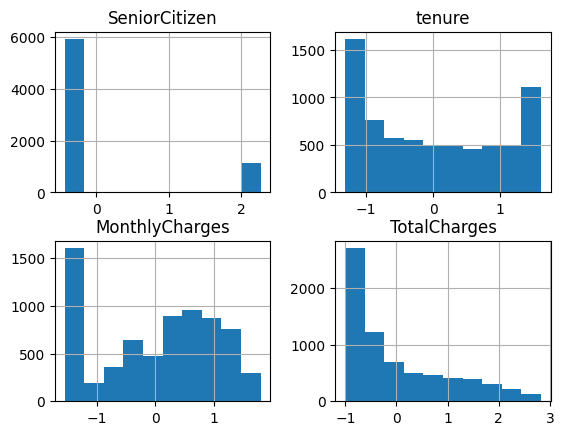

In [17]:
df[campos_numeros].hist()

<Axes: >

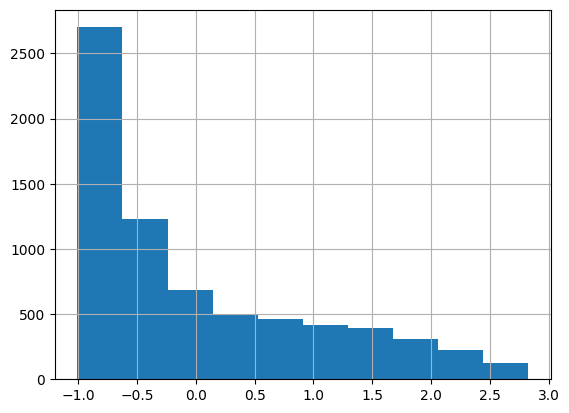

In [18]:
df['TotalCharges'].hist()

<Axes: >

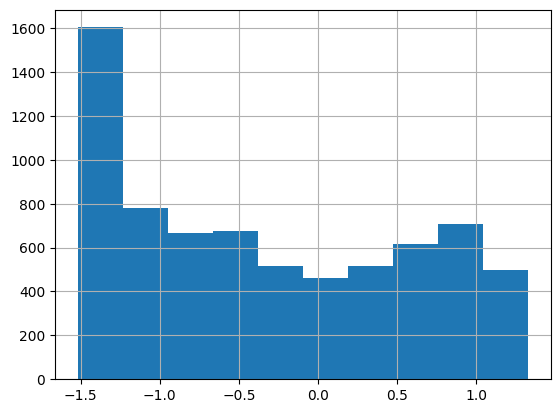

In [19]:
df['TotalCharges'], p_value = yeojohnson(df['TotalCharges'])
df['TotalCharges'].hist()

In [20]:
df[campos_numeros].skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.257139
dtype: float64

## Entrenamiento, prueba y modelaje

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    predictores,  # predictores
    target,  # target
    test_size=0.3,  # porcentage de observaciones en el set de prueba
    random_state=0)  # semilla para asegurar reproducibilidad

In [22]:
k_best = SelectKBest(score_func=chi2, k=4)
model_pipeline = []
model_pipeline.append(MLPClassifier(hidden_layer_sizes=(100,50)))
model_pipeline.append(make_pipeline(k_best, MLPClassifier(hidden_layer_sizes=(100,50))))
model_pipeline.append(make_pipeline(k_best, LogisticRegression(solver='liblinear', max_iter=2000)))
model_pipeline.append(LogisticRegression(solver='liblinear', max_iter=2000))
#model_pipeline.append(DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, max_leaf_nodes=4, criterion='entropy'))
model_pipeline.append(DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, max_leaf_nodes=6, criterion='entropy'))

model_list = ['MLPClassifier', 'k_best_MLPClassifier', 'k_best_LogisticRegression', 'LogisticRegression', 'DecisionTreeClassifier']
acc_list = []
auc_list = []
cm_list = []
for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_list.append(round(auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

In [23]:
pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})

,Model,Accuracy,AUC
0,MLPClassifier,0.462849,0.62
1,k_best_MLPClassifier,0.767629,0.59
2,k_best_LogisticRegression,0.774255,0.68
3,LogisticRegression,0.798864,0.72
4,DecisionTreeClassifier,0.785613,0.64


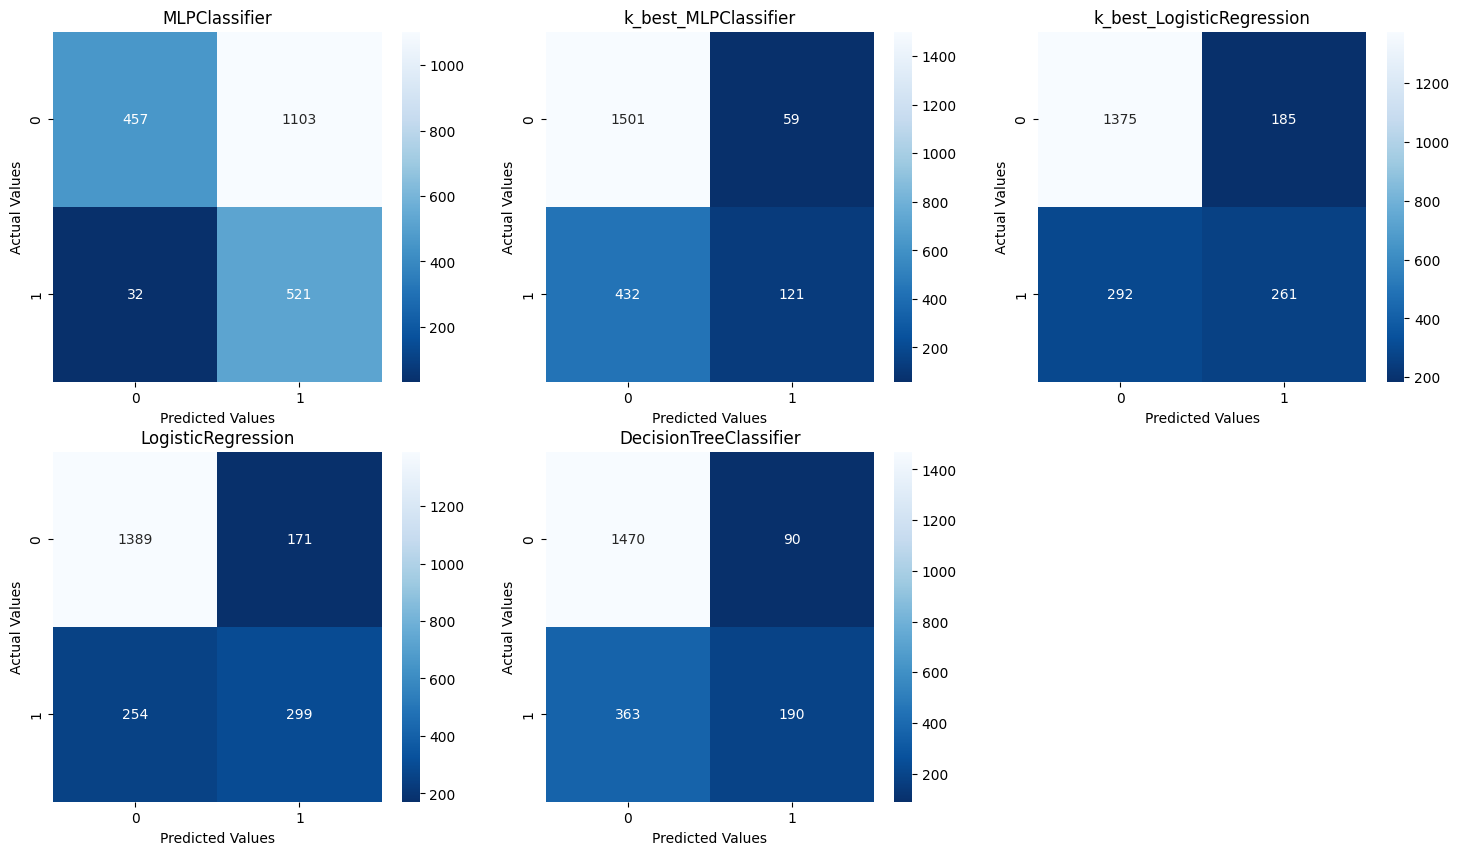

In [24]:
# matriz de confusión
fig = plt.figure(figsize=(18,10))
for ii in range(len(cm_list)):
    cm = cm_list[ii]
    sub = fig.add_subplot(2, 3, ii+1).set_title(model_list[ii])
    cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r', fmt=".0f")
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

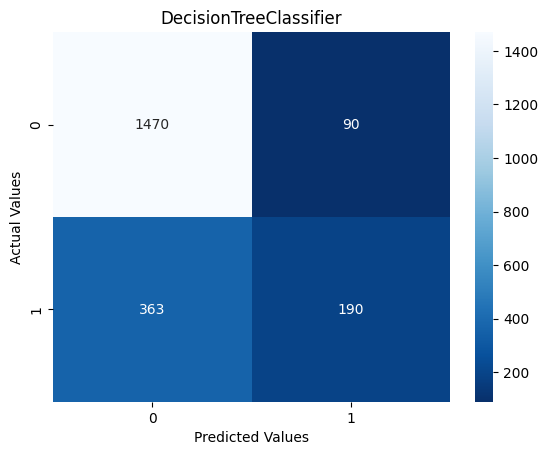

In [25]:
cm = cm_list[-1]
cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r', fmt=".0f")
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title(model_list[-1])
plt.show()

[Text(0.5909090909090909, 0.875, 'Contract <= 0.5\nentropy = 0.837\nsamples = 4930\nvalue = [3614, 1316]'),
 Text(0.36363636363636365, 0.625, 'InternetService_Fiber optic <= 0.5\nentropy = 0.987\nsamples = 2721\nvalue = [1543, 1178]'),
 Text(0.18181818181818182, 0.375, 'tenure <= 3.5\nentropy = 0.866\nsamples = 1210\nvalue = [862, 348]'),
 Text(0.09090909090909091, 0.125, 'entropy = 0.995\nsamples = 403\nvalue = [219, 184]'),
 Text(0.2727272727272727, 0.125, 'entropy = 0.728\nsamples = 807\nvalue = [643, 164]'),
 Text(0.5454545454545454, 0.375, 'tenure <= 13.5\nentropy = 0.993\nsamples = 1511\nvalue = [681, 830]'),
 Text(0.45454545454545453, 0.125, 'entropy = 0.867\nsamples = 679\nvalue = [196, 483]'),
 Text(0.6363636363636364, 0.125, 'entropy = 0.98\nsamples = 832\nvalue = [485, 347]'),
 Text(0.8181818181818182, 0.625, 'InternetService_Fiber optic <= 0.5\nentropy = 0.337\nsamples = 2209\nvalue = [2071, 138]'),
 Text(0.7272727272727273, 0.375, 'entropy = 0.212\nsamples = 1548\nvalue = 

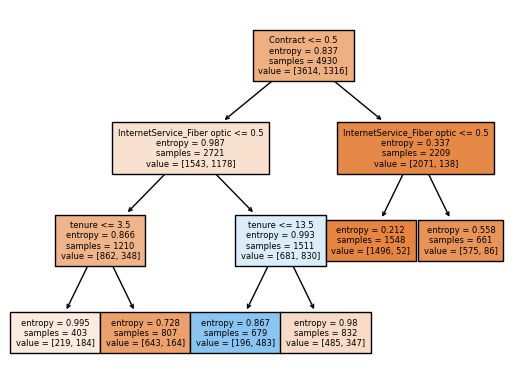

In [26]:
tree.plot_tree(model, feature_names=list(X_test.columns),fontsize=6, filled=True)

                                                    Posibles valores:
|Contract|
|--------|
| 'Month-to-month' --> (0)|
| 'One year' --> (1)|
| 'Two year' --> (2)]|

|InternetService_Fiber optic|
|--------|
| 0 --> No tiene fibra óptica|
| 1 --> Tiene fibra óptica|


## Interpretación:

* Hace la pregunta que está en el recuadro, si es **Verdadero** se decanta por el recuadro de la **izquierda** y si es **Falso** se decanta por el recuadro de la **derecha**.
*  Los values a la izquierda

Ejemplo: A partir del primer sería 
|Paso 1|Paso 2|Paso 3|
|-|-|-|
|Verdadero|Falso|Verdadero|
|izquierda|derecha|izquierda|


1. Verdadero --> ¿El contrato es mes a mes? (Contract <= 0.5 entonces es 0, ya que es el valor **Contract** posible)
   
    El contrato es mes a mes, siga la rama izquierda del árbol

2. False --> ¿El cliente usa servicio de internet por fibra óptica? (InternetService_Fiber optic <= 0.5, entonces es 1)

   El ciente tiene fibra óptica, siga la rama derecha del árbol

3. Verdadero --> ¿El cliente tiene una tenencia <= 13.5? (tenure <= 13.5 entonces es verdadero)

   Siga la rama izquierda del árbol

4. En este punto le queda los **value**(valores) [196, 483] que le indica que de 679 clientes 196 no son clientes Churn y 483 si lo son.


# Conclusiones:

* Los modelos son capaces de predecir correctamente 78% de los casos aproximadamente.

* El modelo con las mejores métricas es la regresión logística, pero se decide reportar el modelo de de árboles de decisión debido a que tiene métricas similares y puede ayudar a la empresa a combatir el fenómeno Churn.



Los clientes que:

1. Tienen contratos por 1 0 2 años son menos propensos a ser clientes Churn.
2. Tienen contrato mes a mes, no tienen fibra óptica y una tenencia mayor a 3.5 son menos propensos a ser clientes Churn.
3. Tienen contrato mes a mes, tienen fibra óptica y una tenencia menor igual a 13.5 son más propensos a ser clientes Churn.